In [1]:
import torchvision.models as torchmodels
from torch import nn
import utils as u
from filterbank import STFT, MelFilter, Log1p, MedFilt
import torch
import torch.nn.functional as F
from transformers import AutoProcessor, ClapModel, ClapAudioModelWithProjection, ClapProcessor
import torch.nn.functional as F
torch.hub.set_dir('/data/woutdecrop/torch/')

import datetime
import json
import os
import pathlib
import shutil
import sys

# import fairseq
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz
import scipy
import soundfile as sf
import torch
import torchaudio
import torchaudio.functional as F
from torch.utils.tensorboard import SummaryWriter
from torchvision.utils import make_grid
from PIL import Image
# from maad import util
from tqdm import tqdm
import torch.optim as optim
from sklearn.model_selection import train_test_split
import copy
import suntime
import pytz

from transformers import ClapModel, ClapProcessor
from transformers import pipeline

import models
import utils as u

torchaudio.set_audio_backend(backend='soundfile')

# matplotlib.use('TkAgg')
# Get the color map by name:
cm = plt.get_cmap('jet')

from dataset import LifeWatchDataset
import yaml
import pathlib
import numpy as np
config_path=r"config.yaml"
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)



/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_19535/2082739506.py:46: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend(backend='soundfile')
/srv/CLAP/dataset.py:36: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend(backend='soundfile')


In [2]:
from dataset import LifeWatchDataset
import yaml
import pathlib
import numpy as np
config_path=r"config.yaml"
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

L=LifeWatchDataset(config)
best_model, valid_metric_best=L.train_clap()

/srv/CLAP/dataset.py:36: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend(backend='soundfile')


Selected CUDA device: Tesla T4


/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


fixed clap.


/srv/CLAP/models.py:121: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.loss_func = CustomLossFunction(torch.tensor(similarity_matrix).to(device))
epoch = 0
train:   0%|          | 1/1451 [00:05<2:18:19,  5.72s/it]

Training metrics: 0.3589430595116825| Distance: 0.43157176585280416| Speed: 0.25 | Activity: 0.25


train:   0%|          | 2/1451 [00:06<1:14:51,  3.10s/it]

Training metrics: 0.418482674982047| Distance: 0.4683044583034117| Speed: 0.375 | Activity: 0.25


train:   0%|          | 3/1451 [00:08<58:48,  2.44s/it]  

Training metrics: 0.46095791981329026| Distance: 0.5390965330221503| Speed: 0.375 | Activity: 0.25


train:   0%|          | 4/1451 [00:10<49:29,  2.05s/it]

Training metrics: 0.48933477735099123| Distance: 0.5603496289183186| Speed: 0.4375 | Activity: 0.21875


train:   0%|          | 5/1451 [00:11<44:51,  1.86s/it]

Training metrics: 0.4890972747307071| Distance: 0.5651621245511785| Speed: 0.425 | Activity: 0.225


train:   0%|          | 6/1451 [00:13<40:54,  1.70s/it]

Training metrics: 0.49499195393627154| Distance: 0.6062365898937861| Speed: 0.375 | Activity: 0.1875


train:   0%|          | 7/1451 [00:14<38:20,  1.59s/it]

Training metrics: 0.47717326697769075| Distance: 0.586955444962818| Speed: 0.35714285714285715 | Activity: 0.17857142857142858


train:   1%|          | 8/1451 [00:15<36:23,  1.51s/it]

Training metrics: 0.49157054222891183| Distance: 0.6135550703815197| Speed: 0.359375 | Activity: 0.15625


train:   1%|          | 9/1451 [00:17<35:18,  1.47s/it]

Training metrics: 0.48325206028546475| Distance: 0.5970867671424414| Speed: 0.3611111111111111 | Activity: 0.16666666666666666


train:   1%|          | 10/1451 [00:18<34:02,  1.42s/it]

Training metrics: 0.46546546615925466| Distance: 0.586192443598758| Speed: 0.325 | Activity: 0.1625


train:   1%|          | 11/1451 [00:19<35:07,  1.46s/it]

Training metrics: 0.46774335927681443| Distance: 0.5901783260674182| Speed: 0.32954545454545453 | Activity: 0.14772727272727273


train:   1%|          | 12/1451 [00:21<34:37,  1.44s/it]

Training metrics: 0.46309519183408776| Distance: 0.5877975419457019| Speed: 0.3229166666666667 | Activity: 0.13541666666666666


train:   1%|          | 13/1451 [00:22<33:48,  1.41s/it]

Training metrics: 0.45961757084864757| Distance: 0.5801318488503101| Speed: 0.3269230769230769 | Activity: 0.1346153846153846


train:   1%|          | 14/1451 [00:24<33:03,  1.38s/it]

Training metrics: 0.46352634265709663| Distance: 0.5865319996665898| Speed: 0.33035714285714285 | Activity: 0.125


train:   1%|          | 15/1451 [00:25<32:39,  1.36s/it]

Training metrics: 0.46465032774818116| Distance: 0.592472768469191| Speed: 0.325 | Activity: 0.11666666666666667


train:   1%|          | 16/1451 [00:26<34:29,  1.44s/it]

Training metrics: 0.46329076455487317| Distance: 0.6015783575914553| Speed: 0.3046875 | Activity: 0.109375


train:   1%|          | 17/1451 [00:28<33:44,  1.41s/it]

Training metrics: 0.4705657401671803| Distance: 0.6029036845923593| Speed: 0.3235294117647059 | Activity: 0.11764705882352941


train:   1%|          | 18/1451 [00:29<33:26,  1.40s/it]

Training metrics: 0.46995599481129546| Distance: 0.6084914728336407| Speed: 0.3125 | Activity: 0.1111111111111111


train:   1%|▏         | 19/1451 [00:31<34:29,  1.44s/it]

Training metrics: 0.47551869320278367| Distance: 0.6170925588467447| Speed: 0.3157894736842105 | Activity: 0.10526315789473684


train:   1%|▏         | 20/1451 [00:32<33:55,  1.42s/it]

Training metrics: 0.484900121755123| Distance: 0.6248335362585384| Speed: 0.33125 | Activity: 0.10625


train:   1%|▏         | 21/1451 [00:34<34:37,  1.45s/it]

Training metrics: 0.4849676438484277| Distance: 0.6237555968902369| Speed: 0.3333333333333333 | Activity: 0.10714285714285714


train:   2%|▏         | 22/1451 [00:35<33:27,  1.40s/it]

Training metrics: 0.48692467323951794| Distance: 0.6297229402476815| Speed: 0.32954545454545453 | Activity: 0.10227272727272728


train:   2%|▏         | 23/1451 [00:36<33:52,  1.42s/it]

Training metrics: 0.49225796239263686| Distance: 0.6356473286254093| Speed: 0.33695652173913043 | Activity: 0.09782608695652174


train:   2%|▏         | 24/1451 [00:38<33:09,  1.39s/it]

Training metrics: 0.4893343107829959| Distance: 0.6358696846383265| Speed: 0.328125 | Activity: 0.09375


train:   2%|▏         | 25/1451 [00:39<32:41,  1.38s/it]

Training metrics: 0.49428727682693435| Distance: 0.6413121280448907| Speed: 0.335 | Activity: 0.09


train:   2%|▏         | 26/1451 [00:40<32:50,  1.38s/it]

Training metrics: 0.496890279639902| Distance: 0.6430543122203497| Speed: 0.34134615384615385 | Activity: 0.08653846153846154


train:   2%|▏         | 27/1451 [00:42<31:51,  1.34s/it]

Training metrics: 0.4938766504107357| Distance: 0.6425721951290041| Speed: 0.3333333333333333 | Activity: 0.08333333333333333


train:   2%|▏         | 28/1451 [00:43<33:04,  1.39s/it]

Training metrics: 0.49277917233355123| Distance: 0.6404950491273473| Speed: 0.33482142857142855 | Activity: 0.08035714285714286


train:   2%|▏         | 29/1451 [00:44<32:11,  1.36s/it]

Training metrics: 0.4970116936479947| Distance: 0.6487551215972327| Speed: 0.33189655172413796 | Activity: 0.08189655172413793


train:   2%|▏         | 30/1451 [00:46<35:12,  1.49s/it]

Training metrics: 0.49804538020814193| Distance: 0.6481311892357923| Speed: 0.3375 | Activity: 0.07916666666666666


train:   2%|▏         | 31/1451 [00:48<36:47,  1.55s/it]

Training metrics: 0.49916524359582143| Distance: 0.6464582016919604| Speed: 0.34274193548387094 | Activity: 0.0846774193548387


train:   2%|▏         | 32/1451 [00:50<37:05,  1.57s/it]

Training metrics: 0.4982619905217709| Distance: 0.6409835258696183| Speed: 0.3515625 | Activity: 0.08203125


train:   2%|▏         | 33/1451 [00:51<37:53,  1.60s/it]

Training metrics: 0.5007867553829516| Distance: 0.6446193397796667| Speed: 0.3522727272727273 | Activity: 0.08333333333333333


train:   2%|▏         | 34/1451 [00:53<37:12,  1.58s/it]

Training metrics: 0.5044591232907933| Distance: 0.6465250094062241| Speed: 0.3602941176470588 | Activity: 0.08455882352941177


train:   2%|▏         | 35/1451 [00:55<39:55,  1.69s/it]

Training metrics: 0.5095719600389357| Distance: 0.651072314350607| Speed: 0.3678571428571429 | Activity: 0.08571428571428572


train:   2%|▏         | 36/1451 [00:56<40:12,  1.71s/it]

Training metrics: 0.5142691154462424| Distance: 0.6580411183363302| Speed: 0.3680555555555556 | Activity: 0.09027777777777778


train:   3%|▎         | 37/1451 [00:58<37:41,  1.60s/it]

Training metrics: 0.5177946879357606| Distance: 0.6631037591722138| Speed: 0.36824324324324326 | Activity: 0.0945945945945946


train:   3%|▎         | 38/1451 [01:00<38:55,  1.65s/it]

Training metrics: 0.5226065978387556| Distance: 0.6659671367488033| Speed: 0.375 | Activity: 0.10526315789473684


train:   3%|▎         | 39/1451 [01:01<37:59,  1.61s/it]

Training metrics: 0.5246685386750032| Distance: 0.6666484191591934| Speed: 0.3782051282051282 | Activity: 0.11217948717948718


train:   3%|▎         | 40/1451 [01:03<37:13,  1.58s/it]

Training metrics: 0.5258839111000935| Distance: 0.6665773518334893| Speed: 0.378125 | Activity: 0.125


train:   3%|▎         | 41/1451 [01:04<36:10,  1.54s/it]

Training metrics: 0.5309296972982913| Distance: 0.6724844548467459| Speed: 0.38109756097560976 | Activity: 0.13109756097560976


train:   3%|▎         | 42/1451 [01:05<35:10,  1.50s/it]

Training metrics: 0.5318380195278732| Distance: 0.6716149531813761| Speed: 0.38095238095238093 | Activity: 0.14583333333333334


train:   3%|▎         | 43/1451 [01:07<34:26,  1.47s/it]

Training metrics: 0.5337841653633276| Distance: 0.6706480275435306| Speed: 0.3866279069767442 | Activity: 0.15406976744186046


train:   3%|▎         | 44/1451 [01:08<33:05,  1.41s/it]

Training metrics: 0.5398908080319933| Distance: 0.6753861952048374| Speed: 0.39488636363636365 | Activity: 0.16193181818181818


train:   3%|▎         | 45/1451 [01:10<32:47,  1.40s/it]

Training metrics: 0.5435159520857803| Distance: 0.6757673275503747| Speed: 0.40555555555555556 | Activity: 0.1638888888888889


train:   3%|▎         | 46/1451 [01:11<31:50,  1.36s/it]

Training metrics: 0.5485882221745012| Distance: 0.6810709500009802| Speed: 0.41304347826086957 | Activity: 0.16032608695652173


train:   3%|▎         | 47/1451 [01:12<31:48,  1.36s/it]

Training metrics: 0.5515578017427343| Distance: 0.6816743504222879| Speed: 0.4175531914893617 | Activity: 0.17287234042553193


train:   3%|▎         | 48/1451 [01:13<31:14,  1.34s/it]

Training metrics: 0.5546886887099052| Distance: 0.6827276756276198| Speed: 0.4244791666666667 | Activity: 0.17708333333333334


train:   3%|▎         | 49/1451 [01:15<31:27,  1.35s/it]

Training metrics: 0.5572539423897717| Distance: 0.6864096318741092| Speed: 0.42091836734693877 | Activity: 0.1913265306122449


train:   3%|▎         | 50/1451 [01:16<30:53,  1.32s/it]

Training metrics: 0.5636456710653149| Distance: 0.6910761184421915| Speed: 0.4325 | Activity: 0.1925


train:   4%|▎         | 51/1451 [01:17<31:29,  1.35s/it]

Training metrics: 0.5689583113142549| Distance: 0.6949958783342156| Speed: 0.4411764705882353 | Activity: 0.19607843137254902


train:   4%|▎         | 52/1451 [01:19<31:17,  1.34s/it]

Training metrics: 0.5724980032207578| Distance: 0.6973524412653658| Speed: 0.44471153846153844 | Activity: 0.20673076923076922


train:   4%|▎         | 53/1451 [01:21<34:29,  1.48s/it]

Training metrics: 0.5773760292594783| Distance: 0.7008940110299481| Speed: 0.45047169811320753 | Activity: 0.2169811320754717


train:   4%|▎         | 54/1451 [01:22<33:57,  1.46s/it]

Training metrics: 0.5813012949429496| Distance: 0.7049466026826939| Speed: 0.4537037037037037 | Activity: 0.2222222222222222


train:   4%|▍         | 55/1451 [01:23<33:14,  1.43s/it]

Training metrics: 0.5849759697526374| Distance: 0.7079144950422744| Speed: 0.4590909090909091 | Activity: 0.225


train:   4%|▍         | 56/1451 [01:25<32:28,  1.40s/it]

Training metrics: 0.5868933893818306| Distance: 0.7095544584935273| Speed: 0.45982142857142855 | Activity: 0.23214285714285715


train:   4%|▍         | 57/1451 [01:26<32:18,  1.39s/it]

Training metrics: 0.586998721439259| Distance: 0.7111528398256657| Speed: 0.45614035087719296 | Activity: 0.23464912280701755


train:   4%|▍         | 58/1451 [01:27<32:12,  1.39s/it]

Training metrics: 0.5889991278015547| Distance: 0.7108318796692581| Speed: 0.46336206896551724 | Activity: 0.2349137931034483


train:   4%|▍         | 59/1451 [01:29<31:25,  1.35s/it]

Training metrics: 0.5908111495248466| Distance: 0.7124394864962136| Speed: 0.4661016949152542 | Activity: 0.23516949152542374


train:   4%|▍         | 60/1451 [01:30<31:19,  1.35s/it]

Training metrics: 0.5942887195321676| Distance: 0.7140923103313904| Speed: 0.47291666666666665 | Activity: 0.23958333333333334


train:   4%|▍         | 61/1451 [01:31<31:26,  1.36s/it]

Training metrics: 0.5959739917326443| Distance: 0.7159675818494894| Speed: 0.4733606557377049 | Activity: 0.24385245901639344


train:   4%|▍         | 62/1451 [01:33<31:29,  1.36s/it]

Training metrics: 0.5963274131405593| Distance: 0.7143091294278138| Speed: 0.4778225806451613 | Activity: 0.2439516129032258


train:   4%|▍         | 63/1451 [01:34<30:58,  1.34s/it]

Training metrics: 0.5999109514043798| Distance: 0.7181055539279345| Speed: 0.4801587301587302 | Activity: 0.25


train:   4%|▍         | 64/1451 [01:35<30:50,  1.33s/it]

Training metrics: 0.6011870182721352| Distance: 0.719751801286892| Speed: 0.48046875 | Activity: 0.251953125


train:   4%|▍         | 65/1451 [01:37<32:53,  1.42s/it]

Training metrics: 0.6016827319829604| Distance: 0.7201122456126263| Speed: 0.4807692307692308 | Activity: 0.25384615384615383


train:   5%|▍         | 66/1451 [01:38<32:37,  1.41s/it]

Training metrics: 0.6047155932225947| Distance: 0.722190130118466| Speed: 0.48484848484848486 | Activity: 0.25946969696969696


train:   5%|▍         | 67/1451 [01:40<32:04,  1.39s/it]

Training metrics: 0.6072315311696995| Distance: 0.7250500643873102| Speed: 0.4869402985074627 | Activity: 0.26119402985074625


train:   5%|▍         | 68/1451 [01:41<31:47,  1.38s/it]

Training metrics: 0.6074406889046093| Distance: 0.7234918344488588| Speed: 0.4889705882352941 | Activity: 0.2665441176470588


train:   5%|▍         | 69/1451 [01:43<31:47,  1.38s/it]

Training metrics: 0.6095848255729972| Distance: 0.7246099749888117| Speed: 0.4927536231884058 | Activity: 0.26992753623188404


train:   5%|▍         | 70/1451 [01:44<31:21,  1.36s/it]

Training metrics: 0.6077222452753528| Distance: 0.721798980220826| Speed: 0.49107142857142855 | Activity: 0.2732142857142857


train:   5%|▍         | 71/1451 [01:45<31:13,  1.36s/it]

Training metrics: 0.6092572024508814| Distance: 0.7217080134744737| Speed: 0.49471830985915494 | Activity: 0.27816901408450706


train:   5%|▍         | 72/1451 [01:47<31:13,  1.36s/it]

Training metrics: 0.611253939784236| Distance: 0.7221709181589119| Speed: 0.4982638888888889 | Activity: 0.2847222222222222


train:   5%|▌         | 73/1451 [01:48<30:42,  1.34s/it]

Training metrics: 0.6126173575362138| Distance: 0.723083723747571| Speed: 0.5 | Activity: 0.2876712328767123


train:   5%|▌         | 74/1451 [01:49<31:42,  1.38s/it]

Training metrics: 0.614265792182929| Distance: 0.7253528968814584| Speed: 0.5 | Activity: 0.2905405405405405


train:   5%|▌         | 75/1451 [01:51<31:14,  1.36s/it]

Training metrics: 0.6177983043503285| Distance: 0.7268860628061031| Speed: 0.5066666666666667 | Activity: 0.2966666666666667


train:   5%|▌         | 76/1451 [01:52<30:36,  1.34s/it]

Training metrics: 0.6200709883779875| Distance: 0.7272564718580494| Speed: 0.5115131578947368 | Activity: 0.3026315789473684


train:   5%|▌         | 77/1451 [01:53<30:13,  1.32s/it]

Training metrics: 0.6208544471867832| Distance: 0.7265864163069763| Speed: 0.5146103896103896 | Activity: 0.3051948051948052


train:   5%|▌         | 78/1451 [01:55<30:48,  1.35s/it]

Training metrics: 0.6214201137970117| Distance: 0.7285420700035667| Speed: 0.5112179487179487 | Activity: 0.3092948717948718


train:   5%|▌         | 79/1451 [01:56<30:36,  1.34s/it]

Training metrics: 0.6220615088598502| Distance: 0.7290160168761218| Speed: 0.5110759493670886 | Activity: 0.31329113924050633


train:   6%|▌         | 80/1451 [01:57<31:47,  1.39s/it]

Training metrics: 0.6210422686297573| Distance: 0.7293412810495956| Speed: 0.5078125 | Activity: 0.3109375


train:   6%|▌         | 81/1451 [01:59<31:22,  1.37s/it]

Training metrics: 0.6247589112857017| Distance: 0.7321084735420131| Speed: 0.5123456790123457 | Activity: 0.31790123456790126


train:   6%|▌         | 82/1451 [02:00<31:14,  1.37s/it]

Training metrics: 0.6250891730525461| Distance: 0.7321100038680645| Speed: 0.5137195121951219 | Activity: 0.3170731707317073


train:   6%|▌         | 83/1451 [02:02<31:19,  1.37s/it]

Training metrics: 0.6245077273354677| Distance: 0.7313582604185507| Speed: 0.5135542168674698 | Activity: 0.31626506024096385


train:   6%|▌         | 84/1451 [02:03<31:23,  1.38s/it]

Training metrics: 0.6262505925990428| Distance: 0.7337311463952301| Speed: 0.5133928571428571 | Activity: 0.31994047619047616


train:   6%|▌         | 85/1451 [02:04<31:19,  1.38s/it]

Training metrics: 0.6267544589324744| Distance: 0.7340515492011829| Speed: 0.513235294117647 | Activity: 0.3235294117647059


train:   6%|▌         | 86/1451 [02:06<30:42,  1.35s/it]

Training metrics: 0.6278005164143035| Distance: 0.7352876823959321| Speed: 0.5145348837209303 | Activity: 0.3226744186046512


train:   6%|▌         | 87/1451 [02:07<31:33,  1.39s/it]

Training metrics: 0.6289598019390827| Distance: 0.7364847273697356| Speed: 0.514367816091954 | Activity: 0.3275862068965517


train:   6%|▌         | 88/1451 [02:08<30:43,  1.35s/it]

Training metrics: 0.631438685114697| Distance: 0.7382406115547983| Speed: 0.5198863636363636 | Activity: 0.3252840909090909


train:   6%|▌         | 89/1451 [02:10<30:36,  1.35s/it]

Training metrics: 0.6325844123547091| Distance: 0.7397006123514817| Speed: 0.5196629213483146 | Activity: 0.32865168539325845


train:   6%|▌         | 90/1451 [02:11<30:11,  1.33s/it]

Training metrics: 0.6340482430900463| Distance: 0.7410063310760031| Speed: 0.5208333333333334 | Activity: 0.33194444444444443


train:   6%|▋         | 91/1451 [02:12<30:20,  1.34s/it]

Training metrics: 0.6364876402349131| Distance: 0.7432761036882253| Speed: 0.5247252747252747 | Activity: 0.33104395604395603


train:   6%|▋         | 92/1451 [02:14<30:07,  1.33s/it]

Training metrics: 0.6378842576539318| Distance: 0.7454320960898863| Speed: 0.5244565217391305 | Activity: 0.3328804347826087


train:   6%|▋         | 93/1451 [02:15<29:46,  1.32s/it]

Training metrics: 0.6384502580066035| Distance: 0.7448633332368124| Speed: 0.5268817204301075 | Activity: 0.3346774193548387


train:   6%|▋         | 94/1451 [02:16<29:31,  1.31s/it]

Training metrics: 0.6399670997647561| Distance: 0.7463547407426786| Speed: 0.5292553191489362 | Activity: 0.3337765957446808


train:   7%|▋         | 95/1451 [02:17<29:28,  1.30s/it]

Training metrics: 0.6423039234510648| Distance: 0.7483574162780907| Speed: 0.5328947368421053 | Activity: 0.33421052631578946


train:   7%|▋         | 96/1451 [02:19<31:44,  1.41s/it]

Training metrics: 0.6431968231073288| Distance: 0.7497290801788815| Speed: 0.5325520833333334 | Activity: 0.3359375


train:   7%|▋         | 97/1451 [02:20<31:35,  1.40s/it]

Training metrics: 0.643930261798665| Distance: 0.7508373779118646| Speed: 0.5322164948453608 | Activity: 0.33762886597938147


train:   7%|▋         | 98/1451 [02:22<31:10,  1.38s/it]

Training metrics: 0.6447883437237032| Distance: 0.7515179878388252| Speed: 0.5318877551020408 | Activity: 0.34311224489795916


train:   7%|▋         | 99/1451 [02:23<30:25,  1.35s/it]

Training metrics: 0.6469341836375072| Distance: 0.7530973767695828| Speed: 0.5353535353535354 | Activity: 0.3446969696969697


train:   7%|▋         | 100/1451 [02:25<30:45,  1.37s/it]

Training metrics: 0.6472450647056562| Distance: 0.7531167745094272| Speed: 0.53625 | Activity: 0.345


train:   7%|▋         | 101/1451 [02:26<30:52,  1.37s/it]

Training metrics: 0.6481215713723997| Distance: 0.7522323219242963| Speed: 0.5396039603960396 | Activity: 0.349009900990099


train:   7%|▋         | 102/1451 [02:27<30:21,  1.35s/it]

Training metrics: 0.6494362157467722| Distance: 0.7537580719962543| Speed: 0.5392156862745098 | Activity: 0.3541666666666667


train:   7%|▋         | 103/1451 [02:29<30:14,  1.35s/it]

Training metrics: 0.6506155574334617| Distance: 0.754262175010462| Speed: 0.5412621359223301 | Activity: 0.3567961165048544


train:   7%|▋         | 104/1451 [02:30<30:52,  1.38s/it]

Training metrics: 0.6516748639550497| Distance: 0.7545943245404673| Speed: 0.5432692307692307 | Activity: 0.359375


train:   7%|▋         | 105/1451 [02:31<31:23,  1.40s/it]

Training metrics: 0.6523280666338226| Distance: 0.7542769364531963| Speed: 0.5452380952380952 | Activity: 0.3619047619047619


train:   7%|▋         | 106/1451 [02:33<30:37,  1.37s/it]

Training metrics: 0.6528795323795282| Distance: 0.7540130571105345| Speed: 0.5471698113207547 | Activity: 0.3632075471698113


train:   7%|▋         | 107/1451 [02:34<30:24,  1.36s/it]

Training metrics: 0.6540601367940923| Distance: 0.7554039663079108| Speed: 0.5478971962616822 | Activity: 0.3644859813084112


train:   7%|▋         | 108/1451 [02:36<32:25,  1.45s/it]

Training metrics: 0.6558973248125229| Distance: 0.7565495536998841| Speed: 0.5509259259259259 | Activity: 0.36689814814814814


train:   8%|▊         | 109/1451 [02:37<32:08,  1.44s/it]

Training metrics: 0.6565481784946735| Distance: 0.7563264748611535| Speed: 0.5527522935779816 | Activity: 0.36926605504587157


train:   8%|▊         | 110/1451 [02:38<31:11,  1.40s/it]

Training metrics: 0.6573282084082445| Distance: 0.7572894382561649| Speed: 0.553409090909091 | Activity: 0.3693181818181818


train:   8%|▊         | 111/1451 [02:40<30:53,  1.38s/it]

Training metrics: 0.6586301198294938| Distance: 0.7587529024185258| Speed: 0.5540540540540541 | Activity: 0.3716216216216216


train:   8%|▊         | 112/1451 [02:41<32:05,  1.44s/it]

Training metrics: 0.6600895859360273| Distance: 0.7604915717981411| Speed: 0.5546875 | Activity: 0.37388392857142855


train:   8%|▊         | 113/1451 [02:43<30:57,  1.39s/it]

Training metrics: 0.6609702225329929| Distance: 0.761646536080062| Speed: 0.5553097345132744 | Activity: 0.37389380530973454


train:   8%|▊         | 114/1451 [02:44<30:38,  1.38s/it]

Training metrics: 0.6615952775563027| Distance: 0.7618327725353584| Speed: 0.5570175438596491 | Activity: 0.37390350877192985


train:   8%|▊         | 115/1451 [02:45<29:57,  1.35s/it]

Training metrics: 0.6628250776684428| Distance: 0.7634041149546511| Speed: 0.5576086956521739 | Activity: 0.375


train:   8%|▊         | 116/1451 [02:47<32:43,  1.47s/it]

Training metrics: 0.664259380488007| Distance: 0.7651449444915059| Speed: 0.5581896551724138 | Activity: 0.3771551724137931


train:   8%|▊         | 117/1451 [02:48<32:37,  1.47s/it]

Training metrics: 0.6640260981758367| Distance: 0.7655420724583035| Speed: 0.5566239316239316 | Activity: 0.37713675213675213


train:   8%|▊         | 118/1451 [02:50<31:52,  1.43s/it]

Training metrics: 0.6633529136468996| Distance: 0.7655458165301436| Speed: 0.5540254237288136 | Activity: 0.3781779661016949


train:   8%|▊         | 119/1451 [02:52<34:06,  1.54s/it]

Training metrics: 0.6619104875216139| Distance: 0.7640735016116534| Speed: 0.5514705882352942 | Activity: 0.3802521008403361


train:   8%|▊         | 120/1451 [02:53<32:22,  1.46s/it]

Training metrics: 0.6630864192127037| Distance: 0.7645190320211732| Speed: 0.5541666666666667 | Activity: 0.38125


train:   8%|▊         | 121/1451 [02:54<32:05,  1.45s/it]

Training metrics: 0.6634458639377289| Distance: 0.7639731341110909| Speed: 0.5568181818181818 | Activity: 0.38016528925619836


train:   8%|▊         | 122/1451 [02:56<31:24,  1.42s/it]

Training metrics: 0.6650536971955601| Distance: 0.7650143587139118| Speed: 0.5594262295081968 | Activity: 0.382172131147541


train:   8%|▊         | 123/1451 [02:57<30:43,  1.39s/it]

Training metrics: 0.6662287917204844| Distance: 0.7665466311872573| Speed: 0.5599593495934959 | Activity: 0.383130081300813


train:   9%|▊         | 124/1451 [02:58<30:14,  1.37s/it]

Training metrics: 0.6673032800934168| Distance: 0.7674140689728989| Speed: 0.5604838709677419 | Activity: 0.3870967741935484


train:   9%|▊         | 125/1451 [03:00<30:23,  1.38s/it]

Training metrics: 0.6677605766523822| Distance: 0.7677676277539703| Speed: 0.562 | Activity: 0.385


train:   9%|▊         | 126/1451 [03:01<30:00,  1.36s/it]

Training metrics: 0.6695995034246974| Distance: 0.7686116062369295| Speed: 0.5654761904761905 | Activity: 0.3878968253968254


train:   9%|▉         | 127/1451 [03:03<32:10,  1.46s/it]

Training metrics: 0.6690565724075703| Distance: 0.767161216479809| Speed: 0.5659448818897638 | Activity: 0.38976377952755903


train:   9%|▉         | 128/1451 [03:04<31:01,  1.41s/it]

Training metrics: 0.6699406249478113| Distance: 0.7682604165796856| Speed: 0.56640625 | Activity: 0.390625


train:   9%|▉         | 129/1451 [03:05<31:12,  1.42s/it]

Training metrics: 0.6699431096011322| Distance: 0.7669271464928431| Speed: 0.5678294573643411 | Activity: 0.3943798449612403


train:   9%|▉         | 130/1451 [03:07<31:04,  1.41s/it]

Training metrics: 0.6709302567430215| Distance: 0.7666145304691383| Speed: 0.5711538461538461 | Activity: 0.39615384615384613


train:   9%|▉         | 131/1451 [03:08<30:43,  1.40s/it]

Training metrics: 0.6716342888433148| Distance: 0.767132211685423| Speed: 0.5715648854961832 | Activity: 0.3988549618320611


train:   9%|▉         | 132/1451 [03:10<30:16,  1.38s/it]

Training metrics: 0.6730940986137067| Distance: 0.7678146593056729| Speed: 0.5738636363636364 | Activity: 0.4024621212121212


train:   9%|▉         | 133/1451 [03:11<29:39,  1.35s/it]

Training metrics: 0.6735516095979021| Distance: 0.7671662164977567| Speed: 0.5761278195488722 | Activity: 0.4041353383458647


train:   9%|▉         | 134/1451 [03:12<29:34,  1.35s/it]

Training metrics: 0.6742290541422091| Distance: 0.7678382245653735| Speed: 0.5764925373134329 | Activity: 0.40578358208955223


train:   9%|▉         | 135/1451 [03:13<29:29,  1.34s/it]

Training metrics: 0.6757737362983869| Distance: 0.768882153089904| Speed: 0.5787037037037037 | Activity: 0.4083333333333333


train:   9%|▉         | 136/1451 [03:15<29:03,  1.33s/it]

Training metrics: 0.6768757475333221| Distance: 0.7693639909869093| Speed: 0.5808823529411765 | Activity: 0.4099264705882353


train:   9%|▉         | 137/1451 [03:16<28:38,  1.31s/it]

Training metrics: 0.6782833354897095| Distance: 0.7699186978356474| Speed: 0.583941605839416 | Activity: 0.4114963503649635


train:  10%|▉         | 138/1451 [03:18<29:48,  1.36s/it]

Training metrics: 0.6798040885966651| Distance: 0.77083893993164| Speed: 0.5869565217391305 | Activity: 0.4121376811594203


train:  10%|▉         | 139/1451 [03:19<29:50,  1.36s/it]

Training metrics: 0.6798982844819786| Distance: 0.7706038554315953| Speed: 0.5872302158273381 | Activity: 0.4136690647482014


train:  10%|▉         | 140/1451 [03:20<29:20,  1.34s/it]

Training metrics: 0.6810032276196877| Distance: 0.7714637126994796| Speed: 0.5883928571428572 | Activity: 0.4160714285714286


train:  10%|▉         | 141/1451 [03:21<29:12,  1.34s/it]

Training metrics: 0.6815438181698339| Distance: 0.7724311863114254| Speed: 0.5877659574468085 | Activity: 0.4175531914893617


train:  10%|▉         | 142/1451 [03:23<29:16,  1.34s/it]

Training metrics: 0.6823492026156506| Distance: 0.7731054785378213| Speed: 0.5880281690140845 | Activity: 0.42077464788732394


train:  10%|▉         | 143/1451 [03:24<29:07,  1.34s/it]

Training metrics: 0.6825563868462823| Distance: 0.7729378009209598| Speed: 0.5891608391608392 | Activity: 0.42045454545454547


train:  10%|▉         | 144/1451 [03:26<29:19,  1.35s/it]

Training metrics: 0.6833517614081916| Distance: 0.7728895097543936| Speed: 0.5911458333333334 | Activity: 0.4227430555555556


train:  10%|▉         | 145/1451 [03:27<29:53,  1.37s/it]

Training metrics: 0.6843538758610324| Distance: 0.7737794482741345| Speed: 0.593103448275862 | Activity: 0.421551724137931


train:  10%|█         | 146/1451 [03:28<30:03,  1.38s/it]

Training metrics: 0.6837192890725178| Distance: 0.7729510982258857| Speed: 0.5924657534246576 | Activity: 0.4220890410958904


train:  10%|█         | 147/1451 [03:30<29:33,  1.36s/it]

Training metrics: 0.6846687050358244| Distance: 0.7730589528374853| Speed: 0.5952380952380952 | Activity: 0.4226190476190476


train:  10%|█         | 148/1451 [03:31<29:02,  1.34s/it]

Training metrics: 0.6844708497249296| Distance: 0.7728230378298375| Speed: 0.5945945945945946 | Activity: 0.4239864864864865


train:  10%|█         | 149/1451 [03:32<29:03,  1.34s/it]

Training metrics: 0.6858219409058267| Distance: 0.7737692303687717| Speed: 0.5964765100671141 | Activity: 0.4261744966442953


train:  10%|█         | 150/1451 [03:34<28:54,  1.33s/it]

Training metrics: 0.6852619891566881| Distance: 0.7730755374833693| Speed: 0.5958333333333333 | Activity: 0.4266666666666667


train:  10%|█         | 151/1451 [03:35<29:04,  1.34s/it]

Training metrics: 0.685868468540862| Distance: 0.7736328780316796| Speed: 0.5960264900662252 | Activity: 0.4288079470198676


train:  10%|█         | 152/1451 [03:36<28:41,  1.33s/it]

Training metrics: 0.6858679091141366| Distance: 0.773321515190228| Speed: 0.5962171052631579 | Activity: 0.4300986842105263


train:  11%|█         | 153/1451 [03:38<28:38,  1.32s/it]

Training metrics: 0.6862680556150983| Distance: 0.772865060012092| Speed: 0.5980392156862745 | Activity: 0.43137254901960786


train:  11%|█         | 154/1451 [03:39<29:14,  1.35s/it]

Training metrics: 0.6875481877830247| Distance: 0.7738898367812317| Speed: 0.5998376623376623 | Activity: 0.43262987012987014


train:  11%|█         | 155/1451 [03:40<29:15,  1.35s/it]

Training metrics: 0.686987536663454| Distance: 0.7726673998154343| Speed: 0.6 | Activity: 0.4338709677419355


train:  11%|█         | 156/1451 [03:42<30:16,  1.40s/it]

Training metrics: 0.6873880354666633| Distance: 0.7737183069743534| Speed: 0.5993589743589743 | Activity: 0.43349358974358976


train:  11%|█         | 157/1451 [03:43<29:42,  1.38s/it]

Training metrics: 0.6888829545003868| Distance: 0.774863310579201| Speed: 0.6019108280254777 | Activity: 0.4339171974522293


train:  11%|█         | 158/1451 [03:45<30:51,  1.43s/it]

Training metrics: 0.6901856908488553| Distance: 0.7757050543683454| Speed: 0.6036392405063291 | Activity: 0.43670886075949367


train:  11%|█         | 159/1451 [03:46<29:42,  1.38s/it]

Training metrics: 0.6905808895885003| Distance: 0.7759681493141672| Speed: 0.6037735849056604 | Activity: 0.4386792452830189


train:  11%|█         | 160/1451 [03:48<30:49,  1.43s/it]

Training metrics: 0.6906586483438998| Distance: 0.7754467055731663| Speed: 0.6046875 | Activity: 0.43984375


train:  11%|█         | 161/1451 [03:49<29:56,  1.39s/it]

Training metrics: 0.6908833100221057| Distance: 0.7751781875109628| Speed: 0.6055900621118012 | Activity: 0.4409937888198758


train:  11%|█         | 162/1451 [03:50<30:15,  1.41s/it]

Training metrics: 0.6914837048012875| Distance: 0.7751580265206646| Speed: 0.6072530864197531 | Activity: 0.44212962962962965


train:  11%|█         | 163/1451 [03:52<30:34,  1.42s/it]

Training metrics: 0.6919088565244613| Distance: 0.7760086259047771| Speed: 0.6065950920245399 | Activity: 0.4432515337423313


train:  11%|█▏        | 164/1451 [03:53<29:48,  1.39s/it]

Training metrics: 0.6925646888015322| Distance: 0.7769878959700335| Speed: 0.6067073170731707 | Activity: 0.44359756097560976


train:  11%|█▏        | 165/1451 [03:54<29:30,  1.38s/it]

Training metrics: 0.6925738678448001| Distance: 0.7765120019635559| Speed: 0.6075757575757575 | Activity: 0.44393939393939397


train:  11%|█▏        | 166/1451 [03:56<29:47,  1.39s/it]

Training metrics: 0.6933216409586139| Distance: 0.7765200040073286| Speed: 0.6091867469879518 | Activity: 0.44653614457831325


train:  12%|█▏        | 167/1451 [03:57<30:03,  1.40s/it]

Training metrics: 0.6938075984833886| Distance: 0.7763559775122345| Speed: 0.6107784431137725 | Activity: 0.4476047904191617


train:  12%|█▏        | 168/1451 [03:59<29:24,  1.38s/it]

Training metrics: 0.6944858934044769| Distance: 0.7767721239280964| Speed: 0.6123511904761905 | Activity: 0.44717261904761907


train:  12%|█▏        | 169/1451 [04:00<29:01,  1.36s/it]

Training metrics: 0.695395871775141| Distance: 0.7779526857001857| Speed: 0.6131656804733728 | Activity: 0.4467455621301775


train:  12%|█▏        | 170/1451 [04:02<31:07,  1.46s/it]

Training metrics: 0.6957139275291937| Distance: 0.777783016470225| Speed: 0.6139705882352942 | Activity: 0.4485294117647059


train:  12%|█▏        | 171/1451 [04:03<30:01,  1.41s/it]

Training metrics: 0.6958227886461869| Distance: 0.7767855444298047| Speed: 0.6154970760233918 | Activity: 0.4510233918128655


train:  12%|█▏        | 172/1451 [04:04<29:37,  1.39s/it]

Training metrics: 0.6970380716714268| Distance: 0.7776458171267968| Speed: 0.6177325581395349 | Activity: 0.45130813953488375


train:  12%|█▏        | 173/1451 [04:06<29:13,  1.37s/it]

Training metrics: 0.6974064772574113| Distance: 0.7773489457180361| Speed: 0.6192196531791907 | Activity: 0.4523121387283237


train:  12%|█▏        | 174/1451 [04:07<29:50,  1.40s/it]

Training metrics: 0.6980785111591902| Distance: 0.7781672503994167| Speed: 0.6192528735632183 | Activity: 0.4540229885057471


train:  12%|█▏        | 175/1451 [04:08<29:49,  1.40s/it]

Training metrics: 0.699099943544195| Distance: 0.7789760963831824| Speed: 0.6207142857142857 | Activity: 0.455


train:  12%|█▏        | 176/1451 [04:10<29:03,  1.37s/it]

Training metrics: 0.6995282197035803| Distance: 0.7791616161726338| Speed: 0.6214488636363636 | Activity: 0.4559659090909091


train:  12%|█▏        | 177/1451 [04:11<30:04,  1.42s/it]

Training metrics: 0.7000794180315897| Distance: 0.7794402729905027| Speed: 0.6221751412429378 | Activity: 0.4576271186440678


train:  12%|█▏        | 178/1451 [04:13<30:10,  1.42s/it]

Training metrics: 0.7007012878069556| Distance: 0.7798439066445516| Speed: 0.6235955056179775 | Activity: 0.4571629213483146


train:  12%|█▏        | 179/1451 [04:14<29:57,  1.41s/it]

Training metrics: 0.7015721143049096| Distance: 0.78043676406498| Speed: 0.625 | Activity: 0.4581005586592179


train:  12%|█▏        | 180/1451 [04:15<29:23,  1.39s/it]

Training metrics: 0.7023441219370175| Distance: 0.78064298100614| Speed: 0.6270833333333333 | Activity: 0.4583333333333333


train:  12%|█▏        | 181/1451 [04:17<29:52,  1.41s/it]

Training metrics: 0.7027557034520998| Distance: 0.781066135587754| Speed: 0.6270718232044199 | Activity: 0.4599447513812155


train:  13%|█▎        | 182/1451 [04:18<29:26,  1.39s/it]

Training metrics: 0.703074537145652| Distance: 0.7814520674039257| Speed: 0.6270604395604396 | Activity: 0.4608516483516483


train:  13%|█▎        | 183/1451 [04:20<29:28,  1.39s/it]

Training metrics: 0.7038939237757437| Distance: 0.7816492536517404| Speed: 0.6284153005464481 | Activity: 0.46379781420765026


train:  13%|█▎        | 184/1451 [04:21<28:16,  1.34s/it]

Training metrics: 0.7052543057374945| Distance: 0.7826475747798823| Speed: 0.6304347826086957 | Activity: 0.46535326086956524


train:  13%|█▎        | 185/1451 [04:23<30:21,  1.44s/it]

Training metrics: 0.7057024363112457| Distance: 0.7829274839421662| Speed: 0.6310810810810811 | Activity: 0.46621621621621623


train:  13%|█▎        | 186/1451 [04:24<29:43,  1.41s/it]

Training metrics: 0.7059023485838914| Distance: 0.7823506885000342| Speed: 0.6323924731182796 | Activity: 0.46774193548387094


train:  13%|█▎        | 187/1451 [04:25<28:51,  1.37s/it]

Training metrics: 0.7064441889400754| Distance: 0.7830219548288246| Speed: 0.6330213903743316 | Activity: 0.4672459893048128


train:  13%|█▎        | 188/1451 [04:26<27:58,  1.33s/it]

Training metrics: 0.7069928385933796| Distance: 0.7829313267336468| Speed: 0.6343085106382979 | Activity: 0.46941489361702127


train:  13%|█▎        | 189/1451 [04:28<29:00,  1.38s/it]

Training metrics: 0.7072962647181075| Distance: 0.782993774530179| Speed: 0.6349206349206349 | Activity: 0.47023809523809523


train:  13%|█▎        | 190/1451 [04:29<28:35,  1.36s/it]

Training metrics: 0.7080258023220952| Distance: 0.7831131793087551| Speed: 0.6368421052631579 | Activity: 0.4710526315789474


train:  13%|█▎        | 191/1451 [04:31<28:41,  1.37s/it]

Training metrics: 0.708831768540116| Distance: 0.78358959678152| Speed: 0.6380890052356021 | Activity: 0.4725130890052356


train:  13%|█▎        | 192/1451 [04:32<29:10,  1.39s/it]

Training metrics: 0.7092633958119795| Distance: 0.7838851735755213| Speed: 0.638671875 | Activity: 0.4733072916666667


train:  13%|█▎        | 193/1451 [04:33<29:01,  1.38s/it]

Training metrics: 0.7097771005459889| Distance: 0.7843219378702577| Speed: 0.6392487046632125 | Activity: 0.4740932642487047


train:  13%|█▎        | 194/1451 [04:35<28:44,  1.37s/it]

Training metrics: 0.7096317507026627| Distance: 0.7842015432673246| Speed: 0.6391752577319587 | Activity: 0.4735824742268041


train:  13%|█▎        | 195/1451 [04:36<28:33,  1.36s/it]

Training metrics: 0.7100343943618777| Distance: 0.7847795461586851| Speed: 0.639102564102564 | Activity: 0.47435897435897434


train:  14%|█▎        | 196/1451 [04:38<29:21,  1.40s/it]

Training metrics: 0.7103328585910157| Distance: 0.7846534037741417| Speed: 0.6403061224489796 | Activity: 0.4744897959183674


train:  14%|█▎        | 197/1451 [04:39<29:17,  1.40s/it]

Training metrics: 0.7103712568553012| Distance: 0.7841001489043513| Speed: 0.6408629441624365 | Activity: 0.47652284263959394


train:  14%|█▎        | 198/1451 [04:40<28:57,  1.39s/it]

Training metrics: 0.7111880198194725| Distance: 0.7849556222580437| Speed: 0.6420454545454546 | Activity: 0.476010101010101


train:  14%|█▎        | 199/1451 [04:42<28:27,  1.36s/it]

Training metrics: 0.7115358052307076| Distance: 0.7850345497563721| Speed: 0.6432160804020101 | Activity: 0.47550251256281406


train:  14%|█▍        | 200/1451 [04:43<28:50,  1.38s/it]

Training metrics: 0.711668862525802| Distance: 0.7855939375430034| Speed: 0.6425 | Activity: 0.475625


train:  14%|█▍        | 201/1451 [04:44<28:45,  1.38s/it]

Training metrics: 0.7124315868056967| Distance: 0.7860592781753317| Speed: 0.6436567164179104 | Activity: 0.47699004975124376


train:  14%|█▍        | 202/1451 [04:46<30:38,  1.47s/it]

Training metrics: 0.7131276358219274| Distance: 0.7865246075579978| Speed: 0.6448019801980198 | Activity: 0.4777227722772277


train:  14%|█▍        | 203/1451 [04:49<41:40,  2.00s/it]

Training metrics: 0.7137583290300463| Distance: 0.7874009917331644| Speed: 0.645320197044335 | Activity: 0.4772167487684729


train:  14%|█▍        | 204/1451 [04:51<37:36,  1.81s/it]

Training metrics: 0.7137875298561658| Distance: 0.7870723536818449| Speed: 0.6458333333333334 | Activity: 0.47794117647058826


train:  14%|█▍        | 205/1451 [04:57<1:05:45,  3.17s/it]

Training metrics: 0.7142228213712695| Distance: 0.7872209624480507| Speed: 0.6469512195121951 | Activity: 0.47804878048780486


train:  14%|█▍        | 206/1451 [04:59<56:50,  2.74s/it]  

Training metrics: 0.714145391355131| Distance: 0.7869251668216584| Speed: 0.6468446601941747 | Activity: 0.47936893203883496


train:  14%|█▍        | 207/1451 [05:01<53:11,  2.57s/it]

Training metrics: 0.7146523181164139| Distance: 0.7867997572471634| Speed: 0.6479468599033816 | Activity: 0.48188405797101447


train:  14%|█▍        | 208/1451 [05:03<50:13,  2.42s/it]

Training metrics: 0.7152346254237714| Distance: 0.7868093116037215| Speed: 0.6496394230769231 | Activity: 0.48257211538461536


train:  14%|█▍        | 209/1451 [05:04<43:16,  2.09s/it]

Training metrics: 0.7160392846776087| Distance: 0.7874976913685822| Speed: 0.6507177033492823 | Activity: 0.48325358851674644


train:  14%|█▍        | 210/1451 [05:06<38:46,  1.88s/it]

Training metrics: 0.7162948847389459| Distance: 0.7874756015490366| Speed: 0.6511904761904762 | Activity: 0.4845238095238095


train:  15%|█▍        | 211/1451 [05:07<36:16,  1.76s/it]

Training metrics: 0.71703325174853| Distance: 0.7882623706077398| Speed: 0.6516587677725119 | Activity: 0.48578199052132703


train:  15%|█▍        | 212/1451 [05:09<33:38,  1.63s/it]

Training metrics: 0.7173265109607442| Distance: 0.7882132100918062| Speed: 0.6527122641509434 | Activity: 0.4858490566037736


train:  15%|█▍        | 213/1451 [05:10<31:50,  1.54s/it]

Training metrics: 0.717659055331264| Distance: 0.7881367667101661| Speed: 0.653755868544601 | Activity: 0.4865023474178404


train:  15%|█▍        | 214/1451 [05:11<31:38,  1.53s/it]

Training metrics: 0.7180302294828059| Distance: 0.788909416739256| Speed: 0.6536214953271028 | Activity: 0.48598130841121495


train:  15%|█▍        | 215/1451 [05:13<30:04,  1.46s/it]

Training metrics: 0.7183453606744143| Distance: 0.7889089344573573| Speed: 0.6546511627906977 | Activity: 0.48604651162790696


train:  15%|█▍        | 216/1451 [05:14<29:25,  1.43s/it]

Training metrics: 0.7183682221327671| Distance: 0.7889084566410317| Speed: 0.6550925925925926 | Activity: 0.4849537037037037


train:  15%|█▍        | 217/1451 [05:15<28:34,  1.39s/it]

Training metrics: 0.7189887477932262| Distance: 0.7896164229733497| Speed: 0.6555299539170507 | Activity: 0.48559907834101385


train:  15%|█▌        | 218/1451 [05:17<29:12,  1.42s/it]

Training metrics: 0.7193114103195649| Distance: 0.7904999040494278| Speed: 0.6548165137614679 | Activity: 0.4856651376146789


train:  15%|█▌        | 219/1451 [05:18<28:20,  1.38s/it]

Training metrics: 0.7196828069128526| Distance: 0.7907004163920452| Speed: 0.6552511415525114 | Activity: 0.4868721461187215


train:  15%|█▌        | 220/1451 [05:19<28:11,  1.37s/it]

Training metrics: 0.719561054684409| Distance: 0.790177515383106| Speed: 0.6556818181818181 | Activity: 0.4875


train:  15%|█▌        | 221/1451 [05:21<28:09,  1.37s/it]

Training metrics: 0.7202780738507801| Distance: 0.7905841200680421| Speed: 0.6566742081447964 | Activity: 0.48925339366515835


train:  15%|█▌        | 222/1451 [05:22<29:00,  1.42s/it]

Training metrics: 0.720951264937895| Distance: 0.7908309370586539| Speed: 0.6576576576576577 | Activity: 0.49155405405405406


train:  15%|█▌        | 223/1451 [05:24<28:12,  1.38s/it]

Training metrics: 0.7208814660772918| Distance: 0.7903144016086402| Speed: 0.6580717488789237 | Activity: 0.49271300448430494


train:  15%|█▌        | 224/1451 [05:25<28:16,  1.38s/it]

Training metrics: 0.7210860318748836| Distance: 0.7899796959819491| Speed: 0.6590401785714286 | Activity: 0.49386160714285715


train:  16%|█▌        | 225/1451 [05:26<27:18,  1.34s/it]

Training metrics: 0.721651353669567| Distance: 0.7905300338937228| Speed: 0.6594444444444445 | Activity: 0.495


train:  16%|█▌        | 226/1451 [05:28<27:20,  1.34s/it]

Training metrics: 0.7220876801808795| Distance: 0.7907766646082505| Speed: 0.6598451327433629 | Activity: 0.49668141592920356


train:  16%|█▌        | 227/1451 [05:29<27:33,  1.35s/it]

Training metrics: 0.7216732952041021| Distance: 0.7903438914194653| Speed: 0.6591409691629956 | Activity: 0.4972466960352423


train:  16%|█▌        | 228/1451 [05:30<27:58,  1.37s/it]

Training metrics: 0.7223878926873873| Distance: 0.7907853767012012| Speed: 0.6600877192982456 | Activity: 0.49890350877192985


train:  16%|█▌        | 229/1451 [05:32<27:48,  1.37s/it]

Training metrics: 0.722532038643579| Distance: 0.7911014326737961| Speed: 0.6599344978165939 | Activity: 0.49890829694323147


train:  16%|█▌        | 230/1451 [05:33<27:16,  1.34s/it]

Training metrics: 0.7233556617362769| Distance: 0.7917340739082874| Speed: 0.6614130434782609 | Activity: 0.4989130434782609


train:  16%|█▌        | 231/1451 [05:34<26:59,  1.33s/it]

Training metrics: 0.7239015911225444| Distance: 0.791549549417805| Speed: 0.6628787878787878 | Activity: 0.5010822510822511


train:  16%|█▌        | 232/1451 [05:36<28:51,  1.42s/it]

Training metrics: 0.7238757106291508| Distance: 0.791050034956631| Speed: 0.6632543103448276 | Activity: 0.5026939655172413


train:  16%|█▌        | 233/1451 [05:37<28:15,  1.39s/it]

Training metrics: 0.7246676964611106| Distance: 0.7916493081218798| Speed: 0.6641630901287554 | Activity: 0.5042918454935622


train:  16%|█▌        | 234/1451 [05:39<27:16,  1.34s/it]

Training metrics: 0.7252240373693429| Distance: 0.791951030943207| Speed: 0.6650641025641025 | Activity: 0.5053418803418803


train:  16%|█▌        | 235/1451 [05:40<26:54,  1.33s/it]

Training metrics: 0.7257476943834248| Distance: 0.7924695615610274| Speed: 0.6654255319148936 | Activity: 0.5063829787234042


train:  16%|█▋        | 236/1451 [05:41<26:54,  1.33s/it]

Training metrics: 0.726473722474009| Distance: 0.7928869950838003| Speed: 0.6663135593220338 | Activity: 0.5084745762711864


train:  16%|█▋        | 237/1451 [05:43<26:51,  1.33s/it]

Training metrics: 0.7268444678482407| Distance: 0.7928947881858864| Speed: 0.6671940928270043 | Activity: 0.509493670886076


train:  16%|█▋        | 238/1451 [05:44<27:01,  1.34s/it]

Training metrics: 0.7272396944937346| Distance: 0.7929485104307342| Speed: 0.6680672268907563 | Activity: 0.5105042016806722


train:  16%|█▋        | 239/1451 [05:45<27:05,  1.34s/it]

Training metrics: 0.7268669228190727| Distance: 0.7920759731782318| Speed: 0.6678870292887029 | Activity: 0.5125523012552301


train:  17%|█▋        | 240/1451 [05:47<29:35,  1.47s/it]

Training metrics: 0.7278886869896651| Distance: 0.7927485060938866| Speed: 0.6692708333333334 | Activity: 0.5145833333333333


train:  17%|█▋        | 241/1451 [05:49<30:19,  1.50s/it]

Training metrics: 0.7285116479998841| Distance: 0.7928513635406091| Speed: 0.6706431535269709 | Activity: 0.5160788381742739


train:  17%|█▋        | 242/1451 [05:50<30:24,  1.51s/it]

Training metrics: 0.7286080014318476| Distance: 0.7926008012844844| Speed: 0.6714876033057852 | Activity: 0.5160123966942148


train:  17%|█▋        | 243/1451 [05:52<32:26,  1.61s/it]

Training metrics: 0.7293111180924741| Distance: 0.7929362256273748| Speed: 0.6728395061728395 | Activity: 0.5169753086419753


train:  17%|█▋        | 244/1451 [05:53<32:03,  1.59s/it]

Training metrics: 0.7299620859045933| Distance: 0.7931062087480928| Speed: 0.6741803278688525 | Activity: 0.5184426229508197


train:  17%|█▋        | 245/1451 [05:55<30:45,  1.53s/it]

Training metrics: 0.7304498543293261| Distance: 0.793181730004659| Speed: 0.6755102040816326 | Activity: 0.5188775510204081


train:  17%|█▋        | 246/1451 [05:56<29:46,  1.48s/it]

Training metrics: 0.730665133008783| Distance: 0.7937406688357768| Speed: 0.6753048780487805 | Activity: 0.5182926829268293


train:  17%|█▋        | 247/1451 [05:58<29:21,  1.46s/it]

Training metrics: 0.7311508906251426| Distance: 0.793905330529084| Speed: 0.6761133603238867 | Activity: 0.5197368421052632


train:  17%|█▋        | 248/1451 [05:59<28:35,  1.43s/it]

Training metrics: 0.7312343159700692| Distance: 0.7936566556490401| Speed: 0.6769153225806451 | Activity: 0.5196572580645161


train:  17%|█▋        | 249/1451 [06:00<27:58,  1.40s/it]

Training metrics: 0.7309249580936348| Distance: 0.7930911282818944| Speed: 0.6772088353413654 | Activity: 0.5190763052208835


train:  17%|█▋        | 250/1451 [06:02<28:27,  1.42s/it]

Training metrics: 0.7313086197659279| Distance: 0.7933476996098799| Speed: 0.6785 | Activity: 0.5175


train:  17%|█▋        | 251/1451 [06:03<27:54,  1.40s/it]

Training metrics: 0.7313809573364385| Distance: 0.7936694574465211| Speed: 0.6782868525896414 | Activity: 0.5169322709163346


train:  17%|█▋        | 252/1451 [06:04<27:34,  1.38s/it]

Training metrics: 0.7317456497108122| Distance: 0.793650156925428| Speed: 0.6790674603174603 | Activity: 0.5183531746031746


train:  17%|█▋        | 253/1451 [06:06<27:02,  1.35s/it]

Training metrics: 0.7322509646280078| Distance: 0.7937878395974041| Speed: 0.6798418972332015 | Activity: 0.5202569169960475


train:  18%|█▊        | 254/1451 [06:07<28:12,  1.41s/it]

Training metrics: 0.7324663755938978| Distance: 0.7936119383257877| Speed: 0.6806102362204725 | Activity: 0.5211614173228346


train:  18%|█▊        | 255/1451 [06:09<27:19,  1.37s/it]

Training metrics: 0.7330443563523039| Distance: 0.7941262148355391| Speed: 0.6813725490196079 | Activity: 0.5215686274509804


train:  18%|█▊        | 256/1451 [06:10<27:11,  1.37s/it]

Training metrics: 0.7328992940598175| Distance: 0.7941713494746958| Speed: 0.6806640625 | Activity: 0.52197265625


train:  18%|█▊        | 257/1451 [06:11<26:43,  1.34s/it]

Training metrics: 0.7328316792597886| Distance: 0.7937758856664443| Speed: 0.6809338521400778 | Activity: 0.5228599221789884


train:  18%|█▊        | 258/1451 [06:13<27:19,  1.37s/it]

Training metrics: 0.7326584838527723| Distance: 0.7932066462145688| Speed: 0.6812015503875969 | Activity: 0.5237403100775194


train:  18%|█▊        | 259/1451 [06:14<27:33,  1.39s/it]

Training metrics: 0.7332105640859646| Distance: 0.793365740658075| Speed: 0.6824324324324325 | Activity: 0.5246138996138996


train:  18%|█▊        | 260/1451 [06:15<27:05,  1.36s/it]

Training metrics: 0.7330028473192413| Distance: 0.7933060275833509| Speed: 0.6817307692307693 | Activity: 0.525


train:  18%|█▊        | 261/1451 [06:17<26:58,  1.36s/it]

Training metrics: 0.7334535922116946| Distance: 0.7937029857423519| Speed: 0.6819923371647509 | Activity: 0.5263409961685823


train:  18%|█▊        | 262/1451 [06:18<27:49,  1.40s/it]

Training metrics: 0.7333328883426996| Distance: 0.793229750291268| Speed: 0.6822519083969466 | Activity: 0.5271946564885496


train:  18%|█▊        | 263/1451 [06:20<27:20,  1.38s/it]

Training metrics: 0.7334417570180662| Distance: 0.7935372756384755| Speed: 0.6820342205323194 | Activity: 0.5270912547528517


train:  18%|█▊        | 264/1451 [06:21<26:33,  1.34s/it]

Training metrics: 0.7342330816846169| Distance: 0.794034302807695| Speed: 0.6832386363636364 | Activity: 0.5284090909090909


train:  18%|█▊        | 265/1451 [06:22<26:40,  1.35s/it]

Training metrics: 0.7344702788245288| Distance: 0.7941643011855355| Speed: 0.6834905660377358 | Activity: 0.529245283018868


train:  18%|█▊        | 266/1451 [06:24<27:23,  1.39s/it]

Training metrics: 0.7343901592119609| Distance: 0.7938457540750727| Speed: 0.6832706766917294 | Activity: 0.5310150375939849


train:  18%|█▊        | 267/1451 [06:25<27:05,  1.37s/it]

Training metrics: 0.7342859984319188| Distance: 0.7934885242279797| Speed: 0.6835205992509363 | Activity: 0.5313670411985019


train:  18%|█▊        | 268/1451 [06:26<27:08,  1.38s/it]

Training metrics: 0.7346490328815787| Distance: 0.7938335871409395| Speed: 0.683768656716418 | Activity: 0.5321828358208955


train:  19%|█▊        | 269/1451 [06:28<26:42,  1.36s/it]

Training metrics: 0.7350426137647414| Distance: 0.794154046485226| Speed: 0.6840148698884758 | Activity: 0.533457249070632


train:  19%|█▊        | 270/1451 [06:29<27:06,  1.38s/it]

Training metrics: 0.735411308986951| Distance: 0.794281193990597| Speed: 0.6847222222222222 | Activity: 0.5342592592592592


train:  19%|█▊        | 271/1451 [06:30<26:41,  1.36s/it]

Training metrics: 0.7359574237489022| Distance: 0.7947845131362393| Speed: 0.6849630996309963 | Activity: 0.5359778597785978


train:  19%|█▊        | 272/1451 [06:32<26:42,  1.36s/it]

Training metrics: 0.7363374669650279| Distance: 0.7952438174907326| Speed: 0.6852022058823529 | Activity: 0.5363051470588235


train:  19%|█▉        | 273/1451 [06:33<25:46,  1.31s/it]

Training metrics: 0.7365774043613718| Distance: 0.795699825339771| Speed: 0.684981684981685 | Activity: 0.5366300366300366


train:  19%|█▉        | 274/1451 [06:34<25:54,  1.32s/it]

Training metrics: 0.7371046159632387| Distance: 0.7960259414472471| Speed: 0.6856751824817519 | Activity: 0.5378649635036497


train:  19%|█▉        | 275/1451 [06:36<25:42,  1.31s/it]

Training metrics: 0.7375174983206436| Distance: 0.7966200729586486| Speed: 0.6859090909090909 | Activity: 0.5377272727272727


train:  19%|█▉        | 276/1451 [06:37<25:59,  1.33s/it]

Training metrics: 0.7375241029505215| Distance: 0.7966132392170528| Speed: 0.6856884057971014 | Activity: 0.5384963768115942


train:  19%|█▉        | 277/1451 [06:38<26:15,  1.34s/it]

Training metrics: 0.7379002044010174| Distance: 0.7969967305600592| Speed: 0.6859205776173285 | Activity: 0.5392599277978339


train:  19%|█▉        | 278/1451 [06:40<26:35,  1.36s/it]

Training metrics: 0.7384557844894578| Distance: 0.7974562835016143| Speed: 0.6866007194244604 | Activity: 0.5400179856115108


train:  19%|█▉        | 279/1451 [06:41<26:17,  1.35s/it]

Training metrics: 0.7392526176563298| Distance: 0.7980972540389248| Speed: 0.6877240143369175 | Activity: 0.5407706093189965


train:  19%|█▉        | 280/1451 [06:43<26:28,  1.36s/it]

Training metrics: 0.7391359269894884| Distance: 0.797294997363433| Speed: 0.6883928571428571 | Activity: 0.5424107142857143


train:  19%|█▉        | 281/1451 [06:44<26:04,  1.34s/it]

Training metrics: 0.7394119706825432| Distance: 0.7974481836405375| Speed: 0.6890569395017794 | Activity: 0.5422597864768683


train:  19%|█▉        | 282/1451 [06:45<26:23,  1.35s/it]

Training metrics: 0.7396925827755298| Distance: 0.7977589145549613| Speed: 0.6888297872340425 | Activity: 0.5438829787234043


train:  20%|█▉        | 283/1451 [06:47<27:06,  1.39s/it]

Training metrics: 0.7403896596913905| Distance: 0.7982495506046144| Speed: 0.6899293286219081 | Activity: 0.5446113074204947


train:  20%|█▉        | 284/1451 [06:48<27:03,  1.39s/it]

Training metrics: 0.7406227215619869| Distance: 0.7983383387535462| Speed: 0.690580985915493 | Activity: 0.5444542253521126


train:  20%|█▉        | 285/1451 [06:50<27:24,  1.41s/it]

Training metrics: 0.7404094890968131| Distance: 0.7983433005414722| Speed: 0.6903508771929825 | Activity: 0.5429824561403509


train:  20%|█▉        | 286/1451 [06:51<27:02,  1.39s/it]

Training metrics: 0.740545134955698| Distance: 0.7982716118725502| Speed: 0.6905594405594405 | Activity: 0.5441433566433567


train:  20%|█▉        | 287/1451 [06:52<27:01,  1.39s/it]

Training metrics: 0.7406903271598886| Distance: 0.7982179087972592| Speed: 0.6912020905923345 | Activity: 0.5439895470383276


train:  20%|█▉        | 288/1451 [06:54<26:30,  1.37s/it]

Training metrics: 0.7408427577036433| Distance: 0.7983229989505167| Speed: 0.69140625 | Activity: 0.5442708333333334


train:  20%|█▉        | 289/1451 [06:55<26:31,  1.37s/it]

Training metrics: 0.7405389194004622| Distance: 0.7981732855059607| Speed: 0.6907439446366782 | Activity: 0.5441176470588235


train:  20%|█▉        | 290/1451 [06:56<26:37,  1.38s/it]

Training metrics: 0.7408918793909959| Distance: 0.7981818679505106| Speed: 0.6918103448275862 | Activity: 0.5443965517241379


train:  20%|██        | 291/1451 [06:58<26:24,  1.37s/it]

Training metrics: 0.7412220287744087| Distance: 0.7984427856434876| Speed: 0.6920103092783505 | Activity: 0.5455326460481099


train:  20%|██        | 292/1451 [06:59<26:23,  1.37s/it]

Training metrics: 0.7416355332990309| Distance: 0.798487875133088| Speed: 0.6930650684931506 | Activity: 0.5462328767123288


train:  20%|██        | 293/1451 [07:00<26:09,  1.36s/it]

Training metrics: 0.7418450444155954| Distance: 0.798552889725651| Speed: 0.6936860068259386 | Activity: 0.5460750853242321


train:  20%|██        | 294/1451 [07:02<26:04,  1.35s/it]

Training metrics: 0.7423001540068673| Distance: 0.7986748598527156| Speed: 0.6947278911564626 | Activity: 0.5467687074829932


train:  20%|██        | 295/1451 [07:03<26:11,  1.36s/it]

Training metrics: 0.7415979032184679| Distance: 0.7975078047991416| Speed: 0.6944915254237288 | Activity: 0.5474576271186441


train:  20%|██        | 296/1451 [07:04<25:32,  1.33s/it]

Training metrics: 0.742004549998014| Distance: 0.7977665923390324| Speed: 0.6951013513513513 | Activity: 0.5481418918918919


train:  20%|██        | 297/1451 [07:06<25:25,  1.32s/it]

Training metrics: 0.7420456262765995| Distance: 0.7974890628740182| Speed: 0.6957070707070707 | Activity: 0.5484006734006734


train:  21%|██        | 298/1451 [07:07<26:05,  1.36s/it]

Training metrics: 0.7418347490231137| Distance: 0.797003664479239| Speed: 0.6958892617449665 | Activity: 0.5486577181208053


train:  21%|██        | 299/1451 [07:08<26:10,  1.36s/it]

Training metrics: 0.741993630719247| Distance: 0.7972051035956236| Speed: 0.6956521739130435 | Activity: 0.5497491638795987


train:  21%|██        | 300/1451 [07:10<25:43,  1.34s/it]

Training metrics: 0.7418022863627204| Distance: 0.7971010328267562| Speed: 0.695 | Activity: 0.5504166666666667


train:  21%|██        | 301/1451 [07:11<25:22,  1.32s/it]

Training metrics: 0.742057206950462| Distance: 0.7971855996239704| Speed: 0.6951827242524917 | Activity: 0.5519102990033222


train:  21%|██        | 302/1451 [07:12<25:02,  1.31s/it]

Training metrics: 0.7422198306185134| Distance: 0.7975324991544759| Speed: 0.6949503311258278 | Activity: 0.5521523178807947


train:  21%|██        | 303/1451 [07:14<24:25,  1.28s/it]

Training metrics: 0.7429254859078018| Distance: 0.7980276250278546| Speed: 0.695957095709571 | Activity: 0.5532178217821783


train:  21%|██        | 304/1451 [07:15<24:56,  1.30s/it]

Training metrics: 0.743473725506004| Distance: 0.7985389942643927| Speed: 0.696546052631579 | Activity: 0.5538651315789473


train:  21%|██        | 305/1451 [07:16<25:10,  1.32s/it]

Training metrics: 0.7433742944854911| Distance: 0.7982467749621573| Speed: 0.6967213114754098 | Activity: 0.5540983606557377


train:  21%|██        | 306/1451 [07:18<25:09,  1.32s/it]

Training metrics: 0.7433008765606227| Distance: 0.7982710687775086| Speed: 0.6964869281045751 | Activity: 0.553921568627451


train:  21%|██        | 307/1451 [07:19<25:51,  1.36s/it]

Training metrics: 0.7435206894567725| Distance: 0.798443820104393| Speed: 0.6966612377850163 | Activity: 0.5545602605863192


train:  21%|██        | 308/1451 [07:20<25:33,  1.34s/it]

Training metrics: 0.7437582982726204| Distance: 0.7987827698483067| Speed: 0.6968344155844156 | Activity: 0.5543831168831169


train:  21%|██▏       | 309/1451 [07:22<25:37,  1.35s/it]

Training metrics: 0.7440791365198133| Distance: 0.7989911175006597| Speed: 0.6974110032362459 | Activity: 0.5546116504854369


train:  21%|██▏       | 310/1451 [07:23<25:57,  1.37s/it]

Training metrics: 0.7444632272544254| Distance: 0.7989037658541499| Speed: 0.6983870967741935 | Activity: 0.5560483870967742


train:  21%|██▏       | 311/1451 [07:24<25:41,  1.35s/it]

Training metrics: 0.7441979607679614| Distance: 0.7987436537986923| Speed: 0.6977491961414791 | Activity: 0.5562700964630225


train:  22%|██▏       | 312/1451 [07:26<25:34,  1.35s/it]

Training metrics: 0.7442607702799202| Distance: 0.7991285273896107| Speed: 0.6971153846153846 | Activity: 0.5564903846153846


train:  22%|██▏       | 313/1451 [07:27<26:07,  1.38s/it]

Training metrics: 0.7444295547958351| Distance: 0.7994219949472651| Speed: 0.6968849840255591 | Activity: 0.5571086261980831


train:  22%|██▏       | 314/1451 [07:29<25:56,  1.37s/it]

Training metrics: 0.7448872545074713| Distance: 0.7995334284254032| Speed: 0.6978503184713376 | Activity: 0.5581210191082803


train:  22%|██▏       | 315/1451 [07:30<25:11,  1.33s/it]

Training metrics: 0.7451871056873425| Distance: 0.7999150174154122| Speed: 0.698015873015873 | Activity: 0.5583333333333333


train:  22%|██▏       | 316/1451 [07:31<24:55,  1.32s/it]

Training metrics: 0.7457319296218365| Distance: 0.8003100725764787| Speed: 0.6989715189873418 | Activity: 0.5585443037974683


train:  22%|██▏       | 317/1451 [07:32<25:18,  1.34s/it]

Training metrics: 0.7454357417560482| Distance: 0.8002924823168627| Speed: 0.6979495268138801 | Activity: 0.5587539432176656


train:  22%|██▏       | 318/1451 [07:34<26:04,  1.38s/it]

Training metrics: 0.7456693604775396| Distance: 0.8002377181963185| Speed: 0.6985062893081762 | Activity: 0.559748427672956


train:  22%|██▏       | 319/1451 [07:35<25:46,  1.37s/it]

Training metrics: 0.7456738500101903| Distance: 0.8003263226397634| Speed: 0.6982758620689655 | Activity: 0.5599529780564263


train:  22%|██▏       | 320/1451 [07:37<25:36,  1.36s/it]

Training metrics: 0.7460614795337785| Distance: 0.8006623617229642| Speed: 0.698828125 | Activity: 0.56015625


train:  22%|██▏       | 321/1451 [07:38<25:09,  1.34s/it]

Training metrics: 0.7461147062774415| Distance: 0.8001833889670752| Speed: 0.6997663551401869 | Activity: 0.5607476635514018


train:  22%|██▏       | 322/1451 [07:39<25:47,  1.37s/it]

Training metrics: 0.7464634792613862| Distance: 0.8003946186447535| Speed: 0.7003105590062112 | Activity: 0.5613354037267081


train:  22%|██▏       | 323/1451 [07:41<25:43,  1.37s/it]

Training metrics: 0.7458369026411984| Distance: 0.7998855498096341| Speed: 0.6993034055727554 | Activity: 0.5611455108359134


train:  22%|██▏       | 324/1451 [07:42<26:19,  1.40s/it]

Training metrics: 0.7459455337542594| Distance: 0.799762617985494| Speed: 0.6994598765432098 | Activity: 0.5625


train:  22%|██▏       | 325/1451 [07:44<26:29,  1.41s/it]

Training metrics: 0.7459069579872487| Distance: 0.7997808274146452| Speed: 0.6992307692307692 | Activity: 0.5626923076923077


train:  22%|██▏       | 326/1451 [07:45<26:03,  1.39s/it]

Training metrics: 0.7462064255494747| Distance: 0.7998506887992267| Speed: 0.6997699386503068 | Activity: 0.5636503067484663


train:  23%|██▎       | 327/1451 [07:46<25:24,  1.36s/it]

Training metrics: 0.7464493638941232| Distance: 0.8001475127083502| Speed: 0.6999235474006116 | Activity: 0.5638379204892966


train:  23%|██▎       | 328/1451 [07:48<27:41,  1.48s/it]

Training metrics: 0.7465292017219737| Distance: 0.8000461288862164| Speed: 0.7000762195121951 | Activity: 0.5647865853658537


train:  23%|██▎       | 329/1451 [07:50<28:14,  1.51s/it]

Training metrics: 0.7470736335229694| Distance: 0.8003405543518588| Speed: 0.7009878419452887 | Activity: 0.5657294832826748


train:  23%|██▎       | 330/1451 [07:51<27:02,  1.45s/it]

Training metrics: 0.747569723832532| Distance: 0.8004949942663412| Speed: 0.7018939393939394 | Activity: 0.5670454545454545


train:  23%|██▎       | 331/1451 [07:52<26:09,  1.40s/it]

Training metrics: 0.7477372542452808| Distance: 0.8001688376394157| Speed: 0.7027945619335347 | Activity: 0.56797583081571


train:  23%|██▎       | 332/1451 [07:54<26:22,  1.41s/it]

Training metrics: 0.7477119624438401| Distance: 0.7997759615027856| Speed: 0.7033132530120482 | Activity: 0.5685240963855421


train:  23%|██▎       | 333/1451 [07:55<25:55,  1.39s/it]

Training metrics: 0.7479693091316236| Distance: 0.7996060057098632| Speed: 0.7042042042042042 | Activity: 0.5694444444444444


train:  23%|██▎       | 334/1451 [07:56<25:10,  1.35s/it]

Training metrics: 0.748194767002627| Distance: 0.8001349909125618| Speed: 0.7039670658682635 | Activity: 0.5692365269461078


train:  23%|██▎       | 335/1451 [07:58<25:21,  1.36s/it]

Training metrics: 0.7484491360846364| Distance: 0.8005246795440456| Speed: 0.7037313432835821 | Activity: 0.5701492537313433


train:  23%|██▎       | 336/1451 [07:59<25:27,  1.37s/it]

Training metrics: 0.7485265652926109| Distance: 0.8005576683448278| Speed: 0.7038690476190477 | Activity: 0.5703125


train:  23%|██▎       | 337/1451 [08:00<25:13,  1.36s/it]

Training metrics: 0.7490415912821321| Distance: 0.8010114553020699| Speed: 0.7043768545994066 | Activity: 0.5712166172106825


train:  23%|██▎       | 338/1451 [08:02<25:27,  1.37s/it]

Training metrics: 0.7489213747679121| Distance: 0.8008403583409974| Speed: 0.7041420118343196 | Activity: 0.5717455621301775


train:  23%|██▎       | 339/1451 [08:03<25:00,  1.35s/it]

Training metrics: 0.7490669855670588| Distance: 0.8008048579509975| Speed: 0.7046460176991151 | Activity: 0.5719026548672567


train:  23%|██▎       | 340/1451 [08:05<27:06,  1.46s/it]

Training metrics: 0.7492082306793947| Distance: 0.800886266818599| Speed: 0.7047794117647059 | Activity: 0.5724264705882353


train:  24%|██▎       | 341/1451 [08:06<26:27,  1.43s/it]

Training metrics: 0.7494621169110639| Distance: 0.8008508400130636| Speed: 0.7052785923753666 | Activity: 0.5736803519061584


train:  24%|██▎       | 342/1451 [08:08<26:21,  1.43s/it]

Training metrics: 0.7494151762460483| Distance: 0.8006822138213867| Speed: 0.7054093567251462 | Activity: 0.5738304093567251


train:  24%|██▎       | 343/1451 [08:09<27:06,  1.47s/it]

Training metrics: 0.7499082322432115| Distance: 0.8009282004830977| Speed: 0.706268221574344 | Activity: 0.5747084548104956


train:  24%|██▎       | 344/1451 [08:10<26:15,  1.42s/it]

Training metrics: 0.7502997499511127| Distance: 0.8011899902285986| Speed: 0.7067587209302325 | Activity: 0.5755813953488372


train:  24%|██▍       | 345/1451 [08:12<26:14,  1.42s/it]

Training metrics: 0.7503076413728555| Distance: 0.8008750544620057| Speed: 0.7072463768115942 | Activity: 0.5760869565217391


train:  24%|██▍       | 346/1451 [08:13<25:50,  1.40s/it]

Training metrics: 0.7501417155788741| Distance: 0.8005131675832873| Speed: 0.7073699421965318 | Activity: 0.576228323699422


train:  24%|██▍       | 347/1451 [08:15<26:37,  1.45s/it]

Training metrics: 0.7500180405921635| Distance: 0.8004623443106662| Speed: 0.7067723342939481 | Activity: 0.5770893371757925


train:  24%|██▍       | 348/1451 [08:16<25:50,  1.41s/it]

Training metrics: 0.7503378683080323| Distance: 0.800611006567027| Speed: 0.7076149425287356 | Activity: 0.576867816091954


train:  24%|██▍       | 349/1451 [08:17<25:51,  1.41s/it]

Training metrics: 0.7507379788366186| Distance: 0.8008359819196746| Speed: 0.7080945558739254 | Activity: 0.578080229226361


train:  24%|██▍       | 350/1451 [08:19<25:52,  1.41s/it]

Training metrics: 0.7506339856861337| Distance: 0.8006399761435562| Speed: 0.7082142857142857 | Activity: 0.5778571428571428


train:  24%|██▍       | 351/1451 [08:20<25:19,  1.38s/it]

Training metrics: 0.7509020236116958| Distance: 0.8009454429615633| Speed: 0.7083333333333334 | Activity: 0.5783475783475783


train:  24%|██▍       | 352/1451 [08:22<25:23,  1.39s/it]

Training metrics: 0.750617208954417| Distance: 0.8003302914391799| Speed: 0.7084517045454546 | Activity: 0.5788352272727273


train:  24%|██▍       | 353/1451 [08:23<24:59,  1.37s/it]

Training metrics: 0.750910688255877| Distance: 0.800620741049691| Speed: 0.7085694050991501 | Activity: 0.5796742209631728


train:  24%|██▍       | 354/1451 [08:24<25:04,  1.37s/it]

Training metrics: 0.7512377885849222| Distance: 0.8009094969824033| Speed: 0.7086864406779662 | Activity: 0.580861581920904


train:  24%|██▍       | 355/1451 [08:26<25:51,  1.42s/it]

Training metrics: 0.7516738325136209| Distance: 0.8011465283677718| Speed: 0.7095070422535211 | Activity: 0.581338028169014


train:  25%|██▍       | 356/1451 [08:27<25:33,  1.40s/it]

Training metrics: 0.7518147497710739| Distance: 0.8011285155360596| Speed: 0.7096207865168539 | Activity: 0.5825140449438202


train:  25%|██▍       | 357/1451 [08:29<25:27,  1.40s/it]

Training metrics: 0.7519832388472448| Distance: 0.8009828023737928| Speed: 0.7104341736694678 | Activity: 0.5826330532212886


train:  25%|██▍       | 358/1451 [08:30<25:17,  1.39s/it]

Training metrics: 0.7520975239807868| Distance: 0.8009819068208643| Speed: 0.7105446927374302 | Activity: 0.583449720670391


train:  25%|██▍       | 359/1451 [08:31<25:31,  1.40s/it]

Training metrics: 0.7523372168506162| Distance: 0.8010750271558555| Speed: 0.7110027855153204 | Activity: 0.5839136490250696


train:  25%|██▍       | 360/1451 [08:33<25:01,  1.38s/it]

Training metrics: 0.7525309754809235| Distance: 0.8014983850607985| Speed: 0.7107638888888889 | Activity: 0.5840277777777778


train:  25%|██▍       | 361/1451 [08:34<24:51,  1.37s/it]

Training metrics: 0.7527714447349014| Distance: 0.8018259074298218| Speed: 0.7108725761772853 | Activity: 0.5841412742382271


train:  25%|██▍       | 362/1451 [08:35<24:16,  1.34s/it]

Training metrics: 0.7529349638101202| Distance: 0.802025584250753| Speed: 0.7109806629834254 | Activity: 0.5842541436464088


train:  25%|██▌       | 363/1451 [08:37<25:00,  1.38s/it]

Training metrics: 0.7531976317767002| Distance: 0.8023335185259053| Speed: 0.7110881542699724 | Activity: 0.5847107438016529


train:  25%|██▌       | 364/1451 [08:38<24:26,  1.35s/it]

Training metrics: 0.7533019502462751| Distance: 0.8026071881393961| Speed: 0.7108516483516484 | Activity: 0.5848214285714286


train:  25%|██▌       | 365/1451 [08:39<24:32,  1.36s/it]

Training metrics: 0.7536339047660499| Distance: 0.8026318504091698| Speed: 0.7116438356164384 | Activity: 0.5856164383561644


train:  25%|██▌       | 366/1451 [08:41<24:35,  1.36s/it]

Training metrics: 0.7536387228313209| Distance: 0.802284938780799| Speed: 0.7120901639344263 | Activity: 0.5864071038251366


train:  25%|██▌       | 367/1451 [08:42<24:31,  1.36s/it]

Training metrics: 0.7538478438018715| Distance: 0.802450766009477| Speed: 0.7121934604904632 | Activity: 0.5871934604904632


train:  25%|██▌       | 368/1451 [08:43<24:23,  1.35s/it]

Training metrics: 0.7537340326773123| Distance: 0.8023058153317524| Speed: 0.712296195652174 | Activity: 0.5866168478260869


train:  25%|██▌       | 369/1451 [08:45<24:18,  1.35s/it]

Training metrics: 0.7539999035268776| Distance: 0.802285295399358| Speed: 0.7130758807588076 | Activity: 0.587059620596206


train:  25%|██▌       | 370/1451 [08:46<24:32,  1.36s/it]

Training metrics: 0.754209577384753| Distance: 0.8021736199655792| Speed: 0.7138513513513514 | Activity: 0.5875


train:  26%|██▌       | 371/1451 [08:48<25:30,  1.42s/it]

Training metrics: 0.7543042393824626| Distance: 0.8021535166706812| Speed: 0.7139487870619946 | Activity: 0.5882749326145552


train:  26%|██▌       | 372/1451 [08:49<25:50,  1.44s/it]

Training metrics: 0.7546081297846265| Distance: 0.8024830836912237| Speed: 0.7140456989247311 | Activity: 0.5890456989247311


train:  26%|██▌       | 373/1451 [08:51<25:20,  1.41s/it]

Training metrics: 0.7547075830686835| Distance: 0.8024170173575468| Speed: 0.7144772117962467 | Activity: 0.589142091152815


train:  26%|██▌       | 374/1451 [08:52<24:58,  1.39s/it]

Training metrics: 0.7549577858831487| Distance: 0.8027148481296684| Speed: 0.714572192513369 | Activity: 0.589572192513369


train:  26%|██▌       | 375/1451 [08:53<24:43,  1.38s/it]

Training metrics: 0.7550701691778419| Distance: 0.8026169486297368| Speed: 0.715 | Activity: 0.59


train:  26%|██▌       | 376/1451 [08:55<24:49,  1.39s/it]

Training metrics: 0.7553243635796284| Distance: 0.8030339570298772| Speed: 0.715093085106383 | Activity: 0.5897606382978723


train:  26%|██▌       | 377/1451 [08:56<25:15,  1.41s/it]

Training metrics: 0.755146174987241| Distance: 0.8027856232103886| Speed: 0.7148541114058355 | Activity: 0.5901856763925729


train:  26%|██▌       | 378/1451 [08:57<24:37,  1.38s/it]

Training metrics: 0.755074418678948| Distance: 0.8021632727541548| Speed: 0.7156084656084656 | Activity: 0.5909391534391535


train:  26%|██▌       | 379/1451 [08:59<24:46,  1.39s/it]

Training metrics: 0.7552512416475028| Distance: 0.8022327202480367| Speed: 0.7160290237467019 | Activity: 0.5910290237467019


train:  26%|██▌       | 380/1451 [09:00<24:23,  1.37s/it]

Training metrics: 0.7549666371205176| Distance: 0.8021373776570031| Speed: 0.7154605263157895 | Activity: 0.5904605263157895


train:  26%|██▋       | 381/1451 [09:01<23:53,  1.34s/it]

Training metrics: 0.7551131379041348| Distance: 0.80243047043515| Speed: 0.7152230971128609 | Activity: 0.5908792650918635


train:  26%|██▋       | 382/1451 [09:03<25:25,  1.43s/it]

Training metrics: 0.7555502509561166| Distance: 0.8028258981903866| Speed: 0.7156413612565445 | Activity: 0.5916230366492147


train:  26%|██▋       | 383/1451 [09:04<25:08,  1.41s/it]

Training metrics: 0.7558421601415771| Distance: 0.8029810588956658| Speed: 0.7160574412532638 | Activity: 0.5923629242819843


train:  26%|██▋       | 384/1451 [09:06<24:42,  1.39s/it]

Training metrics: 0.7558224759632881| Distance: 0.803106904383258| Speed: 0.7158203125 | Activity: 0.5921223958333334


train:  27%|██▋       | 385/1451 [09:07<24:06,  1.36s/it]

Training metrics: 0.755883207726339| Distance: 0.8030412769464959| Speed: 0.7159090909090909 | Activity: 0.5928571428571429


train:  27%|██▋       | 386/1451 [09:08<24:13,  1.37s/it]

Training metrics: 0.7563553944012698| Distance: 0.8032844656256051| Speed: 0.7166450777202072 | Activity: 0.5939119170984456


train:  27%|██▋       | 387/1451 [09:10<24:55,  1.41s/it]

Training metrics: 0.7563467817295673| Distance: 0.8029982968533269| Speed: 0.7170542635658915 | Activity: 0.5943152454780362


train:  27%|██▋       | 388/1451 [09:11<24:27,  1.38s/it]

Training metrics: 0.7566865025547008| Distance: 0.8032403908557731| Speed: 0.7174613402061856 | Activity: 0.5950386597938144


train:  27%|██▋       | 389/1451 [09:13<24:17,  1.37s/it]

Training metrics: 0.7566892651322625| Distance: 0.8030296663943881| Speed: 0.717866323907455 | Activity: 0.5951156812339332


train:  27%|██▋       | 390/1451 [09:14<23:46,  1.34s/it]

Training metrics: 0.7566265113692529| Distance: 0.8026574334786694| Speed: 0.7182692307692308 | Activity: 0.5955128205128205


train:  27%|██▋       | 391/1451 [09:16<25:57,  1.47s/it]

Training metrics: 0.7566385102806217| Distance: 0.8026242861028267| Speed: 0.7183503836317136 | Activity: 0.5955882352941176


train:  27%|██▋       | 392/1451 [09:17<25:04,  1.42s/it]

Training metrics: 0.7567158746675694| Distance: 0.8024877673030918| Speed: 0.71875 | Activity: 0.5959821428571429


train:  27%|██▋       | 393/1451 [09:18<24:17,  1.38s/it]

Training metrics: 0.7570412549451615| Distance: 0.8025539151545736| Speed: 0.7194656488549618 | Activity: 0.5966921119592875


train:  27%|██▋       | 394/1451 [09:20<24:26,  1.39s/it]

Training metrics: 0.757111204860004| Distance: 0.8027784040390931| Speed: 0.7195431472081218 | Activity: 0.5958121827411168


train:  27%|██▋       | 395/1451 [09:21<23:31,  1.34s/it]

Training metrics: 0.7571867849741917| Distance: 0.8028007597671125| Speed: 0.7196202531645569 | Activity: 0.5962025316455696


train:  27%|██▋       | 396/1451 [09:22<23:02,  1.31s/it]

Training metrics: 0.7573882459968934| Distance: 0.802823002587415| Speed: 0.7200126262626263 | Activity: 0.5969065656565656


train:  27%|██▋       | 397/1451 [09:24<23:26,  1.33s/it]

Training metrics: 0.7576997229110192| Distance: 0.8030301847005652| Speed: 0.7204030226700252 | Activity: 0.5976070528967254


train:  27%|██▋       | 398/1451 [09:25<24:30,  1.40s/it]

Training metrics: 0.7578301013051152| Distance: 0.803094138691105| Speed: 0.7204773869346733 | Activity: 0.5983040201005025


train:  27%|██▋       | 399/1451 [09:26<24:01,  1.37s/it]

Training metrics: 0.7583611418972286| Distance: 0.8035133484419142| Speed: 0.7211779448621554 | Activity: 0.5989974937343359


train:  28%|██▊       | 400/1451 [09:28<23:47,  1.36s/it]

Training metrics: 0.7587243849351608| Distance: 0.8039156415586015| Speed: 0.7215625 | Activity: 0.5990625


train:  28%|██▊       | 401/1451 [09:29<23:06,  1.32s/it]

Training metrics: 0.7588571554215173| Distance: 0.8037789664340336| Speed: 0.7219451371571073 | Activity: 0.6000623441396509


train:  28%|██▊       | 402/1451 [09:30<23:48,  1.36s/it]

Training metrics: 0.7589270763034641| Distance: 0.8041093891956573| Speed: 0.7213930348258707 | Activity: 0.6004353233830846


train:  28%|██▊       | 403/1451 [09:32<24:22,  1.40s/it]

Training metrics: 0.7590527915577017| Distance: 0.8041698717855823| Speed: 0.7214640198511166 | Activity: 0.6011166253101737


train:  28%|██▊       | 404/1451 [09:33<23:43,  1.36s/it]

Training metrics: 0.759054122082958| Distance: 0.8039206490161512| Speed: 0.7218440594059405 | Activity: 0.6014851485148515


train:  28%|██▊       | 405/1451 [09:34<23:23,  1.34s/it]

Training metrics: 0.7590466634686123| Distance: 0.8038123403489218| Speed: 0.7222222222222222 | Activity: 0.600925925925926


train:  28%|██▊       | 406/1451 [09:36<22:50,  1.31s/it]

Training metrics: 0.7593060075885589| Distance: 0.8040978615802747| Speed: 0.7225985221674877 | Activity: 0.6006773399014779


train:  28%|██▊       | 407/1451 [09:37<22:45,  1.31s/it]

Training metrics: 0.759586050409419| Distance: 0.8043674140730285| Speed: 0.722972972972973 | Activity: 0.6007371007371007


train:  28%|██▊       | 408/1451 [09:38<22:30,  1.29s/it]

Training metrics: 0.760079153810491| Distance: 0.8047887857625828| Speed: 0.7236519607843137 | Activity: 0.6011029411764706


train:  28%|██▊       | 409/1451 [09:40<23:20,  1.34s/it]

Training metrics: 0.7604520688783913| Distance: 0.805164613574825| Speed: 0.7240220048899756 | Activity: 0.6014669926650367


train:  28%|██▊       | 410/1451 [09:41<24:34,  1.42s/it]

Training metrics: 0.7608289575952358| Distance: 0.8053450106262059| Speed: 0.7246951219512195 | Activity: 0.6021341463414634


train:  28%|██▊       | 411/1451 [09:43<23:40,  1.37s/it]

Training metrics: 0.7606390115797392| Distance: 0.8048363088372785| Speed: 0.7250608272506083 | Activity: 0.6021897810218978


train:  28%|██▊       | 412/1451 [09:44<23:17,  1.34s/it]

Training metrics: 0.7608300071306018| Distance: 0.8051151413341746| Speed: 0.725121359223301 | Activity: 0.602245145631068


train:  28%|██▊       | 413/1451 [09:45<23:36,  1.36s/it]

Training metrics: 0.7611469209205272| Distance: 0.8052004775632676| Speed: 0.7257869249394673 | Activity: 0.6029055690072639


train:  29%|██▊       | 414/1451 [09:47<23:21,  1.35s/it]

Training metrics: 0.7609130886868227| Distance: 0.8048732637534004| Speed: 0.7255434782608695 | Activity: 0.6032608695652174


train:  29%|██▊       | 415/1451 [09:48<23:15,  1.35s/it]

Training metrics: 0.7610776725752153| Distance: 0.8048081691514636| Speed: 0.7259036144578314 | Activity: 0.6042168674698796


train:  29%|██▊       | 416/1451 [09:49<22:55,  1.33s/it]

Training metrics: 0.7612787514757324| Distance: 0.8047554511775028| Speed: 0.7265625 | Activity: 0.6045673076923077


train:  29%|██▊       | 417/1451 [09:51<23:19,  1.35s/it]

Training metrics: 0.7615659328469488| Distance: 0.8047981374787276| Speed: 0.7272182254196643 | Activity: 0.6052158273381295


train:  29%|██▉       | 418/1451 [09:52<23:01,  1.34s/it]

Training metrics: 0.7617022186135182| Distance: 0.8048406195392767| Speed: 0.7272727272727273 | Activity: 0.6061602870813397


train:  29%|██▉       | 419/1451 [09:53<22:48,  1.33s/it]

Training metrics: 0.7617157013113081| Distance: 0.80482847593253| Speed: 0.727326968973747 | Activity: 0.6062052505966588


train:  29%|██▉       | 420/1451 [09:54<22:28,  1.31s/it]

Training metrics: 0.7617971125212234| Distance: 0.8048305049956898| Speed: 0.7273809523809524 | Activity: 0.606845238095238


train:  29%|██▉       | 421/1451 [09:56<23:09,  1.35s/it]

Training metrics: 0.7622329206692919| Distance: 0.8050774331028184| Speed: 0.7280285035629454 | Activity: 0.6077790973871734


train:  29%|██▉       | 422/1451 [09:58<25:43,  1.50s/it]

Training metrics: 0.7626441778138637| Distance: 0.8053350830862975| Speed: 0.7286729857819905 | Activity: 0.6084123222748815


train:  29%|██▉       | 423/1451 [09:59<24:42,  1.44s/it]

Training metrics: 0.7630534904802106| Distance: 0.8055915148665451| Speed: 0.7293144208037825 | Activity: 0.6090425531914894


train:  29%|██▉       | 424/1451 [10:01<27:54,  1.63s/it]

Training metrics: 0.7635058442031052| Distance: 0.8058725548039174| Speed: 0.7299528301886793 | Activity: 0.6099646226415094


train:  29%|██▉       | 425/1451 [10:03<31:04,  1.82s/it]

Training metrics: 0.763401310995429| Distance: 0.8057668908747346| Speed: 0.7297058823529412 | Activity: 0.6102941176470589


train:  29%|██▉       | 426/1451 [10:05<28:27,  1.67s/it]

Training metrics: 0.763685792246053| Distance: 0.8061136443537504| Speed: 0.7297535211267606 | Activity: 0.6109154929577465


train:  29%|██▉       | 427/1451 [10:06<26:54,  1.58s/it]

Training metrics: 0.7639646572413227| Distance: 0.8065004240516971| Speed: 0.7298009367681498 | Activity: 0.6112412177985949


train:  29%|██▉       | 428/1451 [10:07<25:31,  1.50s/it]

Training metrics: 0.7640156095329241| Distance: 0.8063130096576773| Speed: 0.7301401869158879 | Activity: 0.611857476635514


train:  30%|██▉       | 429/1451 [10:09<25:07,  1.48s/it]

Training metrics: 0.763978937798998| Distance: 0.8061265124932795| Speed: 0.7301864801864801 | Activity: 0.6124708624708625


train:  30%|██▉       | 430/1451 [10:10<24:26,  1.44s/it]

Training metrics: 0.7640185993001001| Distance: 0.8061647197637329| Speed: 0.7302325581395349 | Activity: 0.6125


train:  30%|██▉       | 431/1451 [10:12<25:09,  1.48s/it]

Training metrics: 0.7640220881426809| Distance: 0.8061911059145225| Speed: 0.7302784222737819 | Activity: 0.6122389791183295


train:  30%|██▉       | 432/1451 [10:13<24:18,  1.43s/it]

Training metrics: 0.7641248342568779| Distance: 0.8059005725268954| Speed: 0.7309027777777778 | Activity: 0.6131365740740741


train:  30%|██▉       | 433/1451 [10:14<24:11,  1.43s/it]

Training metrics: 0.7642848425137344| Distance: 0.8059000646976408| Speed: 0.7312355658198614 | Activity: 0.6137413394919169


train:  30%|██▉       | 434/1451 [10:16<25:11,  1.49s/it]

Training metrics: 0.7647663802914602| Distance: 0.8062926614688701| Speed: 0.7318548387096774 | Activity: 0.6143433179723502


train:  30%|██▉       | 435/1451 [10:17<24:29,  1.45s/it]

Training metrics: 0.7650705990066365| Distance: 0.8064873968118274| Speed: 0.732183908045977 | Activity: 0.6152298850574712


train:  30%|███       | 436/1451 [10:19<25:35,  1.51s/it]

Training metrics: 0.7652300479166242| Distance: 0.8065378474451383| Speed: 0.7325114678899083 | Activity: 0.6155389908256881


train:  30%|███       | 437/1451 [10:20<24:37,  1.46s/it]

Training metrics: 0.7652824900592625| Distance: 0.8068876741262309| Speed: 0.7319794050343249 | Activity: 0.6155606407322655


train:  30%|███       | 438/1451 [10:22<25:34,  1.51s/it]

Training metrics: 0.7654923823138269| Distance: 0.8069755078137602| Speed: 0.7323059360730594 | Activity: 0.6161529680365296


train:  30%|███       | 439/1451 [10:24<25:12,  1.49s/it]

Training metrics: 0.7654924759488392| Distance: 0.8071419777583162| Speed: 0.7320615034168565 | Activity: 0.6158883826879271


train:  30%|███       | 440/1451 [10:25<24:03,  1.43s/it]

Training metrics: 0.7656115524103722| Distance: 0.8071272085627418| Speed: 0.7323863636363637 | Activity: 0.6161931818181818


train:  30%|███       | 441/1451 [10:26<24:03,  1.43s/it]

Training metrics: 0.7656181778771807| Distance: 0.807303917021303| Speed: 0.7321428571428571 | Activity: 0.6159297052154195


train:  30%|███       | 442/1451 [10:28<24:17,  1.44s/it]

Training metrics: 0.7658590650850634| Distance: 0.8076346409034615| Speed: 0.732183257918552 | Activity: 0.6162330316742082


train:  31%|███       | 443/1451 [10:29<23:37,  1.41s/it]

Training metrics: 0.7659349257732778| Distance: 0.8073614451375548| Speed: 0.7327878103837472 | Activity: 0.6168171557562077


train:  31%|███       | 444/1451 [10:30<23:24,  1.39s/it]

Training metrics: 0.7659849535626388| Distance: 0.8075631358176114| Speed: 0.732545045045045 | Activity: 0.6168355855855856


train:  31%|███       | 445/1451 [10:32<23:19,  1.39s/it]

Training metrics: 0.7663410892848892| Distance: 0.8077126768980367| Speed: 0.7331460674157303 | Activity: 0.6176966292134831


train:  31%|███       | 446/1451 [10:33<23:06,  1.38s/it]

Training metrics: 0.7663339533490072| Distance: 0.8076324484067908| Speed: 0.7331838565022422 | Activity: 0.6179932735426009


train:  31%|███       | 447/1451 [10:34<22:36,  1.35s/it]

Training metrics: 0.7663388988245237| Distance: 0.8078056964003059| Speed: 0.7329418344519015 | Activity: 0.6177293064876958


train:  31%|███       | 448/1451 [10:36<23:15,  1.39s/it]

Training metrics: 0.7660885981680802| Distance: 0.8075993005182289| Speed: 0.7327008928571429 | Activity: 0.6171875


train:  31%|███       | 449/1451 [10:37<23:06,  1.38s/it]

Training metrics: 0.7659296375876576| Distance: 0.8072658028094222| Speed: 0.732739420935412 | Activity: 0.6174832962138085


train:  31%|███       | 450/1451 [10:39<22:56,  1.38s/it]

Training metrics: 0.7661231768162461| Distance: 0.8072886280270769| Speed: 0.7330555555555556 | Activity: 0.6183333333333333


train:  31%|███       | 451/1451 [10:40<22:34,  1.35s/it]

Training metrics: 0.7663884740695287| Distance: 0.807386185533472| Speed: 0.7336474501108647 | Activity: 0.6186252771618626


train:  31%|███       | 452/1451 [10:42<23:27,  1.41s/it]

Training metrics: 0.7663338628541932| Distance: 0.8074590929575788| Speed: 0.7334070796460177 | Activity: 0.6183628318584071


train:  31%|███       | 453/1451 [10:43<23:05,  1.39s/it]

Training metrics: 0.7665870626785172| Distance: 0.8074924186658142| Speed: 0.7339955849889624 | Activity: 0.6189293598233996


train:  31%|███▏      | 454/1451 [10:44<22:44,  1.37s/it]

Training metrics: 0.7669362132377754| Distance: 0.8078250396841046| Speed: 0.7343061674008811 | Activity: 0.6194933920704846


train:  31%|███▏      | 455/1451 [10:46<22:44,  1.37s/it]

Training metrics: 0.7669501385670259| Distance: 0.8079205606153729| Speed: 0.734065934065934 | Activity: 0.6197802197802198


train:  31%|███▏      | 456/1451 [10:47<24:51,  1.50s/it]

Training metrics: 0.7670722570601444| Distance: 0.8078305892522876| Speed: 0.734375 | Activity: 0.6206140350877193


train:  31%|███▏      | 457/1451 [10:49<26:03,  1.57s/it]

Training metrics: 0.767145725347211| Distance: 0.807751993011216| Speed: 0.7346827133479212 | Activity: 0.6208971553610503


train:  32%|███▏      | 458/1451 [10:51<27:51,  1.68s/it]

Training metrics: 0.7675581438142978| Distance: 0.8080572411461003| Speed: 0.7352620087336245 | Activity: 0.6214519650655022


train:  32%|███▏      | 459/1451 [10:53<28:27,  1.72s/it]

Training metrics: 0.7676224840756202| Distance: 0.8079655780345302| Speed: 0.7355664488017429 | Activity: 0.6217320261437909


train:  32%|███▏      | 460/1451 [10:54<27:25,  1.66s/it]

Training metrics: 0.7680177946536384| Distance: 0.808245237466209| Speed: 0.7361413043478261 | Activity: 0.6222826086956522


train:  32%|███▏      | 461/1451 [10:56<27:30,  1.67s/it]

Training metrics: 0.7680343687691001| Distance: 0.8080308893801705| Speed: 0.7364425162689805 | Activity: 0.6228308026030369


train:  32%|███▏      | 462/1451 [10:58<28:55,  1.76s/it]

Training metrics: 0.7680559876472025| Distance: 0.8076456215476464| Speed: 0.737012987012987 | Activity: 0.6236471861471862


train:  32%|███▏      | 463/1451 [10:59<27:25,  1.67s/it]

Training metrics: 0.7681533770135143| Distance: 0.8077034325315233| Speed: 0.7373110151187905 | Activity: 0.6233801295896328


train:  32%|███▏      | 464/1451 [11:01<26:24,  1.60s/it]

Training metrics: 0.7682580365509201| Distance: 0.8075044143664761| Speed: 0.7378771551724138 | Activity: 0.6239224137931034


train:  32%|███▏      | 465/1451 [11:02<25:29,  1.55s/it]

Training metrics: 0.7684519083206509| Distance: 0.8076349009645258| Speed: 0.7381720430107527 | Activity: 0.6241935483870967


train:  32%|███▏      | 466/1451 [11:04<24:12,  1.47s/it]

Training metrics: 0.7685286540160353| Distance: 0.8075710041898158| Speed: 0.7384656652360515 | Activity: 0.6244635193133047


train:  32%|███▏      | 467/1451 [11:05<24:04,  1.47s/it]

Training metrics: 0.7683348502396677| Distance: 0.8071908460454137| Speed: 0.7384903640256959 | Activity: 0.6247323340471093


train:  32%|███▏      | 468/1451 [11:06<23:31,  1.44s/it]

Training metrics: 0.7684154026606791| Distance: 0.8074907708162317| Speed: 0.7382478632478633 | Activity: 0.624465811965812


train:  32%|███▏      | 469/1451 [11:08<24:48,  1.52s/it]

Training metrics: 0.7683559290738811| Distance: 0.8069791426284657| Speed: 0.7388059701492538 | Activity: 0.6252665245202559


train:  32%|███▏      | 470/1451 [11:10<23:57,  1.47s/it]

Training metrics: 0.7683056536826394| Distance: 0.8069278625207112| Speed: 0.7388297872340426 | Activity: 0.625


train:  32%|███▏      | 471/1451 [11:11<23:50,  1.46s/it]

Training metrics: 0.768531045819118| Distance: 0.8072031938457347| Speed: 0.7388535031847133 | Activity: 0.6255307855626328


train:  33%|███▎      | 472/1451 [11:12<24:03,  1.47s/it]

Training metrics: 0.7685411144417017| Distance: 0.8074290466683731| Speed: 0.7383474576271186 | Activity: 0.6257944915254238


train:  33%|███▎      | 473/1451 [11:14<24:51,  1.52s/it]

Training metrics: 0.7687247427761913| Distance: 0.8075468757333987| Speed: 0.7386363636363636 | Activity: 0.6260570824524313


train:  33%|███▎      | 474/1451 [11:15<23:38,  1.45s/it]

Training metrics: 0.7686891217495896| Distance: 0.8077835573463623| Speed: 0.7381329113924051 | Activity: 0.6257911392405063


train:  33%|███▎      | 475/1451 [11:17<22:55,  1.41s/it]

Training metrics: 0.7689619518841769| Distance: 0.8080067619122248| Speed: 0.738421052631579 | Activity: 0.6263157894736842


train:  33%|███▎      | 476/1451 [11:18<22:59,  1.41s/it]

Training metrics: 0.7690760726484509| Distance: 0.8080977261227685| Speed: 0.7384453781512605 | Activity: 0.6268382352941176


train:  33%|███▎      | 477/1451 [11:20<22:54,  1.41s/it]

Training metrics: 0.7690785570773352| Distance: 0.8079156943601987| Speed: 0.7387316561844863 | Activity: 0.6270964360587002


train:  33%|███▎      | 478/1451 [11:21<23:24,  1.44s/it]

Training metrics: 0.7694459979570026| Distance: 0.8082555335545583| Speed: 0.7392782426778243 | Activity: 0.627092050209205


train:  33%|███▎      | 479/1451 [11:22<22:21,  1.38s/it]

Training metrics: 0.7697050530411695| Distance: 0.808546347970495| Speed: 0.7395615866388309 | Activity: 0.6270876826722338


train:  33%|███▎      | 480/1451 [11:24<22:14,  1.37s/it]

Training metrics: 0.7698761449692817| Distance: 0.8086477416154698| Speed: 0.73984375 | Activity: 0.62734375


train:  33%|███▎      | 481/1451 [11:25<21:58,  1.36s/it]

Training metrics: 0.7700465254964454| Distance: 0.8087487136652473| Speed: 0.7401247401247402 | Activity: 0.6275987525987526


train:  33%|███▎      | 482/1451 [11:26<21:46,  1.35s/it]

Training metrics: 0.7702792407911798| Distance: 0.8088246682619251| Speed: 0.7406639004149378 | Activity: 0.6278526970954357


train:  33%|███▎      | 483/1451 [11:28<21:46,  1.35s/it]

Training metrics: 0.7703050832434264| Distance: 0.8087727922932193| Speed: 0.7406832298136646 | Activity: 0.6283643892339544


train:  33%|███▎      | 484/1451 [11:29<21:33,  1.34s/it]

Training metrics: 0.7705719432986343| Distance: 0.8089077842856027| Speed: 0.7412190082644629 | Activity: 0.6286157024793388


train:  33%|███▎      | 485/1451 [11:30<21:46,  1.35s/it]

Training metrics: 0.7707948018837302| Distance: 0.809099583895564| Speed: 0.7414948453608248 | Activity: 0.6288659793814433


train:  33%|███▎      | 486/1451 [11:32<22:21,  1.39s/it]

Training metrics: 0.7710877081848944| Distance: 0.809408868922698| Speed: 0.7417695473251029 | Activity: 0.6291152263374485


train:  34%|███▎      | 487/1451 [11:33<21:58,  1.37s/it]

Training metrics: 0.7709455165380403| Distance: 0.8092503988844136| Speed: 0.74152977412731 | Activity: 0.6293634496919918


train:  34%|███▎      | 488/1451 [11:34<21:52,  1.36s/it]

Training metrics: 0.7710759362249731| Distance: 0.8094178855115672| Speed: 0.741547131147541 | Activity: 0.6296106557377049


train:  34%|███▎      | 489/1451 [11:36<22:00,  1.37s/it]

Training metrics: 0.7710085974274774| Distance: 0.8094689984391155| Speed: 0.7413087934560327 | Activity: 0.6293456032719836


train:  34%|███▍      | 490/1451 [11:37<22:00,  1.37s/it]

Training metrics: 0.7713789399690226| Distance: 0.8097387094721805| Speed: 0.7418367346938776 | Activity: 0.6298469387755102


train:  34%|███▍      | 491/1451 [11:39<21:39,  1.35s/it]

Training metrics: 0.7714967103657006| Distance: 0.8099283258301391| Speed: 0.7418533604887984 | Activity: 0.629837067209776


train:  34%|███▍      | 492/1451 [11:40<22:22,  1.40s/it]

Training metrics: 0.7716346039953778| Distance: 0.809770410453001| Speed: 0.7423780487804879 | Activity: 0.630589430894309


train:  34%|███▍      | 493/1451 [11:41<21:54,  1.37s/it]

Training metrics: 0.7717417657519066| Distance: 0.8099009145222785| Speed: 0.742393509127789 | Activity: 0.6308316430020284


train:  34%|███▍      | 494/1451 [11:43<21:36,  1.35s/it]

Training metrics: 0.7716460645053727| Distance: 0.8099043720163769| Speed: 0.7421558704453441 | Activity: 0.6305668016194332


train:  34%|███▍      | 495/1451 [11:44<21:53,  1.37s/it]

Training metrics: 0.7716841982951647| Distance: 0.8100460543976651| Speed: 0.7419191919191919 | Activity: 0.6308080808080808


train:  34%|███▍      | 496/1451 [11:46<21:59,  1.38s/it]

Training metrics: 0.7720259026427589| Distance: 0.8102313431142758| Speed: 0.7424395161290323 | Activity: 0.6315524193548387


train:  34%|███▍      | 497/1451 [11:47<22:04,  1.39s/it]

Training metrics: 0.7720763566040274| Distance: 0.810142351549972| Speed: 0.7427062374245473 | Activity: 0.6317907444668008


train:  34%|███▍      | 498/1451 [11:48<22:21,  1.41s/it]

Training metrics: 0.77220188665856| Distance: 0.8100536799061675| Speed: 0.7432228915662651 | Activity: 0.6320281124497992


train:  34%|███▍      | 499/1451 [11:50<21:53,  1.38s/it]

Training metrics: 0.7724843423250751| Distance: 0.8103529953914912| Speed: 0.7434869739478958 | Activity: 0.6322645290581163


train:  34%|███▍      | 500/1451 [11:51<22:40,  1.43s/it]

Training metrics: 0.772565668168924| Distance: 0.8104011136148734| Speed: 0.7435 | Activity: 0.63275


train:  35%|███▍      | 501/1451 [11:53<22:26,  1.42s/it]

Training metrics: 0.7726075198956786| Distance: 0.8104253741441615| Speed: 0.7435129740518962 | Activity: 0.6329840319361277


train:  35%|███▍      | 502/1451 [11:54<21:53,  1.38s/it]

Training metrics: 0.7727380771553476| Distance: 0.8105976584727242| Speed: 0.7435258964143426 | Activity: 0.6332171314741036


train:  35%|███▍      | 503/1451 [11:56<24:08,  1.53s/it]

Training metrics: 0.7727533042716496| Distance: 0.8104536515859503| Speed: 0.7437872763419483 | Activity: 0.6334493041749503


train:  35%|███▍      | 504/1451 [11:57<22:58,  1.46s/it]

Training metrics: 0.7726574948384997| Distance: 0.810455943778452| Speed: 0.7435515873015873 | Activity: 0.6331845238095238


train:  35%|███▍      | 505/1451 [11:59<22:53,  1.45s/it]

Training metrics: 0.7726928706713986| Distance: 0.8104699659704828| Speed: 0.7435643564356436 | Activity: 0.6334158415841584


train:  35%|███▍      | 506/1451 [12:00<22:33,  1.43s/it]

Training metrics: 0.7729434091680245| Distance: 0.810719252434191| Speed: 0.7438241106719368 | Activity: 0.6336462450592886


train:  35%|███▍      | 507/1451 [12:01<23:13,  1.48s/it]

Training metrics: 0.7730027363500449| Distance: 0.8107326999653939| Speed: 0.7440828402366864 | Activity: 0.6333826429980276


train:  35%|███▌      | 508/1451 [12:03<22:26,  1.43s/it]

Training metrics: 0.7729610561181256| Distance: 0.8105781381496321| Speed: 0.7440944881889764 | Activity: 0.6338582677165354


train:  35%|███▌      | 509/1451 [12:04<22:13,  1.42s/it]

Training metrics: 0.7732739548196427| Distance: 0.8107692960157111| Speed: 0.7445972495088409 | Activity: 0.6343320235756386


train:  35%|███▌      | 510/1451 [12:06<22:24,  1.43s/it]

Training metrics: 0.7733100925645804| Distance: 0.8104596313984838| Speed: 0.7450980392156863 | Activity: 0.6350490196078431


train:  35%|███▌      | 511/1451 [12:07<22:10,  1.42s/it]

Training metrics: 0.7736921342293717| Distance: 0.8107279210411251| Speed: 0.7455968688845401 | Activity: 0.6357632093933464


train:  35%|███▌      | 512/1451 [12:08<21:50,  1.40s/it]

Training metrics: 0.7736633493131885| Distance: 0.8103536290636475| Speed: 0.74609375 | Activity: 0.63623046875


train:  35%|███▌      | 513/1451 [12:10<21:43,  1.39s/it]

Training metrics: 0.7737995482097961| Distance: 0.810499247016327| Speed: 0.7461013645224172 | Activity: 0.6366959064327485


train:  35%|███▌      | 514/1451 [12:11<22:00,  1.41s/it]

Training metrics: 0.77397569768053| Distance: 0.8105901705829844| Speed: 0.746352140077821 | Activity: 0.6371595330739299


train:  35%|███▌      | 515/1451 [12:13<21:29,  1.38s/it]

Training metrics: 0.7741350547353344| Distance: 0.8107347999634215| Speed: 0.7466019417475728 | Activity: 0.6371359223300971


train:  36%|███▌      | 516/1451 [12:14<21:56,  1.41s/it]

Training metrics: 0.7741622318809664| Distance: 0.8107807223855901| Speed: 0.7466085271317829 | Activity: 0.6371124031007752


train:  36%|███▌      | 517/1451 [12:15<21:07,  1.36s/it]

Training metrics: 0.7743079075399897| Distance: 0.8107823604067526| Speed: 0.7470986460348162 | Activity: 0.6370889748549323


train:  36%|███▌      | 518/1451 [12:17<21:06,  1.36s/it]

Training metrics: 0.774339209437504| Distance: 0.8105540878012456| Speed: 0.7475868725868726 | Activity: 0.6373069498069498


train:  36%|███▌      | 519/1451 [12:18<20:57,  1.35s/it]

Training metrics: 0.774433492729622| Distance: 0.8105121474845017| Speed: 0.7478323699421965 | Activity: 0.6377649325626205


train:  36%|███▌      | 520/1451 [12:19<20:46,  1.34s/it]

Training metrics: 0.7746499001473806| Distance: 0.8105142566558907| Speed: 0.7483173076923076 | Activity: 0.6384615384615384


train:  36%|███▌      | 521/1451 [12:21<21:36,  1.39s/it]

Training metrics: 0.7746369393345359| Distance: 0.810375385135295| Speed: 0.7483205374280231 | Activity: 0.6391554702495201


train:  36%|███▌      | 522/1451 [12:22<21:28,  1.39s/it]

Training metrics: 0.7748258958454787| Distance: 0.8104537599978925| Speed: 0.7485632183908046 | Activity: 0.6398467432950191


train:  36%|███▌      | 523/1451 [12:24<22:44,  1.47s/it]

Training metrics: 0.7750551298831708| Distance: 0.8105205000920915| Speed: 0.7490439770554493 | Activity: 0.6402963671128107


train:  36%|███▌      | 524/1451 [12:25<22:38,  1.47s/it]

Training metrics: 0.7751516797579157| Distance: 0.8104468199527605| Speed: 0.7492843511450382 | Activity: 0.6409828244274809


train:  36%|███▌      | 525/1451 [12:27<22:16,  1.44s/it]

Training metrics: 0.7748907189664712| Distance: 0.8102543728806267| Speed: 0.7488095238095238 | Activity: 0.6409523809523809


train:  36%|███▋      | 526/1451 [12:28<21:33,  1.40s/it]

Training metrics: 0.7750664998600473| Distance: 0.8103532285373413| Speed: 0.7490494296577946 | Activity: 0.6413973384030418


train:  36%|███▋      | 527/1451 [12:30<22:29,  1.46s/it]

Training metrics: 0.7752698182617519| Distance: 0.810656844477999| Speed: 0.7490512333965844 | Activity: 0.6416034155597723


train:  36%|███▋      | 528/1451 [12:31<22:21,  1.45s/it]

Training metrics: 0.7755140333831687| Distance: 0.8107130985679075| Speed: 0.7495265151515151 | Activity: 0.642282196969697


train:  36%|███▋      | 529/1451 [12:32<22:10,  1.44s/it]

Training metrics: 0.7757607618328658| Distance: 0.8109717801184184| Speed: 0.7497637051039697 | Activity: 0.6424858223062382


train:  37%|███▋      | 530/1451 [12:34<21:33,  1.40s/it]

Training metrics: 0.7759772930189405| Distance: 0.8109841676101838| Speed: 0.7502358490566038 | Activity: 0.6431603773584905


train:  37%|███▋      | 531/1451 [12:35<21:50,  1.42s/it]

Training metrics: 0.7758589690476233| Distance: 0.8110282880235028| Speed: 0.7497645951035782 | Activity: 0.6431261770244822


train:  37%|███▋      | 532/1451 [12:37<21:34,  1.41s/it]

Training metrics: 0.7759414057553504| Distance: 0.8110928191160602| Speed: 0.7497650375939849 | Activity: 0.643562030075188


train:  37%|███▋      | 533/1451 [12:38<20:45,  1.36s/it]

Training metrics: 0.775977652921337| Distance: 0.811276075694411| Speed: 0.7495309568480301 | Activity: 0.6435272045028143


train:  37%|███▋      | 534/1451 [12:40<22:53,  1.50s/it]

Training metrics: 0.7760171897581158| Distance: 0.8113083000338137| Speed: 0.7495318352059925 | Activity: 0.6437265917602997


train:  37%|███▋      | 535/1451 [12:41<22:25,  1.47s/it]

Training metrics: 0.7762245694968187| Distance: 0.8113088619339501| Speed: 0.75 | Activity: 0.6443925233644859


train:  37%|███▋      | 536/1451 [12:42<21:42,  1.42s/it]

Training metrics: 0.7761891253283364| Distance: 0.8114890272885209| Speed: 0.7495335820895522 | Activity: 0.644356343283582


train:  37%|███▋      | 537/1451 [12:44<21:44,  1.43s/it]

Training metrics: 0.7761481850665292| Distance: 0.8113099794560092| Speed: 0.7497672253258846 | Activity: 0.6443202979515829


train:  37%|███▋      | 538/1451 [12:45<22:15,  1.46s/it]

Training metrics: 0.776324319312643| Distance: 0.8114156870824101| Speed: 0.75 | Activity: 0.6447490706319703


train:  37%|███▋      | 539/1451 [12:47<23:25,  1.54s/it]

Training metrics: 0.7761485399279086| Distance: 0.8109742208445971| Speed: 0.7502319109461967 | Activity: 0.6449443413729128


train:  37%|███▋      | 540/1451 [12:48<23:03,  1.52s/it]

Training metrics: 0.776067202808024| Distance: 0.8109221898652252| Speed: 0.75 | Activity: 0.6451388888888889


train:  37%|███▋      | 541/1451 [12:50<22:40,  1.49s/it]

Training metrics: 0.7760763824391976| Distance: 0.8109436934676707| Speed: 0.75 | Activity: 0.6451016635859519


train:  37%|███▋      | 542/1451 [12:51<22:43,  1.50s/it]

Training metrics: 0.7761020283069936| Distance: 0.8111848073259242| Speed: 0.7497693726937269 | Activity: 0.6446033210332104


train:  37%|███▋      | 543/1451 [12:53<21:57,  1.45s/it]

Training metrics: 0.7761867419222536| Distance: 0.8111015987224791| Speed: 0.7502302025782689 | Activity: 0.6445672191528545


train:  37%|███▋      | 544/1451 [12:54<21:49,  1.44s/it]

Training metrics: 0.7761245447293588| Distance: 0.8113105157254017| Speed: 0.7495404411764706 | Activity: 0.6447610294117647


train:  38%|███▊      | 545/1451 [12:56<22:22,  1.48s/it]

Training metrics: 0.7763595532798331| Distance: 0.8114784603593548| Speed: 0.7497706422018349 | Activity: 0.6454128440366973


train:  38%|███▊      | 546/1451 [12:57<21:35,  1.43s/it]

Training metrics: 0.776592701272123| Distance: 0.8116441236098264| Speed: 0.7502289377289377 | Activity: 0.6453754578754579


train:  38%|███▊      | 547/1451 [12:58<21:20,  1.42s/it]

Training metrics: 0.776838002070614| Distance: 0.8118308565893536| Speed: 0.7504570383912249 | Activity: 0.6460237659963437


train:  38%|███▊      | 548/1451 [13:00<20:33,  1.37s/it]

Training metrics: 0.7770216488602381| Distance: 0.8120677116040464| Speed: 0.7504562043795621 | Activity: 0.646441605839416


train:  38%|███▊      | 549/1451 [13:01<20:31,  1.37s/it]

Training metrics: 0.7771883369010627| Distance: 0.8122006586480979| Speed: 0.7506830601092896 | Activity: 0.6466302367941712


train:  38%|███▊      | 550/1451 [13:03<21:33,  1.44s/it]

Training metrics: 0.7772786133360915| Distance: 0.8123961737419708| Speed: 0.7506818181818182 | Activity: 0.6463636363636364


train:  38%|███▊      | 551/1451 [13:04<20:51,  1.39s/it]

Training metrics: 0.7772680224943049| Distance: 0.8122721730017| Speed: 0.7509074410163339 | Activity: 0.6463248638838476


train:  38%|███▊      | 552/1451 [13:05<21:23,  1.43s/it]

Training metrics: 0.7774688906858905| Distance: 0.8123122815779336| Speed: 0.751358695652174 | Activity: 0.6467391304347826


train:  38%|███▊      | 553/1451 [13:07<21:03,  1.41s/it]

Training metrics: 0.7776130975699277| Distance: 0.8123720402536769| Speed: 0.7515822784810127 | Activity: 0.6471518987341772


train:  38%|███▊      | 554/1451 [13:08<20:33,  1.38s/it]

Training metrics: 0.7776890943208093| Distance: 0.8123187673096522| Speed: 0.7518050541516246 | Activity: 0.6475631768953068


train:  38%|███▊      | 555/1451 [13:10<20:33,  1.38s/it]

Training metrics: 0.7776875449229973| Distance: 0.8123996619587492| Speed: 0.7515765765765766 | Activity: 0.6477477477477478


train:  38%|███▊      | 556/1451 [13:11<20:34,  1.38s/it]

Training metrics: 0.778014708194289| Distance: 0.8126534105396425| Speed: 0.752023381294964 | Activity: 0.6481564748201439


train:  38%|███▊      | 557/1451 [13:12<20:19,  1.36s/it]

Training metrics: 0.7781472497884948| Distance: 0.8127334474332486| Speed: 0.7522441651705566 | Activity: 0.6483393177737882


train:  38%|███▊      | 558/1451 [13:14<20:41,  1.39s/it]

Training metrics: 0.7782547766961312| Distance: 0.8128843052462402| Speed: 0.7522401433691757 | Activity: 0.6485215053763441


train:  39%|███▊      | 559/1451 [13:15<20:12,  1.36s/it]

Training metrics: 0.7783150818361454| Distance: 0.8128820236923235| Speed: 0.7522361359570662 | Activity: 0.6491502683363148


train:  39%|███▊      | 560/1451 [13:16<20:26,  1.38s/it]

Training metrics: 0.7783453426636276| Distance: 0.8127184282489034| Speed: 0.7526785714285714 | Activity: 0.6491071428571429


train:  39%|███▊      | 561/1451 [13:18<21:59,  1.48s/it]

Training metrics: 0.7784010378170995| Distance: 0.812746530645849| Speed: 0.7526737967914439 | Activity: 0.6495098039215687


train:  39%|███▊      | 562/1451 [13:19<21:03,  1.42s/it]

Training metrics: 0.7785349476378343| Distance: 0.8127940111876123| Speed: 0.7528914590747331 | Activity: 0.6499110320284698


train:  39%|███▉      | 563/1451 [13:21<21:16,  1.44s/it]

Training metrics: 0.7787518632936843| Distance: 0.8128324423752052| Speed: 0.7533303730017762 | Activity: 0.6505328596802842


train:  39%|███▉      | 564/1451 [13:22<20:40,  1.40s/it]

Training metrics: 0.7790482401486172| Distance: 0.8130413931554967| Speed: 0.7537677304964538 | Activity: 0.6509308510638298


train:  39%|███▉      | 565/1451 [13:24<20:34,  1.39s/it]

Training metrics: 0.7793014317968376| Distance: 0.8131793774785051| Speed: 0.7542035398230088 | Activity: 0.6513274336283186


train:  39%|███▉      | 566/1451 [13:25<20:13,  1.37s/it]

Training metrics: 0.7795695094496221| Distance: 0.8133063673394764| Speed: 0.7546378091872792 | Activity: 0.6519434628975265


train:  39%|███▉      | 567/1451 [13:26<19:51,  1.35s/it]

Training metrics: 0.779752646839439| Distance: 0.8134031474366901| Speed: 0.7550705467372134 | Activity: 0.6518959435626103


train:  39%|███▉      | 568/1451 [13:28<20:38,  1.40s/it]

Training metrics: 0.7798491920452874| Distance: 0.8134296980097513| Speed: 0.7552816901408451 | Activity: 0.652068661971831


train:  39%|███▉      | 569/1451 [13:29<19:55,  1.36s/it]

Training metrics: 0.779927603570628| Distance: 0.813426498042435| Speed: 0.7554920913884007 | Activity: 0.6522407732864675


train:  39%|███▉      | 570/1451 [13:30<20:18,  1.38s/it]

Training metrics: 0.7798021313002862| Distance: 0.8133032597694826| Speed: 0.7552631578947369 | Activity: 0.6524122807017544


train:  39%|███▉      | 571/1451 [13:32<20:15,  1.38s/it]

Training metrics: 0.7799199740191319| Distance: 0.8133298457820325| Speed: 0.7554728546409807 | Activity: 0.6528021015761821


train:  39%|███▉      | 572/1451 [13:33<20:02,  1.37s/it]

Training metrics: 0.7800155515536462| Distance: 0.8133563388364965| Speed: 0.7556818181818182 | Activity: 0.652972027972028


train:  39%|███▉      | 573/1451 [13:34<19:34,  1.34s/it]

Training metrics: 0.7801647779740629| Distance: 0.8135817852796335| Speed: 0.7556719022687609 | Activity: 0.6531413612565445


train:  40%|███▉      | 574/1451 [13:36<19:46,  1.35s/it]

Training metrics: 0.7800480422317413| Distance: 0.8135092225348997| Speed: 0.7554442508710801 | Activity: 0.6530923344947736


train:  40%|███▉      | 575/1451 [13:37<20:07,  1.38s/it]

Training metrics: 0.780214301748294| Distance: 0.8135455753775914| Speed: 0.7558695652173913 | Activity: 0.6532608695652173


train:  40%|███▉      | 576/1451 [13:39<20:58,  1.44s/it]

Training metrics: 0.7804770880836975| Distance: 0.8137798111580143| Speed: 0.7560763888888888 | Activity: 0.6538628472222222


train:  40%|███▉      | 577/1451 [13:40<21:26,  1.47s/it]

Training metrics: 0.7800673864248708| Distance: 0.8132550027936178| Speed: 0.7558492201039861 | Activity: 0.6535961871750433


train:  40%|███▉      | 578/1451 [13:42<21:45,  1.50s/it]

Training metrics: 0.7802821753797928| Distance: 0.8134100270170712| Speed: 0.7560553633217993 | Activity: 0.6541955017301038


train:  40%|███▉      | 579/1451 [13:43<21:39,  1.49s/it]

Training metrics: 0.7803975607828696| Distance: 0.8133281165609715| Speed: 0.7564766839378239 | Activity: 0.6545768566493955


train:  40%|███▉      | 580/1451 [13:45<22:55,  1.58s/it]

Training metrics: 0.7805361571188968| Distance: 0.8133935951981613| Speed: 0.7566810344827586 | Activity: 0.6549568965517242


train:  40%|████      | 581/1451 [13:47<24:22,  1.68s/it]

Training metrics: 0.7807132177942098| Distance: 0.8135954662605736| Speed: 0.7568846815834768 | Activity: 0.6549053356282272


train:  40%|████      | 582/1451 [13:49<23:48,  1.64s/it]

Training metrics: 0.7807935669780421| Distance: 0.8137080640928422| Speed: 0.756872852233677 | Activity: 0.6550687285223368


train:  40%|████      | 583/1451 [13:50<22:59,  1.59s/it]

Training metrics: 0.7806908480114859| Distance: 0.8136942949991317| Speed: 0.7566466552315609 | Activity: 0.6548027444253859


train:  40%|████      | 584/1451 [13:52<22:10,  1.53s/it]

Training metrics: 0.7809207890984262| Distance: 0.8139133585430391| Speed: 0.7568493150684932 | Activity: 0.655179794520548


train:  40%|████      | 585/1451 [13:53<22:22,  1.55s/it]

Training metrics: 0.780962610175221| Distance: 0.8136769998646847| Speed: 0.7572649572649572 | Activity: 0.6557692307692308


train:  40%|████      | 586/1451 [13:55<22:35,  1.57s/it]

Training metrics: 0.7808895655535593| Distance: 0.8134991052741346| Speed: 0.7572525597269625 | Activity: 0.6561433447098977


train:  40%|████      | 587/1451 [13:56<22:05,  1.53s/it]

Training metrics: 0.78099518148792| Distance: 0.8134772048080894| Speed: 0.7574531516183987 | Activity: 0.6567291311754685


train:  41%|████      | 588/1451 [13:58<22:43,  1.58s/it]

Training metrics: 0.7809739879535409| Distance: 0.8134926443216612| Speed: 0.7574404761904762 | Activity: 0.6564625850340136


train:  41%|████      | 589/1451 [13:59<22:26,  1.56s/it]

Training metrics: 0.7810386827633663| Distance: 0.8134034639151748| Speed: 0.7576400679117148 | Activity: 0.6570458404074703


train:  41%|████      | 590/1451 [14:01<22:02,  1.54s/it]

Training metrics: 0.7810870753752271| Distance: 0.8132171595236838| Speed: 0.7580508474576271 | Activity: 0.6574152542372881


train:  41%|████      | 591/1451 [14:03<22:35,  1.58s/it]

Training metrics: 0.7811836239181617| Distance: 0.8133587753401963| Speed: 0.7580372250423012 | Activity: 0.6575719120135364


train:  41%|████      | 592/1451 [14:04<22:20,  1.56s/it]

Training metrics: 0.7812678485076663| Distance: 0.813479916431696| Speed: 0.7580236486486487 | Activity: 0.6577280405405406


train:  41%|████      | 593/1451 [14:05<21:53,  1.53s/it]

Training metrics: 0.7812122066687777| Distance: 0.8132274832900089| Speed: 0.758220910623946 | Activity: 0.6580944350758853


train:  41%|████      | 594/1451 [14:07<22:43,  1.59s/it]

Training metrics: 0.7813501444761527| Distance: 0.8131579287846092| Speed: 0.7586279461279462 | Activity: 0.6586700336700336


train:  41%|████      | 595/1451 [14:09<22:36,  1.58s/it]

Training metrics: 0.7814186153657076| Distance: 0.8133937707075518| Speed: 0.7584033613445378 | Activity: 0.6586134453781513


train:  41%|████      | 596/1451 [14:10<21:40,  1.52s/it]

Training metrics: 0.781344029349933| Distance: 0.8133907759859063| Speed: 0.7581795302013423 | Activity: 0.6585570469798657


train:  41%|████      | 597/1451 [14:12<21:06,  1.48s/it]

Training metrics: 0.7812716917159824| Distance: 0.8135307089738737| Speed: 0.7577470686767169 | Activity: 0.6582914572864321


train:  41%|████      | 598/1451 [14:13<20:37,  1.45s/it]

Training metrics: 0.781335997407411| Distance: 0.8136884795140241| Speed: 0.7577341137123745 | Activity: 0.6580267558528428


train:  41%|████▏     | 599/1451 [14:14<20:07,  1.42s/it]

Training metrics: 0.7813811934208807| Distance: 0.8137794514721971| Speed: 0.7577212020033389 | Activity: 0.6579716193656093


train:  41%|████▏     | 600/1451 [14:16<19:26,  1.37s/it]

Training metrics: 0.7815422619159333| Distance: 0.8137857143043334| Speed: 0.758125 | Activity: 0.6583333333333333


train:  41%|████▏     | 601/1451 [14:17<19:21,  1.37s/it]

Training metrics: 0.7816701590000595| Distance: 0.813980215083294| Speed: 0.7581114808652246 | Activity: 0.658485856905158


train:  41%|████▏     | 602/1451 [14:18<19:28,  1.38s/it]

Training metrics: 0.7817412473571427| Distance: 0.8139762760492799| Speed: 0.7583056478405316 | Activity: 0.6586378737541528


train:  42%|████▏     | 603/1451 [14:20<19:09,  1.36s/it]

Training metrics: 0.7818801877271182| Distance: 0.814085829738674| Speed: 0.7584991708126037 | Activity: 0.6587893864013267


train:  42%|████▏     | 604/1451 [14:21<19:00,  1.35s/it]

Training metrics: 0.7820049332692759| Distance: 0.8142411139476893| Speed: 0.7584850993377483 | Activity: 0.6591473509933775


train:  42%|████▏     | 605/1451 [14:22<19:44,  1.40s/it]

Training metrics: 0.7822088876219799| Distance: 0.8143219752377351| Speed: 0.7588842975206611 | Activity: 0.6595041322314049


train:  42%|████▏     | 606/1451 [14:24<19:07,  1.36s/it]

Training metrics: 0.7822108670309795| Distance: 0.8143077156786953| Speed: 0.7588696369636964 | Activity: 0.6596534653465347


train:  42%|████▏     | 607/1451 [14:25<18:41,  1.33s/it]

Training metrics: 0.7823099454526542| Distance: 0.8143867020586522| Speed: 0.7590609555189456 | Activity: 0.6595963756177924


train:  42%|████▏     | 608/1451 [14:27<19:58,  1.42s/it]

Training metrics: 0.7823489642648586| Distance: 0.8144001378098521| Speed: 0.759046052631579 | Activity: 0.6599506578947368


train:  42%|████▏     | 609/1451 [14:28<19:11,  1.37s/it]

Training metrics: 0.7825041041897686| Distance: 0.8145730691066477| Speed: 0.7592364532019704 | Activity: 0.6598932676518884


train:  42%|████▏     | 610/1451 [14:29<18:41,  1.33s/it]

Training metrics: 0.7827085487690614| Distance: 0.8147259965823156| Speed: 0.7594262295081967 | Activity: 0.6604508196721312


train:  42%|████▏     | 611/1451 [14:31<18:59,  1.36s/it]

Training metrics: 0.782823628542684| Distance: 0.8146283061636114| Speed: 0.7598199672667758 | Activity: 0.6610065466448445


train:  42%|████▏     | 612/1451 [14:32<19:18,  1.38s/it]

Training metrics: 0.782881977815119| Distance: 0.8147433835045013| Speed: 0.7598039215686274 | Activity: 0.6609477124183006


train:  42%|████▏     | 613/1451 [14:33<18:55,  1.36s/it]

Training metrics: 0.7827362215434353| Distance: 0.8146541702178515| Speed: 0.759584013050571 | Activity: 0.6606851549755302


train:  42%|████▏     | 614/1451 [14:35<19:25,  1.39s/it]

Training metrics: 0.7824881125778193| Distance: 0.8143260073908279| Speed: 0.7593648208469055 | Activity: 0.6608306188925082


train:  42%|████▏     | 615/1451 [14:36<19:08,  1.37s/it]

Training metrics: 0.7827412168894806| Distance: 0.8145619197480504| Speed: 0.7595528455284553 | Activity: 0.6613821138211382


train:  42%|████▏     | 616/1451 [14:38<19:43,  1.42s/it]

Training metrics: 0.7829104119107057| Distance: 0.8145571259117822| Speed: 0.7599431818181818 | Activity: 0.6619318181818182


train:  43%|████▎     | 617/1451 [14:39<19:23,  1.40s/it]

Training metrics: 0.7828745315640865| Distance: 0.8144140626014084| Speed: 0.7601296596434359 | Activity: 0.661871961102107


train:  43%|████▎     | 618/1451 [14:40<19:24,  1.40s/it]

Training metrics: 0.7830304048216493| Distance: 0.8144560145085741| Speed: 0.7605177993527508 | Activity: 0.6620145631067961


train:  43%|████▎     | 619/1451 [14:42<19:05,  1.38s/it]

Training metrics: 0.7832329541021892| Distance: 0.81464377649234| Speed: 0.760702746365105 | Activity: 0.6623586429725363


train:  43%|████▎     | 620/1451 [14:43<19:03,  1.38s/it]

Training metrics: 0.7834002644180954| Distance: 0.8146388815570408| Speed: 0.7610887096774194 | Activity: 0.6629032258064517


train:  43%|████▎     | 621/1451 [14:45<19:29,  1.41s/it]

Training metrics: 0.7835670358924045| Distance: 0.8146340023864285| Speed: 0.7614734299516909 | Activity: 0.6634460547504025


train:  43%|████▎     | 622/1451 [14:46<19:06,  1.38s/it]

Training metrics: 0.7836586038257809| Distance: 0.8145381875124214| Speed: 0.7618569131832797 | Activity: 0.6637861736334405


train:  43%|████▎     | 623/1451 [14:47<19:20,  1.40s/it]

Training metrics: 0.7838005488016002| Distance: 0.8145605722402273| Speed: 0.762239165329053 | Activity: 0.6639245585874799


train:  43%|████▎     | 624/1451 [14:49<20:23,  1.48s/it]

Training metrics: 0.7837130546604725| Distance: 0.8145017257161721| Speed: 0.7620192307692307 | Activity: 0.6640625


train:  43%|████▎     | 625/1451 [14:50<20:15,  1.47s/it]

Training metrics: 0.7838687671862523| Distance: 0.8147146119770874| Speed: 0.7622 | Activity: 0.6638


train:  43%|████▎     | 626/1451 [14:52<20:20,  1.48s/it]

Training metrics: 0.7840477442506126| Distance: 0.8148998612909572| Speed: 0.7623801916932907 | Activity: 0.6639376996805112


train:  43%|████▎     | 627/1451 [14:53<19:33,  1.42s/it]

Training metrics: 0.7841976239096267| Distance: 0.8149040674942475| Speed: 0.7627591706539075 | Activity: 0.664274322169059


train:  43%|████▎     | 628/1451 [14:55<19:24,  1.42s/it]

Training metrics: 0.7841944673390038| Distance: 0.8147535177518428| Speed: 0.762937898089172 | Activity: 0.664609872611465


train:  43%|████▎     | 629/1451 [14:56<19:42,  1.44s/it]

Training metrics: 0.784218745371794| Distance: 0.8148478824559048| Speed: 0.7629173290937997 | Activity: 0.6643481717011129


train:  43%|████▎     | 630/1451 [14:57<19:07,  1.40s/it]

Training metrics: 0.784441359029877| Distance: 0.8149419475894776| Speed: 0.7632936507936507 | Activity: 0.6648809523809524


train:  43%|████▎     | 631/1451 [14:59<18:57,  1.39s/it]

Training metrics: 0.7846707771688755| Distance: 0.8150812477378776| Speed: 0.7636687797147385 | Activity: 0.6652139461172741


train:  44%|████▎     | 632/1451 [15:01<20:49,  1.53s/it]

Training metrics: 0.7845952938979818| Distance: 0.8148779687329234| Speed: 0.7638449367088608 | Activity: 0.6651503164556962


train:  44%|████▎     | 633/1451 [15:03<22:56,  1.68s/it]

Training metrics: 0.7846977742393185| Distance: 0.814774068176642| Speed: 0.764218009478673 | Activity: 0.6656793048973144


train:  44%|████▎     | 634/1451 [15:04<22:35,  1.66s/it]

Training metrics: 0.7849885967262292| Distance: 0.814984937761381| Speed: 0.764589905362776 | Activity: 0.6662066246056783


train:  44%|████▍     | 635/1451 [15:06<22:09,  1.63s/it]

Training metrics: 0.7851135425243534| Distance: 0.8152482926586992| Speed: 0.7645669291338583 | Activity: 0.6659448818897638


train:  44%|████▍     | 636/1451 [15:07<20:42,  1.52s/it]

Training metrics: 0.7851520280294428| Distance: 0.8152691033195117| Speed: 0.7645440251572327 | Activity: 0.6662735849056604


train:  44%|████▍     | 637/1451 [15:08<20:02,  1.48s/it]

Training metrics: 0.7851586031442583| Distance: 0.8154330983853809| Speed: 0.7643249607535322 | Activity: 0.6660125588697017


train:  44%|████▍     | 638/1451 [15:10<19:39,  1.45s/it]

Training metrics: 0.7852276401373518| Distance: 0.8153741755685227| Speed: 0.7644984326018809 | Activity: 0.6665360501567398


train:  44%|████▍     | 639/1451 [15:11<19:14,  1.42s/it]

Training metrics: 0.7853989998479198| Distance: 0.8155189381920208| Speed: 0.7646713615023474 | Activity: 0.6668622848200313


train:  44%|████▍     | 640/1451 [15:13<19:05,  1.41s/it]

Training metrics: 0.7854088517305604| Distance: 0.8153624091342675| Speed: 0.76484375 | Activity: 0.6673828125


train:  44%|████▍     | 641/1451 [15:14<18:42,  1.39s/it]

Training metrics: 0.7854094186358899| Distance: 0.8151259421362596| Speed: 0.765210608424337 | Activity: 0.6677067082683308


train:  44%|████▍     | 642/1451 [15:16<20:21,  1.51s/it]

Training metrics: 0.7855620650390672| Distance: 0.8153059339436166| Speed: 0.7653816199376947 | Activity: 0.6676401869158879


train:  44%|████▍     | 643/1451 [15:17<19:26,  1.44s/it]

Training metrics: 0.7855753110202518| Distance: 0.8152214229808759| Speed: 0.7655520995334371 | Activity: 0.6677682737169518


train:  44%|████▍     | 644/1451 [15:18<19:20,  1.44s/it]

Training metrics: 0.7856162893415932| Distance: 0.8153128631883695| Speed: 0.765527950310559 | Activity: 0.6677018633540373


train:  44%|████▍     | 645/1451 [15:20<19:57,  1.49s/it]

Training metrics: 0.7856294101812819| Distance: 0.8152286035321105| Speed: 0.7656976744186047 | Activity: 0.6678294573643411


train:  45%|████▍     | 646/1451 [15:21<19:44,  1.47s/it]

Training metrics: 0.7857319039366776| Distance: 0.8153903765301693| Speed: 0.7656733746130031 | Activity: 0.6679566563467493


train:  45%|████▍     | 647/1451 [15:23<19:20,  1.44s/it]

Training metrics: 0.7858515740416926| Distance: 0.8154198052678392| Speed: 0.7658423493044823 | Activity: 0.6684698608964451


train:  45%|████▍     | 648/1451 [15:24<19:04,  1.43s/it]

Training metrics: 0.785959879302852| Distance: 0.815430817356605| Speed: 0.7660108024691358 | Activity: 0.6689814814814815


train:  45%|████▍     | 649/1451 [15:26<19:11,  1.44s/it]

Training metrics: 0.7858531679398859| Distance: 0.8153728967462402| Speed: 0.765793528505393 | Activity: 0.6689137134052389


train:  45%|████▍     | 650/1451 [15:27<19:00,  1.42s/it]

Training metrics: 0.7860664174506923| Distance: 0.815559413699872| Speed: 0.7661538461538462 | Activity: 0.6688461538461539


train:  45%|████▍     | 651/1451 [15:28<18:12,  1.37s/it]

Training metrics: 0.7862963803087507| Distance: 0.8157103010266173| Speed: 0.7665130568356375 | Activity: 0.669162826420891


train:  45%|████▍     | 652/1451 [15:30<18:00,  1.35s/it]

Training metrics: 0.7863740934523941| Distance: 0.8157040105597159| Speed: 0.7666794478527608 | Activity: 0.6694785276073619


train:  45%|████▌     | 653/1451 [15:31<17:56,  1.35s/it]

Training metrics: 0.7864223507656727| Distance: 0.8157766591372747| Speed: 0.7666539050535988 | Activity: 0.6696018376722818


train:  45%|████▌     | 654/1451 [15:32<17:41,  1.33s/it]

Training metrics: 0.786589760641376| Distance: 0.8159523533625382| Speed: 0.7668195718654435 | Activity: 0.6697247706422018


train:  45%|████▌     | 655/1451 [15:34<17:43,  1.34s/it]

Training metrics: 0.7868002577243114| Distance: 0.8160411420087127| Speed: 0.767175572519084 | Activity: 0.6702290076335878


train:  45%|████▌     | 656/1451 [15:35<17:35,  1.33s/it]

Training metrics: 0.7868041298560838| Distance: 0.8158181127682699| Speed: 0.7675304878048781 | Activity: 0.6705411585365854


train:  45%|████▌     | 657/1451 [15:36<17:49,  1.35s/it]

Training metrics: 0.7867581254437317| Distance: 0.8158297524518818| Speed: 0.7673135464231354 | Activity: 0.670662100456621


train:  45%|████▌     | 658/1451 [15:38<18:04,  1.37s/it]

Training metrics: 0.7864960753724419| Distance: 0.8156076940097944| Speed: 0.7669072948328267 | Activity: 0.6705927051671733


train:  45%|████▌     | 659/1451 [15:39<17:56,  1.36s/it]

Training metrics: 0.7867695323214031| Distance: 0.8158349059175637| Speed: 0.7672610015174507 | Activity: 0.6709028831562974


train:  45%|████▌     | 660/1451 [15:40<17:59,  1.36s/it]

Training metrics: 0.7868284549419486| Distance: 0.8157683844992074| Speed: 0.7674242424242425 | Activity: 0.6714015151515151


train:  46%|████▌     | 661/1451 [15:42<17:28,  1.33s/it]

Training metrics: 0.7870087952268667| Distance: 0.8159677600730183| Speed: 0.7675869894099848 | Activity: 0.6715204236006052


train:  46%|████▌     | 662/1451 [15:43<17:54,  1.36s/it]

Training metrics: 0.7871876298513811| Distance: 0.8161334616354842| Speed: 0.7677492447129909 | Activity: 0.6718277945619335


train:  46%|████▌     | 663/1451 [15:44<17:45,  1.35s/it]

Training metrics: 0.787313905537089| Distance: 0.8162119642309957| Speed: 0.7679110105580694 | Activity: 0.672134238310709


train:  46%|████▌     | 664/1451 [15:46<18:33,  1.42s/it]

Training metrics: 0.7873805701837814| Distance: 0.8163170145633303| Speed: 0.7678840361445783 | Activity: 0.6722515060240963


train:  46%|████▌     | 665/1451 [15:48<20:07,  1.54s/it]

Training metrics: 0.7874112176650482| Distance: 0.8163620545044036| Speed: 0.7678571428571429 | Activity: 0.6723684210526316


train:  46%|████▌     | 666/1451 [15:49<20:26,  1.56s/it]

Training metrics: 0.7875276819670295| Distance: 0.8165501406157198| Speed: 0.7678303303303303 | Activity: 0.672484984984985


train:  46%|████▌     | 667/1451 [15:51<20:08,  1.54s/it]

Training metrics: 0.7876732031691199| Distance: 0.8167554385652247| Speed: 0.7678035982008995 | Activity: 0.6727886056971514


train:  46%|████▌     | 668/1451 [15:52<19:28,  1.49s/it]

Training metrics: 0.7876890867507208| Distance: 0.8168071605525986| Speed: 0.7677769461077845 | Activity: 0.6727170658682635


train:  46%|████▌     | 669/1451 [15:54<19:16,  1.48s/it]

Training metrics: 0.7878116969313003| Distance: 0.8169432617016441| Speed: 0.7679372197309418 | Activity: 0.672645739910314


train:  46%|████▌     | 670/1451 [15:55<18:57,  1.46s/it]

Training metrics: 0.7877935410616261| Distance: 0.8170626181872873| Speed: 0.7677238805970149 | Activity: 0.6723880597014925


train:  46%|████▌     | 671/1451 [15:57<18:58,  1.46s/it]

Training metrics: 0.7880123142102098| Distance: 0.8171727839916809| Speed: 0.768070044709389 | Activity: 0.672876304023845


train:  46%|████▋     | 672/1451 [15:58<18:58,  1.46s/it]

Training metrics: 0.7878451043144349| Distance: 0.8170124258415188| Speed: 0.7678571428571429 | Activity: 0.6728050595238095


train:  46%|████▋     | 673/1451 [16:00<18:56,  1.46s/it]

Training metrics: 0.7879180913064849| Distance: 0.817097264609372| Speed: 0.7678306092124815 | Activity: 0.6731054977711739


train:  46%|████▋     | 674/1451 [16:01<18:44,  1.45s/it]

Training metrics: 0.7880968603245404| Distance: 0.8172657860008411| Speed: 0.7679896142433235 | Activity: 0.6734050445103857


train:  47%|████▋     | 675/1451 [16:03<19:08,  1.48s/it]

Training metrics: 0.7881004535543594| Distance: 0.8170810028375126| Speed: 0.7683333333333333 | Activity: 0.6735185185185185


train:  47%|████▋     | 676/1451 [16:04<18:36,  1.44s/it]

Training metrics: 0.7880248099099952| Distance: 0.8169804524140942| Speed: 0.7683062130177515 | Activity: 0.6734467455621301


train:  47%|████▋     | 677/1451 [16:05<18:14,  1.41s/it]

Training metrics: 0.7881006083830481| Distance: 0.8168552729574683| Speed: 0.7686484490398818 | Activity: 0.6739290989660266


train:  47%|████▋     | 678/1451 [16:07<18:44,  1.45s/it]

Training metrics: 0.7878996180735378| Distance: 0.8167304352356409| Speed: 0.7682522123893806 | Activity: 0.6738569321533924


train:  47%|████▋     | 679/1451 [16:08<19:10,  1.49s/it]

Training metrics: 0.7880323630956451| Distance: 0.8168236979429135| Speed: 0.7684094256259205 | Activity: 0.6741531664212077


train:  47%|████▋     | 680/1451 [16:10<19:11,  1.49s/it]

Training metrics: 0.7880658205553258| Distance: 0.8167824950431903| Speed: 0.7685661764705882 | Activity: 0.674264705882353


train:  47%|████▋     | 681/1451 [16:11<18:40,  1.46s/it]

Training metrics: 0.7881760723081809| Distance: 0.8168083828729104| Speed: 0.7687224669603524 | Activity: 0.6747430249632893


train:  47%|████▋     | 682/1451 [16:13<19:48,  1.55s/it]

Training metrics: 0.788224066937459| Distance: 0.8167920665966447| Speed: 0.7688782991202346 | Activity: 0.6748533724340176


train:  47%|████▋     | 683/1451 [16:14<18:55,  1.48s/it]

Training metrics: 0.788338172779527| Distance: 0.8168252123192217| Speed: 0.7690336749633968 | Activity: 0.6753294289897511


train:  47%|████▋     | 684/1451 [16:16<18:19,  1.43s/it]

Training metrics: 0.78834483819455| Distance: 0.8166188336380905| Speed: 0.7693713450292398 | Activity: 0.6756213450292398


train:  47%|████▋     | 685/1451 [16:17<18:07,  1.42s/it]

Training metrics: 0.7886000242179879| Distance: 0.8168272909715861| Speed: 0.7697080291970803 | Activity: 0.6759124087591241


train:  47%|████▋     | 686/1451 [16:18<18:16,  1.43s/it]

Training metrics: 0.7888397068218286| Distance: 0.8170105414960502| Speed: 0.7700437317784257 | Activity: 0.6762026239067055


train:  47%|████▋     | 687/1451 [16:20<17:46,  1.40s/it]

Training metrics: 0.7889365720506516| Distance: 0.8169867176098925| Speed: 0.7703784570596798 | Activity: 0.6763100436681223


train:  47%|████▋     | 688/1451 [16:21<17:38,  1.39s/it]

Training metrics: 0.7891136587744831| Distance: 0.8170365727636734| Speed: 0.7707122093023255 | Activity: 0.676780523255814


train:  47%|████▋     | 689/1451 [16:23<17:43,  1.40s/it]

Training metrics: 0.7891416627667927| Distance: 0.8170200910651189| Speed: 0.7706821480406386 | Activity: 0.6772496371552975


train:  48%|████▊     | 690/1451 [16:24<17:24,  1.37s/it]

Training metrics: 0.7892386072892653| Distance: 0.8171186933081959| Speed: 0.7708333333333334 | Activity: 0.6771739130434783


train:  48%|████▊     | 691/1451 [16:25<17:55,  1.42s/it]

Training metrics: 0.7894455362153162| Distance: 0.8172500374452084| Speed: 0.77116497829233 | Activity: 0.6774602026049205


train:  48%|████▊     | 692/1451 [16:27<17:40,  1.40s/it]

Training metrics: 0.7896303713782816| Distance: 0.8174053877499299| Speed: 0.7713150289017341 | Activity: 0.6779263005780347


train:  48%|████▊     | 693/1451 [16:28<18:19,  1.45s/it]

Training metrics: 0.7896462687705923| Distance: 0.8174299284704676| Speed: 0.7712842712842712 | Activity: 0.678030303030303


train:  48%|████▊     | 694/1451 [16:30<17:48,  1.41s/it]

Training metrics: 0.7896706678515291| Distance: 0.817348567456679| Speed: 0.7714337175792507 | Activity: 0.678314121037464


train:  48%|████▊     | 695/1451 [16:31<17:27,  1.39s/it]

Training metrics: 0.7896522070001843| Distance: 0.8171361723384366| Speed: 0.7717625899280576 | Activity: 0.6784172661870503


train:  48%|████▊     | 696/1451 [16:32<17:15,  1.37s/it]

Training metrics: 0.7896320849560025| Distance: 0.8169813963826095| Speed: 0.7719109195402298 | Activity: 0.6786997126436781


train:  48%|████▊     | 697/1451 [16:34<17:45,  1.41s/it]

Training metrics: 0.7898904539841264| Distance: 0.8172014500883216| Speed: 0.7722381635581061 | Activity: 0.6789813486370158


train:  48%|████▊     | 698/1451 [16:35<17:32,  1.40s/it]

Training metrics: 0.7899980270339838| Distance: 0.8173797107681966| Speed: 0.7723853868194842 | Activity: 0.6785458452722063


train:  48%|████▊     | 699/1451 [16:37<17:36,  1.41s/it]

Training metrics: 0.7899340257724562| Distance: 0.8172422127204265| Speed: 0.7723533619456366 | Activity: 0.678826895565093


train:  48%|████▊     | 700/1451 [16:38<17:31,  1.40s/it]

Training metrics: 0.7899867651267796| Distance: 0.8171207990208232| Speed: 0.7726785714285714 | Activity: 0.6791071428571429


train:  48%|████▊     | 701/1451 [16:39<17:20,  1.39s/it]

Training metrics: 0.7900894449910267| Distance: 0.8172020944810029| Speed: 0.7728245363766049 | Activity: 0.6792082738944365


train:  48%|████▊     | 702/1451 [16:41<17:19,  1.39s/it]

Training metrics: 0.7901689591854495| Distance: 0.8173637448912289| Speed: 0.7727920227920227 | Activity: 0.6791310541310541


train:  48%|████▊     | 703/1451 [16:42<18:19,  1.47s/it]

Training metrics: 0.790146621192247| Distance: 0.8172666540970832| Speed: 0.7727596017069701 | Activity: 0.6795874822190612


train:  49%|████▊     | 704/1451 [16:44<17:46,  1.43s/it]

Training metrics: 0.7902858425568624| Distance: 0.8173798133523466| Speed: 0.7729048295454546 | Activity: 0.6798650568181818


train:  49%|████▊     | 705/1451 [16:45<17:49,  1.43s/it]

Training metrics: 0.7903098718513778| Distance: 0.8173308738894124| Speed: 0.7730496453900709 | Activity: 0.6799645390070922


train:  49%|████▊     | 706/1451 [16:47<18:15,  1.47s/it]

Training metrics: 0.7904307463448598| Distance: 0.8173550682707059| Speed: 0.773371104815864 | Activity: 0.6800637393767706


train:  49%|████▊     | 707/1451 [16:48<18:11,  1.47s/it]

Training metrics: 0.7906489864422366| Distance: 0.8174831056451233| Speed: 0.7736916548797736 | Activity: 0.6805162659123055


train:  49%|████▉     | 708/1451 [16:49<17:26,  1.41s/it]

Training metrics: 0.79077239506372| Distance: 0.8175714588161812| Speed: 0.7738347457627118 | Activity: 0.6807909604519774


train:  49%|████▉     | 709/1451 [16:51<17:16,  1.40s/it]

Training metrics: 0.7908518279673835| Distance: 0.8174986977641632| Speed: 0.7741537376586742 | Activity: 0.681064880112835


train:  49%|████▉     | 710/1451 [16:52<17:11,  1.39s/it]

Training metrics: 0.7910174006173956| Distance: 0.8176581090102132| Speed: 0.7742957746478873 | Activity: 0.6813380281690141


train:  49%|████▉     | 711/1451 [16:54<17:10,  1.39s/it]

Training metrics: 0.7911029305441433| Distance: 0.8177137449997324| Speed: 0.77443741209564 | Activity: 0.6814345991561181


train:  49%|████▉     | 712/1451 [16:55<17:11,  1.40s/it]

Training metrics: 0.7908738847013177| Distance: 0.8175379351763536| Speed: 0.7740519662921348 | Activity: 0.6813553370786517


train:  49%|████▉     | 713/1451 [16:56<17:15,  1.40s/it]

Training metrics: 0.7907824184701538| Distance: 0.8173863122235149| Speed: 0.7740182328190743 | Activity: 0.6814516129032258


train:  49%|████▉     | 714/1451 [16:58<17:15,  1.41s/it]

Training metrics: 0.7909613413900457| Distance: 0.817568622204698| Speed: 0.7741596638655462 | Activity: 0.6817226890756303


train:  49%|████▉     | 715/1451 [16:59<17:11,  1.40s/it]

Training metrics: 0.7909873959108444| Distance: 0.8175838882896362| Speed: 0.7741258741258741 | Activity: 0.681993006993007


train:  49%|████▉     | 716/1451 [17:01<17:14,  1.41s/it]

Training metrics: 0.7910532616487478| Distance: 0.8176946818913021| Speed: 0.7740921787709497 | Activity: 0.6820879888268156


train:  49%|████▉     | 717/1451 [17:02<16:49,  1.38s/it]

Training metrics: 0.7911172952447246| Distance: 0.8176861940736111| Speed: 0.7742329149232915 | Activity: 0.6823570432357043


train:  49%|████▉     | 718/1451 [17:03<17:07,  1.40s/it]

Training metrics: 0.791113158711305| Distance: 0.8174483471557966| Speed: 0.7745473537604457 | Activity: 0.682799442896936


train:  50%|████▉     | 719/1451 [17:05<17:04,  1.40s/it]

Training metrics: 0.7911421603681241| Distance: 0.8173532992690802| Speed: 0.7746870653685675 | Activity: 0.683240611961057


train:  50%|████▉     | 720/1451 [17:06<16:46,  1.38s/it]

Training metrics: 0.7913653523345112| Distance: 0.8174954946315929| Speed: 0.775 | Activity: 0.6836805555555555


train:  50%|████▉     | 721/1451 [17:08<16:50,  1.38s/it]

Training metrics: 0.7914178489365018| Distance: 0.8174405203033239| Speed: 0.7751386962552012 | Activity: 0.684119278779473


train:  50%|████▉     | 722/1451 [17:09<16:39,  1.37s/it]

Training metrics: 0.7915394366869194| Distance: 0.8175588026037762| Speed: 0.7752770083102493 | Activity: 0.6842105263157895


train:  50%|████▉     | 723/1451 [17:10<17:02,  1.40s/it]

Training metrics: 0.7916097161230196| Distance: 0.8175341741746041| Speed: 0.7754149377593361 | Activity: 0.6846473029045643


train:  50%|████▉     | 724/1451 [17:12<16:45,  1.38s/it]

Training metrics: 0.7917668658507826| Distance: 0.8175971705247851| Speed: 0.775725138121547 | Activity: 0.6849102209944752


train:  50%|████▉     | 725/1451 [17:13<17:23,  1.44s/it]

Training metrics: 0.7916978293494297| Distance: 0.8176285661570952| Speed: 0.7755172413793103 | Activity: 0.6846551724137931


train:  50%|█████     | 726/1451 [17:15<17:00,  1.41s/it]

Training metrics: 0.7919290862287847| Distance: 0.8178156946788284| Speed: 0.7758264462809917 | Activity: 0.6849173553719008


train:  50%|█████     | 727/1451 [17:16<16:40,  1.38s/it]

Training metrics: 0.7919598979100861| Distance: 0.8178698894558293| Speed: 0.7757909215955984 | Activity: 0.6850068775790922


train:  50%|█████     | 728/1451 [17:17<17:15,  1.43s/it]

Training metrics: 0.7921214781653761| Distance: 0.8179703207518175| Speed: 0.7760989010989011 | Activity: 0.6850961538461539


train:  50%|█████     | 729/1451 [17:19<17:05,  1.42s/it]

Training metrics: 0.7922409332086857| Distance: 0.8180010066509644| Speed: 0.7764060356652949 | Activity: 0.6851851851851852


train:  50%|█████     | 730/1451 [17:20<16:36,  1.38s/it]

Training metrics: 0.7924653064279517| Distance: 0.8181784787497826| Speed: 0.7767123287671233 | Activity: 0.6854452054794521


train:  50%|█████     | 731/1451 [17:21<16:12,  1.35s/it]

Training metrics: 0.7923364666594847| Distance: 0.817967298513642| Speed: 0.7766757865937073 | Activity: 0.6855335157318742


train:  50%|█████     | 732/1451 [17:23<16:14,  1.36s/it]

Training metrics: 0.7924934202503738| Distance: 0.8180047441331367| Speed: 0.7769808743169399 | Activity: 0.6859631147540983


train:  51%|█████     | 733/1451 [17:24<16:36,  1.39s/it]

Training metrics: 0.7924614772908791| Distance: 0.8178416617876636| Speed: 0.7771145975443383 | Activity: 0.6862210095497954


train:  51%|█████     | 734/1451 [17:26<16:57,  1.42s/it]

Training metrics: 0.7923907154559493| Distance: 0.8176709471949746| Speed: 0.7770776566757494 | Activity: 0.6866485013623979


train:  51%|█████     | 735/1451 [17:27<16:41,  1.40s/it]

Training metrics: 0.7925347719492701| Distance: 0.8177166834075137| Speed: 0.7773809523809524 | Activity: 0.6869047619047619


train:  51%|█████     | 736/1451 [17:28<16:32,  1.39s/it]

Training metrics: 0.7926323186973486| Distance: 0.8177703500028275| Speed: 0.7775135869565217 | Activity: 0.6871603260869565


train:  51%|█████     | 737/1451 [17:30<16:04,  1.35s/it]

Training metrics: 0.792866904819133| Distance: 0.8179396400988264| Speed: 0.7778154681139756 | Activity: 0.687584803256445


train:  51%|█████     | 738/1451 [17:31<15:55,  1.34s/it]

Training metrics: 0.7930298863359765| Distance: 0.818046648861677| Speed: 0.7781165311653117 | Activity: 0.6876693766937669


train:  51%|█████     | 739/1451 [17:32<15:59,  1.35s/it]

Training metrics: 0.79306032260677| Distance: 0.8179613856707331| Speed: 0.7782476319350473 | Activity: 0.6880920162381596


train:  51%|█████     | 740/1451 [17:34<16:02,  1.35s/it]

Training metrics: 0.7930062171579128| Distance: 0.8178763529208455| Speed: 0.7782094594594594 | Activity: 0.6881756756756757


train:  51%|█████     | 741/1451 [17:35<16:16,  1.37s/it]

Training metrics: 0.7929875909603149| Distance: 0.8176536322572948| Speed: 0.7785087719298246 | Activity: 0.6884278002699056


train:  51%|█████     | 742/1451 [17:37<16:09,  1.37s/it]

Training metrics: 0.7930957912933153| Distance: 0.8177831921375562| Speed: 0.7786388140161725 | Activity: 0.6883423180592992


train:  51%|█████     | 743/1451 [17:38<16:23,  1.39s/it]

Training metrics: 0.7931828240711524| Distance: 0.8179056489117682| Speed: 0.778600269179004 | Activity: 0.6885935397039031


train:  51%|█████▏    | 744/1451 [17:39<16:43,  1.42s/it]

Training metrics: 0.7931624470098367| Distance: 0.8179051536185454| Speed: 0.7783938172043011 | Activity: 0.6890120967741935


train:  51%|█████▏    | 745/1451 [17:41<16:13,  1.38s/it]

Training metrics: 0.7932899434088164| Distance: 0.8179273106030609| Speed: 0.7786912751677852 | Activity: 0.689261744966443


train:  51%|█████▏    | 746/1451 [17:42<15:49,  1.35s/it]

Training metrics: 0.793314977465861| Distance: 0.817918840906015| Speed: 0.7788203753351206 | Activity: 0.6891756032171582


train:  51%|█████▏    | 747/1451 [17:43<15:57,  1.36s/it]

Training metrics: 0.7934236125026723| Distance: 0.8179940618908889| Speed: 0.7789491298527443 | Activity: 0.6894243641231593


train:  52%|█████▏    | 748/1451 [17:45<16:14,  1.39s/it]

Training metrics: 0.7934985346115783| Distance: 0.8180690817501349| Speed: 0.7790775401069518 | Activity: 0.6893382352941176


train:  52%|█████▏    | 749/1451 [17:46<16:11,  1.38s/it]

Training metrics: 0.7935827544998681| Distance: 0.8179928418344488| Speed: 0.7793724966622163 | Activity: 0.6897530040053405


train:  52%|█████▏    | 750/1451 [17:48<16:49,  1.44s/it]

Training metrics: 0.7934651589858995| Distance: 0.8178030427542768| Speed: 0.7793333333333333 | Activity: 0.6898333333333333


train:  52%|█████▏    | 751/1451 [17:49<17:15,  1.48s/it]

Training metrics: 0.793619786369089| Distance: 0.8179837096386726| Speed: 0.7794607190412783 | Activity: 0.6899134487350199


train:  52%|█████▏    | 752/1451 [17:51<16:38,  1.43s/it]

Training metrics: 0.793505612644165| Distance: 0.8176888756835373| Speed: 0.7795877659574468 | Activity: 0.6901595744680851


train:  52%|█████▏    | 753/1451 [17:52<16:27,  1.41s/it]

Training metrics: 0.7936344528537377| Distance: 0.8177716755176283| Speed: 0.7797144754316069 | Activity: 0.6905710491367862


train:  52%|█████▏    | 754/1451 [17:53<16:13,  1.40s/it]

Training metrics: 0.793683195116562| Distance: 0.8176660678998405| Speed: 0.7800066312997348 | Activity: 0.690815649867374


train:  52%|█████▏    | 755/1451 [17:55<16:03,  1.38s/it]

Training metrics: 0.793695579610559| Distance: 0.817500358953581| Speed: 0.7802980132450331 | Activity: 0.6910596026490067


train:  52%|█████▏    | 756/1451 [17:56<15:47,  1.36s/it]

Training metrics: 0.7938654139282189| Distance: 0.8175975593689008| Speed: 0.7805886243386243 | Activity: 0.69130291005291


train:  52%|█████▏    | 757/1451 [17:58<17:06,  1.48s/it]

Training metrics: 0.7939263267800767| Distance: 0.8175962777906605| Speed: 0.7807133421400264 | Activity: 0.691545574636724


train:  52%|█████▏    | 758/1451 [17:59<17:04,  1.48s/it]

Training metrics: 0.7939485657100219| Distance: 0.8176407493583919| Speed: 0.7806728232189973 | Activity: 0.691622691292876


train:  52%|█████▏    | 759/1451 [18:01<16:37,  1.44s/it]

Training metrics: 0.7940860293068185| Distance: 0.8176851037414915| Speed: 0.780961791831357 | Activity: 0.6918642951251647


train:  52%|█████▏    | 760/1451 [18:02<16:24,  1.43s/it]

Training metrics: 0.7941644286823384| Distance: 0.8177959776284587| Speed: 0.780921052631579 | Activity: 0.6921052631578948


train:  52%|█████▏    | 761/1451 [18:04<16:28,  1.43s/it]

Training metrics: 0.7942817006676124| Distance: 0.8177800573982764| Speed: 0.7812089356110381 | Activity: 0.6925098554533509


train:  53%|█████▎    | 762/1451 [18:05<16:43,  1.46s/it]

Training metrics: 0.7943955480201127| Distance: 0.8178683455628302| Speed: 0.7813320209973753 | Activity: 0.692749343832021


train:  53%|█████▎    | 763/1451 [18:06<16:18,  1.42s/it]

Training metrics: 0.794548087846664| Distance: 0.8179121691284503| Speed: 0.7816186107470511 | Activity: 0.6931520314547838


train:  53%|█████▎    | 764/1451 [18:08<16:03,  1.40s/it]

Training metrics: 0.7946005138068033| Distance: 0.8180078371474645| Speed: 0.78157722513089 | Activity: 0.693226439790576


train:  53%|█████▎    | 765/1451 [18:09<16:32,  1.45s/it]

Training metrics: 0.7946340571158481| Distance: 0.8179630799425358| Speed: 0.7816993464052288 | Activity: 0.6934640522875817


train:  53%|█████▎    | 766/1451 [18:11<16:14,  1.42s/it]

Training metrics: 0.7947351895757403| Distance: 0.8180584317123956| Speed: 0.7818211488250653 | Activity: 0.6935378590078329


train:  53%|█████▎    | 767/1451 [18:12<16:04,  1.41s/it]

Training metrics: 0.7948609042660848| Distance: 0.8182492689528186| Speed: 0.7817796610169492 | Activity: 0.69377444589309


train:  53%|█████▎    | 768/1451 [18:13<15:54,  1.40s/it]

Training metrics: 0.7947839658986119| Distance: 0.8179667660810197| Speed: 0.7820638020833334 | Activity: 0.69384765625


train:  53%|█████▎    | 769/1451 [18:15<16:00,  1.41s/it]

Training metrics: 0.7949378843620071| Distance: 0.8181507002045588| Speed: 0.782184655396619 | Activity: 0.6939206762028609


train:  53%|█████▎    | 770/1451 [18:16<15:37,  1.38s/it]

Training metrics: 0.7950218485690191| Distance: 0.8180829510782353| Speed: 0.7824675324675324 | Activity: 0.6943181818181818


train:  53%|█████▎    | 771/1451 [18:18<15:41,  1.38s/it]

Training metrics: 0.7951117413445911| Distance: 0.8180526428376128| Speed: 0.7827496757457847 | Activity: 0.6945525291828794


train:  53%|█████▎    | 772/1451 [18:19<15:23,  1.36s/it]

Training metrics: 0.7952237458647934| Distance: 0.8181406127107523| Speed: 0.782869170984456 | Activity: 0.6947862694300518


train:  53%|█████▎    | 773/1451 [18:20<15:40,  1.39s/it]

Training metrics: 0.7952939161158921| Distance: 0.8182130167261419| Speed: 0.7829883570504528 | Activity: 0.6946959896507116


train:  53%|█████▎    | 774/1451 [18:22<15:22,  1.36s/it]

Training metrics: 0.7953785134310483| Distance: 0.8183364974066135| Speed: 0.7829457364341085 | Activity: 0.6949289405684754


train:  53%|█████▎    | 775/1451 [18:23<15:21,  1.36s/it]

Training metrics: 0.7955228334075118| Distance: 0.8183713890125195| Speed: 0.7832258064516129 | Activity: 0.6953225806451613


train:  53%|█████▎    | 776/1451 [18:24<15:37,  1.39s/it]

Training metrics: 0.7955662516664835| Distance: 0.8183997235678508| Speed: 0.7831829896907216 | Activity: 0.695715206185567


train:  54%|█████▎    | 777/1451 [18:26<15:27,  1.38s/it]

Training metrics: 0.7955099764084406| Distance: 0.8182083905391642| Speed: 0.7833011583011583 | Activity: 0.6959459459459459


train:  54%|█████▎    | 778/1451 [18:27<15:32,  1.39s/it]

Training metrics: 0.7956451143105499| Distance: 0.8182292179383203| Speed: 0.7835796915167095 | Activity: 0.6963367609254498


train:  54%|█████▎    | 779/1451 [18:29<15:33,  1.39s/it]

Training metrics: 0.7955628731252229| Distance: 0.8183161706558593| Speed: 0.7832156611039794 | Activity: 0.6960847240051348


train:  54%|█████▍    | 780/1451 [18:30<15:56,  1.42s/it]

Training metrics: 0.7955739517554955| Distance: 0.8183444067719797| Speed: 0.7831730769230769 | Activity: 0.6961538461538461


train:  54%|█████▍    | 781/1451 [18:31<15:33,  1.39s/it]

Training metrics: 0.7957085029848501| Distance: 0.8184450295159368| Speed: 0.7832906530089628 | Activity: 0.6965428937259923


train:  54%|█████▍    | 782/1451 [18:33<15:27,  1.39s/it]

Training metrics: 0.7956364066620243| Distance: 0.8185745311374745| Speed: 0.782928388746803 | Activity: 0.6961317135549873


train:  54%|█████▍    | 783/1451 [18:34<15:18,  1.37s/it]

Training metrics: 0.7956139109835956| Distance: 0.8184135638572914| Speed: 0.7830459770114943 | Activity: 0.6965197956577267


train:  54%|█████▍    | 784/1451 [18:35<15:07,  1.36s/it]

Training metrics: 0.7957304306761728| Distance: 0.818404884460288| Speed: 0.7833227040816326 | Activity: 0.696906887755102


train:  54%|█████▍    | 785/1451 [18:37<15:19,  1.38s/it]

Training metrics: 0.7958292100486195| Distance: 0.8184467725863402| Speed: 0.7834394904458599 | Activity: 0.6972929936305733


train:  54%|█████▍    | 786/1451 [18:38<15:20,  1.38s/it]

Training metrics: 0.7960072688598535| Distance: 0.8185680944101884| Speed: 0.7837150127226463 | Activity: 0.6975190839694656


train:  54%|█████▍    | 787/1451 [18:40<15:27,  1.40s/it]

Training metrics: 0.7958210656592235| Distance: 0.8184798362427128| Speed: 0.7833545108005082 | Activity: 0.6972681067344345


train:  54%|█████▍    | 788/1451 [18:41<15:37,  1.41s/it]

Training metrics: 0.7959238678329239| Distance: 0.8184496781986972| Speed: 0.7836294416243654 | Activity: 0.6976522842639594


train:  54%|█████▍    | 789/1451 [18:42<15:20,  1.39s/it]

Training metrics: 0.7960589154564367| Distance: 0.8186057969901324| Speed: 0.783745247148289 | Activity: 0.6977186311787072


train:  54%|█████▍    | 790/1451 [18:44<15:29,  1.41s/it]

Training metrics: 0.7959803019649014| Distance: 0.8183532458908694| Speed: 0.7838607594936708 | Activity: 0.6981012658227848


train:  55%|█████▍    | 791/1451 [18:45<15:22,  1.40s/it]

Training metrics: 0.7961803321833248| Distance: 0.8185390702844713| Speed: 0.784134007585335 | Activity: 0.6981668773704172


train:  55%|█████▍    | 792/1451 [18:47<15:50,  1.44s/it]

Training metrics: 0.7961205313670765| Distance: 0.8183448250057336| Speed: 0.7842487373737373 | Activity: 0.6983901515151515


train:  55%|█████▍    | 793/1451 [18:48<15:35,  1.42s/it]

Training metrics: 0.79623658021056| Distance: 0.8184439010234851| Speed: 0.7843631778058008 | Activity: 0.6986128625472888


train:  55%|█████▍    | 794/1451 [18:50<15:21,  1.40s/it]

Training metrics: 0.796114702086824| Distance: 0.8182778620002903| Speed: 0.7843198992443325 | Activity: 0.6985201511335013


train:  55%|█████▍    | 795/1451 [18:51<15:35,  1.43s/it]

Training metrics: 0.7960118412995033| Distance: 0.8180910143251682| Speed: 0.7842767295597485 | Activity: 0.6987421383647798


train:  55%|█████▍    | 796/1451 [18:52<15:12,  1.39s/it]

Training metrics: 0.7961575115365191| Distance: 0.8182399061622053| Speed: 0.784390703517588 | Activity: 0.698963567839196


train:  55%|█████▍    | 797/1451 [18:54<15:04,  1.38s/it]

Training metrics: 0.7962684686409417| Distance: 0.8183311783915319| Speed: 0.784504391468005 | Activity: 0.6991844416562107


train:  55%|█████▍    | 798/1451 [18:55<14:53,  1.37s/it]

Training metrics: 0.7960889621519837| Distance: 0.8181735417654197| Speed: 0.7843045112781954 | Activity: 0.6989348370927319


train:  55%|█████▌    | 799/1451 [18:57<15:04,  1.39s/it]

Training metrics: 0.7961781517725537| Distance: 0.8182287093580943| Speed: 0.7844180225281602 | Activity: 0.6991551939924906


train:  55%|█████▌    | 800/1451 [18:58<14:54,  1.37s/it]

Training metrics: 0.7962261809845793| Distance: 0.8183196766409657| Speed: 0.784375 | Activity: 0.69921875


train:  55%|█████▌    | 801/1451 [18:59<14:57,  1.38s/it]

Training metrics: 0.7962205495506034| Distance: 0.8182691639409766| Speed: 0.7843320848938826 | Activity: 0.6995942571785269


train:  55%|█████▌    | 802/1451 [19:01<14:44,  1.36s/it]

Training metrics: 0.796227556815711| Distance: 0.8183177484750628| Speed: 0.7841334164588528 | Activity: 0.6999688279301746


train:  55%|█████▌    | 803/1451 [19:02<15:01,  1.39s/it]

Training metrics: 0.7964213461299715| Distance: 0.8184440451273708| Speed: 0.7844022415940224 | Activity: 0.7003424657534246


train:  55%|█████▌    | 804/1451 [19:03<14:50,  1.38s/it]

Training metrics: 0.7964547566891118| Distance: 0.8185626541833453| Speed: 0.7843594527363185 | Activity: 0.7000932835820896


train:  55%|█████▌    | 805/1451 [19:05<14:45,  1.37s/it]

Training metrics: 0.7963741659738964| Distance: 0.8184911047805105| Speed: 0.7843167701863354 | Activity: 0.6998447204968944


train:  56%|█████▌    | 806/1451 [19:06<14:42,  1.37s/it]

Training metrics: 0.7963034044480812| Distance: 0.8183840859908053| Speed: 0.7842741935483871 | Activity: 0.6999069478908189


train:  56%|█████▌    | 807/1451 [19:07<14:43,  1.37s/it]

Training metrics: 0.7960343843740908| Distance: 0.8178691618956864| Speed: 0.7843866171003717 | Activity: 0.6999690210656754


train:  56%|█████▌    | 808/1451 [19:09<14:34,  1.36s/it]

Training metrics: 0.796085041509722| Distance: 0.8178614140673587| Speed: 0.7844987623762376 | Activity: 0.7001856435643564


train:  56%|█████▌    | 809/1451 [19:10<14:30,  1.36s/it]

Training metrics: 0.7961428920381691| Distance: 0.8179173870187038| Speed: 0.7844561186650185 | Activity: 0.7005562422744128


train:  56%|█████▌    | 810/1451 [19:12<14:35,  1.37s/it]

Training metrics: 0.7961580346522896| Distance: 0.8180566009636926| Speed: 0.7842592592592592 | Activity: 0.700462962962963


train:  56%|█████▌    | 811/1451 [19:13<14:34,  1.37s/it]

Training metrics: 0.7962626898293805| Distance: 0.8181392138340065| Speed: 0.7843711467324291 | Activity: 0.7006781750924784


train:  56%|█████▌    | 812/1451 [19:14<14:17,  1.34s/it]

Training metrics: 0.7962680895515728| Distance: 0.8181592543429332| Speed: 0.7843288177339901 | Activity: 0.7007389162561576


train:  56%|█████▌    | 813/1451 [19:16<14:09,  1.33s/it]

Training metrics: 0.7964887281428372| Distance: 0.8183329970892307| Speed: 0.7845940959409594 | Activity: 0.7011070110701108


train:  56%|█████▌    | 814/1451 [19:17<14:25,  1.36s/it]

Training metrics: 0.7966035779151244| Distance: 0.8183309017668127| Speed: 0.7848587223587223 | Activity: 0.7014742014742015


train:  56%|█████▌    | 815/1451 [19:18<14:33,  1.37s/it]

Training metrics: 0.7967896744306232| Distance: 0.8185247130080942| Speed: 0.7849693251533743 | Activity: 0.701840490797546


train:  56%|█████▌    | 816/1451 [19:20<14:17,  1.35s/it]

Training metrics: 0.7969556509266524| Distance: 0.8186342139627212| Speed: 0.7852328431372549 | Activity: 0.7020526960784313


train:  56%|█████▋    | 817/1451 [19:21<14:09,  1.34s/it]

Training metrics: 0.7970453761338733| Distance: 0.8187445375385037| Speed: 0.7853427172582619 | Activity: 0.7019583843329253


train:  56%|█████▋    | 818/1451 [19:22<14:25,  1.37s/it]

Training metrics: 0.7971858650994359| Distance: 0.8188886260214724| Speed: 0.7854523227383863 | Activity: 0.7021699266503667


train:  56%|█████▋    | 819/1451 [19:24<14:22,  1.36s/it]

Training metrics: 0.7973674555077099| Distance: 0.8190251242588816| Speed: 0.7857142857142857 | Activity: 0.7023809523809523


train:  57%|█████▋    | 820/1451 [19:25<14:07,  1.34s/it]

Training metrics: 0.7974418956954759| Distance: 0.8191612895737604| Speed: 0.785670731707317 | Activity: 0.7024390243902439


train:  57%|█████▋    | 821/1451 [19:26<13:55,  1.33s/it]

Training metrics: 0.7976132786047986| Distance: 0.8192559921529431| Speed: 0.785931790499391 | Activity: 0.702801461632156


train:  57%|█████▋    | 822/1451 [19:28<13:49,  1.32s/it]

Training metrics: 0.7977342969079086| Distance: 0.8193432523485421| Speed: 0.7861922141119222 | Activity: 0.7027068126520681


train:  57%|█████▋    | 823/1451 [19:29<13:55,  1.33s/it]

Training metrics: 0.7979172241725146| Distance: 0.81945803056699| Speed: 0.7864520048602673 | Activity: 0.7030680437424058


train:  57%|█████▋    | 824/1451 [19:30<14:00,  1.34s/it]

Training metrics: 0.7980375798758991| Distance: 0.8194689842591847| Speed: 0.7867111650485437 | Activity: 0.7034283980582524


train:  57%|█████▋    | 825/1451 [19:32<14:24,  1.38s/it]

Training metrics: 0.798146803735746| Distance: 0.8195628547110919| Speed: 0.7868181818181819 | Activity: 0.7036363636363636


train:  57%|█████▋    | 826/1451 [19:33<14:16,  1.37s/it]

Training metrics: 0.7981318359778076| Distance: 0.8196012843375083| Speed: 0.7867736077481841 | Activity: 0.7033898305084746


train:  57%|█████▋    | 827/1451 [19:35<14:26,  1.39s/it]

Training metrics: 0.7980535730678896| Distance: 0.8195088773219363| Speed: 0.7867291414752116 | Activity: 0.7032950423216445


train:  57%|█████▋    | 828/1451 [19:36<14:18,  1.38s/it]

Training metrics: 0.7980897671710112| Distance: 0.8195819791014438| Speed: 0.7866847826086957 | Activity: 0.7033514492753623


train:  57%|█████▋    | 829/1451 [19:37<14:28,  1.40s/it]

Training metrics: 0.7979887425739013| Distance: 0.8194012215395339| Speed: 0.7866405307599518 | Activity: 0.7035585042219542


train:  57%|█████▋    | 830/1451 [19:39<14:15,  1.38s/it]

Training metrics: 0.7981626735695803| Distance: 0.8195281507284169| Speed: 0.7868975903614458 | Activity: 0.7037650602409639


train:  57%|█████▋    | 831/1451 [19:40<14:17,  1.38s/it]

Training metrics: 0.7982623976486456| Distance: 0.8196070045046622| Speed: 0.7870036101083032 | Activity: 0.703971119133574


train:  57%|█████▋    | 832/1451 [19:41<14:04,  1.36s/it]

Training metrics: 0.7982394911667818| Distance: 0.8194816839959185| Speed: 0.787109375 | Activity: 0.7041766826923077


train:  57%|█████▋    | 833/1451 [19:43<14:41,  1.43s/it]

Training metrics: 0.7982638535822754| Distance: 0.8196354342417675| Speed: 0.7869147659063626 | Activity: 0.7040816326530612


train:  57%|█████▋    | 834/1451 [19:44<14:28,  1.41s/it]

Training metrics: 0.798178213921106| Distance: 0.8195306363113557| Speed: 0.7868705035971223 | Activity: 0.7039868105515588


train:  58%|█████▊    | 835/1451 [19:46<14:18,  1.39s/it]

Training metrics: 0.7983508765020236| Distance: 0.8196566504574646| Speed: 0.787125748502994 | Activity: 0.704191616766467


train:  58%|█████▊    | 836/1451 [19:47<14:30,  1.42s/it]

Training metrics: 0.7982845310983411| Distance: 0.8195591467269002| Speed: 0.7870813397129187 | Activity: 0.7042464114832536


train:  58%|█████▊    | 837/1451 [19:49<14:21,  1.40s/it]

Training metrics: 0.7984025920186455| Distance: 0.8195698317793834| Speed: 0.7873357228195937 | Activity: 0.704599761051374


train:  58%|█████▊    | 838/1451 [19:50<14:17,  1.40s/it]

Training metrics: 0.7985026071803875| Distance: 0.8196006062393889| Speed: 0.7875894988066826 | Activity: 0.704653937947494


train:  58%|█████▊    | 839/1451 [19:51<14:00,  1.37s/it]

Training metrics: 0.7985031040756388| Distance: 0.8197389835507768| Speed: 0.7873957091775924 | Activity: 0.7044100119189511


train:  58%|█████▊    | 840/1451 [19:53<14:35,  1.43s/it]

Training metrics: 0.7985744199154009| Distance: 0.8198710570018588| Speed: 0.7873511904761905 | Activity: 0.7044642857142858


train:  58%|█████▊    | 841/1451 [19:54<14:33,  1.43s/it]

Training metrics: 0.7985846944429194| Distance: 0.8198270472185794| Speed: 0.7874554102259215 | Activity: 0.7045184304399524


train:  58%|█████▊    | 842/1451 [19:56<14:21,  1.41s/it]

Training metrics: 0.7985405552598474| Distance: 0.8199646625668874| Speed: 0.7871140142517815 | Activity: 0.7042755344418052


train:  58%|█████▊    | 843/1451 [19:57<14:12,  1.40s/it]

Training metrics: 0.7985430543215196| Distance: 0.8201300806505358| Speed: 0.786773428232503 | Activity: 0.7043297746144721


train:  58%|█████▊    | 844/1451 [19:58<14:01,  1.39s/it]

Training metrics: 0.7986061895397822| Distance: 0.8202480726136969| Speed: 0.7867298578199052 | Activity: 0.7043838862559242


train:  58%|█████▊    | 845/1451 [20:00<13:46,  1.36s/it]

Training metrics: 0.7986959636941304| Distance: 0.8202378487604343| Speed: 0.7869822485207101 | Activity: 0.704585798816568


train:  58%|█████▊    | 846/1451 [20:02<15:32,  1.54s/it]

Training metrics: 0.7988418199117038| Distance: 0.8203214729024851| Speed: 0.7872340425531915 | Activity: 0.7047872340425532


train:  58%|█████▊    | 847/1451 [20:04<16:59,  1.69s/it]

Training metrics: 0.7990421641423545| Distance: 0.8204716903356443| Speed: 0.7874852420306966 | Activity: 0.7051357733175915


train:  58%|█████▊    | 848/1451 [20:05<16:31,  1.64s/it]

Training metrics: 0.7990924731524909| Distance: 0.820495120348491| Speed: 0.7875884433962265 | Activity: 0.7051886792452831


train:  59%|█████▊    | 849/1451 [20:07<15:30,  1.55s/it]

Training metrics: 0.7992759348672553| Distance: 0.8206179204992142| Speed: 0.7878386336866903 | Activity: 0.7055359246171967


train:  59%|█████▊    | 850/1451 [20:08<15:00,  1.50s/it]

Training metrics: 0.7993846871819641| Distance: 0.8207146747150382| Speed: 0.7879411764705883 | Activity: 0.705735294117647


train:  59%|█████▊    | 851/1451 [20:09<14:40,  1.47s/it]

Training metrics: 0.7995205176820848| Distance: 0.8208567578289347| Speed: 0.7880434782608695 | Activity: 0.7059341950646298


train:  59%|█████▊    | 852/1451 [20:11<14:29,  1.45s/it]

Training metrics: 0.7997391229876771| Distance: 0.8210391877650642| Speed: 0.7882922535211268 | Activity: 0.7062793427230047


train:  59%|█████▉    | 853/1451 [20:12<14:18,  1.44s/it]

Training metrics: 0.7998574209258504| Distance: 0.8211281360878282| Speed: 0.7883939038686987 | Activity: 0.7066236811254396


train:  59%|█████▉    | 854/1451 [20:14<14:15,  1.43s/it]

Training metrics: 0.7999635858784577| Distance: 0.8211971161986786| Speed: 0.7884953161592506 | Activity: 0.7069672131147541


train:  59%|█████▉    | 855/1451 [20:15<13:56,  1.40s/it]

Training metrics: 0.8000159270617091| Distance: 0.8212253755122052| Speed: 0.7885964912280702 | Activity: 0.7070175438596491


train:  59%|█████▉    | 856/1451 [20:16<13:42,  1.38s/it]

Training metrics: 0.7999262863007475| Distance: 0.8210414740526477| Speed: 0.788697429906542 | Activity: 0.7069217289719626


train:  59%|█████▉    | 857/1451 [20:18<14:05,  1.42s/it]

Training metrics: 0.7999896210947232| Distance: 0.8210639931508708| Speed: 0.7887981330221704 | Activity: 0.7071178529754959


train:  59%|█████▉    | 858/1451 [20:19<13:51,  1.40s/it]

Training metrics: 0.8000486756877146| Distance: 0.8210067283217933| Speed: 0.789044289044289 | Activity: 0.7073135198135199


train:  59%|█████▉    | 859/1451 [20:20<13:45,  1.39s/it]

Training metrics: 0.8000840058867457| Distance: 0.8209830443475251| Speed: 0.7891443538998836 | Activity: 0.7075087310826542


train:  59%|█████▉    | 860/1451 [20:22<13:37,  1.38s/it]

Training metrics: 0.8001850307054401| Distance: 0.8210448186175943| Speed: 0.7893895348837209 | Activity: 0.7074127906976744


train:  59%|█████▉    | 861/1451 [20:23<13:31,  1.38s/it]

Training metrics: 0.8002450252994721| Distance: 0.821159440152624| Speed: 0.7893437862950058 | Activity: 0.7074622531939605


train:  59%|█████▉    | 862/1451 [20:25<13:28,  1.37s/it]

Training metrics: 0.8003352541453571| Distance: 0.8213002495616742| Speed: 0.7892981438515081 | Activity: 0.7076566125290024


train:  59%|█████▉    | 863/1451 [20:26<13:25,  1.37s/it]

Training metrics: 0.8003873119565748| Distance: 0.821256759788575| Speed: 0.7895422943221321 | Activity: 0.7077056778679026


train:  60%|█████▉    | 864/1451 [20:27<13:18,  1.36s/it]

Training metrics: 0.8004124311832007| Distance: 0.8211927865399025| Speed: 0.7896412037037037 | Activity: 0.7080439814814815


train:  60%|█████▉    | 865/1451 [20:29<13:39,  1.40s/it]

Training metrics: 0.8006150148052428| Distance: 0.821352577661917| Speed: 0.7898843930635838 | Activity: 0.7083815028901734


train:  60%|█████▉    | 866/1451 [20:30<13:16,  1.36s/it]

Training metrics: 0.80074223007184| Distance: 0.8214593364938676| Speed: 0.7899826789838337 | Activity: 0.7087182448036952


train:  60%|█████▉    | 867/1451 [20:31<13:09,  1.35s/it]

Training metrics: 0.8007181346149954| Distance: 0.8214342997139582| Speed: 0.7899365628604383 | Activity: 0.7087658592848904


train:  60%|█████▉    | 868/1451 [20:33<13:17,  1.37s/it]

Training metrics: 0.8008071947023657| Distance: 0.8215018145193039| Speed: 0.7900345622119815 | Activity: 0.7089573732718893


train:  60%|█████▉    | 869/1451 [20:34<13:11,  1.36s/it]

Training metrics: 0.8009104470537832| Distance: 0.8215691954156843| Speed: 0.7901323360184119 | Activity: 0.7092922899884925


train:  60%|█████▉    | 870/1451 [20:35<13:13,  1.37s/it]

Training metrics: 0.8008930468135453| Distance: 0.8215315148041848| Speed: 0.7900862068965517 | Activity: 0.7094827586206897


train:  60%|██████    | 871/1451 [20:37<13:33,  1.40s/it]

Training metrics: 0.8009057589870822| Distance: 0.8214483660117654| Speed: 0.7901836969001148 | Activity: 0.7098163030998852


train:  60%|██████    | 872/1451 [20:38<13:41,  1.42s/it]

Training metrics: 0.8009006540537753| Distance: 0.8214313270926838| Speed: 0.7901376146788991 | Activity: 0.7100057339449541


train:  60%|██████    | 873/1451 [20:40<13:20,  1.38s/it]

Training metrics: 0.8009678816250324| Distance: 0.8213678133994909| Speed: 0.7903780068728522 | Activity: 0.7103379152348225


train:  60%|██████    | 874/1451 [20:41<13:27,  1.40s/it]

Training metrics: 0.8009259609121149| Distance: 0.8214088288275905| Speed: 0.7901887871853547 | Activity: 0.7102402745995423


train:  60%|██████    | 875/1451 [20:43<13:18,  1.39s/it]

Training metrics: 0.8007957202138886| Distance: 0.8213976289279096| Speed: 0.7898571428571428 | Activity: 0.71


train:  60%|██████    | 876/1451 [20:44<13:40,  1.43s/it]

Training metrics: 0.800855339586307| Distance: 0.8213218749573914| Speed: 0.7900970319634704 | Activity: 0.7103310502283106


train:  60%|██████    | 877/1451 [20:45<13:35,  1.42s/it]

Training metrics: 0.8009046256653884| Distance: 0.8213955847748873| Speed: 0.7900513112884835 | Activity: 0.7105188141391106


train:  61%|██████    | 878/1451 [20:47<13:42,  1.44s/it]

Training metrics: 0.8008826149652464| Distance: 0.8214691266884709| Speed: 0.7898633257403189 | Activity: 0.7104214123006833


train:  61%|██████    | 879/1451 [20:48<13:56,  1.46s/it]

Training metrics: 0.800825464395604| Distance: 0.8213416442998408| Speed: 0.7899601820250285 | Activity: 0.7103242320819113


train:  61%|██████    | 880/1451 [20:50<13:37,  1.43s/it]

Training metrics: 0.8008279607888503| Distance: 0.8213373210117205| Speed: 0.7899147727272727 | Activity: 0.7105113636363637


train:  61%|██████    | 881/1451 [20:51<13:34,  1.43s/it]

Training metrics: 0.8009372256730415| Distance: 0.8214163749866622| Speed: 0.7901532349602725 | Activity: 0.7104143019296254


train:  61%|██████    | 882/1451 [20:53<13:59,  1.48s/it]

Training metrics: 0.8008863142871003| Distance: 0.821417666668977| Speed: 0.7899659863945578 | Activity: 0.7104591836734694


train:  61%|██████    | 883/1451 [20:54<13:46,  1.45s/it]

Training metrics: 0.800757298472465| Distance: 0.8214065582317605| Speed: 0.7896375990939978 | Activity: 0.7102208380520951


train:  61%|██████    | 884/1451 [20:56<13:44,  1.45s/it]

Training metrics: 0.8007100099641744| Distance: 0.8213897979040917| Speed: 0.7894513574660633 | Activity: 0.7104072398190046


train:  61%|██████    | 885/1451 [20:57<13:31,  1.43s/it]

Training metrics: 0.8006675661837059| Distance: 0.8212632694398866| Speed: 0.78954802259887 | Activity: 0.71045197740113


train:  61%|██████    | 886/1451 [20:58<13:09,  1.40s/it]

Training metrics: 0.8006614641284492| Distance: 0.8213620338935401| Speed: 0.7893623024830699 | Activity: 0.7103555304740407


train:  61%|██████    | 887/1451 [21:00<12:53,  1.37s/it]

Training metrics: 0.8007930199400152| Distance: 0.821478595803821| Speed: 0.7895997745208568 | Activity: 0.7102593010146562


train:  61%|██████    | 888/1451 [21:01<12:50,  1.37s/it]

Training metrics: 0.8006292734299738| Distance: 0.8213143671280347| Speed: 0.7894144144144144 | Activity: 0.7101632882882883


train:  61%|██████▏   | 889/1451 [21:02<12:41,  1.35s/it]

Training metrics: 0.8005911124978117| Distance: 0.82126546496167| Speed: 0.7893700787401575 | Activity: 0.7102080989876266


train:  61%|██████▏   | 890/1451 [21:04<12:49,  1.37s/it]

Training metrics: 0.8006012239711414| Distance: 0.8212033508133258| Speed: 0.7894662921348314 | Activity: 0.7103932584269663


train:  61%|██████▏   | 891/1451 [21:05<12:52,  1.38s/it]

Training metrics: 0.8006099862444351| Distance: 0.821256075091268| Speed: 0.7894219977553311 | Activity: 0.7102974186307519


train:  61%|██████▏   | 892/1451 [21:07<12:53,  1.38s/it]

Training metrics: 0.8006747826830354| Distance: 0.82130868115334| Speed: 0.789517937219731 | Activity: 0.7103419282511211


train:  62%|██████▏   | 893/1451 [21:08<12:43,  1.37s/it]

Training metrics: 0.8007307429087537| Distance: 0.8213233546426224| Speed: 0.7896136618141097 | Activity: 0.7105263157894737


train:  62%|██████▏   | 894/1451 [21:09<12:35,  1.36s/it]

Training metrics: 0.8008664918806245| Distance: 0.821471185199997| Speed: 0.7897091722595079 | Activity: 0.7107102908277405


train:  62%|██████▏   | 895/1451 [21:11<12:47,  1.38s/it]

Training metrics: 0.8010085653985818| Distance: 0.8215366220330181| Speed: 0.7899441340782123 | Activity: 0.7110335195530726


train:  62%|██████▏   | 896/1451 [21:12<12:44,  1.38s/it]

Training metrics: 0.801185553968183| Distance: 0.8216838845898289| Speed: 0.7901785714285714 | Activity: 0.7112165178571429


train:  62%|██████▏   | 897/1451 [21:13<12:46,  1.38s/it]

Training metrics: 0.8012811836181227| Distance: 0.8217423294415759| Speed: 0.790273132664437 | Activity: 0.7115384615384616


train:  62%|██████▏   | 898/1451 [21:15<12:44,  1.38s/it]

Training metrics: 0.8013070011753008| Distance: 0.8217310450174836| Speed: 0.7903674832962138 | Activity: 0.7115812917594655


train:  62%|██████▏   | 899/1451 [21:16<12:42,  1.38s/it]

Training metrics: 0.8012393874815045| Distance: 0.8217263799515622| Speed: 0.7901835372636262 | Activity: 0.7114849833147943


train:  62%|██████▏   | 900/1451 [21:18<12:34,  1.37s/it]

Training metrics: 0.801275130839276| Distance: 0.8217085513987935| Speed: 0.7902777777777777 | Activity: 0.7116666666666667


train:  62%|██████▏   | 901/1451 [21:19<12:25,  1.36s/it]

Training metrics: 0.8012367737599535| Distance: 0.8216598837545657| Speed: 0.7902330743618202 | Activity: 0.7117092119866815


train:  62%|██████▏   | 902/1451 [21:20<12:10,  1.33s/it]

Training metrics: 0.8013720804804841| Distance: 0.8217620410077546| Speed: 0.7904656319290465 | Activity: 0.7117516629711752


train:  62%|██████▏   | 903/1451 [21:22<12:26,  1.36s/it]

Training metrics: 0.8014681770295087| Distance: 0.821776049940285| Speed: 0.7906976744186046 | Activity: 0.7119324473975637


train:  62%|██████▏   | 904/1451 [21:23<12:23,  1.36s/it]

Training metrics: 0.8015074438137283| Distance: 0.8218339402795178| Speed: 0.7906526548672567 | Activity: 0.7121128318584071


train:  62%|██████▏   | 905/1451 [21:24<12:21,  1.36s/it]

Training metrics: 0.8016294967487011| Distance: 0.8218917026842993| Speed: 0.7908839779005525 | Activity: 0.712292817679558


train:  62%|██████▏   | 906/1451 [21:26<12:50,  1.41s/it]

Training metrics: 0.8017059635397906| Distance: 0.8220117788209167| Speed: 0.7909768211920529 | Activity: 0.7120584988962473


train:  63%|██████▎   | 907/1451 [21:27<12:36,  1.39s/it]

Training metrics: 0.8016109429520426| Distance: 0.8218001199145585| Speed: 0.7910694597574421 | Activity: 0.7121003307607497


train:  63%|██████▎   | 908/1451 [21:28<12:24,  1.37s/it]

Training metrics: 0.8016387286714424| Distance: 0.8217703113687035| Speed: 0.7911618942731278 | Activity: 0.7122797356828194


train:  63%|██████▎   | 909/1451 [21:30<12:27,  1.38s/it]

Training metrics: 0.8015865454767959| Distance: 0.8215844698173955| Speed: 0.7912541254125413 | Activity: 0.7125962596259626


train:  63%|██████▎   | 910/1451 [21:31<12:28,  1.38s/it]

Training metrics: 0.8015593518841477| Distance: 0.821554963762957| Speed: 0.7912087912087912 | Activity: 0.7126373626373627


train:  63%|██████▎   | 911/1451 [21:33<12:27,  1.38s/it]

Training metrics: 0.8016008116280017| Distance: 0.8214568960722823| Speed: 0.7914379802414928 | Activity: 0.7129527991218442


train:  63%|██████▎   | 912/1451 [21:34<12:16,  1.37s/it]

Training metrics: 0.8017616355604783| Distance: 0.8215581352908559| Speed: 0.7916666666666666 | Activity: 0.7132675438596491


train:  63%|██████▎   | 913/1451 [21:35<12:11,  1.36s/it]

Training metrics: 0.8019371051271854| Distance: 0.8216841492901066| Speed: 0.791894852135816 | Activity: 0.7135815991237678


train:  63%|██████▎   | 914/1451 [21:37<12:35,  1.41s/it]

Training metrics: 0.8020366117069405| Distance: 0.8218662711527056| Speed: 0.7918490153172867 | Activity: 0.7136214442013129


train:  63%|██████▎   | 915/1451 [21:38<12:28,  1.40s/it]

Training metrics: 0.802141799492702| Distance: 0.8219667514313704| Speed: 0.7919398907103825 | Activity: 0.7137978142076503


train:  63%|██████▎   | 916/1451 [21:40<12:24,  1.39s/it]

Training metrics: 0.8022356919214759| Distance: 0.8219803380641774| Speed: 0.7921670305676856 | Activity: 0.7139737991266376


train:  63%|██████▎   | 917/1451 [21:41<12:27,  1.40s/it]

Training metrics: 0.8023442998676192| Distance: 0.8221550762969956| Speed: 0.7921210468920392 | Activity: 0.7141494002181025


train:  63%|██████▎   | 918/1451 [21:42<12:22,  1.39s/it]

Training metrics: 0.8024436343811328| Distance: 0.8222916782169207| Speed: 0.7922113289760349 | Activity: 0.7140522875816994


train:  63%|██████▎   | 919/1451 [21:44<12:07,  1.37s/it]

Training metrics: 0.8025517796957725| Distance: 0.8223296799789899| Speed: 0.7924374319912949 | Activity: 0.7142274211099021


train:  63%|██████▎   | 920/1451 [21:45<11:58,  1.35s/it]

Training metrics: 0.8024940770547598| Distance: 0.8222500921927156| Speed: 0.7923913043478261 | Activity: 0.7142663043478261


train:  63%|██████▎   | 921/1451 [21:46<11:56,  1.35s/it]

Training metrics: 0.8025243615737269| Distance: 0.8222266323007644| Speed: 0.7924809989142236 | Activity: 0.7144408251900108


train:  64%|██████▎   | 922/1451 [21:48<12:23,  1.41s/it]

Training metrics: 0.802594672970054| Distance: 0.8222700442487163| Speed: 0.7925704989154013 | Activity: 0.714614967462039


train:  64%|██████▎   | 923/1451 [21:49<12:28,  1.42s/it]

Training metrics: 0.8026848016403775| Distance: 0.8223015021922508| Speed: 0.792795232936078 | Activity: 0.7146533044420368


train:  64%|██████▎   | 924/1451 [21:51<12:36,  1.44s/it]

Training metrics: 0.8027734560989844| Distance: 0.8223082132674271| Speed: 0.7930194805194806 | Activity: 0.7148268398268398


train:  64%|██████▎   | 925/1451 [21:52<12:21,  1.41s/it]

Training metrics: 0.8027492535724161| Distance: 0.822284791990063| Speed: 0.792972972972973 | Activity: 0.7148648648648649


train:  64%|██████▍   | 926/1451 [21:54<12:19,  1.41s/it]

Training metrics: 0.8026672664503456| Distance: 0.8221200301170267| Speed: 0.793061555075594 | Activity: 0.714767818574514


train:  64%|██████▍   | 927/1451 [21:55<12:10,  1.39s/it]

Training metrics: 0.8027767992856072| Distance: 0.8221396852530708| Speed: 0.7932847896440129 | Activity: 0.7150755124056095


train:  64%|██████▍   | 928/1451 [21:56<12:27,  1.43s/it]

Training metrics: 0.8029554162942142| Distance: 0.8222748317547249| Speed: 0.7935075431034483 | Activity: 0.7153825431034483


train:  64%|██████▍   | 929/1451 [21:58<12:10,  1.40s/it]

Training metrics: 0.8030009552919881| Distance: 0.822300659250551| Speed: 0.7935952637244349 | Activity: 0.7154198062432723


train:  64%|██████▍   | 930/1451 [21:59<12:01,  1.39s/it]

Training metrics: 0.8029875373728058| Distance: 0.8222283328973288| Speed: 0.7936827956989247 | Activity: 0.7154569892473118


train:  64%|██████▍   | 931/1451 [22:00<11:57,  1.38s/it]

Training metrics: 0.8030169785965249| Distance: 0.8222051684091742| Speed: 0.7937701396348013 | Activity: 0.7156283566058003


train:  64%|██████▍   | 932/1451 [22:02<11:51,  1.37s/it]

Training metrics: 0.8031115629056509| Distance: 0.8222907307368861| Speed: 0.793857296137339 | Activity: 0.7157993562231759


train:  64%|██████▍   | 933/1451 [22:03<12:04,  1.40s/it]

Training metrics: 0.8032575744954271| Distance: 0.8223951714973806| Speed: 0.7940782422293676 | Activity: 0.7159699892818864


train:  64%|██████▍   | 934/1451 [22:05<12:15,  1.42s/it]

Training metrics: 0.8032197155469902| Distance: 0.8223719027853121| Speed: 0.7940310492505354 | Activity: 0.715872591006424


train:  64%|██████▍   | 935/1451 [22:06<11:48,  1.37s/it]

Training metrics: 0.8031978347231178| Distance: 0.8223306158041267| Speed: 0.7939839572192513 | Activity: 0.7160427807486631


train:  65%|██████▍   | 936/1451 [22:07<11:43,  1.37s/it]

Training metrics: 0.8033197937340839| Distance: 0.8223732673345845| Speed: 0.7942040598290598 | Activity: 0.7163461538461539


train:  65%|██████▍   | 937/1451 [22:09<11:51,  1.38s/it]

Training metrics: 0.8034027324635811| Distance: 0.8223734619679394| Speed: 0.7944236926360726 | Activity: 0.7165154749199573


train:  65%|██████▍   | 938/1451 [22:10<11:42,  1.37s/it]

Training metrics: 0.8034296574365092| Distance: 0.8223916465448571| Speed: 0.7943763326226013 | Activity: 0.716817697228145


train:  65%|██████▍   | 939/1451 [22:12<11:46,  1.38s/it]

Training metrics: 0.8035522505392442| Distance: 0.8224584012359788| Speed: 0.7945953141640043 | Activity: 0.716986155484558


train:  65%|██████▍   | 940/1451 [22:13<11:28,  1.35s/it]

Training metrics: 0.8034522910426718| Distance: 0.8224648113122548| Speed: 0.794281914893617 | Activity: 0.7168882978723404


train:  65%|██████▍   | 941/1451 [22:14<11:33,  1.36s/it]

Training metrics: 0.8034543461202285| Distance: 0.8223752031511424| Speed: 0.7943676939426142 | Activity: 0.7171891604675876


train:  65%|██████▍   | 942/1451 [22:16<11:22,  1.34s/it]

Training metrics: 0.8036226168249458| Distance: 0.822496470362879| Speed: 0.7945859872611465 | Activity: 0.7174893842887473


train:  65%|██████▍   | 943/1451 [22:17<11:26,  1.35s/it]

Training metrics: 0.8037217342236059| Distance: 0.8225690975130088| Speed: 0.7946712619300106 | Activity: 0.7177889713679746


train:  65%|██████▌   | 944/1451 [22:18<11:23,  1.35s/it]

Training metrics: 0.8038294414083851| Distance: 0.8226120986749923| Speed: 0.7948887711864406 | Activity: 0.7179555084745762


train:  65%|██████▌   | 945/1451 [22:20<11:32,  1.37s/it]

Training metrics: 0.8039728273735985| Distance: 0.8227809909489431| Speed: 0.794973544973545 | Activity: 0.7181216931216932


train:  65%|██████▌   | 946/1451 [22:21<11:26,  1.36s/it]

Training metrics: 0.8039668132174728| Distance: 0.8226790086394103| Speed: 0.7950581395348837 | Activity: 0.7184196617336153


train:  65%|██████▌   | 947/1451 [22:22<11:45,  1.40s/it]

Training metrics: 0.8041135073101928| Distance: 0.8227877356965024| Speed: 0.7952745512143612 | Activity: 0.718585005279831


train:  65%|██████▌   | 948/1451 [22:24<11:29,  1.37s/it]

Training metrics: 0.804138727545575| Distance: 0.8227821971047908| Speed: 0.7953586497890295 | Activity: 0.7186181434599156


train:  65%|██████▌   | 949/1451 [22:25<11:22,  1.36s/it]

Training metrics: 0.8041839873940636| Distance: 0.8227223463943911| Speed: 0.7955742887249737 | Activity: 0.7187829293993677


train:  65%|██████▌   | 950/1451 [22:26<11:15,  1.35s/it]

Training metrics: 0.8043394151717191| Distance: 0.8228244638826899| Speed: 0.7957894736842105 | Activity: 0.719078947368421


train:  66%|██████▌   | 951/1451 [22:28<11:25,  1.37s/it]

Training metrics: 0.80438810901933| Distance: 0.822770928281428| Speed: 0.7960042060988434 | Activity: 0.7192429022082019


train:  66%|██████▌   | 952/1451 [22:29<11:17,  1.36s/it]

Training metrics: 0.8045567942438733| Distance: 0.8228957775213016| Speed: 0.7962184873949579 | Activity: 0.7195378151260504


train:  66%|██████▌   | 953/1451 [22:31<11:30,  1.39s/it]

Training metrics: 0.804608901912421| Distance: 0.8229796843695999| Speed: 0.7961699895068206 | Activity: 0.719700944386149


train:  66%|██████▌   | 954/1451 [22:32<11:36,  1.40s/it]

Training metrics: 0.8046109672468322| Distance: 0.8230457071164885| Speed: 0.7959905660377359 | Activity: 0.7198637316561844


train:  66%|██████▌   | 955/1451 [22:34<11:53,  1.44s/it]

Training metrics: 0.8046535328782242| Distance: 0.8230700242560283| Speed: 0.7960732984293194 | Activity: 0.7198952879581152


train:  66%|██████▌   | 956/1451 [22:35<11:39,  1.41s/it]

Training metrics: 0.8046020096394972| Distance: 0.8229158319654104| Speed: 0.7961558577405857 | Activity: 0.7200575313807531


train:  66%|██████▌   | 957/1451 [22:36<11:29,  1.40s/it]

Training metrics: 0.804713626664217| Distance: 0.8230336828938624| Speed: 0.7962382445141066 | Activity: 0.7202194357366771


train:  66%|██████▌   | 958/1451 [22:38<11:13,  1.37s/it]

Training metrics: 0.8047012923113892| Distance: 0.8230755706929558| Speed: 0.7961899791231732 | Activity: 0.7199895615866388


train:  66%|██████▌   | 959/1451 [22:39<11:20,  1.38s/it]

Training metrics: 0.8046784141601012| Distance: 0.8229694111566513| Speed: 0.7962721584984359 | Activity: 0.7201511991657977


train:  66%|██████▌   | 960/1451 [22:40<11:18,  1.38s/it]

Training metrics: 0.8046860047182304| Distance: 0.8230877856414953| Speed: 0.79609375 | Activity: 0.7200520833333334


train:  66%|██████▌   | 961/1451 [22:42<11:47,  1.44s/it]

Training metrics: 0.8047480683746475| Distance: 0.8231232981408886| Speed: 0.7961758584807492 | Activity: 0.720213319458897


train:  66%|██████▋   | 962/1451 [22:43<11:27,  1.41s/it]

Training metrics: 0.804876212056641| Distance: 0.8232474289648107| Speed: 0.7962577962577962 | Activity: 0.720504158004158


train:  66%|██████▋   | 963/1451 [22:45<11:21,  1.40s/it]

Training metrics: 0.8047976326097886| Distance: 0.8232002772641513| Speed: 0.7960799584631361 | Activity: 0.7205347871235722


train:  66%|██████▋   | 964/1451 [22:46<11:17,  1.39s/it]

Training metrics: 0.8048229506306684| Distance: 0.8232180574134932| Speed: 0.7960321576763485 | Activity: 0.7208246887966805


train:  67%|██████▋   | 965/1451 [22:48<12:05,  1.49s/it]

Training metrics: 0.804842069063224| Distance: 0.8232471444663406| Speed: 0.7959844559585493 | Activity: 0.7209844559585492


train:  67%|██████▋   | 966/1451 [22:49<11:43,  1.45s/it]

Training metrics: 0.8049165898804826| Distance: 0.8232176083929371| Speed: 0.7961956521739131 | Activity: 0.7212732919254659


train:  67%|██████▋   | 967/1451 [22:51<11:30,  1.43s/it]

Training metrics: 0.8049953042480033| Distance: 0.8233461896032734| Speed: 0.796147880041365 | Activity: 0.7214322647362978


train:  67%|██████▋   | 968/1451 [22:52<11:11,  1.39s/it]

Training metrics: 0.8051094850188756| Distance: 0.8234047546457846| Speed: 0.7963584710743802 | Activity: 0.7215909090909091


train:  67%|██████▋   | 969/1451 [22:53<11:16,  1.40s/it]

Training metrics: 0.8052221988408738| Distance: 0.8234396468469327| Speed: 0.7965686274509803 | Activity: 0.7218782249742002


train:  67%|██████▋   | 970/1451 [22:55<11:12,  1.40s/it]

Training metrics: 0.8053604650030655| Distance: 0.8235389193350062| Speed: 0.7967783505154639 | Activity: 0.7220360824742268


train:  67%|██████▋   | 971/1451 [22:56<11:02,  1.38s/it]

Training metrics: 0.8052900271914908| Distance: 0.8235266330294159| Speed: 0.7966014418125643 | Activity: 0.721936148300721


train:  67%|██████▋   | 972/1451 [22:58<11:23,  1.43s/it]

Training metrics: 0.8052117611165713| Distance: 0.8234796498719265| Speed: 0.7964248971193416 | Activity: 0.7219650205761317


train:  67%|██████▋   | 973/1451 [22:59<11:25,  1.43s/it]

Training metrics: 0.8052609098596009| Distance: 0.8234093273268103| Speed: 0.796634121274409 | Activity: 0.7222507708119219


train:  67%|██████▋   | 974/1451 [23:00<11:04,  1.39s/it]

Training metrics: 0.8052060633157687| Distance: 0.8232515497425714| Speed: 0.7967145790554415 | Activity: 0.7224075975359343


train:  67%|██████▋   | 975/1451 [23:02<11:09,  1.41s/it]

Training metrics: 0.8052691383326118| Distance: 0.8232049741440969| Speed: 0.796923076923077 | Activity: 0.7226923076923077


train:  67%|██████▋   | 976/1451 [23:03<11:30,  1.45s/it]

Training metrics: 0.8053424695189174| Distance: 0.8231758030233325| Speed: 0.7971311475409836 | Activity: 0.7229764344262295


train:  67%|██████▋   | 977/1451 [23:05<11:25,  1.45s/it]

Training metrics: 0.8052109422995195| Distance: 0.8230187489365924| Speed: 0.7970829068577278 | Activity: 0.7227482088024565


train:  67%|██████▋   | 978/1451 [23:06<11:12,  1.42s/it]

Training metrics: 0.805264127936422| Distance: 0.8231055165675201| Speed: 0.7971625766871165 | Activity: 0.7225204498977505


train:  67%|██████▋   | 979/1451 [23:08<11:28,  1.46s/it]

Training metrics: 0.8052083395159043| Distance: 0.8229893843821423| Speed: 0.7971144024514811 | Activity: 0.7228038815117467


train:  68%|██████▊   | 980/1451 [23:09<11:21,  1.45s/it]

Training metrics: 0.8051411273084053| Distance: 0.82296055231673| Speed: 0.7970663265306123 | Activity: 0.7224489795918367


train:  68%|██████▊   | 981/1451 [23:10<11:17,  1.44s/it]

Training metrics: 0.8051656678538297| Distance: 0.8230419982409227| Speed: 0.7970183486238532 | Activity: 0.7223496432212029


train:  68%|██████▊   | 982/1451 [23:12<10:53,  1.39s/it]

Training metrics: 0.8052489669191152| Distance: 0.8231576468339632| Speed: 0.7970977596741344 | Activity: 0.7222505091649695


train:  68%|██████▊   | 983/1451 [23:13<11:00,  1.41s/it]

Training metrics: 0.8053611473092813| Distance: 0.8232155100119084| Speed: 0.7973041709053916 | Activity: 0.7224059003051883


train:  68%|██████▊   | 984/1451 [23:15<10:54,  1.40s/it]

Training metrics: 0.8054622553597672| Distance: 0.8233186979573357| Speed: 0.7973831300813008 | Activity: 0.7225609756097561


train:  68%|██████▊   | 985/1451 [23:16<10:56,  1.41s/it]

Training metrics: 0.8054688574862691| Distance: 0.8233702616310916| Speed: 0.7973350253807107 | Activity: 0.7224619289340102


train:  68%|██████▊   | 986/1451 [23:17<11:04,  1.43s/it]

Training metrics: 0.8055629899185127| Distance: 0.823461981169124| Speed: 0.7974137931034483 | Activity: 0.7226166328600405


train:  68%|██████▊   | 987/1451 [23:19<11:03,  1.43s/it]

Training metrics: 0.8055085483669592| Distance: 0.8234328558564484| Speed: 0.7972391084093212 | Activity: 0.7227710233029382


train:  68%|██████▊   | 988/1451 [23:20<10:58,  1.42s/it]

Training metrics: 0.8055024317693855| Distance: 0.823357629197289| Speed: 0.7973178137651822 | Activity: 0.7229251012145749


train:  68%|██████▊   | 989/1451 [23:22<10:39,  1.39s/it]

Training metrics: 0.8054824821296255| Distance: 0.8232594789791028| Speed: 0.7973963599595552 | Activity: 0.7230788675429727


train:  68%|██████▊   | 990/1451 [23:23<11:13,  1.46s/it]

Training metrics: 0.8055004515800468| Distance: 0.8232246583573171| Speed: 0.7974747474747474 | Activity: 0.7232323232323232


train:  68%|██████▊   | 991/1451 [23:25<11:03,  1.44s/it]

Training metrics: 0.805576670481856| Distance: 0.8232870508703656| Speed: 0.7976791120080726 | Activity: 0.7230070635721494


train:  68%|██████▊   | 992/1451 [23:26<10:57,  1.43s/it]

Training metrics: 0.8056905381358791| Distance: 0.8234123216243149| Speed: 0.7977570564516129 | Activity: 0.7231602822580645


train:  68%|██████▊   | 993/1451 [23:27<10:47,  1.41s/it]

Training metrics: 0.8057915883323918| Distance: 0.8234743994865141| Speed: 0.7979607250755287 | Activity: 0.7231873111782477


train:  69%|██████▊   | 994/1451 [23:29<11:31,  1.51s/it]

Training metrics: 0.8055840166640134| Distance: 0.8232738305902569| Speed: 0.7976609657947686 | Activity: 0.7232142857142857


train:  69%|██████▊   | 995/1451 [23:30<11:05,  1.46s/it]

Training metrics: 0.8055916179178682| Distance: 0.8232222107676362| Speed: 0.7977386934673367 | Activity: 0.7233668341708542


train:  69%|██████▊   | 996/1451 [23:32<10:46,  1.42s/it]

Training metrics: 0.8056924630638069| Distance: 0.823347043526693| Speed: 0.797816265060241 | Activity: 0.7233935742971888


train:  69%|██████▊   | 997/1451 [23:33<10:49,  1.43s/it]

Training metrics: 0.8058110458514023| Distance: 0.8234597337242527| Speed: 0.7978936810431294 | Activity: 0.7236710130391174


train:  69%|██████▉   | 998/1451 [23:35<10:41,  1.42s/it]

Training metrics: 0.8058852346521398| Distance: 0.8234359789292511| Speed: 0.7980961923847696 | Activity: 0.7239478957915831


train:  69%|██████▉   | 999/1451 [23:36<10:44,  1.43s/it]

Training metrics: 0.8058662958286282| Distance: 0.8235492651531524| Speed: 0.7979229229229229 | Activity: 0.7235985985985987


train:  69%|██████▉   | 1000/1451 [23:37<10:29,  1.40s/it]

Training metrics: 0.8057723948827636| Distance: 0.8235998248046063| Speed: 0.797625 | Activity: 0.72325


train:  69%|██████▉   | 1001/1451 [23:39<10:26,  1.39s/it]

Training metrics: 0.805788696510015| Distance: 0.8235422664111304| Speed: 0.7977022977022977 | Activity: 0.7235264735264735


train:  69%|██████▉   | 1002/1451 [23:40<10:16,  1.37s/it]

Training metrics: 0.8058619654803021| Distance: 0.8236214062063587| Speed: 0.7977794411177644 | Activity: 0.7235528942115769


train:  69%|██████▉   | 1003/1451 [23:42<10:14,  1.37s/it]

Training metrics: 0.8058906190754297| Distance: 0.8236885857970354| Speed: 0.7977318045862413 | Activity: 0.7235792622133599


train:  69%|██████▉   | 1004/1451 [23:43<10:18,  1.38s/it]

Training metrics: 0.8060359873593852| Distance: 0.8237842485206224| Speed: 0.797933266932271 | Activity: 0.7238545816733067


train:  69%|██████▉   | 1005/1451 [23:44<10:20,  1.39s/it]

Training metrics: 0.8060667628445641| Distance: 0.8237721337624992| Speed: 0.7980099502487562 | Activity: 0.7240049751243781


train:  69%|██████▉   | 1006/1451 [23:46<10:17,  1.39s/it]

Training metrics: 0.806082690837523| Distance: 0.823652562926687| Speed: 0.7982107355864811 | Activity: 0.724279324055666


train:  69%|██████▉   | 1007/1451 [23:47<10:23,  1.41s/it]

Training metrics: 0.8061405324340448| Distance: 0.8236858923553183| Speed: 0.7982869910625621 | Activity: 0.7244289970208541


train:  69%|██████▉   | 1008/1451 [23:49<10:32,  1.43s/it]

Training metrics: 0.8061339102292137| Distance: 0.8236739112285836| Speed: 0.7982390873015873 | Activity: 0.724578373015873


train:  70%|██████▉   | 1009/1451 [23:50<10:26,  1.42s/it]

Training metrics: 0.8062352724683083| Distance: 0.8237799635291099| Speed: 0.7983151635282458 | Activity: 0.7247274529236868


train:  70%|██████▉   | 1010/1451 [23:51<10:18,  1.40s/it]

Training metrics: 0.806282226017419| Distance: 0.823857340392068| Speed: 0.7982673267326733 | Activity: 0.7248762376237624


train:  70%|██████▉   | 1011/1451 [23:53<10:12,  1.39s/it]

Training metrics: 0.8062819798821623| Distance: 0.8239796928138249| Speed: 0.7980959446092978 | Activity: 0.7246538081107814


train:  70%|██████▉   | 1012/1451 [23:54<10:18,  1.41s/it]

Training metrics: 0.8063164537703243| Distance: 0.824056737838551| Speed: 0.798048418972332 | Activity: 0.7246788537549407


train:  70%|██████▉   | 1013/1451 [23:56<10:20,  1.42s/it]

Training metrics: 0.8064130853112598| Distance: 0.8240728124717113| Speed: 0.7982477788746298 | Activity: 0.7249506416584403


train:  70%|██████▉   | 1014/1451 [23:57<10:19,  1.42s/it]

Training metrics: 0.8063545816016443| Distance: 0.8240771626299594| Speed: 0.7980769230769231 | Activity: 0.7248520710059172


train:  70%|██████▉   | 1015/1451 [23:59<10:23,  1.43s/it]

Training metrics: 0.8064832621616073| Distance: 0.8241880313530894| Speed: 0.7982758620689655 | Activity: 0.7248768472906404


train:  70%|███████   | 1016/1451 [24:00<10:27,  1.44s/it]

Training metrics: 0.8066509254651244| Distance: 0.8243435700009293| Speed: 0.7984744094488189 | Activity: 0.7250246062992126


train:  70%|███████   | 1017/1451 [24:01<10:03,  1.39s/it]

Training metrics: 0.806671939589989| Distance: 0.824275422096065| Speed: 0.7986725663716814 | Activity: 0.7250491642084562


train:  70%|███████   | 1018/1451 [24:03<09:49,  1.36s/it]

Training metrics: 0.806769555151202| Distance: 0.8243351459461751| Speed: 0.7988703339882122 | Activity: 0.725073673870334


train:  70%|███████   | 1019/1451 [24:04<10:03,  1.40s/it]

Training metrics: 0.8068827256797693| Distance: 0.8244618866007278| Speed: 0.7989450441609421 | Activity: 0.7252208047105005


train:  70%|███████   | 1020/1451 [24:05<10:04,  1.40s/it]

Training metrics: 0.8069198274145836| Distance: 0.8244823920962013| Speed: 0.7990196078431373 | Activity: 0.7252450980392157


train:  70%|███████   | 1021/1451 [24:07<10:18,  1.44s/it]

Training metrics: 0.806938169664177| Distance: 0.8244309030805173| Speed: 0.7992164544564153 | Activity: 0.7251469147894222


train:  70%|███████   | 1022/1451 [24:09<10:33,  1.48s/it]

Training metrics: 0.8069052284395024| Distance: 0.824334871926242| Speed: 0.7992906066536204 | Activity: 0.7251712328767124


train:  71%|███████   | 1023/1451 [24:10<10:48,  1.51s/it]

Training metrics: 0.8068472919223857| Distance: 0.8241565324806136| Speed: 0.7993646138807429 | Activity: 0.7254398826979472


train:  71%|███████   | 1024/1451 [24:12<10:26,  1.47s/it]

Training metrics: 0.806779047838442| Distance: 0.8241442789494867| Speed: 0.7991943359375 | Activity: 0.725341796875


train:  71%|███████   | 1025/1451 [24:13<10:09,  1.43s/it]

Training metrics: 0.8069316021959162| Distance: 0.8242762475622994| Speed: 0.7993902439024391 | Activity: 0.7254878048780488


train:  71%|███████   | 1026/1451 [24:14<09:55,  1.40s/it]

Training metrics: 0.8069962616850496| Distance: 0.8243634900728736| Speed: 0.7993421052631579 | Activity: 0.7257553606237817


train:  71%|███████   | 1027/1451 [24:16<10:04,  1.43s/it]

Training metrics: 0.8071014030493141| Distance: 0.8244776710997168| Speed: 0.7994157740993184 | Activity: 0.7259006815968841


train:  71%|███████   | 1028/1451 [24:17<09:54,  1.40s/it]

Training metrics: 0.8071327639181055| Distance: 0.8245095351942485| Speed: 0.799489299610895 | Activity: 0.7258025291828794


train:  71%|███████   | 1029/1451 [24:18<09:44,  1.39s/it]

Training metrics: 0.8070900180486512| Distance: 0.824458420103761| Speed: 0.79944120505345 | Activity: 0.7258260447035957


train:  71%|███████   | 1030/1451 [24:20<09:56,  1.42s/it]

Training metrics: 0.8071664194249909| Distance: 0.8244844854494187| Speed: 0.7996359223300971 | Activity: 0.7258495145631068


train:  71%|███████   | 1031/1451 [24:21<09:41,  1.39s/it]

Training metrics: 0.8072305484417257| Distance: 0.8244498794752979| Speed: 0.7998302618816683 | Activity: 0.7261154219204655


train:  71%|███████   | 1032/1451 [24:23<09:37,  1.38s/it]

Training metrics: 0.8072979998251805| Distance: 0.8244210849799519| Speed: 0.8000242248062015 | Activity: 0.7263808139534884


train:  71%|███████   | 1033/1451 [24:24<09:43,  1.40s/it]

Training metrics: 0.8073935810289052| Distance: 0.82454028590329| Speed: 0.8000968054211036 | Activity: 0.726403678606002


train:  71%|███████▏  | 1034/1451 [24:25<09:54,  1.43s/it]

Training metrics: 0.8073772645003013| Distance: 0.8244730681710374| Speed: 0.8001692456479691 | Activity: 0.726426499032882


train:  71%|███████▏  | 1035/1451 [24:27<09:57,  1.44s/it]

Training metrics: 0.8074783157906045| Distance: 0.8245814119859513| Speed: 0.8002415458937198 | Activity: 0.7265700483091787


train:  71%|███████▏  | 1036/1451 [24:28<09:48,  1.42s/it]

Training metrics: 0.8075768795048619| Distance: 0.8246455070254777| Speed: 0.800434362934363 | Activity: 0.7265926640926641


train:  71%|███████▏  | 1037/1451 [24:30<09:38,  1.40s/it]

Training metrics: 0.8076270371174524| Distance: 0.8247094784487274| Speed: 0.8003857280617165 | Activity: 0.7268563162970106


train:  72%|███████▏  | 1038/1451 [24:31<09:37,  1.40s/it]

Training metrics: 0.8076960047140346| Distance: 0.8247847670089402| Speed: 0.8004576107899807 | Activity: 0.726878612716763


train:  72%|███████▏  | 1039/1451 [24:32<09:28,  1.38s/it]

Training metrics: 0.80768923133306| Distance: 0.8248542049327068| Speed: 0.8004090471607315 | Activity: 0.7265399422521656


train:  72%|███████▏  | 1040/1451 [24:34<09:32,  1.39s/it]

Training metrics: 0.8077522919164386| Distance: 0.8248195249889361| Speed: 0.8006009615384615 | Activity: 0.7268028846153847


train:  72%|███████▏  | 1041/1451 [24:35<09:41,  1.42s/it]

Training metrics: 0.8077334590368355| Distance: 0.8247086629160194| Speed: 0.8006724303554275 | Activity: 0.7270653218059558


train:  72%|███████▏  | 1042/1451 [24:37<09:29,  1.39s/it]

Training metrics: 0.8077049454393456| Distance: 0.8246417996605857| Speed: 0.8007437619961613 | Activity: 0.7269673704414588


train:  72%|███████▏  | 1043/1451 [24:38<09:29,  1.40s/it]

Training metrics: 0.8076993226500144| Distance: 0.8246730481367291| Speed: 0.8006951102588686 | Activity: 0.7268696069031639


train:  72%|███████▏  | 1044/1451 [24:39<09:24,  1.39s/it]

Training metrics: 0.8078111675037636| Distance: 0.824720400501164| Speed: 0.8008860153256705 | Activity: 0.7271312260536399


train:  72%|███████▏  | 1045/1451 [24:41<09:31,  1.41s/it]

Training metrics: 0.8079324872705171| Distance: 0.8247838105226323| Speed: 0.8010765550239235 | Activity: 0.7273923444976077


train:  72%|███████▏  | 1046/1451 [24:42<09:31,  1.41s/it]

Training metrics: 0.8079471631294158| Distance: 0.8247494146484529| Speed: 0.8011472275334608 | Activity: 0.7275334608030593


train:  72%|███████▏  | 1047/1451 [24:44<09:21,  1.39s/it]

Training metrics: 0.8080550535270724| Distance: 0.8247908962796002| Speed: 0.8013371537726839 | Activity: 0.7277936962750716


train:  72%|███████▏  | 1048/1451 [24:45<09:16,  1.38s/it]

Training metrics: 0.8080758516334277| Distance: 0.8248862794399368| Speed: 0.801168893129771 | Activity: 0.7279341603053435


train:  72%|███████▏  | 1049/1451 [24:46<09:10,  1.37s/it]

Training metrics: 0.8080676433382235| Distance: 0.8248140417251293| Speed: 0.8012392755004767 | Activity: 0.7280743565300286


train:  72%|███████▏  | 1050/1451 [24:48<09:05,  1.36s/it]

Training metrics: 0.8078604572878559| Distance: 0.8246285399242044| Speed: 0.800952380952381 | Activity: 0.7279761904761904


train:  72%|███████▏  | 1051/1451 [24:49<09:12,  1.38s/it]

Training metrics: 0.8078711316681156| Distance: 0.8246274332115279| Speed: 0.8009039010466222 | Activity: 0.7282350142721218


train:  73%|███████▎  | 1052/1451 [24:50<09:12,  1.38s/it]

Training metrics: 0.8079485739157379| Distance: 0.8246584280091198| Speed: 0.8010931558935361 | Activity: 0.7282557034220533


train:  73%|███████▎  | 1053/1451 [24:52<09:09,  1.38s/it]

Training metrics: 0.808056970639238| Distance: 0.8247807693623261| Speed: 0.8011633428300095 | Activity: 0.7283950617283951


train:  73%|███████▎  | 1054/1451 [24:53<09:02,  1.37s/it]

Training metrics: 0.808126208222382| Distance: 0.8248379561454627| Speed: 0.8012333965844403 | Activity: 0.7285341555977229


train:  73%|███████▎  | 1055/1451 [24:55<09:05,  1.38s/it]

Training metrics: 0.8080147353145432| Distance: 0.8247717942446177| Speed: 0.8010663507109005 | Activity: 0.7283175355450237


train:  73%|███████▎  | 1056/1451 [24:56<09:01,  1.37s/it]

Training metrics: 0.808086130839317| Distance: 0.8247537155402759| Speed: 0.8012547348484849 | Activity: 0.7285748106060606


train:  73%|███████▎  | 1057/1451 [24:57<08:53,  1.35s/it]

Training metrics: 0.8080779749444492| Distance: 0.8247412795904807| Speed: 0.8012062440870388 | Activity: 0.728713339640492


train:  73%|███████▎  | 1058/1451 [24:59<08:56,  1.36s/it]

Training metrics: 0.8081030444590511| Distance: 0.8248039083769314| Speed: 0.8011578449905482 | Activity: 0.7287334593572778


train:  73%|███████▎  | 1059/1451 [25:00<08:54,  1.36s/it]

Training metrics: 0.808094898569662| Distance: 0.8247324481984136| Speed: 0.8012275731822474 | Activity: 0.7288715769593956


train:  73%|███████▎  | 1060/1451 [25:02<10:03,  1.54s/it]

Training metrics: 0.8082046820143737| Distance: 0.8248379920365349| Speed: 0.8014150943396227 | Activity: 0.7287735849056604


train:  73%|███████▎  | 1061/1451 [25:04<10:49,  1.67s/it]

Training metrics: 0.808289571322604| Distance: 0.8248629204732687| Speed: 0.8016022620169652 | Activity: 0.7289114043355325


train:  73%|███████▎  | 1062/1451 [25:06<10:43,  1.65s/it]

Training metrics: 0.8083199222822366| Distance: 0.8247971711609153| Speed: 0.801789077212806 | Activity: 0.7290489642184558


train:  73%|███████▎  | 1063/1451 [25:07<10:27,  1.62s/it]

Training metrics: 0.8084560486869122| Distance: 0.8249079331360736| Speed: 0.8019755409219191 | Activity: 0.7291862652869238


train:  73%|███████▎  | 1064/1451 [25:08<09:51,  1.53s/it]

Training metrics: 0.8085063393836013| Distance: 0.8248954340603881| Speed: 0.8021616541353384 | Activity: 0.7292058270676691


train:  73%|███████▎  | 1065/1451 [25:10<09:27,  1.47s/it]

Training metrics: 0.80850958728086| Distance: 0.8248242730111359| Speed: 0.8022300469483568 | Activity: 0.7294600938967136


train:  73%|███████▎  | 1066/1451 [25:11<09:29,  1.48s/it]

Training metrics: 0.8084765316061563| Distance: 0.824790466998378| Speed: 0.8021810506566605 | Activity: 0.7294793621013134


train:  74%|███████▎  | 1067/1451 [25:13<09:09,  1.43s/it]

Training metrics: 0.8085277694061969| Distance: 0.8247409090228244| Speed: 0.8023664479850047 | Activity: 0.7297328959700093


train:  74%|███████▎  | 1068/1451 [25:14<09:02,  1.42s/it]

Training metrics: 0.8085555030156009| Distance: 0.8247499644517193| Speed: 0.802434456928839 | Activity: 0.7297518726591761


train:  74%|███████▎  | 1069/1451 [25:15<09:16,  1.46s/it]

Training metrics: 0.8086355065029023| Distance: 0.8248072286429723| Speed: 0.8025023386342376 | Activity: 0.7300046772684752


train:  74%|███████▎  | 1070/1451 [25:17<08:55,  1.41s/it]

Training metrics: 0.8087371102061588| Distance: 0.8248422241753738| Speed: 0.8026869158878505 | Activity: 0.7302570093457944


train:  74%|███████▍  | 1071/1451 [25:18<09:20,  1.47s/it]

Training metrics: 0.8087412279970491| Distance: 0.8248511596402731| Speed: 0.8026377217553688 | Activity: 0.7303921568627451


train:  74%|███████▍  | 1072/1451 [25:20<09:04,  1.44s/it]

Training metrics: 0.8088342011141001| Distance: 0.8249498812100673| Speed: 0.8027052238805971 | Activity: 0.730527052238806


train:  74%|███████▍  | 1073/1451 [25:21<08:54,  1.41s/it]

Training metrics: 0.8089447717027958| Distance: 0.8250003728442061| Speed: 0.8028890959925443 | Activity: 0.7307781919850885


train:  74%|███████▍  | 1074/1451 [25:23<08:51,  1.41s/it]

Training metrics: 0.8090490208999773| Distance: 0.8250987716427307| Speed: 0.8029562383612663 | Activity: 0.7310288640595903


train:  74%|███████▍  | 1075/1451 [25:24<08:48,  1.40s/it]

Training metrics: 0.8091912686479439| Distance: 0.8252025020101392| Speed: 0.8031395348837209 | Activity: 0.7312790697674418


train:  74%|███████▍  | 1076/1451 [25:25<08:48,  1.41s/it]

Training metrics: 0.8092900893001786| Distance: 0.8253115490814624| Speed: 0.8032063197026023 | Activity: 0.7314126394052045


train:  74%|███████▍  | 1077/1451 [25:27<08:50,  1.42s/it]

Training metrics: 0.8092936707068168| Distance: 0.8252039358576938| Speed: 0.8033890436397401 | Activity: 0.7315459610027855


train:  74%|███████▍  | 1078/1451 [25:28<08:59,  1.45s/it]

Training metrics: 0.8092751611571509| Distance: 0.8251176928376757| Speed: 0.8034554730983302 | Activity: 0.7316790352504638


train:  74%|███████▍  | 1079/1451 [25:30<08:47,  1.42s/it]

Training metrics: 0.8092997182256306| Distance: 0.8251419461931656| Speed: 0.8034059314179796 | Activity: 0.7319277108433735


train:  74%|███████▍  | 1080/1451 [25:31<08:43,  1.41s/it]

Training metrics: 0.8093032807682453| Distance: 0.8250347889347299| Speed: 0.803587962962963 | Activity: 0.7320601851851852


train:  75%|███████▍  | 1081/1451 [25:32<08:29,  1.38s/it]

Training metrics: 0.8094104020779711| Distance: 0.8251004388626068| Speed: 0.8037696577243293 | Activity: 0.7321924144310823


train:  75%|███████▍  | 1082/1451 [25:34<08:29,  1.38s/it]

Training metrics: 0.8095293825420853| Distance: 0.825166808241738| Speed: 0.8039510166358595 | Activity: 0.7324399260628466


train:  75%|███████▍  | 1083/1451 [25:35<08:26,  1.38s/it]

Training metrics: 0.8095893418841186| Distance: 0.8252119994775322| Speed: 0.804016620498615 | Activity: 0.7325715604801477


train:  75%|███████▍  | 1084/1451 [25:36<08:27,  1.38s/it]

Training metrics: 0.809687066006414| Distance: 0.8252625761853518| Speed: 0.8041974169741697 | Activity: 0.7327029520295203


train:  75%|███████▍  | 1085/1451 [25:38<08:27,  1.39s/it]

Training metrics: 0.809828503977145| Distance: 0.8253862163059945| Speed: 0.8043778801843318 | Activity: 0.7328341013824885


train:  75%|███████▍  | 1086/1451 [25:39<08:24,  1.38s/it]

Training metrics: 0.8097844310913135| Distance: 0.8252584287372108| Speed: 0.8044429097605893 | Activity: 0.7329650092081031


train:  75%|███████▍  | 1087/1451 [25:41<08:21,  1.38s/it]

Training metrics: 0.8099085625232059| Distance: 0.8253344180661222| Speed: 0.8046228150873965 | Activity: 0.7332106715731371


train:  75%|███████▍  | 1088/1451 [25:42<08:10,  1.35s/it]

Training metrics: 0.8099460061828809| Distance: 0.825400206383233| Speed: 0.8046875 | Activity: 0.7329963235294118


train:  75%|███████▌  | 1089/1451 [25:43<08:13,  1.36s/it]

Training metrics: 0.8099576592271842| Distance: 0.8254612655316859| Speed: 0.8046372819100092 | Activity: 0.7328971533516988


train:  75%|███████▌  | 1090/1451 [25:45<08:10,  1.36s/it]

Training metrics: 0.8099764009334192| Distance: 0.8254384969685425| Speed: 0.8047018348623853 | Activity: 0.7330275229357798


train:  75%|███████▌  | 1091/1451 [25:46<08:51,  1.48s/it]

Training metrics: 0.810036594208686| Distance: 0.8254467220923869| Speed: 0.8048808432630614 | Activity: 0.7330430797433547


train:  75%|███████▌  | 1092/1451 [25:48<08:55,  1.49s/it]

Training metrics: 0.8101010271046993| Distance: 0.8254812600707139| Speed: 0.804945054945055 | Activity: 0.7332875457875457


train:  75%|███████▌  | 1093/1451 [25:49<08:41,  1.46s/it]

Training metrics: 0.8101849606354059| Distance: 0.825567493099266| Speed: 0.8050091491308325 | Activity: 0.7334172003659652


train:  75%|███████▌  | 1094/1451 [25:51<08:46,  1.47s/it]

Training metrics: 0.810183336731238| Distance: 0.8256064448262864| Speed: 0.8048446069469836 | Activity: 0.7336608775137111


train:  75%|███████▌  | 1095/1451 [25:52<08:32,  1.44s/it]

Training metrics: 0.8101767969629469| Distance: 0.8255419979823848| Speed: 0.8049086757990868 | Activity: 0.7337899543378995


train:  76%|███████▌  | 1096/1451 [25:54<08:28,  1.43s/it]

Training metrics: 0.8102750821086515| Distance: 0.8255763229791394| Speed: 0.8050866788321168 | Activity: 0.7340328467153284


train:  76%|███████▌  | 1097/1451 [25:55<08:19,  1.41s/it]

Training metrics: 0.8103108070565598| Distance: 0.8255635906123461| Speed: 0.8051504102096627 | Activity: 0.7342752962625342


train:  76%|███████▌  | 1098/1451 [25:56<08:14,  1.40s/it]

Training metrics: 0.8103123139262388| Distance: 0.8255508814374777| Speed: 0.8052140255009107 | Activity: 0.7341757741347905


train:  76%|███████▌  | 1099/1451 [25:58<08:21,  1.42s/it]

Training metrics: 0.8104378461592876| Distance: 0.8256311691371808| Speed: 0.8053912647861693 | Activity: 0.734417652411283


train:  76%|███████▌  | 1100/1451 [25:59<08:24,  1.44s/it]

Training metrics: 0.8104544102601156| Distance: 0.8256437140698896| Speed: 0.8054545454545454 | Activity: 0.7343181818181819


train:  76%|███████▌  | 1101/1451 [26:01<08:13,  1.41s/it]

Training metrics: 0.8103308961272399| Distance: 0.8255174335998958| Speed: 0.8052906448683016 | Activity: 0.7343324250681199


train:  76%|███████▌  | 1102/1451 [26:02<08:11,  1.41s/it]

Training metrics: 0.8103172212171664| Distance: 0.8253661188465176| Speed: 0.8054673321234119 | Activity: 0.734573502722323


train:  76%|███████▌  | 1103/1451 [26:04<08:21,  1.44s/it]

Training metrics: 0.8103289664726783| Distance: 0.8253329556049624| Speed: 0.8055303717135086 | Activity: 0.7347008159564823


train:  76%|███████▌  | 1104/1451 [26:05<08:15,  1.43s/it]

Training metrics: 0.8103859904484083| Distance: 0.825299869346381| Speed: 0.8057065217391305 | Activity: 0.7349411231884058


train:  76%|███████▌  | 1105/1451 [26:06<08:10,  1.42s/it]

Training metrics: 0.8104951736093354| Distance: 0.8253539469657853| Speed: 0.8058823529411765 | Activity: 0.7351809954751132


train:  76%|███████▌  | 1106/1451 [26:08<07:58,  1.39s/it]

Training metrics: 0.8106289107122888| Distance: 0.8254491790955266| Speed: 0.8060578661844484 | Activity: 0.7354204339963833


train:  76%|███████▋  | 1107/1451 [26:09<08:02,  1.40s/it]

Training metrics: 0.8105666481052659| Distance: 0.8252932542194058| Speed: 0.8061201445347786 | Activity: 0.735546522131888


train:  76%|███████▋  | 1108/1451 [26:10<07:55,  1.39s/it]

Training metrics: 0.8106291795320548| Distance: 0.8252702029505368| Speed: 0.8062951263537906 | Activity: 0.7357851985559567


train:  76%|███████▋  | 1109/1451 [26:12<07:56,  1.39s/it]

Training metrics: 0.8106733284447953| Distance: 0.8252731007593599| Speed: 0.8063570784490532 | Activity: 0.7360234445446348


train:  76%|███████▋  | 1110/1451 [26:13<08:02,  1.41s/it]

Training metrics: 0.8107029320977938| Distance: 0.825270652595422| Speed: 0.8064189189189189 | Activity: 0.7361486486486486


train:  77%|███████▋  | 1111/1451 [26:15<07:55,  1.40s/it]

Training metrics: 0.8107806885259335| Distance: 0.8252735447829467| Speed: 0.8065931593159316 | Activity: 0.7363861386138614


train:  77%|███████▋  | 1112/1451 [26:16<07:52,  1.39s/it]

Training metrics: 0.8108733268712333| Distance: 0.8253576730827509| Speed: 0.8066546762589928 | Activity: 0.736623201438849


train:  77%|███████▋  | 1113/1451 [26:17<07:47,  1.38s/it]

Training metrics: 0.8109048049328725| Distance: 0.8253399938458927| Speed: 0.8067160826594789 | Activity: 0.7368598382749326


train:  77%|███████▋  | 1114/1451 [26:19<07:47,  1.39s/it]

Training metrics: 0.8109046959838113| Distance: 0.8253633024027016| Speed: 0.806665170556553 | Activity: 0.7368716337522442


train:  77%|███████▋  | 1115/1451 [26:20<07:59,  1.43s/it]

Training metrics: 0.8109627610674577| Distance: 0.8254835255459124| Speed: 0.8066143497757847 | Activity: 0.7368834080717489


train:  77%|███████▋  | 1116/1451 [26:22<08:17,  1.48s/it]

Training metrics: 0.8109209847369017| Distance: 0.8253999685877872| Speed: 0.8066756272401434 | Activity: 0.7367831541218638


train:  77%|███████▋  | 1117/1451 [26:23<08:03,  1.45s/it]

Training metrics: 0.8109219197102474| Distance: 0.8253876220775088| Speed: 0.8066248880931065 | Activity: 0.7370188003581021


train:  77%|███████▋  | 1118/1451 [26:25<07:46,  1.40s/it]

Training metrics: 0.8110724405376424| Distance: 0.825512803400543| Speed: 0.8067978533094812 | Activity: 0.7372540250447227


train:  77%|███████▋  | 1119/1451 [26:26<07:44,  1.40s/it]

Training metrics: 0.8109657665110117| Distance: 0.8254143472234468| Speed: 0.8066353887399463 | Activity: 0.7372654155495979


train:  77%|███████▋  | 1120/1451 [26:27<07:35,  1.37s/it]

Training metrics: 0.8110851957330468| Distance: 0.8254879750312685| Speed: 0.8068080357142857 | Activity: 0.7375


train:  77%|███████▋  | 1121/1451 [26:29<07:32,  1.37s/it]

Training metrics: 0.8111470263493914| Distance: 0.8254658289290331| Speed: 0.8069803746654772 | Activity: 0.7377341659232828


train:  77%|███████▋  | 1122/1451 [26:30<07:33,  1.38s/it]

Training metrics: 0.811231595294956| Distance: 0.825574643376323| Speed: 0.8070409982174688 | Activity: 0.7377450980392157


train:  77%|███████▋  | 1123/1451 [26:31<07:19,  1.34s/it]

Training metrics: 0.811226390062301| Distance: 0.8255524429206946| Speed: 0.8071015138023152 | Activity: 0.7376447016918967


train:  77%|███████▋  | 1124/1451 [26:33<07:17,  1.34s/it]

Training metrics: 0.8113149639463012| Distance: 0.8256309600765757| Speed: 0.807161921708185 | Activity: 0.7378781138790036


train:  78%|███████▊  | 1125/1451 [26:34<07:13,  1.33s/it]

Training metrics: 0.8114155420672059| Distance: 0.825729607149047| Speed: 0.8072222222222222 | Activity: 0.7381111111111112


train:  78%|███████▊  | 1126/1451 [26:35<07:22,  1.36s/it]

Training metrics: 0.8113102860943712| Distance: 0.8256518385764683| Speed: 0.8070603907637656 | Activity: 0.7380106571936057


train:  78%|███████▊  | 1127/1451 [26:37<07:14,  1.34s/it]

Training metrics: 0.8114207226089696| Distance: 0.8257854989356829| Speed: 0.8071206743566992 | Activity: 0.7381322094055013


train:  78%|███████▊  | 1128/1451 [26:38<07:07,  1.32s/it]

Training metrics: 0.8115309633141449| Distance: 0.8258635145070263| Speed: 0.8072916666666666 | Activity: 0.7382535460992907


train:  78%|███████▊  | 1129/1451 [26:39<07:11,  1.34s/it]

Training metrics: 0.8115593091245601| Distance: 0.8258605845905349| Speed: 0.8073516386182462 | Activity: 0.7383746678476528


train:  78%|███████▊  | 1130/1451 [26:41<07:15,  1.36s/it]

Training metrics: 0.8116592259748606| Distance: 0.8259032822294874| Speed: 0.8075221238938053 | Activity: 0.7386061946902654


train:  78%|███████▊  | 1131/1451 [26:42<07:10,  1.35s/it]

Training metrics: 0.8117289545906674| Distance: 0.8258958851194295| Speed: 0.8076923076923077 | Activity: 0.7388373121131742


train:  78%|███████▊  | 1132/1451 [26:43<07:06,  1.34s/it]

Training metrics: 0.8118537720251743| Distance: 0.8259989251067393| Speed: 0.8078621908127208 | Activity: 0.7389575971731449


train:  78%|███████▊  | 1133/1451 [26:45<07:03,  1.33s/it]

Training metrics: 0.8119269165292917| Distance: 0.8260160288727384| Speed: 0.8080317740511915 | Activity: 0.7390776699029126


train:  78%|███████▊  | 1134/1451 [26:46<07:12,  1.36s/it]

Training metrics: 0.8119400578538118| Distance: 0.8260435414553537| Speed: 0.8079805996472663 | Activity: 0.7391975308641975


train:  78%|███████▊  | 1135/1451 [26:48<07:15,  1.38s/it]

Training metrics: 0.8117601645387214| Distance: 0.825896162630615| Speed: 0.8078193832599119 | Activity: 0.7387665198237885


train:  78%|███████▊  | 1136/1451 [26:49<07:18,  1.39s/it]

Training metrics: 0.8117671771537316| Distance: 0.8258582940825104| Speed: 0.8078785211267606 | Activity: 0.7388864436619719


train:  78%|███████▊  | 1137/1451 [26:50<07:13,  1.38s/it]

Training metrics: 0.8118631676834783| Distance: 0.8259504861567208| Speed: 0.808047493403694 | Activity: 0.7387862796833773


train:  78%|███████▊  | 1138/1451 [26:52<07:13,  1.38s/it]

Training metrics: 0.8118893998756456| Distance: 0.8259082265062752| Speed: 0.8082161687170475 | Activity: 0.7387961335676626


train:  78%|███████▊  | 1139/1451 [26:53<07:11,  1.38s/it]

Training metrics: 0.8119720548215607| Distance: 0.8259601557532303| Speed: 0.8083845478489904 | Activity: 0.7388059701492538


train:  79%|███████▊  | 1140/1451 [26:55<07:15,  1.40s/it]

Training metrics: 0.8120775313502773| Distance: 0.82608682125631| Speed: 0.8084429824561403 | Activity: 0.7389254385964912


train:  79%|███████▊  | 1141/1451 [26:56<07:24,  1.44s/it]

Training metrics: 0.8121462822346788| Distance: 0.8260793281182711| Speed: 0.8086108676599474 | Activity: 0.7391542506573181


train:  79%|███████▊  | 1142/1451 [26:57<07:24,  1.44s/it]

Training metrics: 0.8122446351836536| Distance: 0.8261213855512733| Speed: 0.8087784588441331 | Activity: 0.7393826619964974


train:  79%|███████▉  | 1143/1451 [26:59<07:10,  1.40s/it]

Training metrics: 0.8122771992385798| Distance: 0.8260540080631331| Speed: 0.8089457567804025 | Activity: 0.7396106736657918


train:  79%|███████▉  | 1144/1451 [27:00<07:14,  1.41s/it]

Training metrics: 0.8123960858088944| Distance: 0.8261307141103952| Speed: 0.8091127622377622 | Activity: 0.7398382867132867


train:  79%|███████▉  | 1145/1451 [27:02<07:14,  1.42s/it]

Training metrics: 0.8125028056673682| Distance: 0.8261873544237796| Speed: 0.8092794759825328 | Activity: 0.7400655021834062


train:  79%|███████▉  | 1146/1451 [27:03<07:09,  1.41s/it]

Training metrics: 0.8126363305232015| Distance: 0.826288881296668| Speed: 0.8094458987783595 | Activity: 0.7402923211169284


train:  79%|███████▉  | 1147/1451 [27:04<07:07,  1.41s/it]

Training metrics: 0.8126923061514871| Distance: 0.8263703504152221| Speed: 0.8093940714908456 | Activity: 0.7405187445510026


train:  79%|███████▉  | 1148/1451 [27:06<07:13,  1.43s/it]

Training metrics: 0.8127699612647411| Distance: 0.826451677601514| Speed: 0.8094512195121951 | Activity: 0.7406358885017421


train:  79%|███████▉  | 1149/1451 [27:07<07:02,  1.40s/it]

Training metrics: 0.8128593888793517| Distance: 0.826498314218705| Speed: 0.8096170583115753 | Activity: 0.7407528285465622


train:  79%|███████▉  | 1150/1451 [27:09<07:00,  1.40s/it]

Training metrics: 0.8129062104583592| Distance: 0.826564698590019| Speed: 0.8095652173913044 | Activity: 0.7409782608695652


train:  79%|███████▉  | 1151/1451 [27:10<06:55,  1.39s/it]

Training metrics: 0.8129607204964053| Distance: 0.8266258171030447| Speed: 0.809622067767159 | Activity: 0.7409860990443093


train:  79%|███████▉  | 1152/1451 [27:12<07:02,  1.41s/it]

Training metrics: 0.8130079346878039| Distance: 0.826710996470414| Speed: 0.8095703125 | Activity: 0.7411024305555556


train:  79%|███████▉  | 1153/1451 [27:13<06:55,  1.39s/it]

Training metrics: 0.8130849695914009| Distance: 0.8267916593508026| Speed: 0.8096270598438855 | Activity: 0.7412185602775369


train:  80%|███████▉  | 1154/1451 [27:14<06:50,  1.38s/it]

Training metrics: 0.8131959614329178| Distance: 0.8268567872524367| Speed: 0.8097920277296361 | Activity: 0.74144280762565


train:  80%|███████▉  | 1155/1451 [27:16<06:46,  1.37s/it]

Training metrics: 0.8132964014704113| Distance: 0.8269225738792569| Speed: 0.80995670995671 | Activity: 0.7415584415584415


train:  80%|███████▉  | 1156/1451 [27:17<06:44,  1.37s/it]

Training metrics: 0.8132756685785987| Distance: 0.8268406471696368| Speed: 0.8100129757785467 | Activity: 0.7416738754325259


train:  80%|███████▉  | 1157/1451 [27:18<06:39,  1.36s/it]

Training metrics: 0.813384617161102| Distance: 0.8269209191233005| Speed: 0.8101771823681936 | Activity: 0.7417891097666378


train:  80%|███████▉  | 1158/1451 [27:20<06:39,  1.36s/it]

Training metrics: 0.8133540797459823| Distance: 0.8268588433302354| Speed: 0.8101252158894646 | Activity: 0.7420120898100173


train:  80%|███████▉  | 1159/1451 [27:21<06:38,  1.37s/it]

Training metrics: 0.8134853724213115| Distance: 0.8269586520510497| Speed: 0.8102890422778257 | Activity: 0.7422346850733391


train:  80%|███████▉  | 1160/1451 [27:22<06:39,  1.37s/it]

Training metrics: 0.8135019894668328| Distance: 0.8268675399159858| Speed: 0.8104525862068965 | Activity: 0.7424568965517241


train:  80%|████████  | 1161/1451 [27:24<06:43,  1.39s/it]

Training metrics: 0.8135386228809639| Distance: 0.8268638259615262| Speed: 0.8105081826012058 | Activity: 0.7426787252368647


train:  80%|████████  | 1162/1451 [27:25<06:40,  1.39s/it]

Training metrics: 0.8135987517850902| Distance: 0.8268993826366536| Speed: 0.8105636833046471 | Activity: 0.7429001721170396


train:  80%|████████  | 1163/1451 [27:27<06:35,  1.37s/it]

Training metrics: 0.813629591508374| Distance: 0.8268862352024061| Speed: 0.8106190885640585 | Activity: 0.7431212381771282


train:  80%|████████  | 1164/1451 [27:28<06:35,  1.38s/it]

Training metrics: 0.8137549873264607| Distance: 0.8269949960595651| Speed: 0.8107817869415808 | Activity: 0.7432345360824743


train:  80%|████████  | 1165/1451 [27:29<06:42,  1.41s/it]

Training metrics: 0.8138356889191917| Distance: 0.8270115559239747| Speed: 0.8109442060085837 | Activity: 0.7434549356223176


train:  80%|████████  | 1166/1451 [27:31<06:41,  1.41s/it]

Training metrics: 0.8139647570921041| Distance: 0.8271446637641415| Speed: 0.8111063464837049 | Activity: 0.7434605488850772


train:  80%|████████  | 1167/1451 [27:32<06:43,  1.42s/it]

Training metrics: 0.814030359091556| Distance: 0.8271364311051782| Speed: 0.8112682090831191 | Activity: 0.7436803770351328


train:  80%|████████  | 1168/1451 [27:34<06:40,  1.42s/it]

Training metrics: 0.8140846793686904| Distance: 0.8272344541989589| Speed: 0.8112157534246576 | Activity: 0.743792808219178


train:  81%|████████  | 1169/1451 [27:35<06:34,  1.40s/it]

Training metrics: 0.8141602925110478| Distance: 0.8273323095885586| Speed: 0.8112703165098375 | Activity: 0.743798118049615


train:  81%|████████  | 1170/1451 [27:36<06:29,  1.39s/it]

Training metrics: 0.8142138652321212| Distance: 0.8273578665549601| Speed: 0.8113247863247863 | Activity: 0.744017094017094


train:  81%|████████  | 1171/1451 [27:38<06:24,  1.37s/it]

Training metrics: 0.8141748554268616| Distance: 0.82735376559188| Speed: 0.8111656703672075 | Activity: 0.7441289496157131


train:  81%|████████  | 1172/1451 [27:39<06:20,  1.36s/it]

Training metrics: 0.8142176587722029| Distance: 0.8273259329934896| Speed: 0.8113267918088737 | Activity: 0.744240614334471


train:  81%|████████  | 1173/1451 [27:40<06:14,  1.35s/it]

Training metrics: 0.8142796772642676| Distance: 0.8273658161849757| Speed: 0.8113810741687979 | Activity: 0.744458653026428


train:  81%|████████  | 1174/1451 [27:42<06:22,  1.38s/it]

Training metrics: 0.814344619864939| Distance: 0.8273574442382714| Speed: 0.811541737649063 | Activity: 0.7446763202725724


train:  81%|████████  | 1175/1451 [27:43<06:22,  1.39s/it]

Training metrics: 0.8143831268469783| Distance: 0.8273052114116306| Speed: 0.8117021276595745 | Activity: 0.7448936170212765


train:  81%|████████  | 1176/1451 [27:45<06:31,  1.42s/it]

Training metrics: 0.8144342171727582| Distance: 0.8272918642221707| Speed: 0.8118622448979592 | Activity: 0.7450042517006803


train:  81%|████████  | 1177/1451 [27:46<06:29,  1.42s/it]

Training metrics: 0.8144447481509759| Distance: 0.8272641865954385| Speed: 0.8119158878504673 | Activity: 0.7451146983857264


train:  81%|████████  | 1178/1451 [27:48<06:43,  1.48s/it]

Training metrics: 0.8144734736921709| Distance: 0.8272845953726335| Speed: 0.8119694397283531 | Activity: 0.745118845500849


train:  81%|████████▏ | 1179/1451 [27:49<06:37,  1.46s/it]

Training metrics: 0.8145339476229211| Distance: 0.8273579647263558| Speed: 0.8120229007633588 | Activity: 0.7451229855810009


train:  81%|████████▏ | 1180/1451 [27:51<06:34,  1.45s/it]

Training metrics: 0.8145357868238661| Distance: 0.8272630345369519| Speed: 0.8121822033898305 | Activity: 0.7452330508474576


train:  81%|████████▏ | 1181/1451 [27:52<06:32,  1.45s/it]

Training metrics: 0.8145789591385388| Distance: 0.8272547992416235| Speed: 0.8123412362404742 | Activity: 0.7452370872142252


train:  81%|████████▏ | 1182/1451 [27:53<06:23,  1.43s/it]

Training metrics: 0.8145797572191765| Distance: 0.827140824919722| Speed: 0.8125 | Activity: 0.7454526226734348


train:  82%|████████▏ | 1183/1451 [27:55<06:20,  1.42s/it]

Training metrics: 0.8145478557981688| Distance: 0.8271134311203631| Speed: 0.812447168216399 | Activity: 0.7454564666103127


train:  82%|████████▏ | 1184/1451 [27:56<06:24,  1.44s/it]

Training metrics: 0.8144803240988133| Distance: 0.8270618014259501| Speed: 0.8122888513513513 | Activity: 0.7455658783783784


train:  82%|████████▏ | 1185/1451 [27:58<06:17,  1.42s/it]

Training metrics: 0.814576140104175| Distance: 0.8271065063620919| Speed: 0.8124472573839663 | Activity: 0.7457805907172996


train:  82%|████████▏ | 1186/1451 [27:59<06:12,  1.41s/it]

Training metrics: 0.8146377128499402| Distance: 0.827164597301896| Speed: 0.8125 | Activity: 0.7458895446880269


train:  82%|████████▏ | 1187/1451 [28:01<06:13,  1.41s/it]

Training metrics: 0.8146469879564269| Distance: 0.8272233567878106| Speed: 0.8124473462510531 | Activity: 0.745787700084246


train:  82%|████████▏ | 1188/1451 [28:02<06:18,  1.44s/it]

Training metrics: 0.8146096261359469| Distance: 0.82718677868898| Speed: 0.8123947811447811 | Activity: 0.7457912457912458


train:  82%|████████▏ | 1189/1451 [28:03<06:09,  1.41s/it]

Training metrics: 0.8146083962268751| Distance: 0.8272454206809006| Speed: 0.8123423044575273 | Activity: 0.7455845248107653


train:  82%|████████▏ | 1190/1451 [28:05<06:08,  1.41s/it]

Training metrics: 0.8146236506377988| Distance: 0.8271563645083764| Speed: 0.8125 | Activity: 0.7457983193277311


train:  82%|████████▏ | 1191/1451 [28:06<06:13,  1.44s/it]

Training metrics: 0.8146503671859717| Distance: 0.8271915579603867| Speed: 0.8125524769101595 | Activity: 0.7456968933669186


train:  82%|████████▏ | 1192/1451 [28:08<06:04,  1.41s/it]

Training metrics: 0.8145427058760125| Distance: 0.8270552368627054| Speed: 0.8125 | Activity: 0.7455956375838926


train:  82%|████████▏ | 1193/1451 [28:09<05:58,  1.39s/it]

Training metrics: 0.8145844474269689| Distance: 0.8270805333617964| Speed: 0.8125523889354568 | Activity: 0.7457041072925398


train:  82%|████████▏ | 1194/1451 [28:10<05:53,  1.38s/it]

Training metrics: 0.8146136609131809| Distance: 0.8271722656760719| Speed: 0.8125 | Activity: 0.7456030150753769


train:  82%|████████▏ | 1195/1451 [28:12<06:00,  1.41s/it]

Training metrics: 0.8147110832749882| Distance: 0.8272207036452035| Speed: 0.8126569037656903 | Activity: 0.74581589958159


train:  82%|████████▏ | 1196/1451 [28:13<05:55,  1.39s/it]

Training metrics: 0.8146640074607748| Distance: 0.8271504360689613| Speed: 0.8126045150501672 | Activity: 0.7459239130434783


train:  82%|████████▏ | 1197/1451 [28:14<05:49,  1.38s/it]

Training metrics: 0.8147388113014408| Distance: 0.8271614552044341| Speed: 0.8127610693400167 | Activity: 0.7461361737677528


train:  83%|████████▎ | 1198/1451 [28:16<05:46,  1.37s/it]

Training metrics: 0.8147464746495165| Distance: 0.8272520542989995| Speed: 0.8126043405676127 | Activity: 0.7461393989983306


train:  83%|████████▎ | 1199/1451 [28:17<05:47,  1.38s/it]

Training metrics: 0.814776426265223| Distance: 0.8272059147789858| Speed: 0.8127606338615513 | Activity: 0.7462468723936614


train:  83%|████████▎ | 1200/1451 [28:19<05:40,  1.36s/it]

Training metrics: 0.8148147654397341| Distance: 0.8272780812884457| Speed: 0.8127083333333334 | Activity: 0.7463541666666667


train:  83%|████████▎ | 1201/1451 [28:20<05:41,  1.37s/it]

Training metrics: 0.8149144952967878| Distance: 0.8273311252448546| Speed: 0.8128642797668609 | Activity: 0.7465653621981682


train:  83%|████████▎ | 1202/1451 [28:21<05:47,  1.40s/it]

Training metrics: 0.8149695120069442| Distance: 0.8273791644929936| Speed: 0.8129159733777038 | Activity: 0.7466722129783694


train:  83%|████████▎ | 1203/1451 [28:23<05:41,  1.38s/it]

Training metrics: 0.8150352723718102| Distance: 0.8273759111433745| Speed: 0.8130714879467996 | Activity: 0.7468827930174564


train:  83%|████████▎ | 1204/1451 [28:24<05:40,  1.38s/it]

Training metrics: 0.8150836419446299| Distance: 0.8273957709043943| Speed: 0.8131229235880398 | Activity: 0.747093023255814


train:  83%|████████▎ | 1205/1451 [28:26<05:51,  1.43s/it]

Training metrics: 0.8151491984500209| Distance: 0.8274443763931884| Speed: 0.8131742738589212 | Activity: 0.7473029045643154


train:  83%|████████▎ | 1206/1451 [28:27<05:51,  1.43s/it]

Training metrics: 0.8150853494166871| Distance: 0.8274501539476572| Speed: 0.8130182421227198 | Activity: 0.7470978441127695


train:  83%|████████▎ | 1207/1451 [28:29<05:55,  1.46s/it]

Training metrics: 0.8151340095130399| Distance: 0.8274188752861631| Speed: 0.8131731565865783 | Activity: 0.7473073736536868


train:  83%|████████▎ | 1208/1451 [28:30<05:57,  1.47s/it]

Training metrics: 0.8152225495082785| Distance: 0.8274714953173297| Speed: 0.8133278145695364 | Activity: 0.7474130794701986


train:  83%|████████▎ | 1209/1451 [28:32<06:01,  1.49s/it]

Training metrics: 0.8153409828084998| Distance: 0.8275568627177782| Speed: 0.8134822167080231 | Activity: 0.7476220016542597


train:  83%|████████▎ | 1210/1451 [28:33<06:02,  1.51s/it]

Training metrics: 0.8152629486137057| Distance: 0.827590451546259| Speed: 0.8132231404958677 | Activity: 0.7474173553719008


train:  83%|████████▎ | 1211/1451 [28:35<05:51,  1.47s/it]

Training metrics: 0.8153201966526384| Distance: 0.8275911893013284| Speed: 0.8133773740710157 | Activity: 0.7475227085053675


train:  84%|████████▎ | 1212/1451 [28:36<05:44,  1.44s/it]

Training metrics: 0.8153744154534803| Distance: 0.8276386022134463| Speed: 0.8134282178217822 | Activity: 0.7476278877887789


train:  84%|████████▎ | 1213/1451 [28:37<05:42,  1.44s/it]

Training metrics: 0.8154398242598323| Distance: 0.8277047359538013| Speed: 0.8134789777411376 | Activity: 0.7477328936521023


train:  84%|████████▎ | 1214/1451 [28:39<05:31,  1.40s/it]

Training metrics: 0.8154629655769765| Distance: 0.8277004945228577| Speed: 0.8135296540362438 | Activity: 0.747837726523888


train:  84%|████████▎ | 1215/1451 [28:40<05:36,  1.43s/it]

Training metrics: 0.8155031938984497| Distance: 0.8277762422312983| Speed: 0.813477366255144 | Activity: 0.7479423868312757


train:  84%|████████▍ | 1216/1451 [28:42<05:39,  1.44s/it]

Training metrics: 0.8155032096028526| Distance: 0.8277678219258071| Speed: 0.8134251644736842 | Activity: 0.7481496710526315


train:  84%|████████▍ | 1217/1451 [28:43<05:31,  1.42s/it]

Training metrics: 0.8155452810861189| Distance: 0.8278295084659091| Speed: 0.8134757600657354 | Activity: 0.7480484798685292


train:  84%|████████▍ | 1218/1451 [28:44<05:31,  1.42s/it]

Training metrics: 0.8155535749967621| Distance: 0.8277835992693711| Speed: 0.8135262725779967 | Activity: 0.7482553366174056


train:  84%|████████▍ | 1219/1451 [28:46<05:24,  1.40s/it]

Training metrics: 0.8155906698803143| Distance: 0.8277516086739172| Speed: 0.8136792452830188 | Activity: 0.7483593109105825


train:  84%|████████▍ | 1220/1451 [28:47<05:34,  1.45s/it]

Training metrics: 0.8156511112808509| Distance: 0.8278269887467734| Speed: 0.8137295081967213 | Activity: 0.7483606557377049


train:  84%|████████▍ | 1221/1451 [28:49<05:30,  1.44s/it]

Training metrics: 0.81570412930521| Distance: 0.8278559130243809| Speed: 0.8137796887796888 | Activity: 0.7485667485667485


train:  84%|████████▍ | 1222/1451 [28:50<05:26,  1.43s/it]

Training metrics: 0.8157882867942441| Distance: 0.8279027365828783| Speed: 0.8139320785597381 | Activity: 0.7486702127659575


train:  84%|████████▍ | 1223/1451 [28:52<05:28,  1.44s/it]

Training metrics: 0.81578612733182| Distance: 0.8278569552014389| Speed: 0.8139820114472608 | Activity: 0.7487735077677842


train:  84%|████████▍ | 1224/1451 [28:53<05:24,  1.43s/it]

Training metrics: 0.8158175146499622| Distance: 0.8278671540462332| Speed: 0.8140318627450981 | Activity: 0.748876633986928


train:  84%|████████▍ | 1225/1451 [28:54<05:20,  1.42s/it]

Training metrics: 0.8158041659440962| Distance: 0.8278538820156706| Speed: 0.8139795918367347 | Activity: 0.7489795918367347


train:  84%|████████▍ | 1226/1451 [28:56<05:14,  1.40s/it]

Training metrics: 0.8157845085532265| Distance: 0.8278640667295483| Speed: 0.8139274061990212 | Activity: 0.7488784665579119


train:  85%|████████▍ | 1227/1451 [28:57<05:09,  1.38s/it]

Training metrics: 0.815851735716628| Distance: 0.8279340936217093| Speed: 0.8139771801140995 | Activity: 0.7489812550937245


train:  85%|████████▍ | 1228/1451 [28:59<05:07,  1.38s/it]

Training metrics: 0.8158752402458149| Distance: 0.8279482831458481| Speed: 0.8140268729641694 | Activity: 0.7489820846905537


train:  85%|████████▍ | 1229/1451 [29:00<05:04,  1.37s/it]

Training metrics: 0.8159229132398901| Distance: 0.827934988299193| Speed: 0.8141781936533767 | Activity: 0.7490846216436127


train:  85%|████████▍ | 1230/1451 [29:01<04:58,  1.35s/it]

Training metrics: 0.8159632379368108| Distance: 0.8280281607889938| Speed: 0.8141260162601626 | Activity: 0.7490853658536586


train:  85%|████████▍ | 1231/1451 [29:03<05:02,  1.38s/it]

Training metrics: 0.8159406507913557| Distance: 0.8279318184730015| Speed: 0.8141754670999187 | Activity: 0.749289195775792


train:  85%|████████▍ | 1232/1451 [29:04<04:58,  1.36s/it]

Training metrics: 0.816048062793998| Distance: 0.8280015061718149| Speed: 0.8143262987012987 | Activity: 0.7494926948051948


train:  85%|████████▍ | 1233/1451 [29:05<04:57,  1.36s/it]

Training metrics: 0.8160529632489594| Distance: 0.8279005186347212| Speed: 0.8144768856447688 | Activity: 0.7496958637469586


train:  85%|████████▌ | 1234/1451 [29:07<04:50,  1.34s/it]

Training metrics: 0.8161205583759569| Distance: 0.8279886129604686| Speed: 0.8145259319286872 | Activity: 0.7496961102106969


train:  85%|████████▌ | 1235/1451 [29:08<04:51,  1.35s/it]

Training metrics: 0.8161943192983718| Distance: 0.8280532852003906| Speed: 0.8145748987854251 | Activity: 0.7498987854251012


train:  85%|████████▌ | 1236/1451 [29:09<04:59,  1.39s/it]

Training metrics: 0.8160228062607016| Distance: 0.8279115271551069| Speed: 0.8143203883495146 | Activity: 0.7497977346278317


train:  85%|████████▌ | 1237/1451 [29:11<04:55,  1.38s/it]

Training metrics: 0.8160305867441202| Distance: 0.827866256807433| Speed: 0.8143694421988682 | Activity: 0.75


train:  85%|████████▌ | 1238/1451 [29:12<04:55,  1.39s/it]

Training metrics: 0.8160633400916135| Distance: 0.8278122173309337| Speed: 0.8145193861066236 | Activity: 0.7502019386106623


train:  85%|████████▌ | 1239/1451 [29:14<04:50,  1.37s/it]

Training metrics: 0.8160528146278208| Distance: 0.8277534803926149| Speed: 0.8145682001614205 | Activity: 0.7503026634382567


train:  85%|████████▌ | 1240/1451 [29:15<05:00,  1.42s/it]

Training metrics: 0.816134507091014| Distance: 0.8278317053667439| Speed: 0.8146169354838709 | Activity: 0.7505040322580645


train:  86%|████████▌ | 1241/1451 [29:17<05:01,  1.44s/it]

Training metrics: 0.8161575375426396| Distance: 0.8278458287542516| Speed: 0.814665592264303 | Activity: 0.7505036261079774


train:  86%|████████▌ | 1242/1451 [29:18<04:50,  1.39s/it]

Training metrics: 0.8162639191031356| Distance: 0.8279150396217049| Speed: 0.8148148148148148 | Activity: 0.7507045088566827


train:  86%|████████▌ | 1243/1451 [29:19<04:52,  1.40s/it]

Training metrics: 0.8163265219284274| Distance: 0.8279114598512136| Speed: 0.8149637972646823 | Activity: 0.7509050683829445


train:  86%|████████▌ | 1244/1451 [29:21<04:41,  1.36s/it]

Training metrics: 0.8164570137573193| Distance: 0.8280212019213629| Speed: 0.815112540192926 | Activity: 0.751105305466238


train:  86%|████████▌ | 1245/1451 [29:22<04:40,  1.36s/it]

Training metrics: 0.8165064637787611| Distance: 0.8280127809967306| Speed: 0.8152610441767069 | Activity: 0.7512048192771085


train:  86%|████████▌ | 1246/1451 [29:23<04:44,  1.39s/it]

Training metrics: 0.8166203497704924| Distance: 0.828095178991484| Speed: 0.8154093097913323 | Activity: 0.7514044943820225


train:  86%|████████▌ | 1247/1451 [29:25<04:57,  1.46s/it]

Training metrics: 0.8166027925494977| Distance: 0.8281591583924401| Speed: 0.8152566158781075 | Activity: 0.7513031275060145


train:  86%|████████▌ | 1248/1451 [29:26<04:51,  1.44s/it]

Training metrics: 0.816713568732541| Distance: 0.8282365568619274| Speed: 0.8154046474358975 | Activity: 0.7515024038461539


train:  86%|████████▌ | 1249/1451 [29:28<04:41,  1.39s/it]

Training metrics: 0.8168289079393578| Distance: 0.8283550920953534| Speed: 0.8155524419535628 | Activity: 0.7515012009607687


train:  86%|████████▌ | 1250/1451 [29:29<04:44,  1.42s/it]

Training metrics: 0.8168340626034436| Distance: 0.8284234376724062| Speed: 0.8154 | Activity: 0.7516


train:  86%|████████▌ | 1251/1451 [29:30<04:41,  1.41s/it]

Training metrics: 0.8168910675607948| Distance: 0.8284282247782497| Speed: 0.8155475619504396 | Activity: 0.7516986410871302


train:  86%|████████▋ | 1252/1451 [29:32<04:37,  1.39s/it]

Training metrics: 0.8169879265019454| Distance: 0.8284829392710805| Speed: 0.8156948881789138 | Activity: 0.75189696485623


train:  86%|████████▋ | 1253/1451 [29:33<04:38,  1.41s/it]

Training metrics: 0.8170067089153137| Distance: 0.828424323318553| Speed: 0.8158419792498005 | Activity: 0.7519952114924182


train:  86%|████████▋ | 1254/1451 [29:35<04:46,  1.45s/it]

Training metrics: 0.8170681702566418| Distance: 0.8284203688222075| Speed: 0.8159888357256778 | Activity: 0.7521929824561403


train:  86%|████████▋ | 1255/1451 [29:36<04:35,  1.40s/it]

Training metrics: 0.817104886666198| Distance: 0.8283753423188291| Speed: 0.8161354581673307 | Activity: 0.7523904382470119


train:  87%|████████▋ | 1256/1451 [29:38<04:34,  1.41s/it]

Training metrics: 0.8171851354161892| Distance: 0.8284528000036275| Speed: 0.816281847133758 | Activity: 0.7522890127388535


train:  87%|████████▋ | 1257/1451 [29:39<04:41,  1.45s/it]

Training metrics: 0.8172089263377047| Distance: 0.8285025462828094| Speed: 0.8162291169451074 | Activity: 0.7523866348448688


train:  87%|████████▋ | 1258/1451 [29:41<04:44,  1.48s/it]

Training metrics: 0.8171777763886704| Distance: 0.8285435117871586| Speed: 0.816077106518283 | Activity: 0.752285373608903


train:  87%|████████▋ | 1259/1451 [29:42<04:45,  1.49s/it]

Training metrics: 0.8172275569229029| Distance: 0.828520643587417| Speed: 0.8162231930103256 | Activity: 0.7524821286735505


train:  87%|████████▋ | 1260/1451 [29:44<04:40,  1.47s/it]

Training metrics: 0.8173532868493527| Distance: 0.8286245257013021| Speed: 0.8163690476190476 | Activity: 0.7526785714285714


train:  87%|████████▋ | 1261/1451 [29:45<04:37,  1.46s/it]

Training metrics: 0.8173976317749652| Distance: 0.8285929337407232| Speed: 0.8165146708961142 | Activity: 0.7528747026169706


train:  87%|████████▋ | 1262/1451 [29:46<04:32,  1.44s/it]

Training metrics: 0.8173862408547412| Distance: 0.8285346486511932| Speed: 0.8165610142630745 | Activity: 0.7529714738510301


train:  87%|████████▋ | 1263/1451 [29:48<04:24,  1.41s/it]

Training metrics: 0.8174941364336924| Distance: 0.8286422463918628| Speed: 0.8167062549485352 | Activity: 0.7529691211401425


train:  87%|████████▋ | 1264/1451 [29:49<04:22,  1.40s/it]

Training metrics: 0.8175175511388567| Distance: 0.8286421210964067| Speed: 0.8167523734177216 | Activity: 0.753065664556962


train:  87%|████████▋ | 1265/1451 [29:50<04:16,  1.38s/it]

Training metrics: 0.817550810247649| Distance: 0.8285925888844218| Speed: 0.816897233201581 | Activity: 0.7532608695652174


train:  87%|████████▋ | 1266/1451 [29:52<04:14,  1.38s/it]

Training metrics: 0.817598144870506| Distance: 0.8286325058005012| Speed: 0.8169431279620853 | Activity: 0.7533570300157978


train:  87%|████████▋ | 1267/1451 [29:53<04:15,  1.39s/it]

Training metrics: 0.8176322295514912| Distance: 0.8286504010020249| Speed: 0.8169889502762431 | Activity: 0.7534530386740331


train:  87%|████████▋ | 1268/1451 [29:55<04:12,  1.38s/it]

Training metrics: 0.8177197895889663| Distance: 0.8287081929532195| Speed: 0.8171332807570978 | Activity: 0.7535488958990536


train:  87%|████████▋ | 1269/1451 [29:56<04:06,  1.35s/it]

Training metrics: 0.8177654377171465| Distance: 0.8287619391424468| Speed: 0.8171788810086682 | Activity: 0.7535460992907801


train:  88%|████████▊ | 1270/1451 [29:57<04:08,  1.37s/it]

Training metrics: 0.8177814863994555| Distance: 0.8287663880935807| Speed: 0.8172244094488189 | Activity: 0.7535433070866142


train:  88%|████████▊ | 1271/1451 [29:59<04:03,  1.36s/it]

Training metrics: 0.8178766972901712| Distance: 0.8288372439756199| Speed: 0.8173682140047207 | Activity: 0.7536388670338316


train:  88%|████████▊ | 1272/1451 [30:00<04:02,  1.36s/it]

Training metrics: 0.817870182845573| Distance: 0.8288369661681982| Speed: 0.8173152515723271 | Activity: 0.7537342767295597


train:  88%|████████▊ | 1273/1451 [30:02<04:42,  1.59s/it]

Training metrics: 0.8177290022339501| Distance: 0.8286449592089795| Speed: 0.8172623723487824 | Activity: 0.7536331500392773


train:  88%|████████▊ | 1274/1451 [30:04<05:02,  1.71s/it]

Training metrics: 0.8177805559288024| Distance: 0.8286759919587837| Speed: 0.8173076923076923 | Activity: 0.7538265306122449


train:  88%|████████▊ | 1275/1451 [30:06<04:44,  1.62s/it]

Training metrics: 0.8178786779390725| Distance: 0.8288010645389773| Speed: 0.8173529411764706 | Activity: 0.753921568627451


train:  88%|████████▊ | 1276/1451 [30:07<04:48,  1.65s/it]

Training metrics: 0.8178670350021708| Distance: 0.8287432558291146| Speed: 0.817398119122257 | Activity: 0.7540164576802508


train:  88%|████████▊ | 1277/1451 [30:09<04:43,  1.63s/it]

Training metrics: 0.8178516993723169| Distance: 0.828809867003979| Speed: 0.817247454972592 | Activity: 0.7539154267815192


train:  88%|████████▊ | 1278/1451 [30:10<04:26,  1.54s/it]

Training metrics: 0.8178843587028247| Distance: 0.8288585164608894| Speed: 0.8171948356807511 | Activity: 0.7541079812206573


train:  88%|████████▊ | 1279/1451 [30:12<04:29,  1.57s/it]

Training metrics: 0.8179918746980962| Distance: 0.8289342034647709| Speed: 0.8173377638780297 | Activity: 0.7543002345582487


train:  88%|████████▊ | 1280/1451 [30:13<04:15,  1.49s/it]

Training metrics: 0.8180936649801123| Distance: 0.829000509341854| Speed: 0.81748046875 | Activity: 0.7544921875


train:  88%|████████▊ | 1281/1451 [30:15<04:08,  1.46s/it]

Training metrics: 0.8181297670185096| Distance: 0.8290225495065194| Speed: 0.8175253708040593 | Activity: 0.7545862607338018


train:  88%|████████▊ | 1282/1451 [30:16<04:08,  1.47s/it]

Training metrics: 0.818143537430881| Distance: 0.8289911791294714| Speed: 0.8175702028081123 | Activity: 0.7547776911076443


train:  88%|████████▊ | 1283/1451 [30:18<04:15,  1.52s/it]

Training metrics: 0.8181387220080698| Distance: 0.8289776309903266| Speed: 0.8175175370226033 | Activity: 0.7549688230709275


train:  88%|████████▊ | 1284/1451 [30:19<04:05,  1.47s/it]

Training metrics: 0.8181872100101314| Distance: 0.8290042544820986| Speed: 0.8176596573208723 | Activity: 0.754867601246106


train:  89%|████████▊ | 1285/1451 [30:20<03:54,  1.41s/it]

Training metrics: 0.8182944832967172| Distance: 0.8290965123687182| Speed: 0.8178015564202334 | Activity: 0.7549610894941634


train:  89%|████████▊ | 1286/1451 [30:22<03:47,  1.38s/it]

Training metrics: 0.8183279386640717| Distance: 0.8291144752747487| Speed: 0.817846034214619 | Activity: 0.755054432348367


train:  89%|████████▊ | 1287/1451 [30:23<03:43,  1.36s/it]

Training metrics: 0.8183715574762707| Distance: 0.8291979985391871| Speed: 0.8177933177933178 | Activity: 0.7551476301476302


train:  89%|████████▉ | 1288/1451 [30:24<03:41,  1.36s/it]

Training metrics: 0.8184520844687277| Distance: 0.8292944937832835| Speed: 0.8178377329192547 | Activity: 0.7552406832298136


train:  89%|████████▉ | 1289/1451 [30:26<03:41,  1.37s/it]

Training metrics: 0.8184673638944695| Distance: 0.8293469512024452| Speed: 0.8177851047323507 | Activity: 0.7552366175329713


train:  89%|████████▉ | 1290/1451 [30:27<03:41,  1.38s/it]

Training metrics: 0.8185001670508912| Distance: 0.8293639735085915| Speed: 0.8178294573643411 | Activity: 0.7553294573643411


train:  89%|████████▉ | 1291/1451 [30:28<03:39,  1.37s/it]

Training metrics: 0.8185135458820266| Distance: 0.829284130820677| Speed: 0.8179705654531371 | Activity: 0.7555189775367932


train:  89%|████████▉ | 1292/1451 [30:30<03:40,  1.39s/it]

Training metrics: 0.8185435094650826| Distance: 0.829248212369565| Speed: 0.8181114551083591 | Activity: 0.7556114551083591


train:  89%|████████▉ | 1293/1451 [30:31<03:32,  1.35s/it]

Training metrics: 0.818473500788352| Distance: 0.8291424806900478| Speed: 0.8180587780355761 | Activity: 0.7557037896365043


train:  89%|████████▉ | 1294/1451 [30:32<03:32,  1.35s/it]

Training metrics: 0.8185632355819942| Distance: 0.8291902715650443| Speed: 0.8181993817619784 | Activity: 0.7558925811437404


train:  89%|████████▉ | 1295/1451 [30:34<03:29,  1.34s/it]

Training metrics: 0.8185135374886782| Distance: 0.829054094012662| Speed: 0.8182432432432433 | Activity: 0.7560810810810811


train:  89%|████████▉ | 1296/1451 [30:35<03:29,  1.35s/it]

Training metrics: 0.818456103610169| Distance: 0.829001556428471| Speed: 0.8180941358024691 | Activity: 0.7562692901234568


train:  89%|████████▉ | 1297/1451 [30:37<03:39,  1.43s/it]

Training metrics: 0.8185125786303137| Distance: 0.8290584868716486| Speed: 0.8181380107941403 | Activity: 0.756360832690825


train:  89%|████████▉ | 1298/1451 [30:38<03:37,  1.42s/it]

Training metrics: 0.8185565961076784| Distance: 0.8291589133895305| Speed: 0.8180855161787365 | Activity: 0.7563559322033898


train:  90%|████████▉ | 1299/1451 [30:40<03:41,  1.46s/it]

Training metrics: 0.8185813002401972| Distance: 0.8291629574185476| Speed: 0.8181293302540416 | Activity: 0.7564472671285605


train:  90%|████████▉ | 1300/1451 [30:41<03:32,  1.41s/it]

Training metrics: 0.8186339033553692| Distance: 0.829149454310231| Speed: 0.8182692307692307 | Activity: 0.7566346153846154


train:  90%|████████▉ | 1301/1451 [30:42<03:29,  1.40s/it]

Training metrics: 0.8187083755975654| Distance: 0.8292366085734467| Speed: 0.8183128362797848 | Activity: 0.7567255956956187


train:  90%|████████▉ | 1302/1451 [30:44<03:25,  1.38s/it]

Training metrics: 0.8187685767866312| Distance: 0.829236030435476| Speed: 0.8184523809523809 | Activity: 0.7569124423963134


train:  90%|████████▉ | 1303/1451 [30:45<03:33,  1.44s/it]

Training metrics: 0.8187852718853769| Distance: 0.8291790857849145| Speed: 0.8185917114351496 | Activity: 0.7570030698388335


train:  90%|████████▉ | 1304/1451 [30:47<03:46,  1.54s/it]

Training metrics: 0.8188261499926437| Distance: 0.8292264820940791| Speed: 0.8186349693251533 | Activity: 0.7569976993865031


train:  90%|████████▉ | 1305/1451 [30:48<03:39,  1.50s/it]

Training metrics: 0.8189203180021281| Distance: 0.8292829054824742| Speed: 0.8187739463601532 | Activity: 0.757183908045977


train:  90%|█████████ | 1306/1451 [30:50<03:39,  1.51s/it]

Training metrics: 0.8188621074344813| Distance: 0.8292131346470553| Speed: 0.8187212863705973 | Activity: 0.7571784073506891


train:  90%|█████████ | 1307/1451 [30:51<03:30,  1.46s/it]

Training metrics: 0.8188568392173132| Distance: 0.8291518603124566| Speed: 0.8187643458301453 | Activity: 0.7573641928079572


train:  90%|█████████ | 1308/1451 [30:53<03:27,  1.45s/it]

Training metrics: 0.8187951346492951| Distance: 0.8289647504093757| Speed: 0.8189029051987767 | Activity: 0.757454128440367


train:  90%|█████████ | 1309/1451 [30:54<03:24,  1.44s/it]

Training metrics: 0.8186962387299045| Distance: 0.8288431073305895| Speed: 0.8188502673796791 | Activity: 0.7573529411764706


train:  90%|█████████ | 1310/1451 [30:56<03:21,  1.43s/it]

Training metrics: 0.8186651899144255| Distance: 0.8287867669057218| Speed: 0.8187977099236641 | Activity: 0.7575381679389313


train:  90%|█████████ | 1311/1451 [30:57<03:16,  1.41s/it]

Training metrics: 0.8187744959098867| Distance: 0.8288690111083925| Speed: 0.8189359267734554 | Activity: 0.7577231121281465


train:  90%|█████████ | 1312/1451 [30:58<03:21,  1.45s/it]

Training metrics: 0.8187425424631558| Distance: 0.8288430077637962| Speed: 0.8188833841463414 | Activity: 0.7577172256097561


train:  90%|█████████ | 1313/1451 [31:00<03:19,  1.44s/it]

Training metrics: 0.818765941402608| Distance: 0.8288774829418945| Speed: 0.8188309215536939 | Activity: 0.7579017517136329


train:  91%|█████████ | 1314/1451 [31:01<03:14,  1.42s/it]

Training metrics: 0.8188758206437396| Distance: 0.8289768243605707| Speed: 0.818968797564688 | Activity: 0.7579908675799086


train:  91%|█████████ | 1315/1451 [31:03<03:16,  1.45s/it]

Training metrics: 0.8188542590238223| Distance: 0.8290156535061172| Speed: 0.8188212927756654 | Activity: 0.7579847908745247


train:  91%|█████████ | 1316/1451 [31:04<03:11,  1.42s/it]

Training metrics: 0.8188110303695216| Distance: 0.8289074416999626| Speed: 0.818863981762918 | Activity: 0.758073708206687


train:  91%|█████████ | 1317/1451 [31:06<03:11,  1.43s/it]

Training metrics: 0.8189043433341142| Distance: 0.8289635790572366| Speed: 0.8190015186028854 | Activity: 0.7582574031890661


train:  91%|█████████ | 1318/1451 [31:07<03:14,  1.46s/it]

Training metrics: 0.8188380875583983| Distance: 0.828817146436481| Speed: 0.8190440060698028 | Activity: 0.7583459787556904


train:  91%|█████████ | 1319/1451 [31:09<03:13,  1.47s/it]

Training metrics: 0.8188802613737174| Distance: 0.828898868779294| Speed: 0.818991660348749 | Activity: 0.758434420015163


train:  91%|█████████ | 1320/1451 [31:10<03:08,  1.44s/it]

Training metrics: 0.8188524848859784| Distance: 0.8288166414766308| Speed: 0.819034090909091 | Activity: 0.7585227272727273


train:  91%|█████████ | 1321/1451 [31:12<03:11,  1.48s/it]

Training metrics: 0.8188747641825663| Distance: 0.828833665764787| Speed: 0.8190764572293717 | Activity: 0.7585162755488266


train:  91%|█████████ | 1322/1451 [31:13<03:07,  1.45s/it]

Training metrics: 0.8189055626391312| Distance: 0.8289279548776242| Speed: 0.8190242057488654 | Activity: 0.7584152798789713


train:  91%|█████████ | 1323/1451 [31:14<03:02,  1.43s/it]

Training metrics: 0.8188238292116237| Distance: 0.8288976140677479| Speed: 0.8188775510204082 | Activity: 0.7582199546485261


train:  91%|█████████ | 1324/1451 [31:16<03:03,  1.45s/it]

Training metrics: 0.8188631680184697| Distance: 0.8288800786209138| Speed: 0.8190143504531722 | Activity: 0.7583081570996979


train:  91%|█████████▏| 1325/1451 [31:17<02:57,  1.41s/it]

Training metrics: 0.8188485281557871| Distance: 0.8287727041590165| Speed: 0.8191509433962264 | Activity: 0.7583962264150943


train:  91%|█████████▏| 1326/1451 [31:18<02:54,  1.39s/it]

Training metrics: 0.8188527640696698| Distance: 0.8287597601261717| Speed: 0.8191930618401206 | Activity: 0.7583898944193062


train:  91%|█████████▏| 1327/1451 [31:20<02:57,  1.43s/it]

Training metrics: 0.8188637329056956| Distance: 0.8287423682063024| Speed: 0.8192351168048229 | Activity: 0.7584777694046722


train:  92%|█████████▏| 1328/1451 [31:21<02:55,  1.42s/it]

Training metrics: 0.8188182093187752| Distance: 0.8286308759730594| Speed: 0.8192771084337349 | Activity: 0.7585655120481928


train:  92%|█████████▏| 1329/1451 [31:23<02:53,  1.42s/it]

Training metrics: 0.818905329944866| Distance: 0.828677807244453| Speed: 0.8194130925507901 | Activity: 0.7587471783295711


train:  92%|█████████▏| 1330/1451 [31:24<02:56,  1.46s/it]

Training metrics: 0.8188275983362251| Distance: 0.8286224383297986| Speed: 0.8192669172932331 | Activity: 0.7587406015037594


train:  92%|█████████▏| 1331/1451 [31:26<02:50,  1.42s/it]

Training metrics: 0.8188805756298618| Distance: 0.8286908917647712| Speed: 0.8193087903831705 | Activity: 0.7587340345604808


train:  92%|█████████▏| 1332/1451 [31:27<02:50,  1.44s/it]

Training metrics: 0.8188892134252023| Distance: 0.8287636790319941| Speed: 0.8191629129129129 | Activity: 0.7588213213213213


train:  92%|█████████▏| 1333/1451 [31:29<02:47,  1.42s/it]

Training metrics: 0.8188875742588954| Distance: 0.8287254769781288| Speed: 0.8192048012003 | Activity: 0.7589084771192798


train:  92%|█████████▏| 1334/1451 [31:30<02:41,  1.38s/it]

Training metrics: 0.8189265703872438| Distance: 0.8288019051681449| Speed: 0.8192466266866567 | Activity: 0.7587143928035982


train:  92%|█████████▏| 1335/1451 [31:31<02:47,  1.44s/it]

Training metrics: 0.8190234585278127| Distance: 0.8289123809421098| Speed: 0.8192883895131086 | Activity: 0.7588951310861424


train:  92%|█████████▏| 1336/1451 [31:33<02:41,  1.40s/it]

Training metrics: 0.8191006043850234| Distance: 0.8289588416397097| Speed: 0.8194236526946108 | Activity: 0.7589820359281437


train:  92%|█████████▏| 1337/1451 [31:34<02:37,  1.38s/it]

Training metrics: 0.8190663357472475| Distance: 0.82888206294449| Speed: 0.8194652206432311 | Activity: 0.7589753178758414


train:  92%|█████████▏| 1338/1451 [31:36<02:39,  1.42s/it]

Training metrics: 0.8190685958279753| Distance: 0.8289284768533024| Speed: 0.8194133034379671 | Activity: 0.7588751868460388


train:  92%|█████████▏| 1339/1451 [31:37<02:37,  1.41s/it]

Training metrics: 0.8190050302277629| Distance: 0.8287717643452509| Speed: 0.8194548170276326 | Activity: 0.7590552651232263


train:  92%|█████████▏| 1340/1451 [31:38<02:37,  1.41s/it]

Training metrics: 0.8191125990591225| Distance: 0.8288692571383386| Speed: 0.8195895522388059 | Activity: 0.7591417910447761


train:  92%|█████████▏| 1341/1451 [31:40<02:35,  1.41s/it]

Training metrics: 0.8191032527741722| Distance: 0.8288186203954325| Speed: 0.8196308724832215 | Activity: 0.7592281879194631


train:  92%|█████████▏| 1342/1451 [31:41<02:34,  1.42s/it]

Training metrics: 0.8192199025591763| Distance: 0.828915932978657| Speed: 0.8197652757078987 | Activity: 0.7594076005961252


train:  93%|█████████▎| 1343/1451 [31:43<02:31,  1.40s/it]

Training metrics: 0.819293369585583| Distance: 0.828941418904738| Speed: 0.8198994787788533 | Activity: 0.7595867460908414


train:  93%|█████████▎| 1344/1451 [31:44<02:28,  1.39s/it]

Training metrics: 0.8192839096609961| Distance: 0.8288908414984855| Speed: 0.8199404761904762 | Activity: 0.7596726190476191


train:  93%|█████████▎| 1345/1451 [31:45<02:25,  1.37s/it]

Training metrics: 0.8192581151733382| Distance: 0.8287976021166541| Speed: 0.8199814126394052 | Activity: 0.7598513011152417


train:  93%|█████████▎| 1346/1451 [31:47<02:25,  1.38s/it]

Training metrics: 0.8192730351294999| Distance: 0.828725860926581| Speed: 0.8201151560178306 | Activity: 0.7600297176820208


train:  93%|█████████▎| 1347/1451 [31:48<02:20,  1.35s/it]

Training metrics: 0.8192534457337269| Distance: 0.8286122140600473| Speed: 0.8202487008166296 | Activity: 0.7601150705270973


train:  93%|█████████▎| 1348/1451 [31:49<02:19,  1.35s/it]

Training metrics: 0.8193155887936073| Distance: 0.8286967281080398| Speed: 0.8202893175074184 | Activity: 0.7601075667655787


train:  93%|█████████▎| 1349/1451 [31:51<02:15,  1.33s/it]

Training metrics: 0.8193917746608923| Distance: 0.8287892315512032| Speed: 0.8203298739807264 | Activity: 0.7601927353595256


train:  93%|█████████▎| 1350/1451 [31:52<02:12,  1.31s/it]

Training metrics: 0.8194122921046705| Distance: 0.8287427090633396| Speed: 0.820462962962963 | Activity: 0.7602777777777778


train:  93%|█████████▎| 1351/1451 [31:53<02:11,  1.31s/it]

Training metrics: 0.819443789556824| Distance: 0.8287762887876501| Speed: 0.8205033308660251 | Activity: 0.7602701702442635


train:  93%|█████████▎| 1352/1451 [31:55<02:12,  1.34s/it]

Training metrics: 0.8194853601742004| Distance: 0.828872912913608| Speed: 0.8204511834319527 | Activity: 0.760262573964497


train:  93%|█████████▎| 1353/1451 [31:56<02:13,  1.37s/it]

Training metrics: 0.8195906668924485| Distance: 0.8289525404107945| Speed: 0.8205838876570584 | Activity: 0.760439763488544


train:  93%|█████████▎| 1354/1451 [31:57<02:11,  1.36s/it]

Training metrics: 0.8196637412767768| Distance: 0.8290401350181631| Speed: 0.8206240768094535 | Activity: 0.7605243722304283


train:  93%|█████████▎| 1355/1451 [31:59<02:12,  1.38s/it]

Training metrics: 0.8196035815151331| Distance: 0.8289057231894285| Speed: 0.8206642066420664 | Activity: 0.7606088560885609


train:  93%|█████████▎| 1356/1451 [32:00<02:08,  1.36s/it]

Training metrics: 0.8195803836410435| Distance: 0.8288636924990842| Speed: 0.8206120943952803 | Activity: 0.7607853982300885


train:  94%|█████████▎| 1357/1451 [32:01<02:06,  1.35s/it]

Training metrics: 0.81968793110369| Distance: 0.8289474607070835| Speed: 0.8207442888725129 | Activity: 0.7609616801768607


train:  94%|█████████▎| 1358/1451 [32:03<02:08,  1.38s/it]

Training metrics: 0.8195621064752738| Distance: 0.8287804867371403| Speed: 0.8206921944035346 | Activity: 0.760861561119293


train:  94%|█████████▎| 1359/1451 [32:04<02:07,  1.39s/it]

Training metrics: 0.8195030682648691| Distance: 0.8287094306744627| Speed: 0.8206401766004415 | Activity: 0.7608535688005886


train:  94%|█████████▎| 1360/1451 [32:06<02:04,  1.37s/it]

Training metrics: 0.8194918191005108| Distance: 0.828717982814577| Speed: 0.8205882352941176 | Activity: 0.7608455882352941


train:  94%|█████████▍| 1361/1451 [32:07<02:02,  1.36s/it]

Training metrics: 0.8194748921629965| Distance: 0.8287017245087415| Speed: 0.8205363703159442 | Activity: 0.760929463629684


train:  94%|█████████▍| 1362/1451 [32:08<02:01,  1.37s/it]

Training metrics: 0.8195519858894524| Distance: 0.8287350768250543| Speed: 0.8206681350954479 | Activity: 0.7611049926578561


train:  94%|█████████▍| 1363/1451 [32:10<01:59,  1.36s/it]

Training metrics: 0.8195372488124713| Distance: 0.8286766570449969| Speed: 0.8207079970652972 | Activity: 0.7611885546588408


train:  94%|█████████▍| 1364/1451 [32:11<02:00,  1.38s/it]

Training metrics: 0.8195517672342855| Distance: 0.8286975934843174| Speed: 0.8206561583577713 | Activity: 0.7613636363636364


train:  94%|█████████▍| 1365/1451 [32:13<02:01,  1.41s/it]

Training metrics: 0.819508713511534| Distance: 0.8285767935814944| Speed: 0.8206959706959707 | Activity: 0.7615384615384615


train:  94%|█████████▍| 1366/1451 [32:14<01:56,  1.37s/it]

Training metrics: 0.8195938259013842| Distance: 0.8286849270147519| Speed: 0.8207357247437774 | Activity: 0.7616215226939971


train:  94%|█████████▍| 1367/1451 [32:15<01:55,  1.38s/it]

Training metrics: 0.8196714070559915| Distance: 0.8287348371684228| Speed: 0.8208668617410387 | Activity: 0.7617044623262619


train:  94%|█████████▍| 1368/1451 [32:17<01:52,  1.36s/it]

Training metrics: 0.8197245357562337| Distance: 0.8288050254806625| Speed: 0.820906432748538 | Activity: 0.7616959064327485


train:  94%|█████████▍| 1369/1451 [32:18<01:53,  1.38s/it]

Training metrics: 0.8198314998331613| Distance: 0.8289040945600169| Speed: 0.8210372534696859 | Activity: 0.7617786705624543


train:  94%|█████████▍| 1370/1451 [32:19<01:51,  1.38s/it]

Training metrics: 0.8199400413539203| Distance: 0.8289907015266068| Speed: 0.8211678832116789 | Activity: 0.7619525547445255


train:  94%|█████████▍| 1371/1451 [32:21<01:51,  1.39s/it]

Training metrics: 0.81995638812827| Distance: 0.8290605496278365| Speed: 0.8211159737417943 | Activity: 0.761852662290299


train:  95%|█████████▍| 1372/1451 [32:22<01:50,  1.40s/it]

Training metrics: 0.8199497023028693| Distance: 0.8291223172491945| Speed: 0.8209730320699709 | Activity: 0.7618440233236151


train:  95%|█████████▍| 1373/1451 [32:24<01:48,  1.39s/it]

Training metrics: 0.8199265395657586| Distance: 0.8291716907305007| Speed: 0.820830298616169 | Activity: 0.7617443554260743


train:  95%|█████████▍| 1374/1451 [32:25<01:46,  1.39s/it]

Training metrics: 0.819991797050617| Distance: 0.829216677762673| Speed: 0.8209606986899564 | Activity: 0.761735807860262


train:  95%|█████████▍| 1375/1451 [32:26<01:43,  1.37s/it]

Training metrics: 0.8200279595964408| Distance: 0.829182962963765| Speed: 0.8210909090909091 | Activity: 0.7619090909090909


train:  95%|█████████▍| 1376/1451 [32:28<01:47,  1.43s/it]

Training metrics: 0.8201211603801982| Distance: 0.829244448501881| Speed: 0.8212209302325582 | Activity: 0.7620821220930233


train:  95%|█████████▍| 1377/1451 [32:29<01:44,  1.41s/it]

Training metrics: 0.8201813645414708| Distance: 0.8292813349958911| Speed: 0.8213507625272332 | Activity: 0.7620733478576616


train:  95%|█████████▍| 1378/1451 [32:31<01:41,  1.39s/it]

Training metrics: 0.8202034733221008| Distance: 0.8292397027550252| Speed: 0.8214804063860668 | Activity: 0.762155297532656


train:  95%|█████████▌| 1379/1451 [32:32<01:40,  1.40s/it]

Training metrics: 0.8201785131787769| Distance: 0.829165058827089| Speed: 0.8215192168237854 | Activity: 0.7622371283538796


train:  95%|█████████▌| 1380/1451 [32:33<01:37,  1.38s/it]

Training metrics: 0.8201479651912941| Distance: 0.8290207632415288| Speed: 0.8216485507246377 | Activity: 0.762409420289855


train:  95%|█████████▌| 1381/1451 [32:35<01:35,  1.37s/it]

Training metrics: 0.8201894774849894| Distance: 0.8291023031701309| Speed: 0.8215966690803765 | Activity: 0.7624909485879797


train:  95%|█████████▌| 1382/1451 [32:36<01:34,  1.36s/it]

Training metrics: 0.8201671554145712| Distance: 0.829032210302626| Speed: 0.8216353111432706 | Activity: 0.7625723589001447


train:  95%|█████████▌| 1383/1451 [32:37<01:33,  1.38s/it]

Training metrics: 0.8201595076693411| Distance: 0.8289866222061926| Speed: 0.8216738973246566 | Activity: 0.7626536514822849


train:  95%|█████████▌| 1384/1451 [32:39<01:33,  1.39s/it]

Training metrics: 0.8201716506189759| Distance: 0.8289740660605284| Speed: 0.8217124277456648 | Activity: 0.7627348265895953


train:  95%|█████████▌| 1385/1451 [32:40<01:33,  1.41s/it]

Training metrics: 0.8201338993326253| Distance: 0.8289084844472758| Speed: 0.8216606498194946 | Activity: 0.7629061371841155


train:  96%|█████████▌| 1386/1451 [32:42<01:32,  1.42s/it]

Training metrics: 0.8201550619954185| Distance: 0.8288509090015034| Speed: 0.8217893217893217 | Activity: 0.7630772005772006


train:  96%|█████████▌| 1387/1451 [32:43<01:30,  1.41s/it]

Training metrics: 0.8200912005454873| Distance: 0.8287118422934282| Speed: 0.8218276856524874 | Activity: 0.7631578947368421


train:  96%|█████████▌| 1388/1451 [32:45<01:28,  1.41s/it]

Training metrics: 0.8200167142372686| Distance: 0.8285401049007309| Speed: 0.8218659942363112 | Activity: 0.763328530259366


train:  96%|█████████▌| 1389/1451 [32:46<01:25,  1.39s/it]

Training metrics: 0.8199693330209263| Distance: 0.8283686147900968| Speed: 0.8219942404607632 | Activity: 0.7634989200863931


train:  96%|█████████▌| 1390/1451 [32:47<01:29,  1.46s/it]

Training metrics: 0.8199464394462707| Distance: 0.8282830345687245| Speed: 0.8220323741007194 | Activity: 0.7636690647482014


train:  96%|█████████▌| 1391/1451 [32:49<01:24,  1.42s/it]

Training metrics: 0.8199723826122136| Distance: 0.828368780509932| Speed: 0.821980589503954 | Activity: 0.763569374550683


train:  96%|█████████▌| 1392/1451 [32:50<01:23,  1.41s/it]

Training metrics: 0.8200598336338556| Distance: 0.8284222801943572| Speed: 0.8221084770114943 | Activity: 0.763739224137931


train:  96%|█████████▌| 1393/1451 [32:52<01:20,  1.40s/it]

Training metrics: 0.8201202387818127| Distance: 0.8284757030666009| Speed: 0.8221464465183058 | Activity: 0.7639088298636038


train:  96%|█████████▌| 1394/1451 [32:53<01:19,  1.40s/it]

Training metrics: 0.820158367906106| Distance: 0.8284472320195022| Speed: 0.822274031563845 | Activity: 0.7640781922525107


train:  96%|█████████▌| 1395/1451 [32:54<01:17,  1.38s/it]

Training metrics: 0.8201947478642204| Distance: 0.8285205176470579| Speed: 0.8222222222222222 | Activity: 0.76415770609319


train:  96%|█████████▌| 1396/1451 [32:56<01:15,  1.36s/it]

Training metrics: 0.8202630340695127| Distance: 0.8285574206793695| Speed: 0.8223495702005731 | Activity: 0.764237106017192


train:  96%|█████████▋| 1397/1451 [32:57<01:14,  1.38s/it]

Training metrics: 0.8203278223329181| Distance: 0.828573691003444| Speed: 0.8224767358625626 | Activity: 0.7644058697208304


train:  96%|█████████▋| 1398/1451 [32:58<01:11,  1.35s/it]

Training metrics: 0.820382731132223| Distance: 0.8285736267558989| Speed: 0.8226037195994278 | Activity: 0.764574391988555


train:  96%|█████████▋| 1399/1451 [33:00<01:09,  1.33s/it]

Training metrics: 0.8204456515599169| Distance: 0.8286466124997899| Speed: 0.8226411722659042 | Activity: 0.7646533238027162


train:  96%|█████████▋| 1400/1451 [33:01<01:07,  1.33s/it]

Training metrics: 0.8204876299533524| Distance: 0.8286549784936827| Speed: 0.8227678571428572 | Activity: 0.7646428571428572


train:  97%|█████████▋| 1401/1451 [33:02<01:08,  1.38s/it]

Training metrics: 0.8203638631395109| Distance: 0.8286102453705149| Speed: 0.8225374732334048 | Activity: 0.7643647394718058


train:  97%|█████████▋| 1402/1451 [33:04<01:06,  1.37s/it]

Training metrics: 0.8203757044282588| Distance: 0.8285981188878018| Speed: 0.8225748930099858 | Activity: 0.7644436519258203


train:  97%|█████████▋| 1403/1451 [33:05<01:04,  1.34s/it]

Training metrics: 0.8203925993152954| Distance: 0.8285944604886665| Speed: 0.8226122594440485 | Activity: 0.7645224518888097


train:  97%|█████████▋| 1404/1451 [33:06<01:03,  1.35s/it]

Training metrics: 0.8204544468194799| Distance: 0.8286509298843184| Speed: 0.8226495726495726 | Activity: 0.7646901709401709


train:  97%|█████████▋| 1405/1451 [33:08<01:03,  1.39s/it]

Training metrics: 0.8205161983146678| Distance: 0.8287073056134143| Speed: 0.8226868327402135 | Activity: 0.7648576512455516


train:  97%|█████████▋| 1406/1451 [33:09<01:03,  1.41s/it]

Training metrics: 0.8205731985021264| Distance: 0.8287113763560807| Speed: 0.8228129445234709 | Activity: 0.765024893314367


train:  97%|█████████▋| 1407/1451 [33:11<01:01,  1.39s/it]

Training metrics: 0.8205912050486605| Distance: 0.8286950077037022| Speed: 0.8228500355366027 | Activity: 0.7651918976545842


train:  97%|█████████▋| 1408/1451 [33:12<00:59,  1.38s/it]

Training metrics: 0.8206510489861171| Distance: 0.8287188411132256| Speed: 0.8229758522727273 | Activity: 0.7652698863636364


train:  97%|█████████▋| 1409/1451 [33:13<00:56,  1.35s/it]

Training metrics: 0.8206651520673566| Distance: 0.8287109052080737| Speed: 0.8230127750177431 | Activity: 0.765347764371895


train:  97%|█████████▋| 1410/1451 [33:15<00:57,  1.41s/it]

Training metrics: 0.8206864159767056| Distance: 0.8287149486136582| Speed: 0.823049645390071 | Activity: 0.7654255319148936


train:  97%|█████████▋| 1411/1451 [33:16<00:55,  1.40s/it]

Training metrics: 0.8207291849117135| Distance: 0.8287548782310746| Speed: 0.8230864635010631 | Activity: 0.7655031892274983


train:  97%|█████████▋| 1412/1451 [33:18<00:54,  1.39s/it]

Training metrics: 0.8208073119627002| Distance: 0.8287947645081831| Speed: 0.8232117563739377 | Activity: 0.7656692634560907


train:  97%|█████████▋| 1413/1451 [33:19<00:55,  1.45s/it]

Training metrics: 0.8208204201485264| Distance: 0.8287264138592448| Speed: 0.8233368719037509 | Activity: 0.7658351026185422


train:  97%|█████████▋| 1414/1451 [33:21<00:52,  1.42s/it]

Training metrics: 0.8209008876883033| Distance: 0.8287704563781954| Speed: 0.8234618104667609 | Activity: 0.7660007072135785


train:  98%|█████████▊| 1415/1451 [33:22<00:50,  1.40s/it]

Training metrics: 0.8209967734432521| Distance: 0.8288550464336885| Speed: 0.8235865724381626 | Activity: 0.7660777385159011


train:  98%|█████████▊| 1416/1451 [33:23<00:48,  1.38s/it]

Training metrics: 0.8209647469537085| Distance: 0.8288148324934689| Speed: 0.823534604519774 | Activity: 0.7661546610169492


train:  98%|█████████▊| 1417/1451 [33:25<00:46,  1.38s/it]

Training metrics: 0.8210596103073214| Distance: 0.8288831660850089| Speed: 0.8236591390261115 | Activity: 0.7663196894848271


train:  98%|█████████▊| 1418/1451 [33:26<00:45,  1.37s/it]

Training metrics: 0.821061178590376| Distance: 0.8288549027282008| Speed: 0.8236953455571228 | Activity: 0.7663963328631875


train:  98%|█████████▊| 1419/1451 [33:27<00:42,  1.34s/it]

Training metrics: 0.8211164317062136| Distance: 0.8289308393130341| Speed: 0.8237315010570825 | Activity: 0.766384778012685


train:  98%|█████████▊| 1420/1451 [33:29<00:41,  1.35s/it]

Training metrics: 0.8212202464608381| Distance: 0.8290143779042137| Speed: 0.8238556338028169 | Activity: 0.7665492957746479


train:  98%|█████████▊| 1421/1451 [33:30<00:40,  1.36s/it]

Training metrics: 0.8212120621380377| Distance: 0.8290140045720753| Speed: 0.8238036593947924 | Activity: 0.7666256157635468


train:  98%|█████████▊| 1422/1451 [33:31<00:39,  1.35s/it]

Training metrics: 0.8212591411814576| Distance: 0.8290617660103528| Speed: 0.8238396624472574 | Activity: 0.7667018284106891


train:  98%|█████████▊| 1423/1451 [33:33<00:38,  1.36s/it]

Training metrics: 0.8212773016735249| Distance: 0.8290174517233849| Speed: 0.8239634574841883 | Activity: 0.7667779339423753


train:  98%|█████████▊| 1424/1451 [33:34<00:36,  1.35s/it]

Training metrics: 0.8213719337532998| Distance: 0.8291006948322788| Speed: 0.8240870786516854 | Activity: 0.7668539325842697


train:  98%|█████████▊| 1425/1451 [33:35<00:35,  1.35s/it]

Training metrics: 0.8213766006702817| Distance: 0.8290487204153818| Speed: 0.8242105263157895 | Activity: 0.7668421052631579


train:  98%|█████████▊| 1426/1451 [33:37<00:33,  1.35s/it]

Training metrics: 0.8213270008551198| Distance: 0.8290086526640965| Speed: 0.824070827489481 | Activity: 0.7670056100981767


train:  98%|█████████▊| 1427/1451 [33:38<00:32,  1.35s/it]

Training metrics: 0.8212941615762894| Distance: 0.8290402576143016| Speed: 0.8239313244569026 | Activity: 0.766906096706377


train:  98%|█████████▊| 1428/1451 [33:40<00:32,  1.42s/it]

Training metrics: 0.8213689011623372| Distance: 0.8290759697243435| Speed: 0.8240546218487395 | Activity: 0.7670693277310925


train:  98%|█████████▊| 1429/1451 [33:41<00:31,  1.42s/it]

Training metrics: 0.8213235619949322| Distance: 0.828984569734964| Speed: 0.8240902729181245 | Activity: 0.7670573827851644


train:  99%|█████████▊| 1430/1451 [33:43<00:30,  1.45s/it]

Training metrics: 0.8213091030454599| Distance: 0.8289446589219205| Speed: 0.8241258741258741 | Activity: 0.7670454545454546


train:  99%|█████████▊| 1431/1451 [33:44<00:30,  1.50s/it]

Training metrics: 0.8212771940036738| Distance: 0.8289048038891886| Speed: 0.82416142557652 | Activity: 0.7668588399720475


train:  99%|█████████▊| 1432/1451 [33:46<00:27,  1.45s/it]

Training metrics: 0.821258645193307| Distance: 0.828916294130372| Speed: 0.8241096368715084 | Activity: 0.7667597765363129


train:  99%|█████████▉| 1433/1451 [33:47<00:25,  1.41s/it]

Training metrics: 0.8212671237447952| Distance: 0.8289000794676571| Speed: 0.8241451500348919 | Activity: 0.7668353105373342


train:  99%|█████████▉| 1434/1451 [33:48<00:24,  1.46s/it]

Training metrics: 0.8213067019642566| Distance: 0.8289357399078846| Speed: 0.8241806136680614 | Activity: 0.7669107391910739


train:  99%|█████████▉| 1435/1451 [33:50<00:23,  1.48s/it]

Training metrics: 0.8213524571196572| Distance: 0.8289236654665598| Speed: 0.8243031358885018 | Activity: 0.7670731707317073


train:  99%|█████████▉| 1436/1451 [33:51<00:21,  1.43s/it]

Training metrics: 0.821398971609302| Distance: 0.8289274875011114| Speed: 0.8244254874651811 | Activity: 0.7671483286908078


train:  99%|█████████▉| 1437/1451 [33:53<00:19,  1.42s/it]

Training metrics: 0.8214400282168496| Distance: 0.828951311235923| Speed: 0.8244606819763396 | Activity: 0.7673103688239388


train:  99%|█████████▉| 1438/1451 [33:54<00:18,  1.45s/it]

Training metrics: 0.821455392163342| Distance: 0.8289468636194781| Speed: 0.8244958275382476 | Activity: 0.7673852573018081


train:  99%|█████████▉| 1439/1451 [33:56<00:16,  1.41s/it]

Training metrics: 0.8214947020301169| Distance: 0.8289823676411144| Speed: 0.8245309242529535 | Activity: 0.767460041695622


train:  99%|█████████▉| 1440/1451 [33:57<00:15,  1.38s/it]

Training metrics: 0.8214901754611964| Distance: 0.8290171905834756| Speed: 0.8244791666666667 | Activity: 0.7673611111111112


train:  99%|█████████▉| 1441/1451 [33:58<00:13,  1.38s/it]

Training metrics: 0.8215599881942289| Distance: 0.8291035657967661| Speed: 0.8245142262317835 | Activity: 0.7674358084663429


train:  99%|█████████▉| 1442/1451 [34:00<00:12,  1.39s/it]

Training metrics: 0.8216486881677171| Distance: 0.8291781187446234| Speed: 0.8246359223300971 | Activity: 0.7675104022191401


train:  99%|█████████▉| 1443/1451 [34:01<00:10,  1.37s/it]

Training metrics: 0.8217079936472893| Distance: 0.8291893449215043| Speed: 0.8247574497574498 | Activity: 0.7676715176715176


train: 100%|█████████▉| 1444/1451 [34:02<00:09,  1.34s/it]

Training metrics: 0.821776691996201| Distance: 0.8292596297812954| Speed: 0.824792243767313 | Activity: 0.7678324099722992


train: 100%|█████████▉| 1445/1451 [34:04<00:08,  1.35s/it]

Training metrics: 0.8218250847385826| Distance: 0.8293105506888723| Speed: 0.8248269896193772 | Activity: 0.7679065743944636


train: 100%|█████████▉| 1446/1451 [34:05<00:06,  1.37s/it]

Training metrics: 0.8219298199760019| Distance: 0.8294121941969789| Speed: 0.8249481327800829 | Activity: 0.7679806362378977


train: 100%|█████████▉| 1447/1451 [34:06<00:05,  1.36s/it]

Training metrics: 0.8219591292753737| Distance: 0.8294746142150031| Speed: 0.8248963372494816 | Activity: 0.768054595715273


train: 100%|█████████▉| 1448/1451 [34:08<00:04,  1.36s/it]

Training metrics: 0.8220003033787338| Distance: 0.8295136271781843| Speed: 0.8249309392265194 | Activity: 0.768128453038674


train: 100%|█████████▉| 1449/1451 [34:09<00:02,  1.36s/it]

Training metrics: 0.8219313523921101| Distance: 0.8293835169268091| Speed: 0.8249654934437544 | Activity: 0.7681159420289855


train: 100%|█████████▉| 1450/1451 [34:10<00:01,  1.34s/it]

Training metrics: 0.821974565475813| Distance: 0.829382896482677| Speed: 0.8250862068965518 | Activity: 0.7681896551724138


train: 100%|██████████| 1451/1451 [34:11<00:00,  1.41s/it]


Training metrics: 0.8219594505046237| Distance: 0.8293251033073556| Speed: 0.8251314315263294 | Activity: 0.7682495906231147


valid: 100%|██████████| 176/176 [03:53<00:00,  1.33s/it]


Training metrics: 0.8364528771029627| Distance: 0.7967869921413016| Speed: 0.8977272727272727 | Activity: 0.890625


In [5]:
b=best_model

In [2]:
batch_size=8
stop_shuffle=False
sample_dur=10
desired_fs = 48000
wavs_folder= '/storage/Imagine_UC6_new/DATA/data_per_station_10_updated_metadata_extra_filter'
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print("Selected CUDA device:", torch.cuda.get_device_name(device))
else:
    print("CUDA is not available. Using CPU.")
# # device =torch.device('cuda:0')
# log_path = 'roi/BioLingual/logs_test.log'
# log_file = open(log_path, mode='w')

# detections = convert_raven_to_ae_format(labels_to_exclude=None)
# detections = detections.loc[~detections.label.isna()]

d_train_path= "data/train.txt"
d_valid_path= "data/val.txt"
d_test_path= "data/test.txt"
# print("path ", d_train_path)
split = np.genfromtxt(d_train_path, dtype='str', delimiter=' ')
d_train_loc = np.array([os.path.join(wavs_folder, i) for i in split[:, 0]])

split = np.genfromtxt(d_valid_path, dtype='str', delimiter=' ')
d_valid_loc = np.array([os.path.join(wavs_folder, i) for i in split[:, 0]])

split = np.genfromtxt(d_test_path, dtype='str', delimiter=' ')
d_test_loc = np.array([os.path.join(wavs_folder, i) for i in split[:, 0]])

# split = np.genfromtxt(self.d_train_path, dtype='str', delimiter=' ')
# d_train_loc = np.array([os.path.join(self.wavs_folder, i) for i in split[:, 0]])

# split = np.genfromtxt(self.d_valid_path, dtype='str', delimiter=' ')
# d_valid_loc = np.array([os.path.join(self.wavs_folder, i) for i in split[:, 0]])
d_train=u.process_filenames(d_train_loc)
d_valid=u.process_filenames(d_valid_loc)
d_test=u.process_filenames(d_test_loc)
# d_train=d_train[0:100]
ship_type_categories = {
    'Tanker': 'Tanker',
    'Cargo': 'Cargo',
    'Dredging': 'Dredging',
    'High-Speed-Craft': 'High-Speed-Craft',
    'Fishing': 'Fishing',
    'Passenger': 'Passenger',
    'Tug': 'Tug',
    'Pilot': 'Pilot'
}

# Group ship types into specified categories, labeling others as 'Other'
d_train['ship_type'] = d_train['ship_type'].apply(lambda x: ship_type_categories.get(x, 'Other'))
d_test['ship_type'] = d_test['ship_type'].apply(lambda x: ship_type_categories.get(x, 'Other'))
d_valid['ship_type'] = d_valid['ship_type'].apply(lambda x: ship_type_categories.get(x, 'Other'))

ship_activity_categories = {
    'underway-using-engine': 'underway-using-engine',
    'restricted-maneuverability': 'restricted-maneuverability',
    'moored': 'moored',
    'engaged-in-fishing': 'engaged-in-fishing',
    'constrained-by-her-draught': 'restricted-maneuverability',
    'at-anchor': 'restricted-maneuverability'
}

# Group ship types into specified categories
d_train['activity'] = d_train['activity'].apply(lambda x: ship_activity_categories.get(x))
d_test['activity'] = d_test['activity'].apply(lambda x: ship_activity_categories.get(x))
d_valid['activity'] = d_valid['activity'].apply(lambda x: ship_activity_categories.get(x))

# Filter out rows with ship types not in the specified categories
d_train = d_train.dropna(subset=['activity'])
d_test = d_test.dropna(subset=['activity'])
d_valid = d_valid.dropna(subset=['activity'])


# ship_type_categories = {
#     'underway-using-engine': 'underway-using-engine',
#     'restricted-maneuverability': 'restricted-maneuverability',
#     'moored': 'moored',
#     'engaged-in-fishing': 'engaged-in-fishing',
#     'constrained-by-her-draught': 'restricted-maneuverability',
#     'at-anchor': 'restricted-maneuverability'
# }

# # Group ship types into specified categories, labeling others as 'Other'
# d_train['ship_type_category'] = d_train['ship_type'].apply(lambda x: ship_type_categories.get(x, 'underway-using-engine'))
# d_test['ship_type_category'] = d_test['ship_type'].apply(lambda x: ship_type_categories.get(x, 'underway-using-engine'))
# d_valid['ship_type_category'] = d_valid['ship_type'].apply(lambda x: ship_type_categories.get(x, 'underway-using-engine'))

train_labels = set(d_train["label"])
# Count the occurrences of each label in d_train
label_counts_train = d_train["label"].value_counts()

# Filter out labels which have less than 5 samples in d_train
valid_train_labels = label_counts_train[label_counts_train >= 5].index

# Filter d_train and d_valid based on valid_train_labels
d_train = d_train[d_train["label"].isin(valid_train_labels)]
d_valid = d_valid[d_valid["label"].isin(valid_train_labels)]
# Filter d_valid based on labels present in d_train
# d_valid= d_valid[d_valid["label"].isin(train_labels)]
test_train_labels = label_counts_train[label_counts_train >= 5].index

# Filter d_train and d_test based on test_train_labels
d_train = d_train[d_train["label"].isin(test_train_labels)]
d_test = d_test[d_test["label"].isin(test_train_labels)]

# Display the number of unique classes
num_classes = len(valid_train_labels)


Selected CUDA device: Tesla T4


In [6]:
u.process_filenames(d_train_loc)

filename  distance  speed  \
0      /storage/Imagine_UC6_new/DATA/data_per_station...    2875.0   10.1   
1      /storage/Imagine_UC6_new/DATA/data_per_station...    6316.0   14.1   
2      /storage/Imagine_UC6_new/DATA/data_per_station...    4825.0    0.5   
3      /storage/Imagine_UC6_new/DATA/data_per_station...    4074.0   10.5   
4      /storage/Imagine_UC6_new/DATA/data_per_station...    3844.0    9.9   
...                                                  ...       ...    ...   
18910  /storage/Imagine_UC6_new/DATA/data_per_station...    4940.0   13.4   
18911  /storage/Imagine_UC6_new/DATA/data_per_station...    3749.0    1.1   
18912  /storage/Imagine_UC6_new/DATA/data_per_station...    6607.0    2.6   
18913  /storage/Imagine_UC6_new/DATA/data_per_station...    2183.0   12.7   
18914  /storage/Imagine_UC6_new/DATA/data_per_station...    3098.0    6.0   

       activity ship_type distance_category speed_category  \
0      activity     Cargo            2-3 km           9-11   
1      activity     Cargo            6-7 km          15-17   
2      activity     Other            4-5 km            0-2   
3      activity     Cargo            4-5 km          12-14   
4      activity     Cargo            3-4 km           9-11   
...         ...       ...               ...            ...   
18910  activity     Pilot            4-5 km          12-14   
18911  activity   Fishing            3-4 km            0-2   
18912  activity    Tanker            6-7 km            3-5   
18913  activity     Other            2-3 km          12-14   
18914  activity    Tanker            3-4 km            6-8   

                                                   label  
0      ship at distance 2-3 km with speed 9-11 is act...  
1      ship at distance 6-7 km with speed 15-17 is ac...  
2      ship at distance 4-5 km with speed 0-2 is acti...  
3      ship at distance 4-5 km with speed 12-14 is ac...  
4      ship at distance 3-4 km with speed 9-11 is act...  
...                                                  ...  
18910  ship at distance 4-5 km with speed 12-14 is ac...  
18911  ship at distance 3-4 km with speed 0-2 is acti...  
18912  ship at distance 6-7 km with speed 3-5 is acti...  
18913  ship at distance 2-3 km with speed 12-14 is ac...  
18914  ship at distance 3-4 km with speed 6-8 is acti...  

[18902 rows x 8 columns]

In [6]:
classes = {lbl: i for i, lbl in enumerate(d_train['label'].unique())}

In [12]:
df=d_train[['speed_category','distance_category']]

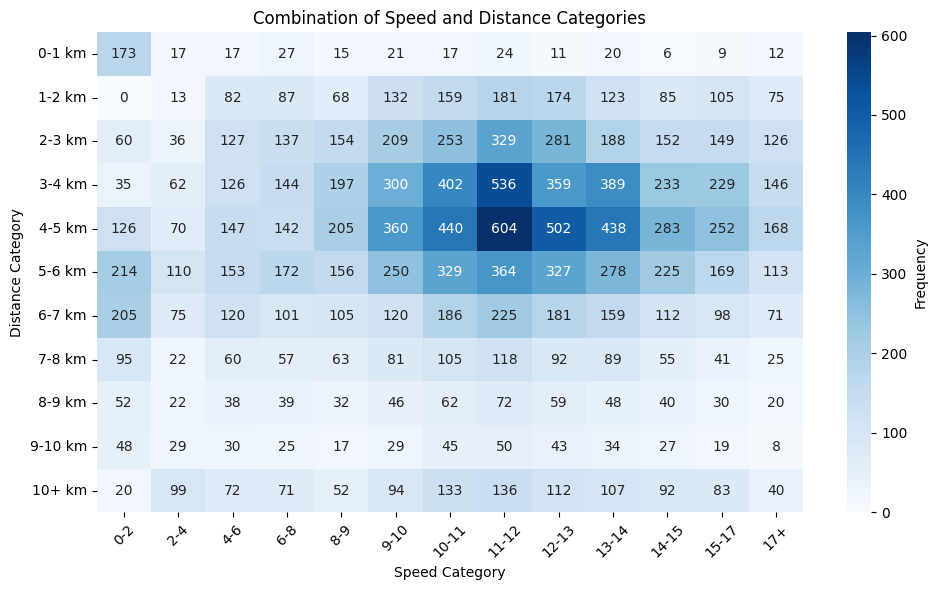

In [21]:

# Sort speed and distance categories
def sort_key(x):
    if x.endswith('+'):
        return float('17')
    if x.endswith('+ km'):
        return 10
    return int(x.split('-')[0])

speed_categories = sorted(df['speed_category'].unique(), key=sort_key)
distance_categories = sorted(df['distance_category'].unique(), key=sort_key)

# Pivot table to get counts
pivot_table = df.pivot_table(index='distance_category', columns='speed_category', aggfunc='size', fill_value=0)

# Reindex with sorted categories
pivot_table = pivot_table.reindex(index=distance_categories, columns=speed_categories)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g', cbar_kws={'label': 'Frequency'})
plt.title('Combination of Speed and Distance Categories')
plt.xlabel('Speed Category')
plt.ylabel('Distance Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
def extract_speed(speed_str):
    if '-' in speed_str:
        lower, upper = map(int, speed_str.split('-'))
        return (lower + upper) / 2
    else:
        return 17 if speed_str == '15+' else int(speed_str.split('-')[0])

In [7]:
def extract_features(class_string):
    parts = class_string.split(' ')
    distance_str = parts[3]
    speed_str = parts[-3]
    distance_str_cleaned = distance_str.replace('+', '')

    distance = int(distance_str_cleaned.split('-')[0])
    speed = extract_speed(speed_str)
    activity = parts[-1]
    vessel_type = parts[0]
    return distance, speed, activity, vessel_type


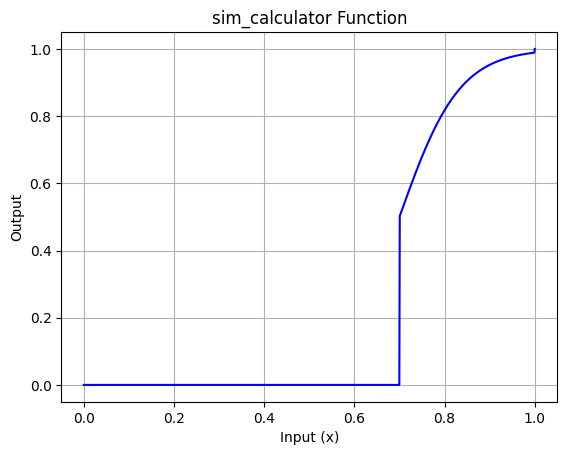

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def custom_sigmoid(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

def sim_calculator(x):
    a = 15  # Adjust this parameter to control the steepness of the curve
    b = 0.7
    if x < 0.7:
        return 0
    elif x == 1:
        return 1
    else:
        return custom_sigmoid(x, a, b)

# Generate x values
x_values = np.linspace(0, 1, 1000)

# Calculate y values using sim_calculator function
y_values = [sim_calculator(x) for x in x_values]

# Plot the function
plt.plot(x_values, y_values, color='blue')
plt.title('sim_calculator Function')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True)
plt.show()


In [8]:
classes = {lbl: i for i, lbl in enumerate(d_train['label'].unique())}


# Create a matrix to hold the similarity values
num_classes = len(classes)
similarity_matrix = np.zeros((num_classes, num_classes))

# Define weights for each attribute
# distance_weight = 0.55
# speed_weight = 0.30
# activity_weight = 0.10
# vessel_type_weight=0


# Calculate similarity between each pair of classes
for i, class_i in enumerate(classes):
    distance_i, speed_i, activity_i, vessel_type_i = extract_features(class_i)
    for j, class_j in enumerate(classes):
        distance_j, speed_j, activity_j, vessel_type_j = extract_features(class_j)
        distance_similarity = 1 - abs(distance_i - distance_j) / 10
        distance_similarity = sim_calculator(distance_similarity)

        speed_similarity = 1 - abs(speed_i - speed_j) / 16
        speed_similarity = sim_calculator(speed_similarity)
        
        # distance_similarity = distance_similarity ** 2 
        speed_similarity = 1 if speed_i == speed_j else 0
        

In [9]:
speed_i

11.5

In [10]:
speed_j

11.5

In [8]:
d_train["activity"].value_counts()

activity
underway-using-engine         83
restricted-maneuverability     7
engaged-in-fishing             3
moored                         3
constrained-by-her-draught     2
underway-sailing               1
at-anchor                      1
Name: count, dtype: int64

In [7]:
d_train["speed_category"].value_counts()

speed_category
10-15    53
5-10     26
0-5      14
15+       7
Name: count, dtype: int64

In [36]:
df=filtered_d_train["filename"].apply(lambda x: float(x.split('_')[-3].replace('-', '.')))

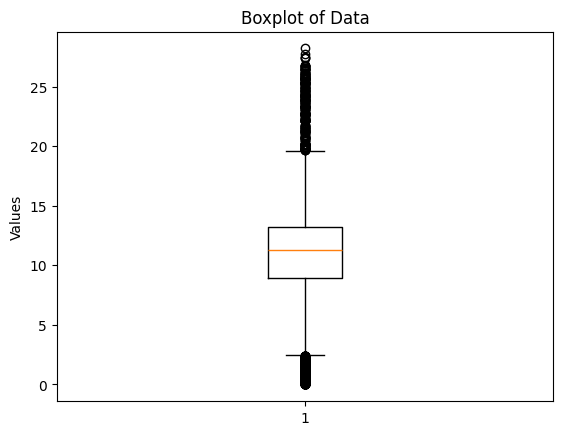

In [35]:
import matplotlib.pyplot as plt

df = filtered_d_train["filename"].apply(lambda x: float(x.split('_')[-3].replace('-', '.')))
df = df[df <= 30]
boxplot_dict=plt.boxplot(df)
plt.title('Boxplot of Data')
plt.ylabel('Values')
plt.show()

In [41]:
def categorize_speed(speed):
    if speed >= 0 and speed < 2:
        return '0-2'
    elif speed >= 2 and speed < 4:
        return '2-4'
    elif speed >= 4 and speed < 6:
        return '4-6'
    elif speed >= 6 and speed < 8:
        return '6-8'
    elif speed >= 8 and speed < 9:
        return '8-9'
    elif speed >= 9 and speed < 10:
        return '9-10'
    elif speed >= 10 and speed < 11:
        return '10-11'
    elif speed >= 11 and speed < 12:
        return '11-12'
    elif speed >= 12 and speed < 13:
        return '12-13'
    elif speed >= 13 and speed < 14:
        return '13-14'
    elif speed >= 14 and speed < 15:
        return '14-15'
    elif speed >= 15 and speed < 17:
        return '15-17'
    else:
        return '17+'



In [32]:
df

0        10.1
1        14.1
2         0.5
3        10.5
4         9.9
         ... 
18910    13.4
18911     1.1
18912     2.6
18913    12.7
18914     6.0
Name: filename, Length: 18729, dtype: float64

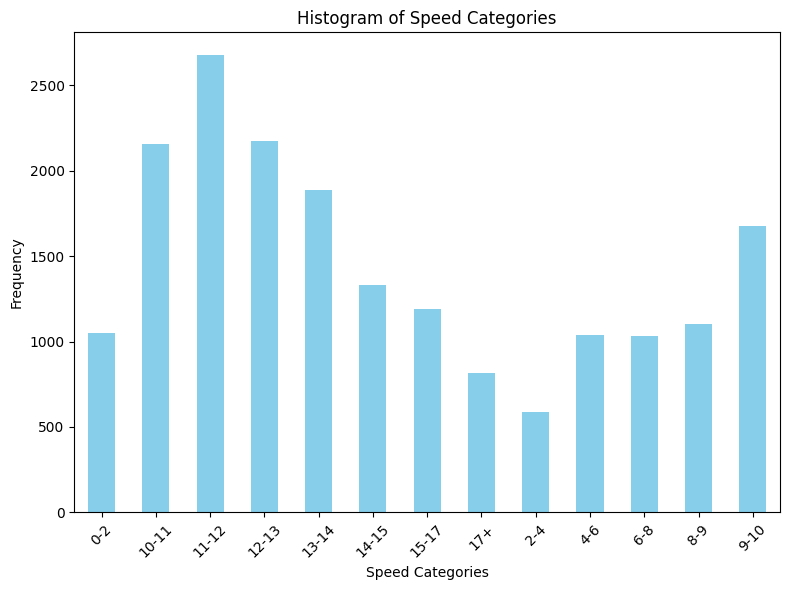

In [42]:
df=filtered_d_train["filename"].apply(lambda x: float(x.split('_')[-3].replace('-', '.')))
df['speed_category'] = df.apply(categorize_speed)

# Plot histogram
plt.figure(figsize=(8, 6))
df['speed_category'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of Speed Categories')
plt.xlabel('Speed Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

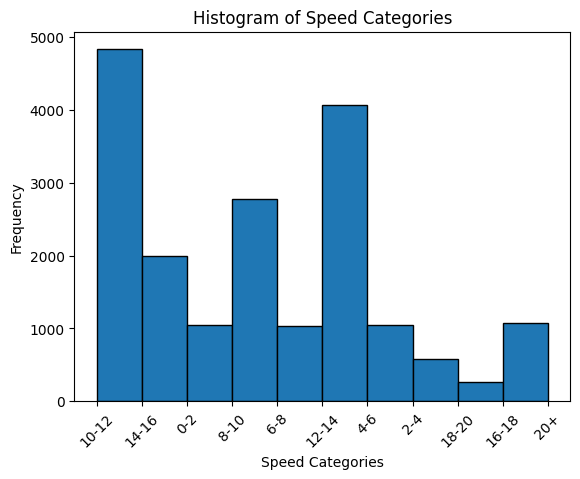

In [30]:
data=df.apply(categorize_speed)
plt.hist(data, bins=10, edgecolor='black')
plt.title('Histogram of Speed Categories')
plt.xlabel('Speed Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [14]:
filtered_d_train = d_train[d_train['label'].isin(valid_train_labels)]
filtered_d_train

filename  distance  speed  \
0      /storage/Imagine_UC6_new/DATA/data_per_station...    3331.0    9.2   
1      /storage/Imagine_UC6_new/DATA/data_per_station...    7933.0    8.7   
2      /storage/Imagine_UC6_new/DATA/data_per_station...    3768.0   12.7   
3      /storage/Imagine_UC6_new/DATA/data_per_station...    2557.0    2.6   
4      /storage/Imagine_UC6_new/DATA/data_per_station...    4377.0   12.7   
...                                                  ...       ...    ...   
13150  /storage/Imagine_UC6_new/DATA/data_per_station...    6612.0    5.8   
13151  /storage/Imagine_UC6_new/DATA/data_per_station...     550.0    0.4   
13152  /storage/Imagine_UC6_new/DATA/data_per_station...    3080.0   25.1   
13153  /storage/Imagine_UC6_new/DATA/data_per_station...    5679.0   11.9   
13154  /storage/Imagine_UC6_new/DATA/data_per_station...   12805.0    9.0   

                         activity         ship_type distance_category  \
0           underway-using-engine            Tanker            3-4 km   
1           underway-using-engine             Cargo            7-8 km   
2           underway-using-engine            Tanker            3-4 km   
3           underway-using-engine            Tanker            2-3 km   
4           underway-using-engine             Cargo            4-5 km   
...                           ...               ...               ...   
13150          engaged-in-fishing           Fishing            6-7 km   
13151  restricted-maneuverability             Other            0-1 km   
13152       underway-using-engine  High-Speed-Craft            3-4 km   
13153       underway-using-engine             Pilot            5-6 km   
13154       underway-using-engine            Tanker            10+ km   

      speed_category                                              label  
0           8.2-13.3  Tanker at distance 3-4 km with speed 8.2-13.3 ...  
1           8.2-13.3  Cargo at distance 7-8 km with speed 8.2-13.3 i...  
2           8.2-13.3  Tanker at distance 3-4 km with speed 8.2-13.3 ...  
3            1.5-8.2  Tanker at distance 2-3 km with speed 1.5-8.2 i...  
4           8.2-13.3  Cargo at distance 4-5 km with speed 8.2-13.3 i...  
...              ...                                                ...  
13150        1.5-8.2  Fishing at distance 6-7 km with speed 1.5-8.2 ...  
13151          0-1.5  Other at distance 0-1 km with speed 0-1.5 is r...  
13152          13.3+  High-Speed-Craft at distance 3-4 km with speed...  
13153       8.2-13.3  Pilot at distance 5-6 km with speed 8.2-13.3 i...  
13154       8.2-13.3  Tanker at distance 10+ km with speed 8.2-13.3 ...  

[12503 rows x 8 columns]

In [38]:
boxplot_dict["whiskers"][0].get_ydata()

array([8.9, 2.5])

In [39]:
boxplot_dict["whiskers"][1].get_ydata()

array([13.2, 19.6])

/tmp/ipykernel_9598/1789275115.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(ship_type_counts))


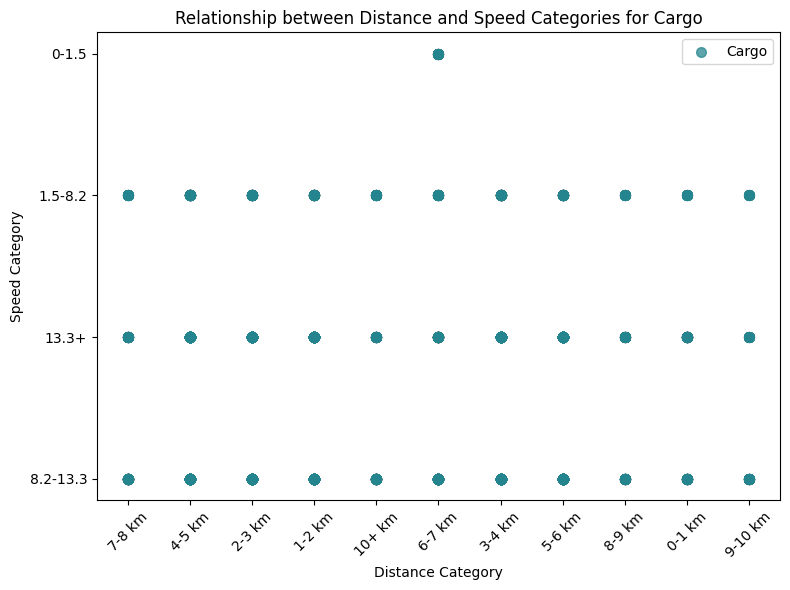

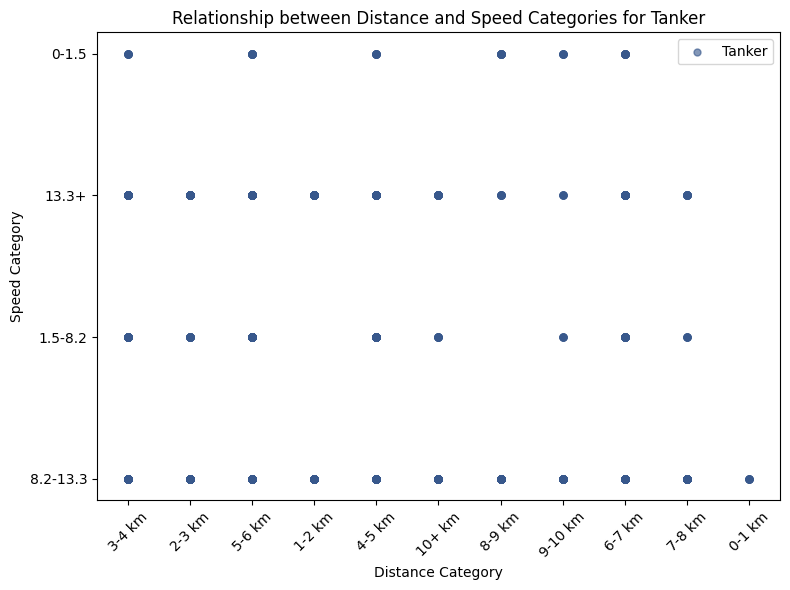

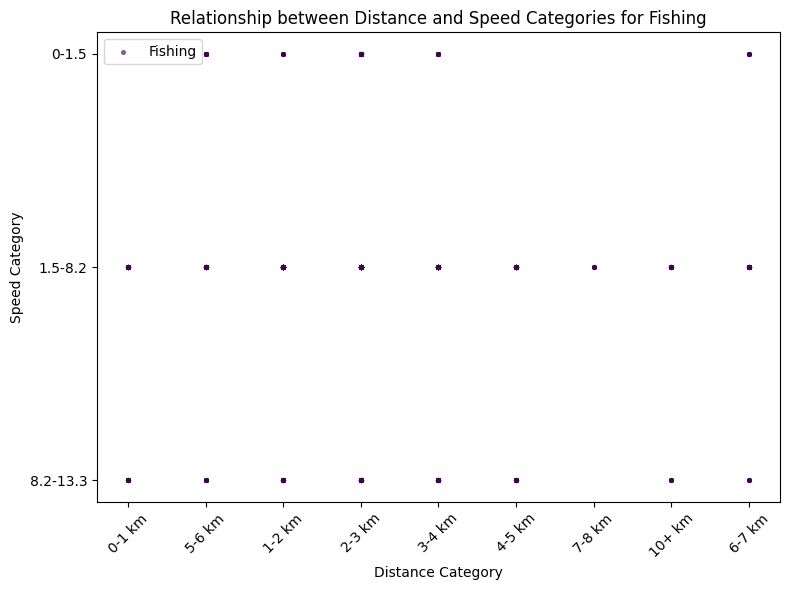

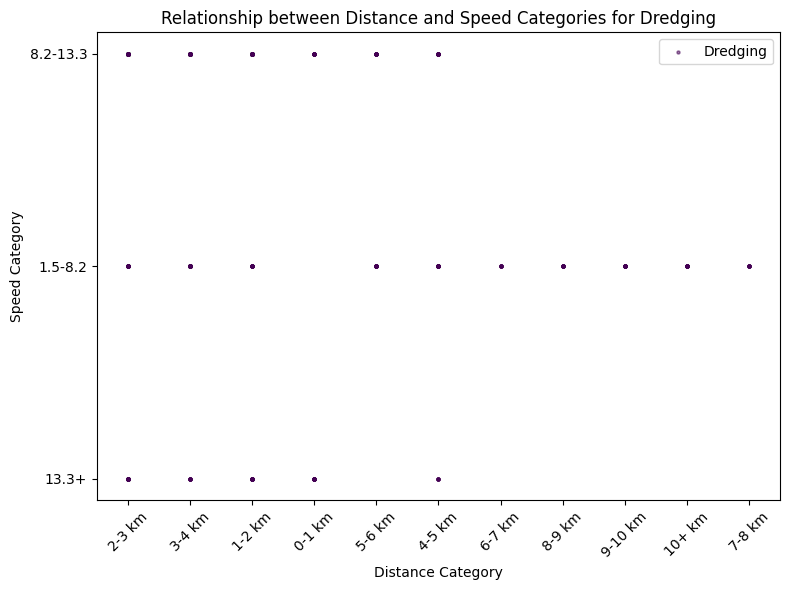

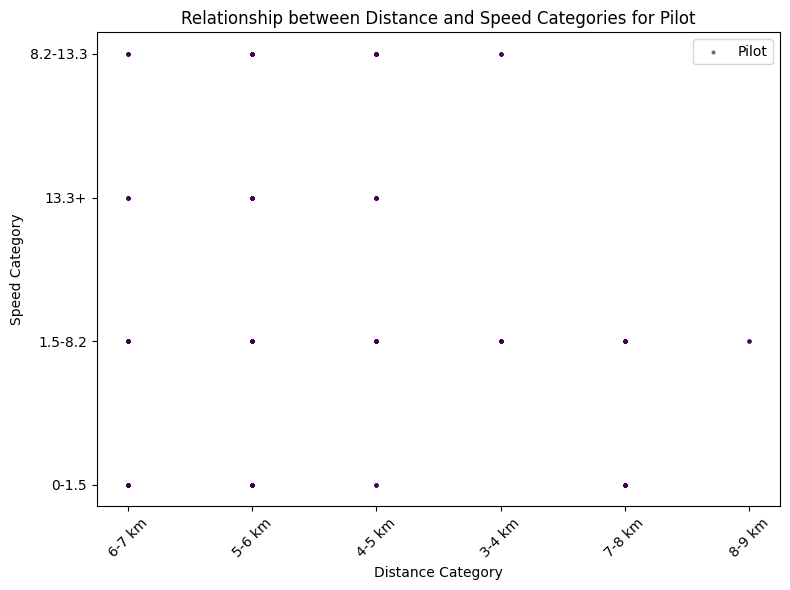

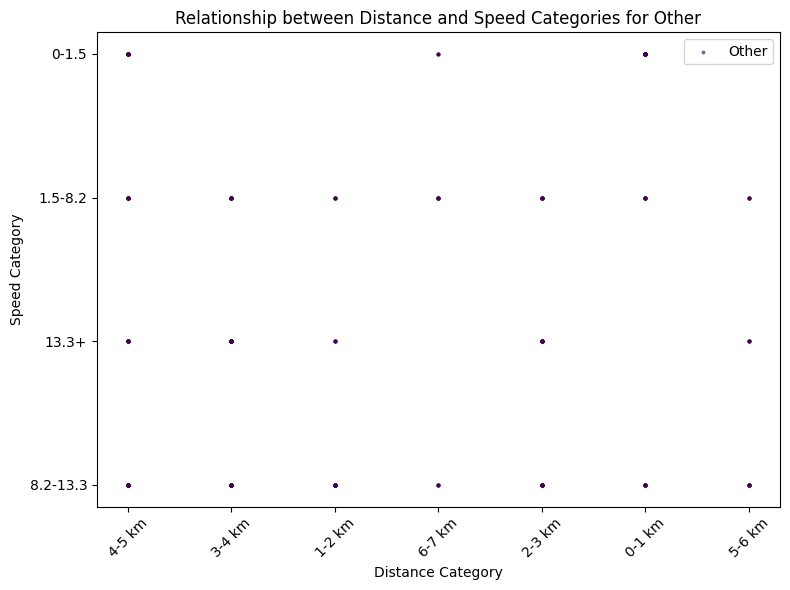

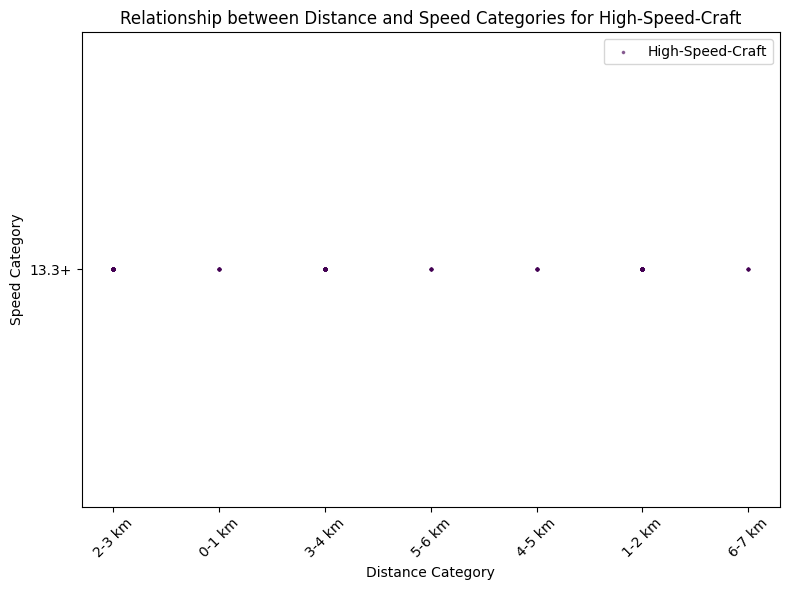

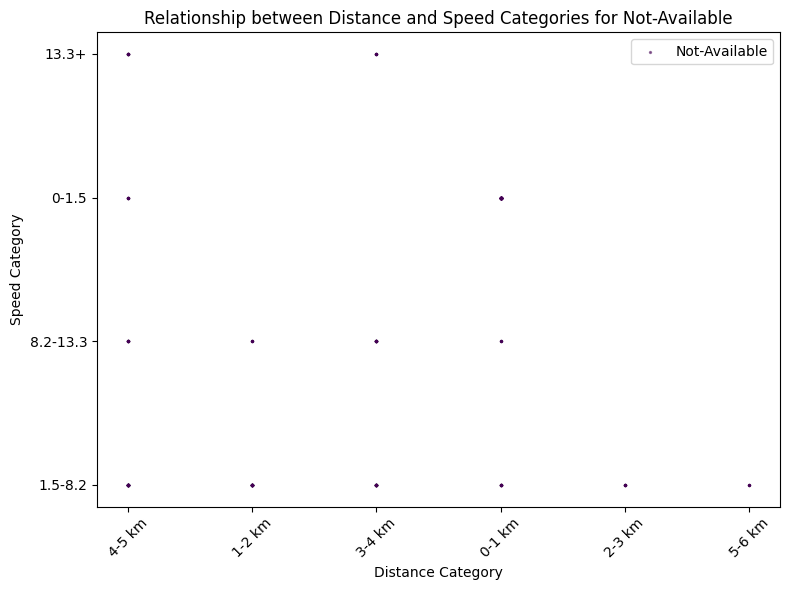

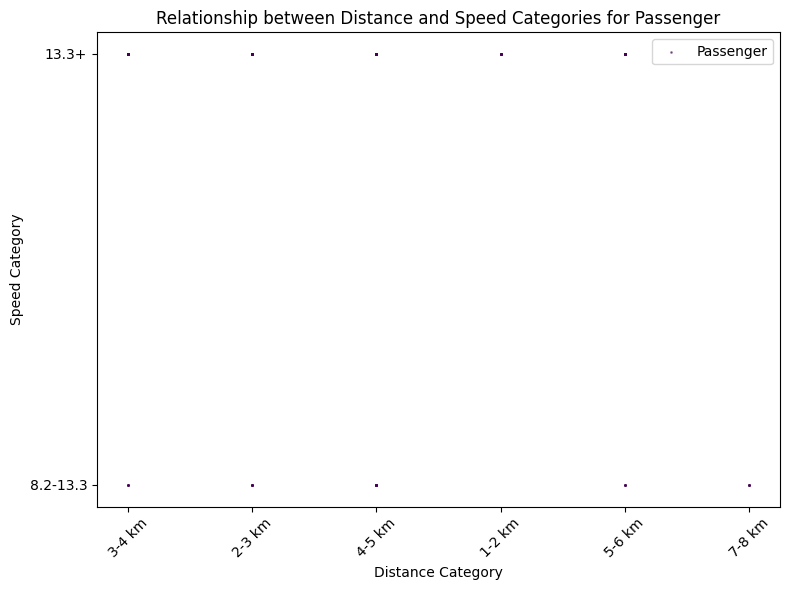

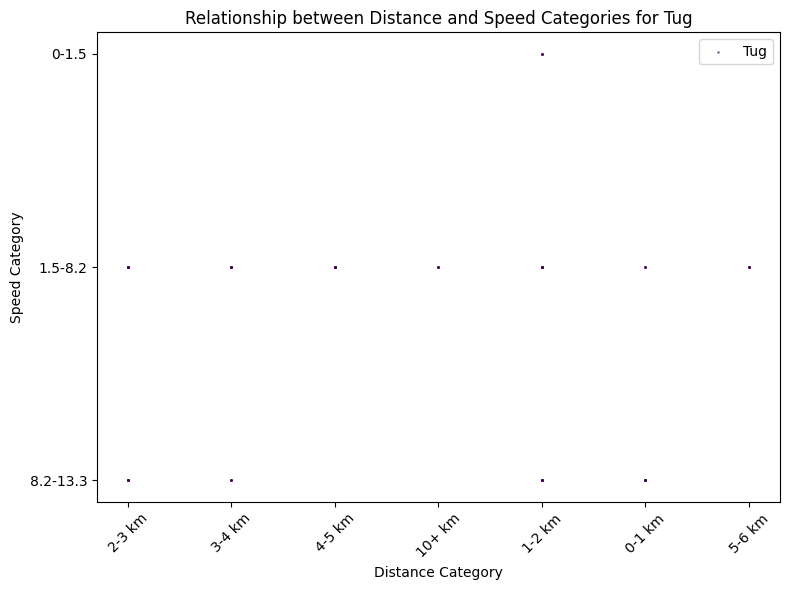

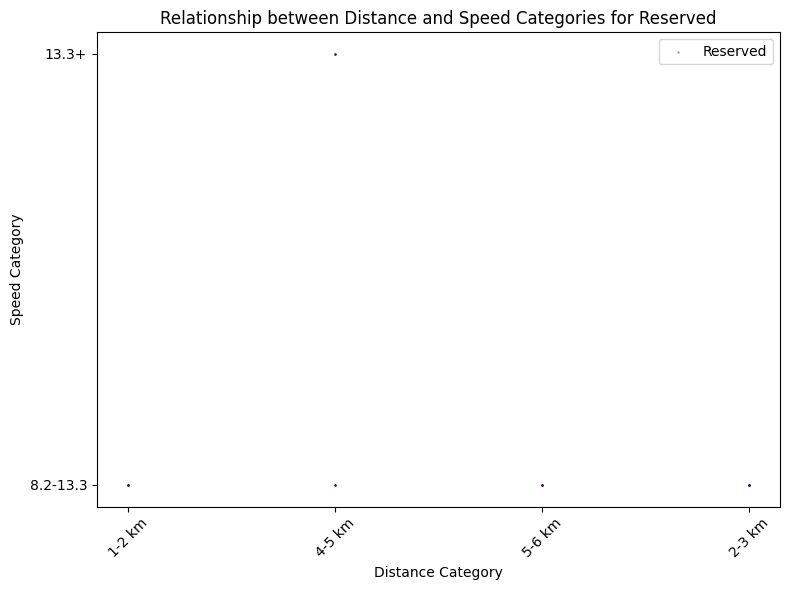

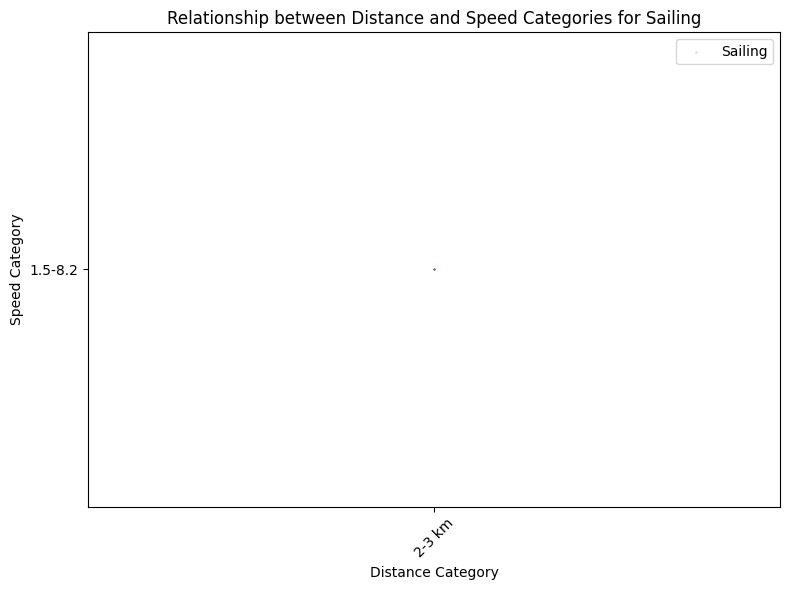

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of occurrences of each ship type
ship_type_counts = filtered_d_train['ship_type'].value_counts()

# Create a colormap based on the abundance of ship types
colormap = plt.cm.get_cmap('viridis', len(ship_type_counts))

# Plotting
for ship_type, count in ship_type_counts.items():
    ship_data = filtered_d_train[filtered_d_train['ship_type'] == ship_type]
    plt.figure(figsize=(8, 6))
    
    # Calculate size or brightness based on occurrence
    size = 100 * (ship_data.shape[0] / len(filtered_d_train))
    alpha = 0.5 + 0.5 * (ship_data.shape[0] / len(filtered_d_train))

    # Plot points with color based on colormap
    plt.scatter(ship_data['distance_category'], ship_data['speed_category'], color=colormap(ship_type_counts[ship_type]/len(filtered_d_train)), s=size, alpha=alpha, label=ship_type)

    plt.xlabel('Distance Category')
    plt.ylabel('Speed Category')
    plt.title(f'Relationship between Distance and Speed Categories for {ship_type}')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


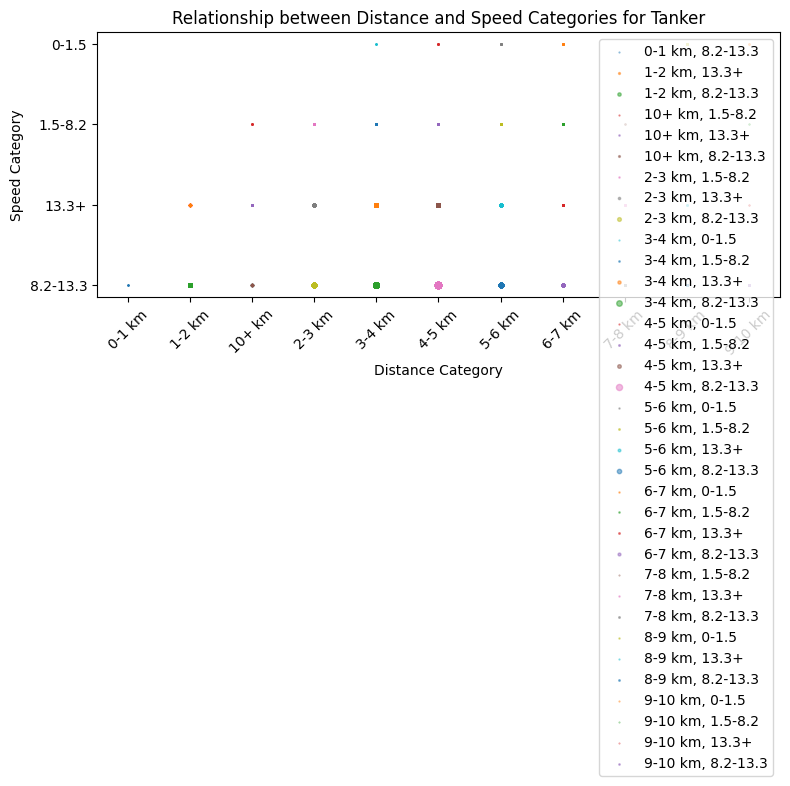

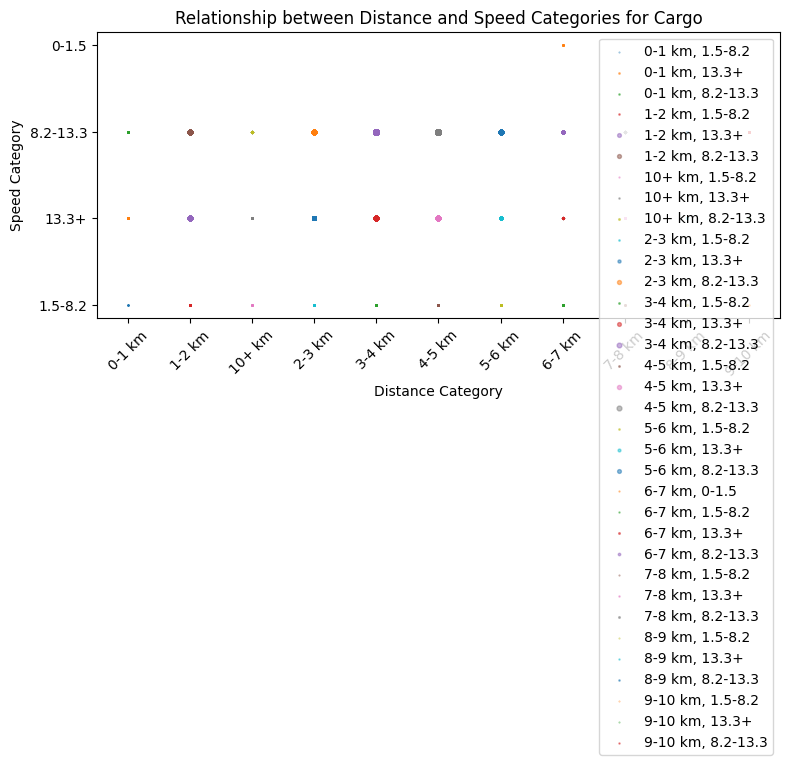

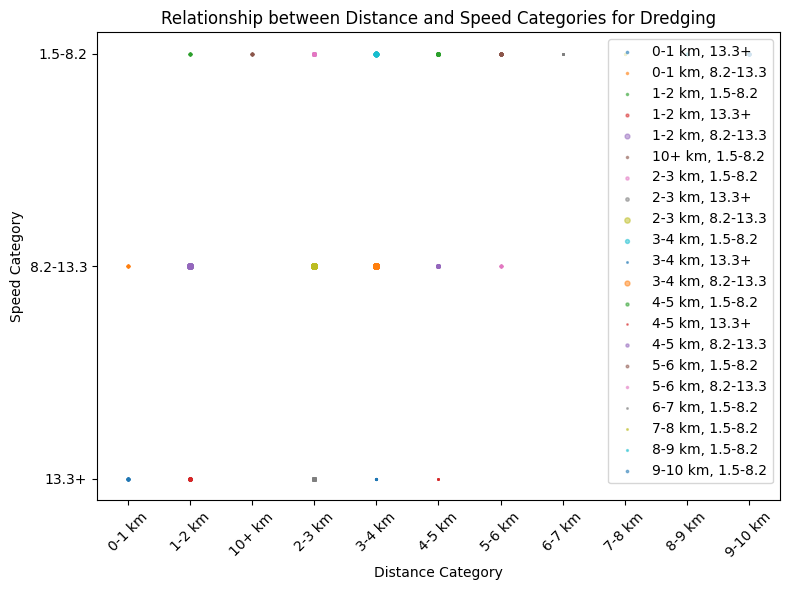

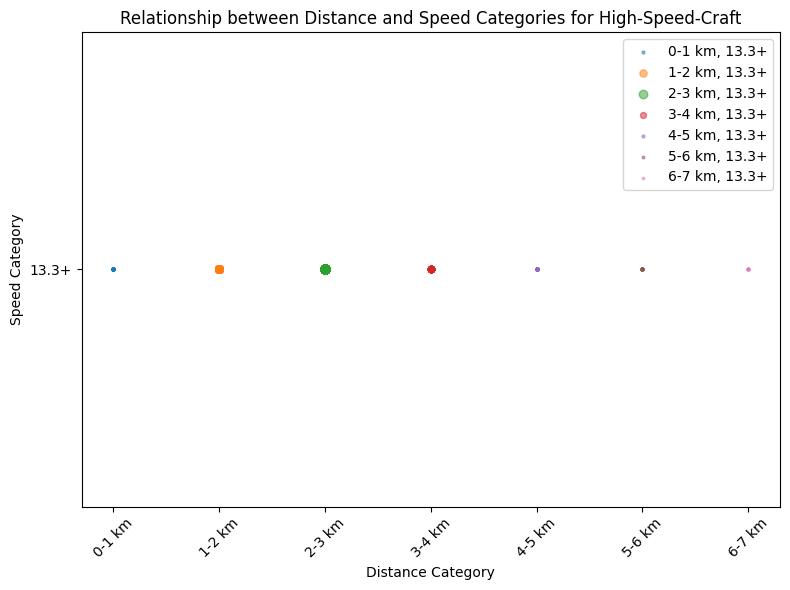

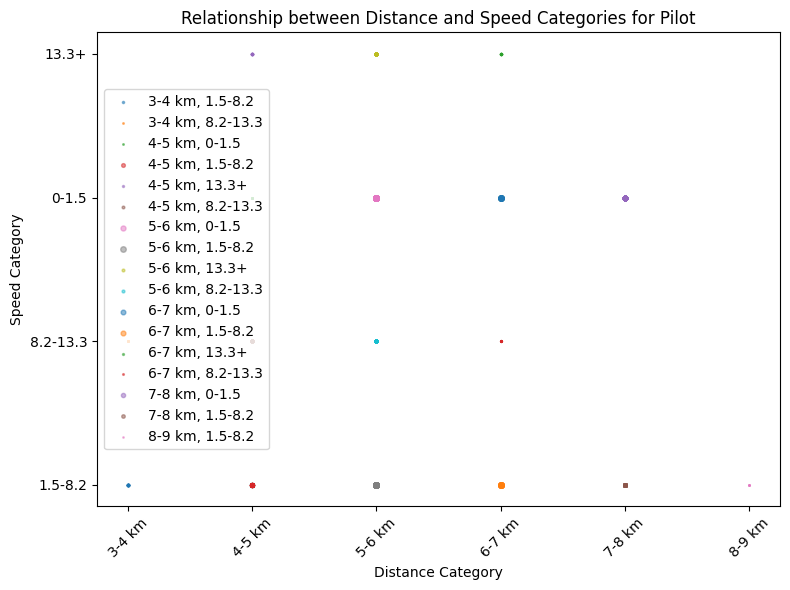

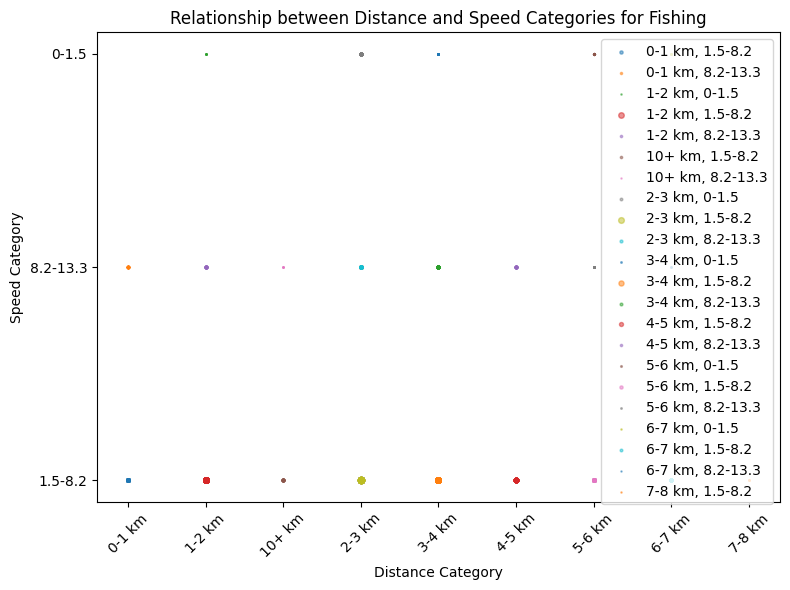

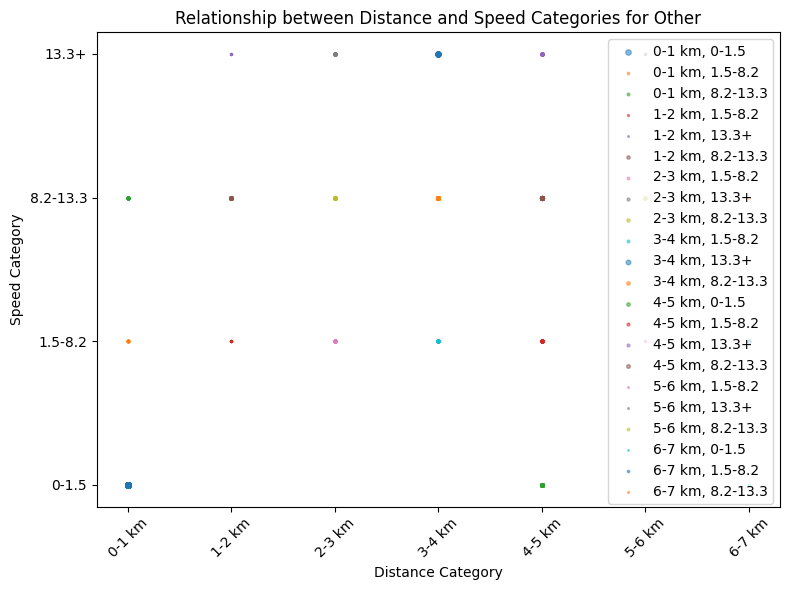

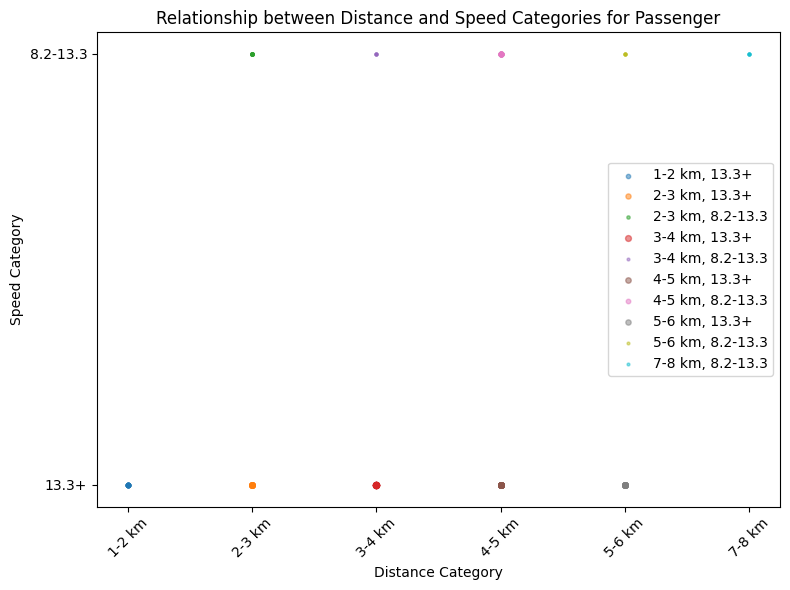

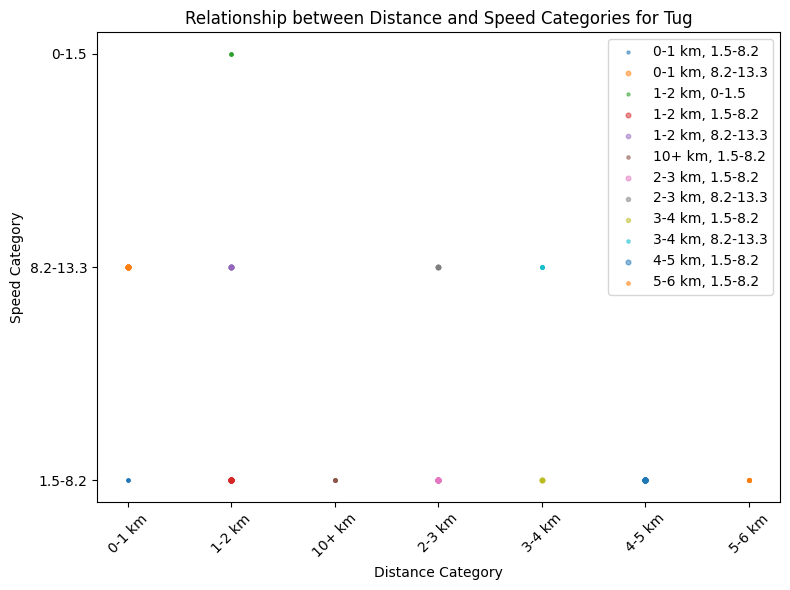

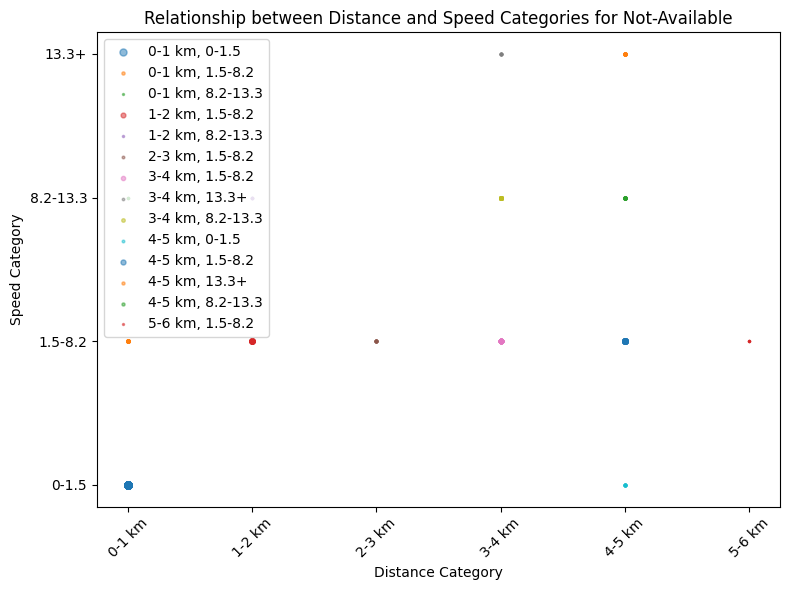

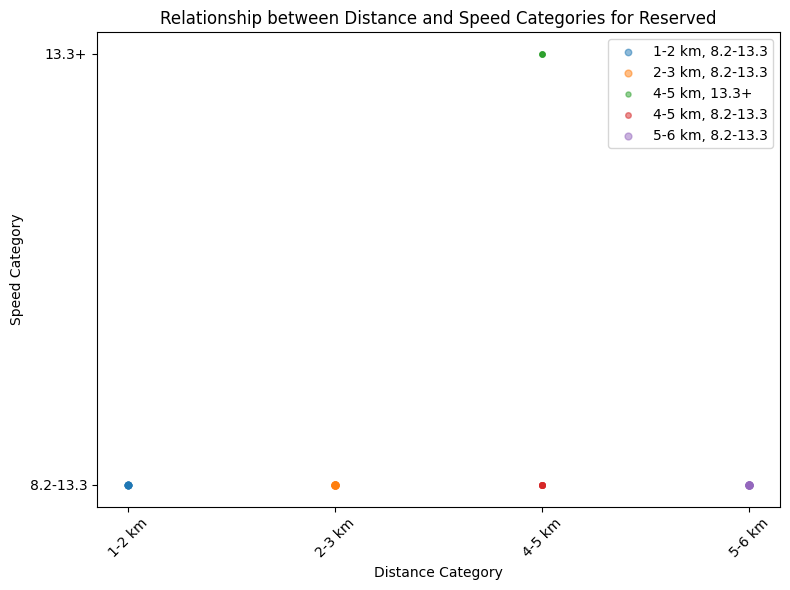

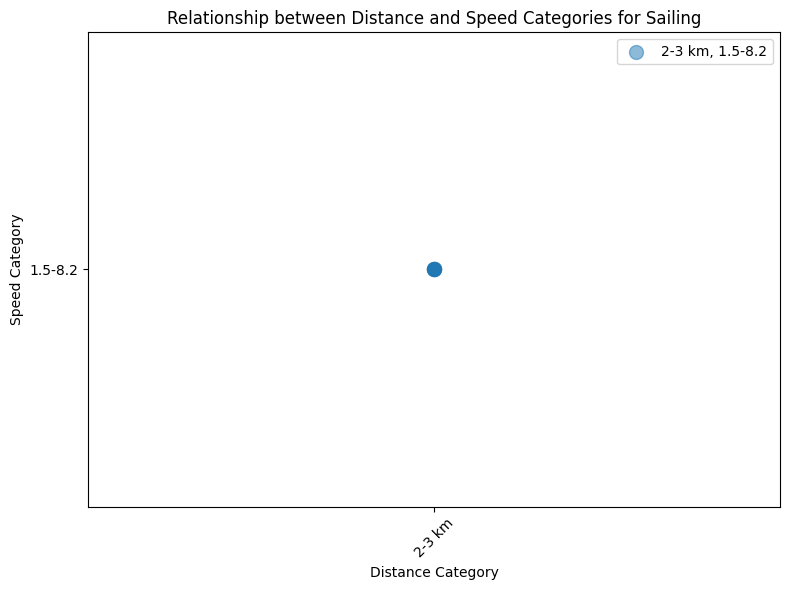

In [20]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each combination of labels for each ship type
ship_type_combinations_counts = filtered_d_train.groupby(['ship_type', 'distance_category', 'speed_category']).size()

# Plotting
for ship_type in filtered_d_train['ship_type'].unique():
    plt.figure(figsize=(8, 6))  # New figure for each ship type
    ship_data = filtered_d_train[filtered_d_train['ship_type'] == ship_type]
    
    # Count the number of occurrences of each combination of labels for this ship type
    label_combinations_counts = ship_type_combinations_counts[ship_type]
    
    # Plot each combination of labels
    for label_combination, count in label_combinations_counts.items():
        distance_category, speed_category = label_combination
        
        ship_data_subset = ship_data[(ship_data['distance_category'] == distance_category) & (ship_data['speed_category'] == speed_category)]
        
        # Calculate size based on occurrence of combination
        size = 100 * (count / label_combinations_counts.sum())
        
        # Plot points with size based on occurrence
        plt.scatter(ship_data_subset['distance_category'], ship_data_subset['speed_category'], s=size, alpha=0.5, label=f'{distance_category}, {speed_category}')

    plt.xlabel('Distance Category')
    plt.ylabel('Speed Category')
    plt.title(f'Relationship between Distance and Speed Categories for {ship_type}')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_9598/4002532474.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_d_train['ship_type_category'] = filtered_d_train['ship_type'].apply(lambda x: ship_type_categories.get(x, 'Other'))


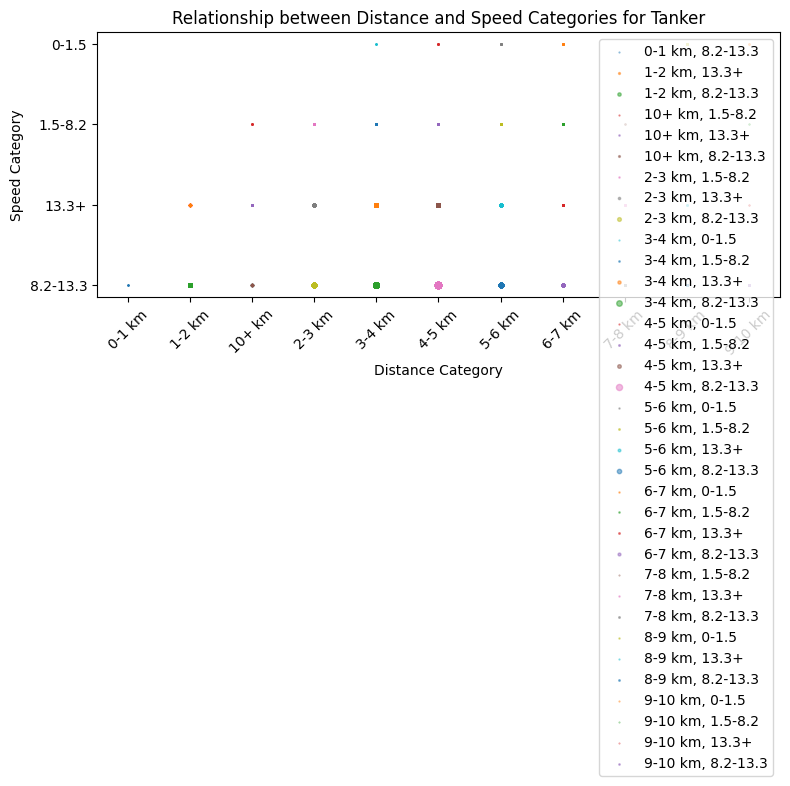

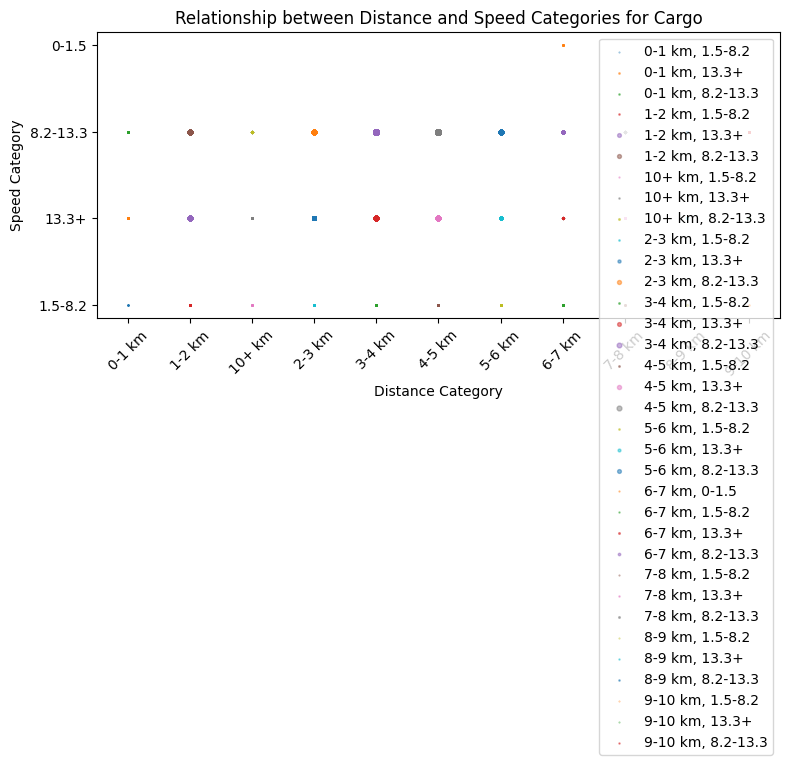

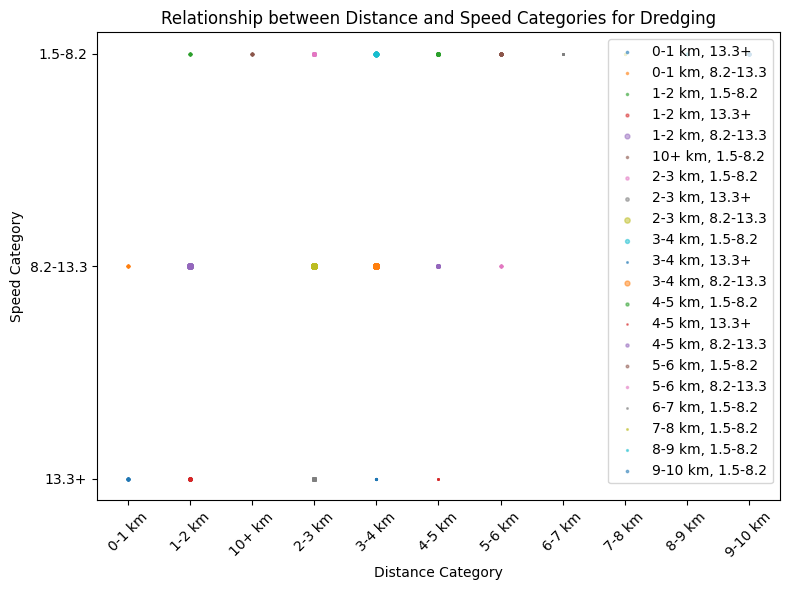

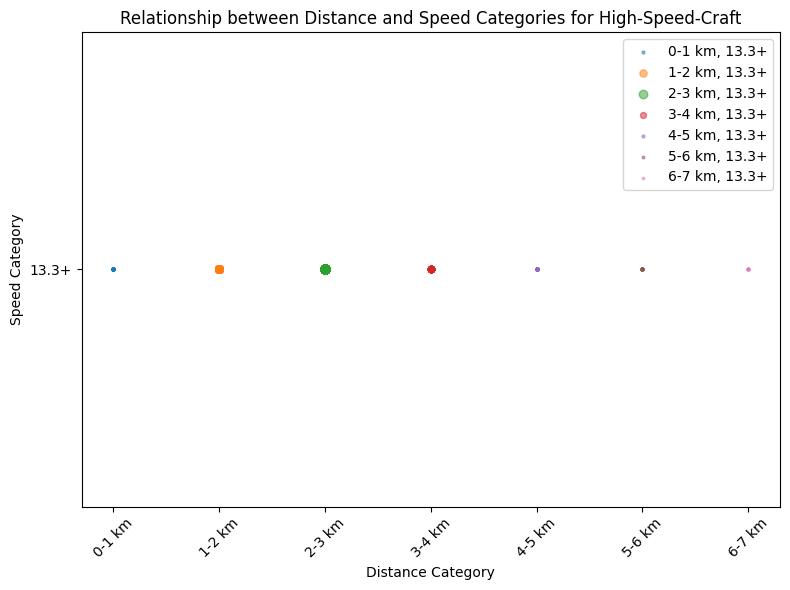

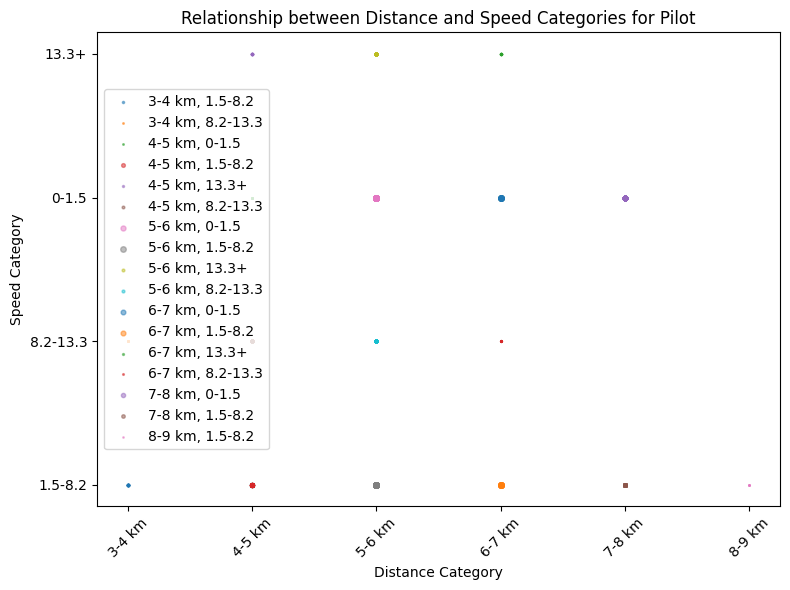

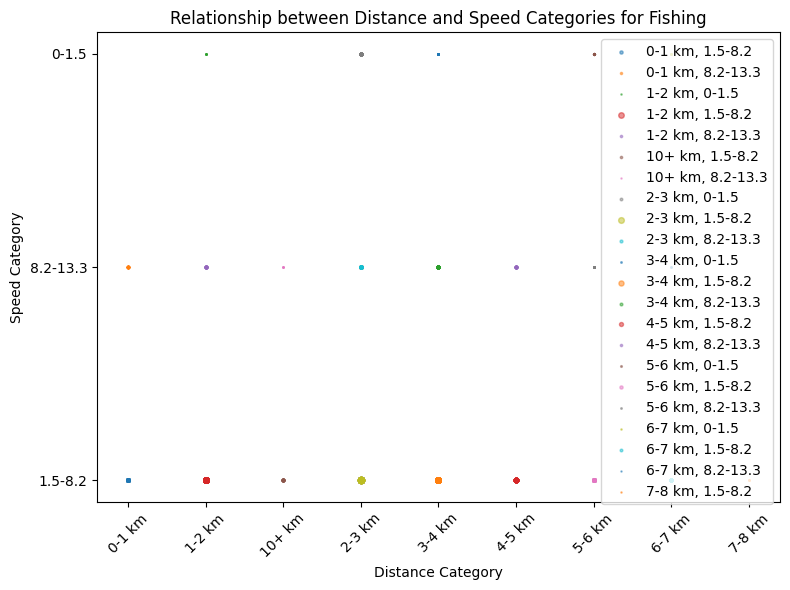

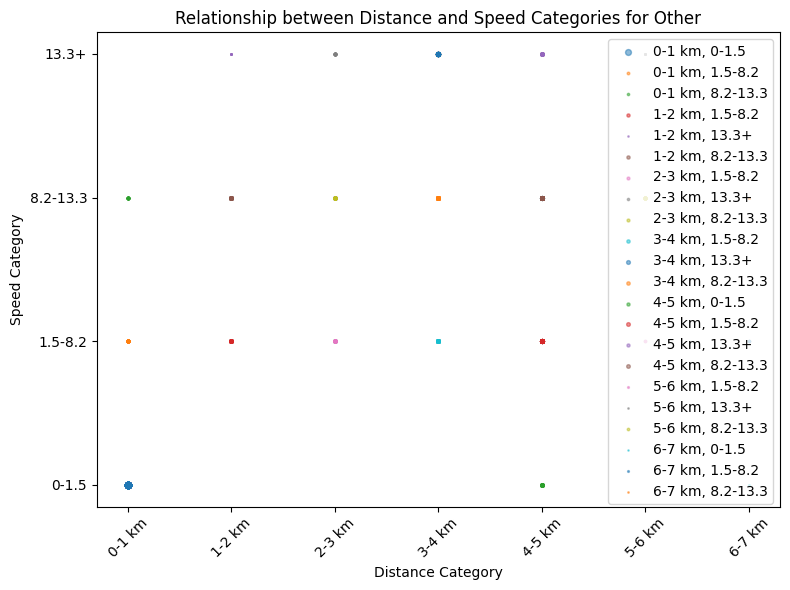

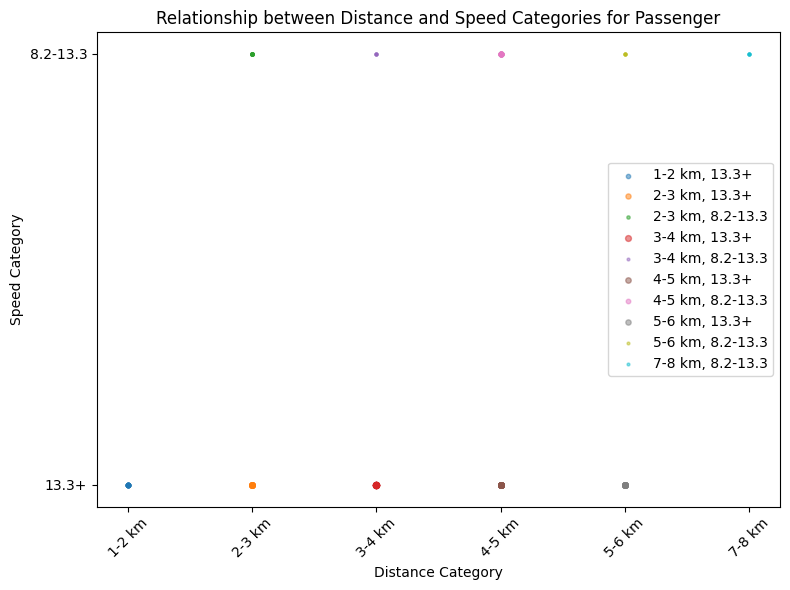

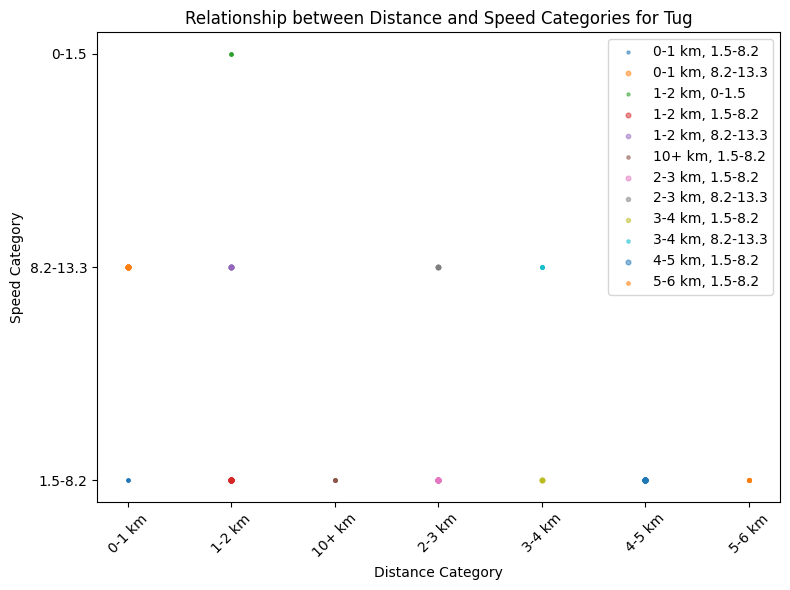

In [21]:
import matplotlib.pyplot as plt

# Define ship type categories
ship_type_categories = {
    'Tanker': 'Tanker',
    'Cargo': 'Cargo',
    'Dredging': 'Dredging',
    'High-Speed-Craft': 'High-Speed-Craft',
    'Fishing': 'Fishing',
    'Passenger': 'Passenger',
    'Tug': 'Tug',
    'Pilot': 'Pilot'
}

# Group ship types into specified categories, labeling others as 'Other'
filtered_d_train['ship_type_category'] = filtered_d_train['ship_type'].apply(lambda x: ship_type_categories.get(x, 'Other'))

# Count the number of occurrences of each combination of labels for each ship type category
ship_type_combinations_counts = filtered_d_train.groupby(['ship_type_category', 'distance_category', 'speed_category']).size()

# Plotting
for ship_type_category in filtered_d_train['ship_type_category'].unique():
    plt.figure(figsize=(8, 6))  # New figure for each ship type category
    ship_data = filtered_d_train[filtered_d_train['ship_type_category'] == ship_type_category]
    
    # Count the number of occurrences of each combination of labels for this ship type category
    label_combinations_counts = ship_type_combinations_counts[ship_type_category]
    
    # Plot each combination of labels
    for label_combination, count in label_combinations_counts.items():
        distance_category, speed_category = label_combination
        
        ship_data_subset = ship_data[(ship_data['distance_category'] == distance_category) & (ship_data['speed_category'] == speed_category)]
        
        # Calculate size based on occurrence of combination
        size = 100 * (count / label_combinations_counts.sum())
        
        # Plot points with size based on occurrence
        plt.scatter(ship_data_subset['distance_category'], ship_data_subset['speed_category'], s=size, alpha=0.5, label=f'{distance_category}, {speed_category}')

    plt.xlabel('Distance Category')
    plt.ylabel('Speed Category')
    plt.title(f'Relationship between Distance and Speed Categories for {ship_type_category}')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


In [12]:
valid_train_labels

Index(['Cargo at distance 4-5 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 3-4 km with speed 8.2-13.3 is underway-using-engine',
       'Tanker at distance 4-5 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 4-5 km with speed 13.3+ is underway-using-engine',
       'Cargo at distance 2-3 km with speed 8.2-13.3 is underway-using-engine',
       'Tanker at distance 3-4 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 1-2 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 5-6 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 3-4 km with speed 13.3+ is underway-using-engine',
       'Cargo at distance 1-2 km with speed 13.3+ is underway-using-engine',
       ...
       'Dredging at distance 5-6 km with speed 8.2-13.3 is restricted-maneuverability',
       'Fishing at distance 3-4 km with speed 0-1.5 is engaged-in-fishing',
       'Cargo at distance 5-6 km

In [11]:
d_train

filename  distance  speed  \
0      /storage/Imagine_UC6_new/DATA/data_per_station...    3331.0    9.2   
1      /storage/Imagine_UC6_new/DATA/data_per_station...    7933.0    8.7   
2      /storage/Imagine_UC6_new/DATA/data_per_station...    3768.0   12.7   
3      /storage/Imagine_UC6_new/DATA/data_per_station...    2557.0    2.6   
4      /storage/Imagine_UC6_new/DATA/data_per_station...    4377.0   12.7   
...                                                  ...       ...    ...   
13150  /storage/Imagine_UC6_new/DATA/data_per_station...    6612.0    5.8   
13151  /storage/Imagine_UC6_new/DATA/data_per_station...     550.0    0.4   
13152  /storage/Imagine_UC6_new/DATA/data_per_station...    3080.0   25.1   
13153  /storage/Imagine_UC6_new/DATA/data_per_station...    5679.0   11.9   
13154  /storage/Imagine_UC6_new/DATA/data_per_station...   12805.0    9.0   

                         activity         ship_type distance_category  \
0           underway-using-engine            Tanker            3-4 km   
1           underway-using-engine             Cargo            7-8 km   
2           underway-using-engine            Tanker            3-4 km   
3           underway-using-engine            Tanker            2-3 km   
4           underway-using-engine             Cargo            4-5 km   
...                           ...               ...               ...   
13150          engaged-in-fishing           Fishing            6-7 km   
13151  restricted-maneuverability             Other            0-1 km   
13152       underway-using-engine  High-Speed-Craft            3-4 km   
13153       underway-using-engine             Pilot            5-6 km   
13154       underway-using-engine            Tanker            10+ km   

      speed_category                                              label  
0           8.2-13.3  Tanker at distance 3-4 km with speed 8.2-13.3 ...  
1           8.2-13.3  Cargo at distance 7-8 km with speed 8.2-13.3 i...  
2           8.2-13.3  Tanker at distance 3-4 km with speed 8.2-13.3 ...  
3            1.5-8.2  Tanker at distance 2-3 km with speed 1.5-8.2 i...  
4           8.2-13.3  Cargo at distance 4-5 km with speed 8.2-13.3 i...  
...              ...                                                ...  
13150        1.5-8.2  Fishing at distance 6-7 km with speed 1.5-8.2 ...  
13151          0-1.5  Other at distance 0-1 km with speed 0-1.5 is r...  
13152          13.3+  High-Speed-Craft at distance 3-4 km with speed...  
13153       8.2-13.3  Pilot at distance 5-6 km with speed 8.2-13.3 i...  
13154       8.2-13.3  Tanker at distance 10+ km with speed 8.2-13.3 ...  

[13155 rows x 8 columns]

In [10]:
label_counts =d_train["label"].value_counts()
output_file_path = "/srv/file.txt"

# Open the file in write mode and write the value counts to it
with open(output_file_path, "w") as file:
    file.write(label_counts.to_string())

# Print confirmation
print(f"Value counts saved to: {output_file_path}")

Value counts saved to: /srv/file.txt


In [7]:
valid_train_labels

Index(['Cargo at distance 4-5 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 3-4 km with speed 8.2-13.3 is underway-using-engine',
       'Tanker at distance 4-5 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 4-5 km with speed 13.3+ is underway-using-engine',
       'Cargo at distance 2-3 km with speed 8.2-13.3 is underway-using-engine',
       'Tanker at distance 3-4 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 1-2 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 5-6 km with speed 8.2-13.3 is underway-using-engine',
       'Cargo at distance 3-4 km with speed 13.3+ is underway-using-engine',
       'Cargo at distance 1-2 km with speed 13.3+ is underway-using-engine',
       ...
       'Dredging at distance 5-6 km with speed 8.2-13.3 is restricted-maneuverability',
       'Fishing at distance 3-4 km with speed 0-1.5 is engaged-in-fishing',
       'Cargo at distance 5-6 km

In [11]:
best_model.clap.save_pretrained('roi/BioLingual/test_model')
best_model.processor.save_pretrained('roi/BioLingual/test_model')

In [5]:
model_path="/srv/CLAP/roi/BioLingual/model"
model = models.CLAPClassifier(model_path, num_classes, sr=self.desired_fs, device=device, similarity_matrix=similarity_matrix, multi_label=False)
clap = ClapAudioModelWithProjection.from_pretrained(model_path)
print("fixed clap.")

linear = nn.Linear(in_features=512, out_features=5)
model_path='davidrrobinson/BioLingual'
processor = AutoProcessor.from_pretrained(model_path)

NameError: name 'num_classes' is not defined

In [12]:
batch_size=8
stop_shuffle=False
sample_dur=10
desired_fs = 48000
wavs_folder= '/storage/UC6_new_data/data/'
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print("Selected CUDA device:", torch.cuda.get_device_name(device))
else:
    print("CUDA is not available. Using CPU.")
# device =torch.device('cuda:0')
log_path = 'roi/BioLingual/logs_test.log'
log_file = open(log_path, mode='w')

# detections = convert_raven_to_ae_format(labels_to_exclude=None)
# detections = detections.loc[~detections.label.isna()]

d_train_path= "ds_split-CLAP/train.txt"
d_test_path= "ds_split-CLAP/test.txt"
# print("path ", d_train_path)
split = np.genfromtxt(d_train_path, dtype='str', delimiter=' ')
d_train_loc = np.array([os.path.join(wavs_folder, i) for i in split[:, 0]])

split = np.genfromtxt(d_test_path, dtype='str', delimiter=' ')
d_test_loc = np.array([os.path.join(wavs_folder, i) for i in split[:, 0]])

# split = np.genfromtxt(d_train_path, dtype='str', delimiter=' ')
# d_train_loc = np.array([os.path.join(wavs_folder, i) for i in split[:, 0]])

# split = np.genfromtxt(d_valid_path, dtype='str', delimiter=' ')
# d_valid_loc = np.array([os.path.join(wavs_folder, i) for i in split[:, 0]])
d_train=u.process_filenames(d_train_loc)
d_test=u.process_filenames(d_test_loc)

train_labels = set(d_train["label"])
# Count the occurrences of each label in d_train
label_counts_train = d_train["label"].value_counts()

valid_train_labels = label_counts_train[label_counts_train >= 5].index


# Filter d_train and d_valid based on valid_train_labels
d_train = d_train[d_train["label"].isin(valid_train_labels)]
test_train_labels = label_counts_train[label_counts_train >= 5].index

d_test = d_test[d_test["label"].isin(test_train_labels)]

# Display the number of unique classes
num_classes = len(valid_train_labels)
ids={lbl: i for i, lbl in enumerate(d_train['label'].unique())}

similarity_matrix=u.similarity(ids,device,distance_weight = 0.6, speed_weight = 0.30,activity_weight = 0.10)
similarity_matrix_distance=u.similarity(ids,device,distance_weight = 1)
similarity_matrix_speed=u.similarity(ids,device,speed_weight = 1)
similarity_matrix_activity=u.similarity(ids,device,activity_weight = 1)
model_path="/srv/CLAP/roi/BioLingual/test_model"
model = models.CLAPClassifier(model_path, num_classes, sr=desired_fs, device=device, similarity_matrix=similarity_matrix, multi_label=False)


dataloader_test = torch.utils.data.DataLoader(
    dataset=u.DatasetWaveform(df=d_test, wavs_folder=wavs_folder, desired_fs=desired_fs,
                              max_duration=sample_dur,ids=ids),
    batch_size=batch_size,
    shuffle=not stop_shuffle)



model = model.to(device)


test_loss, test_metric,test_metric_distance,test_metric_speed,test_metric_activity = u.eval_pytorch_model(
model=model,
dataloader=dataloader_test,
metric_factory=u.Accuracy,
device=device,
similarity_matrix=similarity_matrix,
similarity_matrix_distance=similarity_matrix_distance,
similarity_matrix_speed=similarity_matrix_speed,
similarity_matrix_activity=similarity_matrix_activity,
desc='test',ids=ids)

log_message = json.dumps({
    'test': {
        'loss': test_loss,
        'metric': test_metric,
        'metric_distance': np.mean(test_metric_distance),
        'metric_speed': np.mean(test_metric_speed),
        'metric_activity': np.mean(test_metric_activity),
    }
})

# Write the JSON string to the log file
log_file.write(log_message + '\n')
log_file.flush()

print(log_message)


Selected CUDA device: Tesla T4
fixed clap.


/srv/CLAP/models.py:121: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.loss_func = CustomLossFunction(torch.tensor(similarity_matrix).to(device))
test: 100%|██████████| 150/150 [03:26<00:00,  1.38s/it]

CSV file saved successfully.
Training metrics: 0.5004658630449148| Distance: 0.6517093261831846| Speed: 0.29156223893065997 | Activity: 0.2197159565580618
{"test": {"loss": 145.61843907659605, "metric": 0.5004658630449148, "metric_distance": 0.6517093261831846, "metric_speed": 0.29156223893065997, "metric_activity": 0.2197159565580618}}
